In [ ]:
!pip install youtube_dl

In [ ]:
import youtube_dl
import re
import os
from tqdm import tqdm
import pandas as pd
import numpy as np

In [ ]:
WAV_DIR = '/content/drive/MyDrive/google_audio/wav_files/'
genre_dict = {
            '/m/064t9': 'Pop_music',
            '/m/0glt670': 'Hip_hop_music',
            '/m/06by7': 'Rock_music',
            '/m/06j6l': 'Rhythm_blues',
            '/m/06cqb': 'Reggae',
            '/m/0y4f8': 'Vocal',
            '/m/07gxw': 'Techno',
            }

genre_set = set(genre_dict.keys())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
temp_str = []
with open('/content/drive/MyDrive/google_audio/data-files/csv_files/unbalanced_train_segments.csv', 'r') as f:
    temp_str = f.readlines()

In [ ]:
data = np.ones(shape=(1,4)) 
for line in tqdm(temp_str):
    line = re.sub('\s?"', '', line.strip())
    elements = line.split(',')
    common_elements = list(genre_set.intersection(elements[3:]))
    if  common_elements != []:
        data = np.vstack([data, np.array(elements[:3]
                                         + [genre_dict[common_elements[0]]]).reshape(1, 4)])

df = pd.DataFrame(data[1:], columns=['url', 'start_time', 'end_time', 'class_label'])

100%|██████████| 2041792/2041792 [04:09<00:00, 8193.76it/s]


In [ ]:
df.head()

,url,start_time,end_time,class_label
0,--1rvyPa8UM,40.000,50.000,Hip_hop_music
1,--4kp9W7cNY,160.000,170.000,Reggae
2,--6HJzEIsFs,30.000,40.000,Rhythm_blues
3,--AQ3p3ymeE,70.000,80.000,Rock_music
4,--BMVWju1-w,30.000,40.000,Rhythm_blues


In [ ]:
# Remove 10k Techno audio clips - to make the data more balanced
np.random.seed(10)
drop_indices = np.random.choice(df[df['class_label'] == 'Techno'].index, size=10000, replace=False)
df.drop(labels=drop_indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=False)

# Time to INT 
df['start_time'] = df['start_time'].map(lambda x: np.int32(np.float(x)))
df['end_time'] = df['end_time'].map(lambda x: np.int32(np.float(x)))

In [ ]:
df['class_label'].value_counts()

Pop_music        8660
Rock_music       8196
Hip_hop_music    7239
Techno           7006
Rhythm_blues     4460
Vocal            3469
Reggae           3077
Name: class_label, dtype: int64

In [ ]:
bf = df.sample(4000)
bf['class_label'].value_counts()

Pop_music        869
Rock_music       794
Hip_hop_music    691
Techno           604
Rhythm_blues     402
Vocal            331
Reggae           309
Name: class_label, dtype: int64

In [ ]:
idx = 0
for i, row in tqdm(bf.iterrows()):
    url = "'https://www.youtube.com/embed/" + row['url'] + "'"
    file_name = str(i)+"_"+row['class_label']
    
    try:
        command_1 = "ffmpeg -ss " + str(row['start_time']) + " -i $(youtube-dl -f 140 --get-url " +\
                    url + ") -t 10 -c:v copy -c:a copy " + file_name + ".mp4"

        command_2 = "ffmpeg -i "+ file_name +".mp4 -vn -acodec pcm_s16le -ar 44100 -ac 1 " + WAV_DIR + file_name + ".wav"

        command_3 = 'rm ' + file_name + '.mp4' 

        # Run the 3 commands
        os.system(command_1 + ';' + command_2 + ';' + command_3 + ';')

        idx = idx + 1
        print(idx)
    
    except:
        print(i, url)
        pass

1it [00:01,  1.06s/it]

1


2it [00:06,  3.82s/it]

2


3it [00:12,  4.56s/it]

3


4it [00:17,  4.96s/it]

4


5it [00:22,  4.79s/it]

5


6it [00:27,  4.99s/it]

6


7it [00:32,  4.97s/it]

7


8it [00:37,  5.04s/it]

8


9it [00:42,  4.83s/it]

9


10it [00:46,  4.55s/it]

10


11it [00:50,  4.65s/it]

11


12it [00:55,  4.61s/it]

12


13it [00:59,  4.30s/it]

13


14it [01:04,  4.51s/it]

14


15it [01:09,  4.80s/it]

15


16it [01:10,  3.79s/it]

16


17it [01:17,  4.53s/it]

17


18it [01:18,  3.49s/it]

18


19it [01:23,  4.08s/it]

19


20it [01:28,  4.17s/it]

20


21it [01:33,  4.63s/it]

21


22it [01:40,  5.14s/it]

22


23it [01:45,  5.20s/it]

23


24it [01:46,  3.96s/it]

24


25it [01:50,  4.05s/it]

25


26it [01:55,  4.33s/it]

26


27it [02:01,  4.75s/it]

27


28it [02:06,  4.89s/it]

28


29it [02:11,  4.91s/it]

29


30it [02:18,  5.43s/it]

30


31it [02:24,  5.49s/it]

31


32it [02:30,  5.73s/it]

32


33it [02:35,  5.62s/it]

33


34it [02:36,  4.26s/it]

34


35it [02:41,  4.39s/it]

35


36it [02:46,  4.61s/it]

36


37it [02:51,  4.79s/it]

37


38it [02:56,  4.87s/it]

38


39it [03:01,  4.94s/it]

39


40it [03:08,  5.28s/it]

40


41it [03:08,  3.98s/it]

41


42it [03:13,  4.28s/it]

42


43it [03:19,  4.75s/it]

43


44it [03:25,  5.02s/it]

44


45it [03:26,  3.82s/it]

45


46it [03:31,  4.28s/it]

46


47it [03:37,  4.62s/it]

47


48it [03:41,  4.48s/it]

48


49it [03:47,  5.03s/it]

49


50it [03:52,  5.00s/it]

50


51it [03:57,  5.09s/it]

51


52it [04:03,  5.36s/it]

52


53it [04:08,  5.18s/it]

53


54it [04:13,  5.18s/it]

54


55it [04:18,  4.98s/it]

55


56it [04:23,  5.04s/it]

56


57it [04:28,  4.93s/it]

57


58it [04:29,  3.87s/it]

58


59it [04:35,  4.55s/it]

59


60it [04:40,  4.66s/it]

60


61it [04:45,  4.73s/it]

61


62it [04:49,  4.52s/it]

62


63it [04:56,  5.14s/it]

63


64it [05:01,  5.14s/it]

64


65it [05:07,  5.34s/it]

65


66it [05:13,  5.74s/it]

66


67it [05:17,  5.16s/it]

67


68it [05:23,  5.30s/it]

68


69it [05:24,  3.99s/it]

69


70it [05:28,  4.24s/it]

70


71it [05:29,  3.24s/it]

71


72it [05:34,  3.78s/it]

72


73it [05:39,  4.06s/it]

73


74it [05:41,  3.37s/it]

74


75it [05:42,  2.64s/it]

75


76it [05:47,  3.43s/it]

76


77it [05:52,  3.94s/it]

77


78it [05:57,  4.10s/it]

78


79it [06:01,  4.09s/it]

79


80it [06:05,  4.19s/it]

80


81it [06:10,  4.50s/it]

81


82it [06:12,  3.71s/it]

82


83it [06:17,  4.15s/it]

83


84it [06:24,  4.92s/it]

84


85it [06:30,  5.33s/it]

85


86it [06:31,  4.00s/it]

86


87it [06:36,  4.25s/it]

87


88it [06:41,  4.47s/it]

88


89it [06:42,  3.45s/it]

89


90it [06:43,  2.74s/it]

90


91it [06:50,  3.94s/it]

91


92it [06:54,  4.02s/it]

92


93it [06:59,  4.21s/it]

93


94it [07:06,  4.99s/it]

94


95it [07:12,  5.36s/it]

95


96it [07:16,  5.09s/it]

96


97it [07:22,  5.13s/it]

97


98it [07:27,  5.30s/it]

98


99it [07:29,  4.27s/it]

99


100it [07:34,  4.34s/it]

100


101it [07:39,  4.55s/it]

101


102it [07:43,  4.54s/it]

102


103it [07:49,  4.99s/it]

103


104it [07:56,  5.39s/it]

104


105it [08:01,  5.28s/it]

105


106it [08:06,  5.29s/it]

106


107it [08:11,  5.11s/it]

107


108it [08:15,  4.82s/it]

108


109it [08:21,  5.12s/it]

109


110it [08:21,  3.85s/it]

110


111it [08:27,  4.22s/it]

111


112it [08:32,  4.62s/it]

112


113it [08:37,  4.58s/it]

113


114it [08:42,  4.87s/it]

114


115it [08:48,  5.15s/it]

115


116it [08:49,  4.05s/it]

116


117it [08:55,  4.53s/it]

117


118it [09:01,  4.82s/it]

118


119it [09:06,  5.07s/it]

119


120it [09:11,  5.04s/it]

120


121it [09:16,  4.83s/it]

121


122it [09:21,  4.91s/it]

122


123it [09:25,  4.69s/it]

123


124it [09:30,  4.70s/it]

124


125it [09:34,  4.52s/it]

125


126it [09:39,  4.84s/it]

126


127it [09:44,  4.87s/it]

127


128it [09:49,  4.85s/it]

128


129it [09:53,  4.72s/it]

129


130it [09:54,  3.62s/it]

130


131it [09:59,  3.85s/it]

131


132it [10:05,  4.40s/it]

132


133it [10:09,  4.53s/it]

133


134it [10:13,  4.39s/it]

134


135it [10:18,  4.56s/it]

135


136it [10:23,  4.71s/it]

136


137it [10:28,  4.75s/it]

137


138it [10:35,  5.32s/it]

138


139it [10:41,  5.57s/it]

139


140it [10:46,  5.40s/it]

140


141it [10:51,  5.18s/it]

141


142it [10:56,  5.33s/it]

142


143it [11:01,  5.23s/it]

143


144it [11:02,  3.97s/it]

144


145it [11:07,  4.11s/it]

145


146it [11:13,  4.67s/it]

146


147it [11:18,  4.71s/it]

147


148it [11:23,  4.81s/it]

148


149it [11:28,  4.80s/it]

149


150it [11:32,  4.61s/it]

150


151it [11:37,  4.91s/it]

151


152it [11:42,  4.86s/it]

152


153it [11:44,  3.98s/it]

153


154it [11:45,  3.10s/it]

154


155it [11:49,  3.45s/it]

155


156it [11:57,  4.62s/it]

156


157it [12:01,  4.54s/it]

157


158it [12:06,  4.67s/it]

158


159it [12:07,  3.53s/it]

159


160it [12:12,  3.93s/it]

160


161it [12:17,  4.46s/it]

161


162it [12:23,  4.73s/it]

162


163it [12:27,  4.71s/it]

163


164it [12:32,  4.58s/it]

164


165it [12:36,  4.55s/it]

165


166it [12:42,  4.82s/it]

166


167it [12:46,  4.79s/it]

167


168it [12:51,  4.87s/it]

168


169it [12:57,  4.97s/it]

169


170it [13:01,  4.93s/it]

170


171it [13:07,  5.02s/it]

171


172it [13:12,  5.00s/it]

172


173it [13:13,  3.81s/it]

173


174it [13:18,  4.26s/it]

174


175it [13:23,  4.41s/it]

175


176it [13:27,  4.39s/it]

176


177it [13:31,  4.18s/it]

177


178it [13:36,  4.35s/it]

178


179it [13:40,  4.32s/it]

179


180it [13:45,  4.50s/it]

180


181it [13:50,  4.61s/it]

181


182it [13:56,  5.15s/it]

182


183it [14:02,  5.30s/it]

183


184it [14:06,  4.98s/it]

184


185it [14:11,  5.00s/it]

185


186it [14:12,  3.93s/it]

186


187it [14:18,  4.50s/it]

187


188it [14:23,  4.52s/it]

188


189it [14:28,  4.74s/it]

189


190it [14:33,  4.77s/it]

190


191it [14:39,  5.24s/it]

191


192it [14:43,  4.94s/it]

192


193it [14:51,  5.85s/it]

193


194it [14:53,  4.48s/it]

194


195it [14:59,  4.90s/it]

195


196it [14:59,  3.69s/it]

196


197it [15:05,  4.23s/it]

197


198it [15:10,  4.38s/it]

198


199it [15:15,  4.71s/it]

199


200it [15:20,  4.78s/it]

200


201it [15:26,  5.01s/it]

201


202it [15:30,  4.93s/it]

202


203it [15:34,  4.61s/it]

203


204it [15:35,  3.54s/it]

204


205it [15:40,  3.80s/it]

205


206it [15:44,  4.05s/it]

206


207it [15:49,  4.24s/it]

207


208it [15:54,  4.35s/it]

208


209it [16:00,  4.90s/it]

209


210it [16:05,  4.91s/it]

210


211it [16:10,  4.95s/it]

211


212it [16:15,  4.91s/it]

212


213it [16:19,  4.74s/it]

213


214it [16:23,  4.67s/it]

214


215it [16:29,  5.03s/it]

215


216it [16:34,  4.94s/it]

216


217it [16:40,  5.30s/it]

217


218it [16:45,  5.23s/it]

218


219it [16:46,  3.93s/it]

219


220it [16:51,  4.33s/it]

220


221it [16:56,  4.41s/it]

221


222it [17:01,  4.58s/it]

222


223it [17:05,  4.41s/it]

223


224it [17:10,  4.60s/it]

224


225it [17:11,  3.54s/it]

225


226it [17:18,  4.43s/it]

226


227it [17:23,  4.74s/it]

227


228it [17:28,  4.67s/it]

228


229it [17:33,  5.00s/it]

229


230it [17:39,  5.17s/it]

230


231it [17:46,  5.79s/it]

231


232it [17:51,  5.58s/it]

232


233it [17:56,  5.41s/it]

233


234it [18:03,  5.78s/it]

234


235it [18:08,  5.62s/it]

235


236it [18:09,  4.27s/it]

236


237it [18:14,  4.37s/it]

237


238it [18:20,  4.91s/it]

238


239it [18:21,  3.77s/it]

239


240it [18:22,  2.93s/it]

240


241it [18:28,  3.93s/it]

241


242it [18:34,  4.36s/it]

242


243it [18:39,  4.60s/it]

243


244it [18:43,  4.58s/it]

244


245it [18:44,  3.48s/it]

245


246it [18:46,  2.92s/it]

246


247it [18:51,  3.53s/it]

247


248it [18:55,  3.86s/it]

248


249it [19:01,  4.35s/it]

249


250it [19:06,  4.51s/it]

250


251it [19:11,  4.80s/it]

251


252it [19:12,  3.63s/it]

252


253it [19:18,  4.26s/it]

253


254it [19:24,  4.73s/it]

254


255it [19:29,  4.92s/it]

255


256it [19:34,  5.00s/it]

256


257it [19:36,  4.07s/it]

257


258it [19:41,  4.29s/it]

258


259it [19:47,  4.84s/it]

259


260it [19:48,  3.71s/it]

260


261it [19:53,  4.12s/it]

261


262it [19:57,  4.13s/it]

262


263it [20:04,  4.84s/it]

263


264it [20:09,  5.04s/it]

264


265it [20:15,  5.09s/it]

265


266it [20:19,  4.91s/it]

266


267it [20:21,  3.87s/it]

267


268it [20:26,  4.32s/it]

268


269it [20:31,  4.58s/it]

269


270it [20:35,  4.49s/it]

270


271it [20:37,  3.46s/it]

271


272it [20:41,  3.75s/it]

272


273it [20:47,  4.49s/it]

273


274it [20:54,  5.07s/it]

274


275it [20:59,  5.06s/it]

275


276it [21:04,  5.11s/it]

276


277it [21:05,  3.86s/it]

277


278it [21:10,  4.29s/it]

278


279it [21:11,  3.34s/it]

279


280it [21:17,  4.06s/it]

280


281it [21:22,  4.22s/it]

281


282it [21:28,  4.78s/it]

282


283it [21:29,  3.62s/it]

283


284it [21:33,  3.86s/it]

284


285it [21:39,  4.41s/it]

285


286it [21:44,  4.56s/it]

286


287it [21:50,  5.12s/it]

287


288it [21:58,  5.86s/it]

288


289it [22:02,  5.46s/it]

289


290it [22:07,  5.22s/it]

290


291it [22:12,  5.32s/it]

291


292it [22:18,  5.36s/it]

292


293it [22:22,  5.17s/it]

293


294it [22:27,  5.00s/it]

294


295it [22:33,  5.16s/it]

295


296it [22:37,  4.98s/it]

296


297it [22:42,  4.85s/it]

297


298it [22:47,  5.12s/it]

298


299it [22:53,  5.19s/it]

299


300it [22:58,  5.07s/it]

300


301it [23:03,  5.09s/it]

301


302it [23:07,  4.80s/it]

302


303it [23:12,  4.97s/it]

303


304it [23:19,  5.39s/it]

304


305it [23:20,  4.04s/it]

305


306it [23:24,  4.10s/it]

306


307it [23:30,  4.85s/it]

307


308it [23:31,  3.68s/it]

308


309it [23:38,  4.52s/it]

309


310it [23:43,  4.59s/it]

310


311it [23:43,  3.49s/it]

311


312it [23:48,  3.70s/it]

312


313it [23:49,  2.91s/it]

313


314it [23:50,  2.36s/it]

314


315it [23:55,  3.31s/it]

315


316it [24:01,  3.90s/it]

316


317it [24:05,  4.02s/it]

317


318it [24:10,  4.31s/it]

318


319it [24:15,  4.54s/it]

319


320it [24:19,  4.51s/it]

320


321it [24:23,  4.37s/it]

321


322it [24:28,  4.39s/it]

322


323it [24:32,  4.42s/it]

323


324it [24:33,  3.36s/it]

324


325it [24:38,  3.91s/it]

325


326it [24:44,  4.48s/it]

326


327it [24:45,  3.45s/it]

327


328it [24:50,  3.81s/it]

328


329it [24:54,  3.92s/it]

329


330it [25:00,  4.55s/it]

330


331it [25:05,  4.69s/it]

331


332it [25:11,  4.99s/it]

332


333it [25:16,  5.00s/it]

333


334it [25:22,  5.21s/it]

334


335it [25:26,  5.09s/it]

335


336it [25:31,  5.08s/it]

336


337it [25:38,  5.43s/it]

337


338it [25:42,  5.14s/it]

338


339it [25:48,  5.30s/it]

339


340it [25:53,  5.31s/it]

340


341it [25:57,  4.91s/it]

341


342it [26:02,  5.03s/it]

342


343it [26:07,  4.80s/it]

343


344it [26:08,  3.64s/it]

344


345it [26:13,  4.19s/it]

345


346it [26:18,  4.42s/it]

346


347it [26:24,  4.78s/it]

347


348it [26:29,  4.82s/it]

348


349it [26:30,  3.68s/it]

349


350it [26:35,  4.10s/it]

350


351it [26:39,  4.16s/it]

351


352it [26:43,  4.17s/it]

352


353it [26:48,  4.39s/it]

353


354it [26:53,  4.54s/it]

354


355it [26:58,  4.71s/it]

355


356it [27:03,  4.78s/it]

356


357it [27:07,  4.60s/it]

357


358it [27:12,  4.55s/it]

358


359it [27:16,  4.58s/it]

359


360it [27:20,  4.39s/it]

360


361it [27:27,  5.04s/it]

361


362it [27:32,  4.98s/it]

362


363it [27:33,  3.82s/it]

363


364it [27:39,  4.64s/it]

364


365it [27:45,  4.95s/it]

365


366it [27:46,  3.79s/it]

366


367it [27:51,  4.00s/it]

367


368it [27:56,  4.42s/it]

368


369it [28:00,  4.44s/it]

369


370it [28:02,  3.61s/it]

370


371it [28:07,  4.14s/it]

371


372it [28:12,  4.33s/it]

372


373it [28:18,  4.86s/it]

373


374it [28:23,  4.84s/it]

374


375it [28:29,  5.19s/it]

375


376it [28:34,  4.99s/it]

376


377it [28:39,  5.12s/it]

377


378it [28:46,  5.56s/it]

378


379it [28:51,  5.50s/it]

379


380it [28:56,  5.38s/it]

380


381it [29:01,  5.23s/it]

381


382it [29:08,  5.70s/it]

382


383it [29:12,  5.26s/it]

383


384it [29:18,  5.32s/it]

384


385it [29:21,  4.90s/it]

385


386it [29:27,  5.18s/it]

386


387it [29:33,  5.29s/it]

387


388it [29:38,  5.22s/it]

388


389it [29:44,  5.44s/it]

389


390it [29:45,  4.07s/it]

390


391it [29:52,  4.95s/it]

391


392it [29:57,  5.11s/it]

392


393it [30:02,  4.97s/it]

393


394it [30:07,  5.07s/it]

394


395it [30:13,  5.39s/it]

395


396it [30:19,  5.43s/it]

396


397it [30:25,  5.53s/it]

397


398it [30:30,  5.51s/it]

398


399it [30:35,  5.32s/it]

399


400it [30:36,  4.04s/it]

400


401it [30:41,  4.36s/it]

401


402it [30:46,  4.61s/it]

402


403it [30:51,  4.69s/it]

403


404it [30:55,  4.46s/it]

404


405it [30:59,  4.29s/it]

405


406it [31:05,  4.76s/it]

406


407it [31:11,  5.27s/it]

407


408it [31:17,  5.54s/it]

408


409it [31:22,  5.11s/it]

409


410it [31:26,  4.89s/it]

410


411it [31:31,  4.97s/it]

411


412it [31:36,  4.88s/it]

412


413it [31:43,  5.47s/it]

413


414it [31:47,  5.21s/it]

414


415it [31:52,  5.12s/it]

415


416it [31:56,  4.87s/it]

416


417it [32:02,  4.95s/it]

417


418it [32:06,  4.85s/it]

418


419it [32:11,  4.90s/it]

419


420it [32:17,  5.18s/it]

420


421it [32:21,  4.89s/it]

421


422it [32:26,  4.99s/it]

422


423it [32:32,  5.13s/it]

423


424it [32:38,  5.35s/it]

424


425it [32:42,  5.04s/it]

425


426it [32:48,  5.23s/it]

426


427it [32:49,  4.17s/it]

427


428it [32:55,  4.61s/it]

428


429it [33:01,  4.97s/it]

429


430it [33:05,  4.77s/it]

430


431it [33:10,  4.84s/it]

431


432it [33:15,  4.83s/it]

432


433it [33:16,  3.79s/it]

433


434it [33:22,  4.28s/it]

434


435it [33:23,  3.30s/it]

435


436it [33:27,  3.44s/it]

436


437it [33:31,  3.80s/it]

437


438it [33:32,  2.97s/it]

438


439it [33:38,  3.89s/it]

439


440it [33:44,  4.45s/it]

440


441it [33:50,  4.76s/it]

441


442it [33:50,  3.60s/it]

442


443it [33:56,  4.12s/it]

443


444it [34:01,  4.37s/it]

444


445it [34:03,  3.71s/it]

445


446it [34:08,  4.04s/it]

446


447it [34:13,  4.40s/it]

447


448it [34:19,  4.90s/it]

448


449it [34:24,  4.90s/it]

449


450it [34:29,  4.96s/it]

450


451it [34:34,  4.88s/it]

451


452it [34:35,  3.69s/it]

452


453it [34:40,  4.19s/it]

453


454it [34:45,  4.44s/it]

454


455it [34:46,  3.41s/it]

455


456it [34:47,  2.66s/it]

456


457it [34:53,  3.66s/it]

457


458it [34:57,  3.87s/it]

458


459it [34:59,  3.17s/it]

459


460it [35:04,  3.70s/it]

460


461it [35:10,  4.55s/it]

461


462it [35:15,  4.52s/it]

462


463it [35:16,  3.49s/it]

463


464it [35:21,  3.95s/it]

464


465it [35:25,  4.07s/it]

465


466it [35:30,  4.35s/it]

466


467it [35:35,  4.43s/it]

467


468it [35:39,  4.28s/it]

468


469it [35:43,  4.17s/it]

469


470it [35:44,  3.19s/it]

470


471it [35:49,  3.79s/it]

471


472it [35:54,  4.15s/it]

472


473it [35:55,  3.26s/it]

473


474it [36:00,  3.71s/it]

474


475it [36:05,  4.09s/it]

475


476it [36:11,  4.69s/it]

476


477it [36:16,  4.81s/it]

477


478it [36:18,  4.02s/it]

478


479it [36:19,  3.12s/it]

479


480it [36:25,  3.89s/it]

480


481it [36:29,  4.00s/it]

481


482it [36:34,  4.40s/it]

482


483it [36:36,  3.62s/it]

483


484it [36:37,  2.82s/it]

484


485it [36:41,  3.05s/it]

485


486it [36:46,  3.75s/it]

486


487it [36:51,  4.20s/it]

487


488it [36:52,  3.21s/it]

488


489it [36:53,  2.51s/it]

489


490it [36:57,  3.09s/it]

490


491it [37:02,  3.46s/it]

491


492it [37:07,  3.90s/it]

492


493it [37:12,  4.22s/it]

493


494it [37:17,  4.61s/it]

494


495it [37:23,  5.04s/it]

495


496it [37:30,  5.47s/it]

496


497it [37:35,  5.38s/it]

497


498it [37:39,  5.00s/it]

498


499it [37:44,  4.99s/it]

499


500it [37:49,  5.02s/it]

500


501it [37:54,  5.01s/it]

501


502it [37:59,  4.93s/it]

502


503it [38:04,  5.01s/it]

503


504it [38:09,  5.06s/it]

504


505it [38:10,  3.87s/it]

505


506it [38:16,  4.35s/it]

506


507it [38:20,  4.34s/it]

507


508it [38:25,  4.54s/it]

508


509it [38:30,  4.76s/it]

509


510it [38:35,  4.71s/it]

510


511it [38:42,  5.40s/it]

511


512it [38:47,  5.23s/it]

512


513it [38:53,  5.48s/it]

513


514it [39:00,  5.94s/it]

514


515it [39:01,  4.48s/it]

515


516it [39:06,  4.54s/it]

516


517it [39:11,  4.88s/it]

517


518it [39:17,  5.16s/it]

518


519it [39:22,  4.99s/it]

519


520it [39:27,  4.95s/it]

520


521it [39:31,  4.82s/it]

521


522it [39:36,  4.82s/it]

522


523it [39:37,  3.66s/it]

523


524it [39:42,  4.14s/it]

524


525it [39:49,  4.92s/it]

525


526it [39:55,  5.30s/it]

526


527it [40:00,  5.32s/it]

527


528it [40:06,  5.48s/it]

528


529it [40:11,  5.14s/it]

529


530it [40:16,  5.34s/it]

530


531it [40:22,  5.43s/it]

531


532it [40:23,  4.07s/it]

532


533it [40:29,  4.55s/it]

533


534it [40:34,  4.94s/it]

534


535it [40:36,  4.00s/it]

535


536it [40:40,  4.03s/it]

536


537it [40:45,  4.25s/it]

537


538it [40:46,  3.29s/it]

538


539it [40:52,  4.13s/it]

539


540it [40:53,  3.16s/it]

540


541it [40:58,  3.61s/it]

541


542it [40:59,  3.02s/it]

542


543it [41:05,  3.66s/it]

543


544it [41:05,  2.83s/it]

544


545it [41:10,  3.48s/it]

545


546it [41:15,  3.93s/it]

546


547it [41:18,  3.50s/it]

547


548it [41:19,  2.73s/it]

548


549it [41:24,  3.42s/it]

549


550it [41:29,  4.06s/it]

550


551it [41:35,  4.43s/it]

551


552it [41:36,  3.37s/it]

552


553it [41:37,  2.63s/it]

553


554it [41:38,  2.18s/it]

554


555it [41:43,  3.06s/it]

555


556it [41:45,  2.69s/it]

556


557it [41:46,  2.20s/it]

557


558it [41:50,  2.83s/it]

558


559it [41:51,  2.43s/it]

559


560it [41:56,  2.99s/it]

560


561it [42:00,  3.32s/it]

561


562it [42:01,  2.80s/it]

562


563it [42:07,  3.76s/it]

563


564it [42:13,  4.28s/it]

564


565it [42:19,  4.84s/it]

565


566it [42:24,  4.74s/it]

566


567it [42:25,  3.68s/it]

567


568it [42:29,  3.89s/it]

568


569it [42:35,  4.45s/it]

569


570it [42:42,  5.10s/it]

570


571it [42:48,  5.56s/it]

571


572it [42:54,  5.51s/it]

572


573it [42:58,  5.12s/it]

573


574it [42:59,  3.86s/it]

574


575it [43:04,  4.16s/it]

575


576it [43:08,  4.32s/it]

576


577it [43:10,  3.46s/it]

577


578it [43:15,  3.95s/it]

578


579it [43:20,  4.29s/it]

579


580it [43:24,  4.15s/it]

580


581it [43:28,  4.23s/it]

581


582it [43:29,  3.24s/it]

582


583it [43:35,  4.02s/it]

583


584it [43:40,  4.45s/it]

584


585it [43:45,  4.49s/it]

585


586it [43:46,  3.47s/it]

586


587it [43:47,  2.71s/it]

587


588it [43:52,  3.52s/it]

588


589it [43:54,  2.91s/it]

589


590it [43:56,  2.69s/it]

590


591it [44:01,  3.39s/it]

591


592it [44:06,  3.72s/it]

592


593it [44:11,  4.35s/it]

593


594it [44:16,  4.41s/it]

594


595it [44:21,  4.51s/it]

595


596it [44:27,  4.92s/it]

596


597it [44:31,  4.76s/it]

597


598it [44:37,  5.21s/it]

598


599it [44:43,  5.47s/it]

599


600it [44:45,  4.27s/it]

600


601it [44:51,  4.82s/it]

601


602it [44:55,  4.72s/it]

602


603it [45:01,  5.15s/it]

603


604it [45:07,  5.26s/it]

604


605it [45:11,  4.99s/it]

605


606it [45:17,  5.32s/it]

606


607it [45:23,  5.27s/it]

607


608it [45:29,  5.67s/it]

608


609it [45:30,  4.29s/it]

609


610it [45:35,  4.55s/it]

610


611it [45:40,  4.54s/it]

611


612it [45:45,  4.67s/it]

612


613it [45:50,  4.82s/it]

613


614it [45:56,  5.12s/it]

614


615it [46:01,  5.16s/it]

615


616it [46:02,  3.93s/it]

616


617it [46:07,  4.18s/it]

617


618it [46:11,  4.23s/it]

618


619it [46:12,  3.28s/it]

619


620it [46:14,  2.87s/it]

620


621it [46:20,  3.73s/it]

621


622it [46:21,  2.89s/it]

622


623it [46:26,  3.57s/it]

623


624it [46:31,  4.00s/it]

624


625it [46:37,  4.52s/it]

625


626it [46:42,  4.85s/it]

626


627it [46:47,  4.81s/it]

627


628it [46:52,  4.94s/it]

628


629it [46:54,  3.94s/it]

629


630it [46:55,  3.09s/it]

630


631it [46:59,  3.46s/it]

631


632it [47:04,  3.84s/it]

632


633it [47:05,  2.97s/it]

633


634it [47:10,  3.53s/it]

634


635it [47:16,  4.27s/it]

635


636it [47:22,  4.70s/it]

636


637it [47:23,  3.57s/it]

637


638it [47:27,  3.89s/it]

638


639it [47:32,  4.25s/it]

639


640it [47:38,  4.61s/it]

640


641it [47:42,  4.62s/it]

641


642it [47:46,  4.43s/it]

642


643it [47:47,  3.38s/it]

643


644it [47:53,  4.06s/it]

644


645it [47:58,  4.24s/it]

645


646it [48:02,  4.18s/it]

646


647it [48:07,  4.40s/it]

647


648it [48:12,  4.64s/it]

648


649it [48:16,  4.51s/it]

649


650it [48:21,  4.74s/it]

650


651it [48:27,  5.04s/it]

651


652it [48:32,  4.88s/it]

652


653it [48:36,  4.84s/it]

653


654it [48:38,  3.99s/it]

654


655it [48:44,  4.55s/it]

655


656it [48:45,  3.53s/it]

656


657it [48:52,  4.48s/it]

657


658it [48:57,  4.55s/it]

658


659it [49:02,  4.89s/it]

659


660it [49:08,  5.15s/it]

660


661it [49:13,  5.08s/it]

661


662it [49:14,  3.84s/it]

662


663it [49:20,  4.41s/it]

663


664it [49:25,  4.54s/it]

664


665it [49:29,  4.46s/it]

665


666it [49:34,  4.60s/it]

666


667it [49:39,  4.72s/it]

667


668it [49:44,  4.95s/it]

668


669it [49:50,  5.04s/it]

669


670it [49:55,  5.26s/it]

670


671it [49:56,  4.01s/it]

671


672it [50:02,  4.40s/it]

672


673it [50:03,  3.41s/it]

673


674it [50:07,  3.69s/it]

674


675it [50:13,  4.29s/it]

675


676it [50:19,  4.79s/it]

676


677it [50:20,  3.67s/it]

677


678it [50:21,  2.89s/it]

678


679it [50:26,  3.69s/it]

679


680it [50:31,  4.08s/it]

680


681it [50:36,  4.28s/it]

681


682it [50:42,  4.66s/it]

682


683it [50:46,  4.59s/it]

683


684it [50:52,  4.88s/it]

684


685it [50:53,  3.69s/it]

685


686it [50:59,  4.55s/it]

686


687it [51:01,  3.64s/it]

687


688it [51:05,  3.97s/it]

688


689it [51:10,  4.22s/it]

689


690it [51:15,  4.33s/it]

690


691it [51:22,  5.19s/it]

691


692it [51:27,  5.09s/it]

692


693it [51:32,  4.96s/it]

693


694it [51:34,  4.16s/it]

694


695it [51:35,  3.19s/it]

695


696it [51:41,  4.05s/it]

696


697it [51:46,  4.49s/it]

697


698it [51:51,  4.65s/it]

698


699it [51:57,  4.86s/it]

699


700it [52:02,  5.04s/it]

700


701it [52:07,  4.91s/it]

701


702it [52:11,  4.69s/it]

702


703it [52:16,  4.73s/it]

703


704it [52:21,  4.78s/it]

704


705it [52:26,  4.95s/it]

705


706it [52:31,  4.90s/it]

706


707it [52:36,  5.04s/it]

707


708it [52:42,  5.22s/it]

708


709it [52:48,  5.48s/it]

709


710it [52:53,  5.46s/it]

710


711it [52:58,  5.37s/it]

711


712it [53:04,  5.36s/it]

712


713it [53:09,  5.40s/it]

713


714it [53:14,  5.19s/it]

714


715it [53:19,  5.25s/it]

715


716it [53:20,  3.94s/it]

716


717it [53:22,  3.34s/it]

717


718it [53:26,  3.56s/it]

718


719it [53:32,  4.19s/it]

719


720it [53:33,  3.39s/it]

720


721it [53:35,  2.70s/it]

721


722it [53:40,  3.42s/it]

722


723it [53:41,  2.72s/it]

723


724it [53:42,  2.23s/it]

724


725it [53:48,  3.27s/it]

725


726it [53:53,  3.88s/it]

726


727it [53:58,  4.38s/it]

727


728it [54:06,  5.21s/it]

728


729it [54:11,  5.22s/it]

729


730it [54:15,  5.06s/it]

730


731it [54:20,  4.82s/it]

731


732it [54:26,  5.22s/it]

732


733it [54:30,  5.03s/it]

733


734it [54:36,  5.23s/it]

734


735it [54:41,  5.25s/it]

735


736it [54:46,  5.04s/it]

736


737it [54:51,  5.16s/it]

737


738it [54:56,  4.92s/it]

738


739it [55:01,  5.13s/it]

739


740it [55:02,  3.91s/it]

740


741it [55:07,  4.21s/it]

741


742it [55:13,  4.63s/it]

742


743it [55:19,  5.17s/it]

743


744it [55:20,  3.89s/it]

744


745it [55:21,  3.00s/it]

745


746it [55:28,  3.97s/it]

746


747it [55:28,  3.05s/it]

747


748it [55:33,  3.54s/it]

748


749it [55:39,  4.17s/it]

749


750it [55:43,  4.19s/it]

750


751it [55:44,  3.21s/it]

751


752it [55:49,  3.83s/it]

752


753it [55:53,  3.81s/it]

753


754it [55:59,  4.47s/it]

754


755it [56:04,  4.59s/it]

755


756it [56:05,  3.49s/it]

756


757it [56:10,  4.12s/it]

757


758it [56:15,  4.33s/it]

758


759it [56:16,  3.32s/it]

759


760it [56:18,  2.85s/it]

760


761it [56:23,  3.47s/it]

761


762it [56:27,  3.82s/it]

762


763it [56:32,  4.17s/it]

763


764it [56:37,  4.44s/it]

764


765it [56:43,  4.62s/it]

765


766it [56:47,  4.60s/it]

766


767it [56:53,  5.02s/it]

767


768it [56:57,  4.75s/it]

768


769it [57:02,  4.61s/it]

769


770it [57:07,  4.79s/it]

770


771it [57:08,  3.63s/it]

771


772it [57:11,  3.50s/it]

772


773it [57:16,  3.91s/it]

773


774it [57:22,  4.70s/it]

774


775it [57:27,  4.77s/it]

775


776it [57:33,  5.04s/it]

776


777it [57:38,  5.04s/it]

777


778it [57:39,  3.80s/it]

778


779it [57:43,  3.96s/it]

779


780it [57:48,  4.19s/it]

780


781it [57:53,  4.35s/it]

781


782it [57:58,  4.61s/it]

782


783it [58:02,  4.58s/it]

783


784it [58:09,  5.30s/it]

784


785it [58:14,  5.18s/it]

785


786it [58:19,  5.16s/it]

786


787it [58:24,  5.15s/it]

787


788it [58:29,  5.09s/it]

788


789it [58:35,  5.39s/it]

789


790it [58:40,  5.09s/it]

790


791it [58:45,  5.14s/it]

791


792it [58:46,  3.89s/it]

792


793it [58:51,  4.28s/it]

793


794it [58:58,  4.89s/it]

794


795it [59:02,  4.89s/it]

795


796it [59:06,  4.60s/it]

796


797it [59:11,  4.62s/it]

797


798it [59:16,  4.67s/it]

798


799it [59:21,  4.84s/it]

799


800it [59:27,  5.04s/it]

800


801it [59:32,  5.13s/it]

801


802it [59:34,  4.12s/it]

802


803it [59:38,  4.27s/it]

803


804it [59:42,  4.24s/it]

804


805it [59:44,  3.54s/it]

805


806it [59:48,  3.71s/it]

806


807it [59:55,  4.50s/it]

807


808it [59:56,  3.56s/it]

808


809it [59:57,  2.81s/it]

809


810it [59:58,  2.27s/it]

810


811it [1:00:02,  2.85s/it]

811


812it [1:00:03,  2.26s/it]

812


813it [1:00:08,  3.03s/it]

813


814it [1:00:14,  3.78s/it]

814


815it [1:00:20,  4.50s/it]

815


816it [1:00:25,  4.59s/it]

816


817it [1:00:31,  5.07s/it]

817


818it [1:00:35,  4.89s/it]

818


819it [1:00:40,  4.69s/it]

819


820it [1:00:44,  4.73s/it]

820


821it [1:00:51,  5.19s/it]

821


822it [1:00:52,  4.18s/it]

822


823it [1:00:54,  3.24s/it]

823


824it [1:00:59,  3.96s/it]

824


825it [1:01:04,  4.29s/it]

825


826it [1:01:05,  3.27s/it]

826


827it [1:01:07,  2.88s/it]

827


828it [1:01:13,  3.65s/it]

828


829it [1:01:17,  3.91s/it]

829


830it [1:01:22,  4.36s/it]

830


831it [1:01:24,  3.38s/it]

831


832it [1:01:30,  4.16s/it]

832


833it [1:01:34,  4.14s/it]

833


834it [1:01:40,  4.75s/it]

834


835it [1:01:44,  4.47s/it]

835


836it [1:01:44,  3.39s/it]

836


837it [1:01:51,  4.27s/it]

837


838it [1:01:55,  4.36s/it]

838


839it [1:02:00,  4.52s/it]

839


840it [1:02:05,  4.46s/it]

840


841it [1:02:11,  4.95s/it]

841


842it [1:02:16,  5.05s/it]

842


843it [1:02:21,  4.97s/it]

843


844it [1:02:25,  4.74s/it]

844


845it [1:02:31,  5.03s/it]

845


846it [1:02:35,  4.91s/it]

846


847it [1:02:39,  4.63s/it]

847


848it [1:02:45,  5.08s/it]

848


849it [1:02:50,  5.05s/it]

849


850it [1:02:52,  3.94s/it]

850


851it [1:02:56,  3.97s/it]

851


852it [1:03:01,  4.31s/it]

852


853it [1:03:07,  4.90s/it]

853


854it [1:03:12,  4.87s/it]

854


855it [1:03:13,  3.68s/it]

855


856it [1:03:14,  2.85s/it]

856


857it [1:03:18,  3.41s/it]

857


858it [1:03:23,  3.83s/it]

858


859it [1:03:29,  4.29s/it]

859


860it [1:03:35,  4.79s/it]

860


861it [1:03:39,  4.69s/it]

861


862it [1:03:44,  4.64s/it]

862


863it [1:03:51,  5.36s/it]

863


864it [1:03:56,  5.33s/it]

864


865it [1:04:01,  5.23s/it]

865


866it [1:04:06,  5.24s/it]

866


867it [1:04:07,  3.98s/it]

867


868it [1:04:13,  4.40s/it]

868


869it [1:04:17,  4.47s/it]

869


870it [1:04:19,  3.61s/it]

870


871it [1:04:24,  4.14s/it]

871


872it [1:04:29,  4.34s/it]

872


873it [1:04:36,  5.05s/it]

873


874it [1:04:41,  5.11s/it]

874


875it [1:04:46,  5.11s/it]

875


876it [1:04:51,  5.11s/it]

876


877it [1:04:57,  5.45s/it]

877


878it [1:05:03,  5.53s/it]

878


879it [1:05:07,  5.16s/it]

879


880it [1:05:11,  4.78s/it]

880


881it [1:05:18,  5.23s/it]

881


882it [1:05:22,  5.03s/it]

882


883it [1:05:27,  4.97s/it]

883


884it [1:05:32,  4.85s/it]

884


885it [1:05:37,  5.12s/it]

885


886it [1:05:39,  4.11s/it]

886


887it [1:05:45,  4.63s/it]

887


888it [1:05:50,  4.64s/it]

888


889it [1:05:56,  5.08s/it]

889


890it [1:06:01,  5.05s/it]

890


891it [1:06:02,  3.86s/it]

891


892it [1:06:06,  4.10s/it]

892


893it [1:06:11,  4.28s/it]

893


894it [1:06:16,  4.54s/it]

894


895it [1:06:21,  4.74s/it]

895


896it [1:06:26,  4.79s/it]

896


897it [1:06:32,  5.03s/it]

897


898it [1:06:39,  5.60s/it]

898


899it [1:06:45,  5.76s/it]

899


900it [1:06:46,  4.31s/it]

900


901it [1:06:52,  4.74s/it]

901


902it [1:06:58,  5.23s/it]

902


903it [1:07:04,  5.57s/it]

903


904it [1:07:05,  4.21s/it]

904


905it [1:07:11,  4.61s/it]

905


906it [1:07:16,  4.85s/it]

906


907it [1:07:21,  4.75s/it]

907


908it [1:07:26,  4.77s/it]

908


909it [1:07:27,  3.61s/it]

909


910it [1:07:31,  3.91s/it]

910


911it [1:07:32,  3.07s/it]

911


912it [1:07:37,  3.60s/it]

912


913it [1:07:43,  4.20s/it]

913


914it [1:07:47,  4.23s/it]

914


915it [1:07:53,  4.78s/it]

915


916it [1:07:59,  4.98s/it]

916


917it [1:08:03,  4.73s/it]

917


918it [1:08:08,  4.82s/it]

918


919it [1:08:09,  3.65s/it]

919


920it [1:08:14,  4.17s/it]

920


921it [1:08:16,  3.58s/it]

921


922it [1:08:20,  3.67s/it]

922


923it [1:08:25,  4.16s/it]

923


924it [1:08:32,  5.02s/it]

924


925it [1:08:37,  5.01s/it]

925


926it [1:08:42,  4.96s/it]

926


927it [1:08:48,  5.33s/it]

927


928it [1:08:55,  5.54s/it]

928


929it [1:08:55,  4.16s/it]

929


930it [1:09:00,  4.24s/it]

930


931it [1:09:06,  4.66s/it]

931


932it [1:09:10,  4.72s/it]

932


933it [1:09:16,  4.86s/it]

933


934it [1:09:20,  4.78s/it]

934


935it [1:09:24,  4.58s/it]

935


936it [1:09:31,  5.08s/it]

936


937it [1:09:32,  3.84s/it]

937


938it [1:09:36,  3.93s/it]

938


939it [1:09:41,  4.28s/it]

939


940it [1:09:45,  4.40s/it]

940


941it [1:09:50,  4.42s/it]

941


942it [1:09:56,  4.88s/it]

942


943it [1:10:01,  5.02s/it]

943


944it [1:10:02,  3.78s/it]

944


945it [1:10:04,  3.10s/it]

945


946it [1:10:09,  3.65s/it]

946


947it [1:10:10,  2.87s/it]

947


948it [1:10:14,  3.24s/it]

948


949it [1:10:15,  2.59s/it]

949


950it [1:10:20,  3.31s/it]

950


951it [1:10:21,  2.61s/it]

951


952it [1:10:25,  3.19s/it]

952


953it [1:10:29,  3.50s/it]

953


954it [1:10:34,  3.79s/it]

954


955it [1:10:38,  3.95s/it]

955


956it [1:10:43,  4.09s/it]

956


957it [1:10:48,  4.46s/it]

957


958it [1:10:54,  4.95s/it]

958


959it [1:10:59,  4.97s/it]

959


960it [1:11:05,  5.34s/it]

960


961it [1:11:11,  5.54s/it]

961


962it [1:11:17,  5.53s/it]

962


963it [1:11:22,  5.34s/it]

963


964it [1:11:23,  4.06s/it]

964


965it [1:11:29,  4.64s/it]

965


966it [1:11:34,  4.90s/it]

966


967it [1:11:39,  4.98s/it]

967


968it [1:11:40,  3.75s/it]

968


969it [1:11:45,  4.10s/it]

969


970it [1:11:51,  4.48s/it]

970


971it [1:11:55,  4.43s/it]

971


972it [1:12:00,  4.64s/it]

972


973it [1:12:05,  4.68s/it]

973


974it [1:12:10,  4.70s/it]

974


975it [1:12:14,  4.62s/it]

975


976it [1:12:19,  4.69s/it]

976


977it [1:12:23,  4.63s/it]

977


978it [1:12:28,  4.74s/it]

978


979it [1:12:34,  4.88s/it]

979


980it [1:12:40,  5.23s/it]

980


981it [1:12:45,  5.30s/it]

981


982it [1:12:51,  5.48s/it]

982


983it [1:12:55,  5.15s/it]

983


984it [1:13:03,  5.75s/it]

984


985it [1:13:07,  5.44s/it]

985


986it [1:13:12,  5.22s/it]

986


987it [1:13:17,  5.08s/it]

987


988it [1:13:22,  5.09s/it]

988


989it [1:13:26,  4.90s/it]

989


990it [1:13:31,  4.88s/it]

990


991it [1:13:36,  5.03s/it]

991


992it [1:13:41,  4.97s/it]

992


993it [1:13:46,  4.87s/it]

993


994it [1:13:51,  5.01s/it]

994


995it [1:13:52,  3.83s/it]

995


996it [1:13:58,  4.50s/it]

996


997it [1:14:05,  5.21s/it]

997


998it [1:14:12,  5.76s/it]

998


999it [1:14:17,  5.39s/it]

999


1000it [1:14:22,  5.26s/it]

1000


1001it [1:14:28,  5.45s/it]

1001


1002it [1:14:33,  5.40s/it]

1002


1003it [1:14:38,  5.37s/it]

1003


1004it [1:14:43,  5.17s/it]

1004


1005it [1:14:49,  5.31s/it]

1005


1006it [1:14:54,  5.21s/it]

1006


1007it [1:14:59,  5.28s/it]

1007


1008it [1:15:05,  5.34s/it]

1008


1009it [1:15:09,  5.10s/it]

1009


1010it [1:15:14,  5.00s/it]

1010


1011it [1:15:19,  4.97s/it]

1011


1012it [1:15:20,  3.90s/it]

1012


1013it [1:15:21,  3.05s/it]

1013


1014it [1:15:26,  3.44s/it]

1014


1015it [1:15:32,  4.31s/it]

1015


1016it [1:15:36,  4.38s/it]

1016


1017it [1:15:38,  3.65s/it]

1017


1018it [1:15:44,  4.13s/it]

1018


1019it [1:15:51,  4.99s/it]

1019


1020it [1:15:55,  4.74s/it]

1020


1021it [1:15:59,  4.64s/it]

1021


1022it [1:16:04,  4.74s/it]

1022


1023it [1:16:10,  4.93s/it]

1023


1024it [1:16:14,  4.85s/it]

1024


1025it [1:16:19,  4.79s/it]

1025


1026it [1:16:23,  4.53s/it]

1026


1027it [1:16:29,  5.17s/it]

1027


1028it [1:16:36,  5.53s/it]

1028


1029it [1:16:38,  4.45s/it]

1029


1030it [1:16:43,  4.80s/it]

1030


1031it [1:16:48,  4.89s/it]

1031


1032it [1:16:55,  5.24s/it]

1032


1033it [1:16:59,  5.14s/it]

1033


1034it [1:17:04,  4.89s/it]

1034


1035it [1:17:08,  4.78s/it]

1035


1036it [1:17:14,  5.21s/it]

1036


1037it [1:17:19,  4.94s/it]

1037


1038it [1:17:26,  5.48s/it]

1038


1039it [1:17:30,  5.22s/it]

1039


1040it [1:17:35,  5.26s/it]

1040


1041it [1:17:37,  4.28s/it]

1041


1042it [1:17:38,  3.28s/it]

1042


1043it [1:17:43,  3.71s/it]

1043


1044it [1:17:49,  4.34s/it]

1044


1045it [1:17:57,  5.39s/it]

1045


1046it [1:18:03,  5.64s/it]

1046


1047it [1:18:05,  4.57s/it]

1047


1048it [1:18:09,  4.47s/it]

1048


1049it [1:18:13,  4.24s/it]

1049


1050it [1:18:18,  4.55s/it]

1050


1051it [1:18:23,  4.63s/it]

1051


1052it [1:18:25,  3.74s/it]

1052


1053it [1:18:30,  4.28s/it]

1053


1054it [1:18:36,  4.80s/it]

1054


1055it [1:18:43,  5.34s/it]

1055


1056it [1:18:45,  4.35s/it]

1056


1057it [1:18:46,  3.38s/it]

1057


1058it [1:18:47,  2.64s/it]

1058


1059it [1:18:52,  3.43s/it]

1059


1060it [1:18:58,  4.23s/it]

1060


1061it [1:18:59,  3.27s/it]

1061


1062it [1:19:06,  4.30s/it]

1062


1063it [1:19:11,  4.50s/it]

1063


1064it [1:19:16,  4.60s/it]

1064


1065it [1:19:17,  3.50s/it]

1065


1066it [1:19:18,  2.78s/it]

1066


1067it [1:19:24,  3.80s/it]

1067


1068it [1:19:29,  4.19s/it]

1068


1069it [1:19:35,  4.73s/it]

1069


1070it [1:19:39,  4.48s/it]

1070


1071it [1:19:44,  4.54s/it]

1071


1072it [1:19:50,  4.99s/it]

1072


1073it [1:19:55,  5.10s/it]

1073


1074it [1:20:01,  5.44s/it]

1074


1075it [1:20:06,  5.23s/it]

1075


1076it [1:20:11,  5.18s/it]

1076


1077it [1:20:17,  5.42s/it]

1077


1078it [1:20:22,  5.10s/it]

1078


1079it [1:20:27,  5.28s/it]

1079


1080it [1:20:28,  3.97s/it]

1080


1081it [1:20:32,  4.07s/it]

1081


1082it [1:20:40,  5.01s/it]

1082


1083it [1:20:45,  5.03s/it]

1083


1084it [1:20:51,  5.37s/it]

1084


1085it [1:20:56,  5.27s/it]

1085


1086it [1:21:01,  5.20s/it]

1086


1087it [1:21:06,  5.14s/it]

1087


1088it [1:21:11,  5.04s/it]

1088


1089it [1:21:12,  3.81s/it]

1089


1090it [1:21:13,  2.95s/it]

1090


1091it [1:21:18,  3.76s/it]

1091


1092it [1:21:23,  4.16s/it]

1092


1093it [1:21:25,  3.30s/it]

1093


1094it [1:21:30,  3.81s/it]

1094


1095it [1:21:31,  2.94s/it]

1095


1096it [1:21:36,  3.53s/it]

1096


1097it [1:21:40,  3.79s/it]

1097


1098it [1:21:45,  4.18s/it]

1098


1099it [1:21:46,  3.25s/it]

1099


1100it [1:21:52,  4.06s/it]

1100


1101it [1:21:58,  4.60s/it]

1101


1102it [1:22:05,  5.49s/it]

1102


1103it [1:22:07,  4.16s/it]

1103


1104it [1:22:07,  3.20s/it]

1104


1105it [1:22:14,  4.04s/it]

1105


1106it [1:22:19,  4.58s/it]

1106


1107it [1:22:24,  4.75s/it]

1107


1108it [1:22:31,  5.41s/it]

1108


1109it [1:22:36,  5.03s/it]

1109


1110it [1:22:42,  5.32s/it]

1110


1111it [1:22:48,  5.59s/it]

1111


1112it [1:22:54,  5.65s/it]

1112


1113it [1:22:58,  5.23s/it]

1113


1114it [1:23:02,  4.90s/it]

1114


1115it [1:23:07,  4.84s/it]

1115


1116it [1:23:11,  4.72s/it]

1116


1117it [1:23:17,  4.94s/it]

1117


1118it [1:23:22,  5.17s/it]

1118


1119it [1:23:23,  3.89s/it]

1119


1120it [1:23:29,  4.43s/it]

1120


1121it [1:23:33,  4.49s/it]

1121


1122it [1:23:34,  3.44s/it]

1122


1123it [1:23:40,  4.01s/it]

1123


1124it [1:23:44,  4.14s/it]

1124


1125it [1:23:49,  4.34s/it]

1125


1126it [1:23:50,  3.37s/it]

1126


1127it [1:23:56,  4.18s/it]

1127


1128it [1:24:01,  4.46s/it]

1128


1129it [1:24:06,  4.44s/it]

1129


1130it [1:24:11,  4.77s/it]

1130


1131it [1:24:16,  4.63s/it]

1131


1132it [1:24:20,  4.55s/it]

1132


1133it [1:24:25,  4.60s/it]

1133


1134it [1:24:26,  3.56s/it]

1134


1135it [1:24:27,  2.76s/it]

1135


1136it [1:24:32,  3.63s/it]

1136


1137it [1:24:38,  4.27s/it]

1137


1138it [1:24:39,  3.29s/it]

1138


1139it [1:24:40,  2.58s/it]

1139


1140it [1:24:42,  2.39s/it]

1140


1141it [1:24:47,  3.11s/it]

1141


1142it [1:24:52,  3.62s/it]

1142


1143it [1:24:55,  3.56s/it]

1143


1144it [1:25:00,  3.89s/it]

1144


1145it [1:25:01,  3.05s/it]

1145


1146it [1:25:03,  2.73s/it]

1146


1147it [1:25:07,  3.17s/it]

1147


1148it [1:25:12,  3.80s/it]

1148


1149it [1:25:18,  4.48s/it]

1149


1150it [1:25:23,  4.41s/it]

1150


1151it [1:25:23,  3.37s/it]

1151


1152it [1:25:30,  4.26s/it]

1152


1153it [1:25:35,  4.57s/it]

1153


1154it [1:25:41,  4.89s/it]

1154


1155it [1:25:46,  5.04s/it]

1155


1156it [1:25:52,  5.17s/it]

1156


1157it [1:25:56,  5.09s/it]

1157


1158it [1:26:02,  5.17s/it]

1158


1159it [1:26:07,  5.17s/it]

1159


1160it [1:26:12,  5.26s/it]

1160


1161it [1:26:18,  5.35s/it]

1161


1162it [1:26:24,  5.67s/it]

1162


1163it [1:26:29,  5.23s/it]

1163


1164it [1:26:33,  4.98s/it]

1164


1165it [1:26:38,  5.01s/it]

1165


1166it [1:26:39,  3.84s/it]

1166


1167it [1:26:40,  3.02s/it]

1167


1168it [1:26:45,  3.64s/it]

1168


1169it [1:26:50,  4.03s/it]

1169


1170it [1:26:57,  4.67s/it]

1170


1171it [1:27:03,  5.14s/it]

1171


1172it [1:27:09,  5.47s/it]

1172


1173it [1:27:11,  4.37s/it]

1173


1174it [1:27:17,  4.97s/it]

1174


1175it [1:27:18,  3.76s/it]

1175


1176it [1:27:20,  3.11s/it]

1176


1177it [1:27:22,  2.76s/it]

1177


1178it [1:27:27,  3.50s/it]

1178


1179it [1:27:32,  4.04s/it]

1179


1180it [1:27:38,  4.43s/it]

1180


1181it [1:27:42,  4.44s/it]

1181


1182it [1:27:47,  4.64s/it]

1182


1183it [1:27:53,  4.98s/it]

1183


1184it [1:27:55,  4.04s/it]

1184


1185it [1:28:02,  4.86s/it]

1185


1186it [1:28:08,  5.23s/it]

1186


1187it [1:28:12,  5.06s/it]

1187


1188it [1:28:18,  5.13s/it]

1188


1189it [1:28:22,  4.94s/it]

1189


1190it [1:28:27,  5.03s/it]

1190


1191it [1:28:33,  5.16s/it]

1191


1192it [1:28:37,  4.97s/it]

1192


1193it [1:28:42,  4.89s/it]

1193


1194it [1:28:48,  5.35s/it]

1194


1195it [1:28:54,  5.43s/it]

1195


1196it [1:28:58,  5.11s/it]

1196


1197it [1:29:04,  5.29s/it]

1197


1198it [1:29:09,  5.19s/it]

1198


1199it [1:29:14,  5.13s/it]

1199


1200it [1:29:20,  5.40s/it]

1200


1201it [1:29:24,  5.10s/it]

1201


1202it [1:29:29,  4.98s/it]

1202


1203it [1:29:34,  5.06s/it]

1203


1204it [1:29:39,  5.04s/it]

1204


1205it [1:29:44,  4.89s/it]

1205


1206it [1:29:45,  3.71s/it]

1206


1207it [1:29:46,  2.88s/it]

1207


1208it [1:29:51,  3.63s/it]

1208


1209it [1:29:57,  4.16s/it]

1209


1210it [1:30:02,  4.50s/it]

1210


1211it [1:30:09,  5.18s/it]

1211


1212it [1:30:14,  5.30s/it]

1212


1213it [1:30:19,  5.22s/it]

1213


1214it [1:30:24,  5.18s/it]

1214


1215it [1:30:30,  5.26s/it]

1215


1216it [1:30:36,  5.54s/it]

1216


1217it [1:30:41,  5.51s/it]

1217


1218it [1:30:43,  4.18s/it]

1218


1219it [1:30:47,  4.40s/it]

1219


1220it [1:30:53,  4.80s/it]

1220


1221it [1:30:59,  4.99s/it]

1221


1222it [1:31:04,  5.26s/it]

1222


1223it [1:31:09,  5.10s/it]

1223


1224it [1:31:14,  5.00s/it]

1224


1225it [1:31:18,  4.83s/it]

1225


1226it [1:31:23,  4.87s/it]

1226


1227it [1:31:24,  3.73s/it]

1227


1228it [1:31:29,  4.09s/it]

1228


1229it [1:31:36,  4.76s/it]

1229


1230it [1:31:37,  3.61s/it]

1230


1231it [1:31:42,  4.23s/it]

1231


1232it [1:31:47,  4.28s/it]

1232


1233it [1:31:52,  4.59s/it]

1233


1234it [1:31:57,  4.74s/it]

1234


1235it [1:31:59,  3.95s/it]

1235


1236it [1:32:04,  4.06s/it]

1236


1237it [1:32:08,  4.21s/it]

1237


1238it [1:32:14,  4.81s/it]

1238


1239it [1:32:16,  3.97s/it]

1239


1240it [1:32:22,  4.35s/it]

1240


1241it [1:32:27,  4.61s/it]

1241


1242it [1:32:33,  4.96s/it]

1242


1243it [1:32:34,  3.79s/it]

1243


1244it [1:32:38,  4.09s/it]

1244


1245it [1:32:39,  3.19s/it]

1245


1246it [1:32:45,  3.84s/it]

1246


1247it [1:32:50,  4.09s/it]

1247


1248it [1:32:55,  4.38s/it]

1248


1249it [1:32:56,  3.35s/it]

1249


1250it [1:33:01,  4.10s/it]

1250


1251it [1:33:06,  4.30s/it]

1251


1252it [1:33:12,  4.70s/it]

1252


1253it [1:33:18,  5.25s/it]

1253


1254it [1:33:24,  5.53s/it]

1254


1255it [1:33:30,  5.53s/it]

1255


1256it [1:33:36,  5.59s/it]

1256


1257it [1:33:41,  5.59s/it]

1257


1258it [1:33:46,  5.43s/it]

1258


1259it [1:33:52,  5.52s/it]

1259


1260it [1:33:58,  5.53s/it]

1260


1261it [1:34:01,  4.99s/it]

1261


1262it [1:34:08,  5.51s/it]

1262


1263it [1:34:13,  5.32s/it]

1263


1264it [1:34:14,  4.01s/it]

1264


1265it [1:34:18,  4.13s/it]

1265


1266it [1:34:23,  4.35s/it]

1266


1267it [1:34:29,  4.80s/it]

1267


1268it [1:34:34,  4.90s/it]

1268


1269it [1:34:40,  5.15s/it]

1269


1270it [1:34:46,  5.39s/it]

1270


1271it [1:34:52,  5.57s/it]

1271


1272it [1:34:54,  4.50s/it]

1272


1273it [1:34:59,  4.79s/it]

1273


1274it [1:35:04,  4.74s/it]

1274


1275it [1:35:09,  4.87s/it]

1275


1276it [1:35:14,  4.77s/it]

1276


1277it [1:35:20,  5.20s/it]

1277


1278it [1:35:21,  3.97s/it]

1278


1279it [1:35:26,  4.37s/it]

1279


1280it [1:35:33,  5.01s/it]

1280


1281it [1:35:38,  5.03s/it]

1281


1282it [1:35:39,  3.86s/it]

1282


1283it [1:35:45,  4.62s/it]

1283


1284it [1:35:51,  4.86s/it]

1284


1285it [1:35:52,  3.69s/it]

1285


1286it [1:35:56,  3.99s/it]

1286


1287it [1:36:01,  4.31s/it]

1287


1288it [1:36:06,  4.41s/it]

1288


1289it [1:36:11,  4.46s/it]

1289


1290it [1:36:12,  3.45s/it]

1290


1291it [1:36:17,  3.93s/it]

1291


1292it [1:36:21,  4.11s/it]

1292


1293it [1:36:26,  4.24s/it]

1293


1294it [1:36:30,  4.32s/it]

1294


1295it [1:36:36,  4.79s/it]

1295


1296it [1:36:41,  4.88s/it]

1296


1297it [1:36:47,  5.07s/it]

1297


1298it [1:36:53,  5.24s/it]

1298


1299it [1:36:54,  3.98s/it]

1299


1300it [1:36:55,  3.07s/it]

1300


1301it [1:37:00,  3.82s/it]

1301


1302it [1:37:06,  4.33s/it]

1302


1303it [1:37:10,  4.36s/it]

1303


1304it [1:37:12,  3.57s/it]

1304


1305it [1:37:18,  4.29s/it]

1305


1306it [1:37:24,  4.87s/it]

1306


1307it [1:37:30,  5.07s/it]

1307


1308it [1:37:31,  3.88s/it]

1308


1309it [1:37:32,  3.00s/it]

1309


1310it [1:37:38,  4.16s/it]

1310


1311it [1:37:44,  4.43s/it]

1311


1312it [1:37:45,  3.41s/it]

1312


1313it [1:37:49,  3.80s/it]

1313


1314it [1:37:54,  4.08s/it]

1314


1315it [1:37:59,  4.31s/it]

1315


1316it [1:38:04,  4.47s/it]

1316


1317it [1:38:08,  4.44s/it]

1317


1318it [1:38:13,  4.50s/it]

1318


1319it [1:38:19,  5.07s/it]

1319


1320it [1:38:24,  5.04s/it]

1320


1321it [1:38:30,  5.42s/it]

1321


1322it [1:38:36,  5.41s/it]

1322


1323it [1:38:40,  5.18s/it]

1323


1324it [1:38:45,  4.97s/it]

1324


1325it [1:38:46,  3.76s/it]

1325


1326it [1:38:49,  3.47s/it]

1326


1327it [1:38:50,  2.71s/it]

1327


1328it [1:38:55,  3.42s/it]

1328


1329it [1:39:00,  4.11s/it]

1329


1330it [1:39:06,  4.54s/it]

1330


1331it [1:39:12,  4.97s/it]

1331


1332it [1:39:18,  5.22s/it]

1332


1333it [1:39:24,  5.61s/it]

1333


1334it [1:39:29,  5.51s/it]

1334


1335it [1:39:36,  5.76s/it]

1335


1336it [1:39:40,  5.23s/it]

1336


1337it [1:39:46,  5.40s/it]

1337


1338it [1:39:53,  6.02s/it]

1338


1339it [1:39:54,  4.51s/it]

1339


1340it [1:39:58,  4.46s/it]

1340


1341it [1:40:04,  4.69s/it]

1341


1342it [1:40:09,  4.79s/it]

1342


1343it [1:40:14,  4.92s/it]

1343


1344it [1:40:18,  4.73s/it]

1344


1345it [1:40:23,  4.65s/it]

1345


1346it [1:40:24,  3.53s/it]

1346


1347it [1:40:29,  4.02s/it]

1347


1348it [1:40:35,  4.63s/it]

1348


1349it [1:40:39,  4.58s/it]

1349


1350it [1:40:40,  3.48s/it]

1350


1351it [1:40:45,  3.98s/it]

1351


1352it [1:40:50,  4.14s/it]

1352


1353it [1:40:56,  4.76s/it]

1353


1354it [1:41:02,  5.24s/it]

1354


1355it [1:41:04,  4.02s/it]

1355


1356it [1:41:08,  4.19s/it]

1356


1357it [1:41:13,  4.41s/it]

1357


1358it [1:41:15,  3.57s/it]

1358


1359it [1:41:16,  2.78s/it]

1359


1360it [1:41:17,  2.41s/it]

1360


1361it [1:41:18,  1.97s/it]

1361


1362it [1:41:23,  2.87s/it]

1362


1363it [1:41:28,  3.47s/it]

1363


1364it [1:41:30,  2.97s/it]

1364


1365it [1:41:37,  4.17s/it]

1365


1366it [1:41:38,  3.25s/it]

1366


1367it [1:41:42,  3.66s/it]

1367


1368it [1:41:43,  2.89s/it]

1368


1369it [1:41:49,  3.55s/it]

1369


1370it [1:41:54,  4.06s/it]

1370


1371it [1:41:58,  4.19s/it]

1371


1372it [1:42:05,  4.92s/it]

1372


1373it [1:42:10,  5.08s/it]

1373


1374it [1:42:16,  5.10s/it]

1374


1375it [1:42:21,  5.10s/it]

1375


1376it [1:42:27,  5.34s/it]

1376


1377it [1:42:32,  5.41s/it]

1377


1378it [1:42:37,  5.24s/it]

1378


1379it [1:42:38,  4.12s/it]

1379


1380it [1:42:44,  4.46s/it]

1380


1381it [1:42:48,  4.49s/it]

1381


1382it [1:42:55,  5.21s/it]

1382


1383it [1:43:00,  5.21s/it]

1383


1384it [1:43:06,  5.32s/it]

1384


1385it [1:43:12,  5.55s/it]

1385


1386it [1:43:17,  5.29s/it]

1386


1387it [1:43:21,  5.04s/it]

1387


1388it [1:43:27,  5.21s/it]

1388


1389it [1:43:32,  5.17s/it]

1389


1390it [1:43:33,  3.96s/it]

1390


1391it [1:43:38,  4.30s/it]

1391


1392it [1:43:39,  3.30s/it]

1392


1393it [1:43:44,  3.87s/it]

1393


1394it [1:43:48,  3.95s/it]

1394


1395it [1:43:54,  4.46s/it]

1395


1396it [1:44:00,  4.96s/it]

1396


1397it [1:44:06,  5.14s/it]

1397


1398it [1:44:11,  5.08s/it]

1398


1399it [1:44:17,  5.41s/it]

1399


1400it [1:44:22,  5.27s/it]

1400


1401it [1:44:28,  5.42s/it]

1401


1402it [1:44:32,  5.08s/it]

1402


1403it [1:44:37,  5.08s/it]

1403


1404it [1:44:42,  4.96s/it]

1404


1405it [1:44:43,  3.91s/it]

1405


1406it [1:44:50,  4.95s/it]

1406


1407it [1:44:56,  5.19s/it]

1407


1408it [1:45:03,  5.70s/it]

1408


1409it [1:45:08,  5.62s/it]

1409


1410it [1:45:13,  5.43s/it]

1410


1411it [1:45:19,  5.38s/it]

1411


1412it [1:45:24,  5.29s/it]

1412


1413it [1:45:27,  4.80s/it]

1413


1414it [1:45:32,  4.77s/it]

1414


1415it [1:45:37,  4.88s/it]

1415


1416it [1:45:43,  4.99s/it]

1416


1417it [1:45:48,  5.18s/it]

1417


1418it [1:45:54,  5.49s/it]

1418


1419it [1:45:59,  5.30s/it]

1419


1420it [1:46:04,  5.27s/it]

1420


1421it [1:46:11,  5.53s/it]

1421


1422it [1:46:15,  5.24s/it]

1422


1423it [1:46:21,  5.40s/it]

1423


1424it [1:46:22,  4.10s/it]

1424


1425it [1:46:28,  4.64s/it]

1425


1426it [1:46:32,  4.57s/it]

1426


1427it [1:46:33,  3.47s/it]

1427


1428it [1:46:38,  3.79s/it]

1428


1429it [1:46:42,  3.81s/it]

1429


1430it [1:46:46,  4.08s/it]

1430


1431it [1:46:47,  3.12s/it]

1431


1432it [1:46:53,  3.83s/it]

1432


1433it [1:46:58,  4.15s/it]

1433


1434it [1:47:02,  4.37s/it]

1434


1435it [1:47:06,  4.19s/it]

1435


1436it [1:47:11,  4.36s/it]

1436


1437it [1:47:17,  4.76s/it]

1437


1438it [1:47:22,  5.04s/it]

1438


1439it [1:47:27,  5.04s/it]

1439


1440it [1:47:33,  5.10s/it]

1440


1441it [1:47:34,  3.86s/it]

1441


1442it [1:47:40,  4.52s/it]

1442


1443it [1:47:44,  4.47s/it]

1443


1444it [1:47:50,  4.86s/it]

1444


1445it [1:47:51,  3.73s/it]

1445


1446it [1:47:55,  3.94s/it]

1446


1447it [1:48:01,  4.47s/it]

1447


1448it [1:48:06,  4.55s/it]

1448


1449it [1:48:10,  4.55s/it]

1449


1450it [1:48:17,  5.18s/it]

1450


1451it [1:48:18,  3.92s/it]

1451


1452it [1:48:24,  4.71s/it]

1452


1453it [1:48:30,  4.84s/it]

1453


1454it [1:48:35,  5.00s/it]

1454


1455it [1:48:41,  5.20s/it]

1455


1456it [1:48:46,  5.29s/it]

1456


1457it [1:48:51,  5.13s/it]

1457


1458it [1:48:55,  4.89s/it]

1458


1459it [1:48:56,  3.71s/it]

1459


1460it [1:49:01,  4.05s/it]

1460


1461it [1:49:06,  4.33s/it]

1461


1462it [1:49:07,  3.43s/it]

1462


1463it [1:49:14,  4.40s/it]

1463


1464it [1:49:18,  4.38s/it]

1464


1465it [1:49:23,  4.51s/it]

1465


1466it [1:49:29,  4.83s/it]

1466


1467it [1:49:34,  5.10s/it]

1467


1468it [1:49:41,  5.53s/it]

1468


1469it [1:49:45,  5.18s/it]

1469


1470it [1:49:50,  5.07s/it]

1470


1471it [1:49:55,  5.09s/it]

1471


1472it [1:50:00,  5.04s/it]

1472


1473it [1:50:02,  3.98s/it]

1473


1474it [1:50:07,  4.40s/it]

1474


1475it [1:50:12,  4.51s/it]

1475


1476it [1:50:14,  3.72s/it]

1476


1477it [1:50:19,  4.21s/it]

1477


1478it [1:50:20,  3.25s/it]

1478


1479it [1:50:21,  2.56s/it]

1479


1480it [1:50:26,  3.26s/it]

1480


1481it [1:50:31,  3.81s/it]

1481


1482it [1:50:33,  3.21s/it]

1482


1483it [1:50:37,  3.62s/it]

1483


1484it [1:50:44,  4.62s/it]

1484


1485it [1:50:46,  3.74s/it]

1485


1486it [1:50:51,  4.19s/it]

1486


1487it [1:50:56,  4.27s/it]

1487


1488it [1:51:02,  4.87s/it]

1488


1489it [1:51:08,  5.28s/it]

1489


1490it [1:51:13,  5.14s/it]

1490


1491it [1:51:19,  5.35s/it]

1491


1492it [1:51:24,  5.14s/it]

1492


1493it [1:51:29,  5.19s/it]

1493


1494it [1:51:30,  3.96s/it]

1494


1495it [1:51:31,  3.07s/it]

1495


1496it [1:51:36,  3.53s/it]

1496


1497it [1:51:41,  3.94s/it]

1497


1498it [1:51:43,  3.61s/it]

1498


1499it [1:51:50,  4.49s/it]

1499


1500it [1:51:51,  3.47s/it]

1500


1501it [1:51:55,  3.69s/it]

1501


1502it [1:51:56,  2.86s/it]

1502


1503it [1:52:01,  3.45s/it]

1503


1504it [1:52:08,  4.60s/it]

1504


1505it [1:52:12,  4.43s/it]

1505


1506it [1:52:16,  4.32s/it]

1506


1507it [1:52:17,  3.36s/it]

1507


1508it [1:52:23,  3.94s/it]

1508


1509it [1:52:28,  4.36s/it]

1509


1510it [1:52:33,  4.56s/it]

1510


1511it [1:52:38,  4.61s/it]

1511


1512it [1:52:42,  4.55s/it]

1512


1513it [1:52:47,  4.53s/it]

1513


1514it [1:52:52,  4.83s/it]

1514


1515it [1:52:54,  4.05s/it]

1515


1516it [1:52:56,  3.24s/it]

1516


1517it [1:53:00,  3.54s/it]

1517


1518it [1:53:06,  4.27s/it]

1518


1519it [1:53:09,  3.89s/it]

1519


1520it [1:53:14,  4.23s/it]

1520


1521it [1:53:17,  3.80s/it]

1521


1522it [1:53:18,  3.11s/it]

1522


1523it [1:53:25,  4.10s/it]

1523


1524it [1:53:32,  5.00s/it]

1524


1525it [1:53:38,  5.47s/it]

1525


1526it [1:53:39,  4.11s/it]

1526


1527it [1:53:44,  4.41s/it]

1527


1528it [1:53:49,  4.39s/it]

1528


1529it [1:53:53,  4.38s/it]

1529


1530it [1:53:58,  4.37s/it]

1530


1531it [1:54:03,  4.81s/it]

1531


1532it [1:54:09,  5.19s/it]

1532


1533it [1:54:14,  5.13s/it]

1533


1534it [1:54:19,  5.03s/it]

1534


1535it [1:54:20,  3.84s/it]

1535


1536it [1:54:21,  3.01s/it]

1536


1537it [1:54:27,  3.72s/it]

1537


1538it [1:54:32,  4.19s/it]

1538


1539it [1:54:37,  4.43s/it]

1539


1540it [1:54:43,  4.79s/it]

1540


1541it [1:54:49,  5.15s/it]

1541


1542it [1:54:50,  3.92s/it]

1542


1543it [1:54:56,  4.72s/it]

1543


1544it [1:55:01,  4.64s/it]

1544


1545it [1:55:06,  4.91s/it]

1545


1546it [1:55:11,  4.97s/it]

1546


1547it [1:55:12,  3.80s/it]

1547


1548it [1:55:16,  3.88s/it]

1548


1549it [1:55:22,  4.25s/it]

1549


1550it [1:55:27,  4.64s/it]

1550


1551it [1:55:34,  5.25s/it]

1551


1552it [1:55:40,  5.48s/it]

1552


1553it [1:55:45,  5.43s/it]

1553


1554it [1:55:46,  4.08s/it]

1554


1555it [1:55:51,  4.38s/it]

1555


1556it [1:55:52,  3.41s/it]

1556


1557it [1:55:58,  4.10s/it]

1557


1558it [1:56:04,  4.67s/it]

1558


1559it [1:56:09,  4.83s/it]

1559


1560it [1:56:15,  5.09s/it]

1560


1561it [1:56:20,  4.97s/it]

1561


1562it [1:56:25,  5.07s/it]

1562


1563it [1:56:30,  4.98s/it]

1563


1564it [1:56:34,  4.88s/it]

1564


1565it [1:56:41,  5.33s/it]

1565


1566it [1:56:46,  5.23s/it]

1566


1567it [1:56:52,  5.41s/it]

1567


1568it [1:56:56,  5.19s/it]

1568


1569it [1:57:01,  4.93s/it]

1569


1570it [1:57:06,  4.97s/it]

1570


1571it [1:57:07,  3.88s/it]

1571


1572it [1:57:12,  4.11s/it]

1572


1573it [1:57:16,  4.12s/it]

1573


1574it [1:57:22,  4.79s/it]

1574


1575it [1:57:23,  3.68s/it]

1575


1576it [1:57:29,  4.27s/it]

1576


1577it [1:57:33,  4.31s/it]

1577


1578it [1:57:39,  4.73s/it]

1578


1579it [1:57:41,  3.78s/it]

1579


1580it [1:57:47,  4.44s/it]

1580


1581it [1:57:51,  4.55s/it]

1581


1582it [1:57:56,  4.52s/it]

1582


1583it [1:58:01,  4.61s/it]

1583


1584it [1:58:04,  4.40s/it]

1584


1585it [1:58:09,  4.47s/it]

1585


1586it [1:58:14,  4.70s/it]

1586


1587it [1:58:18,  4.53s/it]

1587


1588it [1:58:24,  4.72s/it]

1588


1589it [1:58:30,  5.18s/it]

1589


1590it [1:58:36,  5.46s/it]

1590


1591it [1:58:37,  4.10s/it]

1591


1592it [1:58:41,  4.12s/it]

1592


1593it [1:58:46,  4.44s/it]

1593


1594it [1:58:52,  4.83s/it]

1594


1595it [1:58:56,  4.65s/it]

1595


1596it [1:58:57,  3.54s/it]

1596


1597it [1:59:02,  3.97s/it]

1597


1598it [1:59:08,  4.48s/it]

1598


1599it [1:59:13,  4.58s/it]

1599


1600it [1:59:17,  4.49s/it]

1600


1601it [1:59:22,  4.63s/it]

1601


1602it [1:59:27,  4.74s/it]

1602


1603it [1:59:32,  4.71s/it]

1603


1604it [1:59:37,  4.93s/it]

1604


1605it [1:59:42,  4.89s/it]

1605


1606it [1:59:47,  4.98s/it]

1606


1607it [1:59:52,  4.88s/it]

1607


1608it [1:59:56,  4.81s/it]

1608


1609it [2:00:01,  4.78s/it]

1609


1610it [2:00:06,  4.81s/it]

1610


1611it [2:00:10,  4.73s/it]

1611


1612it [2:00:15,  4.62s/it]

1612


1613it [2:00:20,  4.88s/it]

1613


1614it [2:00:25,  4.91s/it]

1614


1615it [2:00:31,  5.09s/it]

1615


1616it [2:00:32,  3.89s/it]

1616


1617it [2:00:34,  3.36s/it]

1617


1618it [2:00:35,  2.69s/it]

1618


1619it [2:00:40,  3.38s/it]

1619


1620it [2:00:46,  4.04s/it]

1620


1621it [2:00:51,  4.34s/it]

1621


1622it [2:00:55,  4.42s/it]

1622


1623it [2:01:00,  4.42s/it]

1623


1624it [2:01:02,  3.70s/it]

1624


1625it [2:01:07,  4.09s/it]

1625


1626it [2:01:12,  4.42s/it]

1626


1627it [2:01:18,  4.95s/it]

1627


1628it [2:01:23,  4.89s/it]

1628


1629it [2:01:24,  3.71s/it]

1629


1630it [2:01:29,  4.22s/it]

1630


1631it [2:01:34,  4.30s/it]

1631


1632it [2:01:38,  4.37s/it]

1632


1633it [2:01:42,  4.33s/it]

1633


1634it [2:01:44,  3.36s/it]

1634


1635it [2:01:48,  3.57s/it]

1635


1636it [2:01:53,  4.14s/it]

1636


1637it [2:01:59,  4.57s/it]

1637


1638it [2:02:04,  4.67s/it]

1638


1639it [2:02:08,  4.52s/it]

1639


1640it [2:02:15,  5.30s/it]

1640


1641it [2:02:21,  5.44s/it]

1641


1642it [2:02:26,  5.51s/it]

1642


1643it [2:02:31,  5.30s/it]

1643


1644it [2:02:38,  5.71s/it]

1644


1645it [2:02:39,  4.28s/it]

1645


1646it [2:02:44,  4.64s/it]

1646


1647it [2:02:50,  5.09s/it]

1647


1648it [2:02:55,  5.01s/it]

1648


1649it [2:03:01,  5.27s/it]

1649


1650it [2:03:06,  5.30s/it]

1650


1651it [2:03:13,  5.55s/it]

1651


1652it [2:03:17,  5.22s/it]

1652


1653it [2:03:23,  5.42s/it]

1653


1654it [2:03:30,  5.81s/it]

1654


1655it [2:03:35,  5.60s/it]

1655


1656it [2:03:40,  5.61s/it]

1656


1657it [2:03:41,  4.23s/it]

1657


1658it [2:03:46,  4.23s/it]

1658


1659it [2:03:47,  3.25s/it]

1659


1660it [2:03:48,  2.56s/it]

1660


1661it [2:03:52,  3.25s/it]

1661


1662it [2:03:57,  3.64s/it]

1662


1663it [2:03:59,  3.15s/it]

1663


1664it [2:04:00,  2.54s/it]

1664


1665it [2:04:05,  3.26s/it]

1665


1666it [2:04:10,  3.78s/it]

1666


1667it [2:04:11,  3.08s/it]

1667


1668it [2:04:13,  2.49s/it]

1668


1669it [2:04:18,  3.26s/it]

1669


1670it [2:04:23,  3.86s/it]

1670


1671it [2:04:28,  4.23s/it]

1671


1672it [2:04:29,  3.29s/it]

1672


1673it [2:04:35,  4.07s/it]

1673


1674it [2:04:40,  4.35s/it]

1674


1675it [2:04:45,  4.55s/it]

1675


1676it [2:04:50,  4.84s/it]

1676


1677it [2:04:56,  4.98s/it]

1677


1678it [2:04:57,  3.76s/it]

1678


1679it [2:04:58,  2.96s/it]

1679


1680it [2:04:59,  2.40s/it]

1680


1681it [2:05:06,  3.86s/it]

1681


1682it [2:05:11,  4.26s/it]

1682


1683it [2:05:17,  4.58s/it]

1683


1684it [2:05:21,  4.55s/it]

1684


1685it [2:05:26,  4.73s/it]

1685


1686it [2:05:32,  5.04s/it]

1686


1687it [2:05:33,  3.82s/it]

1687


1688it [2:05:38,  4.26s/it]

1688


1689it [2:05:39,  3.31s/it]

1689


1690it [2:05:45,  4.02s/it]

1690


1691it [2:05:51,  4.54s/it]

1691


1692it [2:05:52,  3.46s/it]

1692


1693it [2:05:56,  3.69s/it]

1693


1694it [2:06:02,  4.25s/it]

1694


1695it [2:06:08,  4.89s/it]

1695


1696it [2:06:09,  3.70s/it]

1696


1697it [2:06:10,  2.87s/it]

1697


1698it [2:06:11,  2.45s/it]

1698


1699it [2:06:12,  2.00s/it]

1699


1700it [2:06:17,  2.90s/it]

1700


1701it [2:06:22,  3.51s/it]

1701


1702it [2:06:27,  3.78s/it]

1702


1703it [2:06:33,  4.45s/it]

1703


1704it [2:06:38,  4.63s/it]

1704


1705it [2:06:42,  4.53s/it]

1705


1706it [2:06:48,  4.89s/it]

1706


1707it [2:06:52,  4.68s/it]

1707


1708it [2:06:58,  5.24s/it]

1708


1709it [2:07:03,  5.06s/it]

1709


1710it [2:07:08,  5.11s/it]

1710


1711it [2:07:09,  3.86s/it]

1711


1712it [2:07:14,  4.17s/it]

1712


1713it [2:07:19,  4.31s/it]

1713


1714it [2:07:24,  4.49s/it]

1714


1715it [2:07:29,  4.90s/it]

1715


1716it [2:07:34,  4.82s/it]

1716


1717it [2:07:38,  4.59s/it]

1717


1718it [2:07:39,  3.54s/it]

1718


1719it [2:07:45,  4.34s/it]

1719


1720it [2:07:50,  4.34s/it]

1720


1721it [2:07:55,  4.61s/it]

1721


1722it [2:08:01,  4.90s/it]

1722


1723it [2:08:06,  5.01s/it]

1723


1724it [2:08:11,  5.04s/it]

1724


1725it [2:08:15,  4.87s/it]

1725


1726it [2:08:21,  5.16s/it]

1726


1727it [2:08:22,  3.89s/it]

1727


1728it [2:08:26,  3.94s/it]

1728


1729it [2:08:28,  3.28s/it]

1729


1730it [2:08:29,  2.65s/it]

1730


1731it [2:08:34,  3.35s/it]

1731


1732it [2:08:35,  2.65s/it]

1732


1733it [2:08:40,  3.15s/it]

1733


1734it [2:08:41,  2.75s/it]

1734


1735it [2:08:47,  3.57s/it]

1735


1736it [2:08:52,  4.18s/it]

1736


1737it [2:08:54,  3.26s/it]

1737


1738it [2:08:59,  4.06s/it]

1738


1739it [2:09:05,  4.42s/it]

1739


1740it [2:09:09,  4.39s/it]

1740


1741it [2:09:14,  4.63s/it]

1741


1742it [2:09:21,  5.20s/it]

1742


1743it [2:09:27,  5.37s/it]

1743


1744it [2:09:28,  4.18s/it]

1744


1745it [2:09:34,  4.76s/it]

1745


1746it [2:09:39,  4.74s/it]

1746


1747it [2:09:43,  4.57s/it]

1747


1748it [2:09:49,  5.00s/it]

1748


1749it [2:09:53,  4.73s/it]

1749


1750it [2:09:58,  4.88s/it]

1750


1751it [2:09:59,  3.77s/it]

1751


1752it [2:10:04,  4.10s/it]

1752


1753it [2:10:10,  4.43s/it]

1753


1754it [2:10:14,  4.42s/it]

1754


1755it [2:10:20,  4.83s/it]

1755


1756it [2:10:26,  5.35s/it]

1756


1757it [2:10:32,  5.55s/it]

1757


1758it [2:10:38,  5.61s/it]

1758


1759it [2:10:44,  5.64s/it]

1759


1760it [2:10:45,  4.29s/it]

1760


1761it [2:10:49,  4.38s/it]

1761


1762it [2:10:54,  4.54s/it]

1762


1763it [2:10:59,  4.71s/it]

1763


1764it [2:11:03,  4.47s/it]

1764


1765it [2:11:09,  4.94s/it]

1765


1766it [2:11:15,  5.02s/it]

1766


1767it [2:11:19,  4.81s/it]

1767


1768it [2:11:21,  4.01s/it]

1768


1769it [2:11:26,  4.42s/it]

1769


1770it [2:11:31,  4.55s/it]

1770


1771it [2:11:37,  4.95s/it]

1771


1772it [2:11:43,  5.12s/it]

1772


1773it [2:11:48,  5.04s/it]

1773


1774it [2:11:53,  5.20s/it]

1774


1775it [2:11:58,  5.11s/it]

1775


1776it [2:12:03,  4.94s/it]

1776


1777it [2:12:07,  4.91s/it]

1777


1778it [2:12:12,  4.93s/it]

1778


1779it [2:12:17,  4.79s/it]

1779


1780it [2:12:22,  4.83s/it]

1780


1781it [2:12:26,  4.74s/it]

1781


1782it [2:12:32,  4.89s/it]

1782


1783it [2:12:37,  5.17s/it]

1783


1784it [2:12:38,  3.94s/it]

1784


1785it [2:12:44,  4.40s/it]

1785


1786it [2:12:49,  4.53s/it]

1786


1787it [2:12:54,  4.83s/it]

1787


1788it [2:13:01,  5.28s/it]

1788


1789it [2:13:02,  3.98s/it]

1789


1790it [2:13:07,  4.41s/it]

1790


1791it [2:13:09,  3.65s/it]

1791


1792it [2:13:14,  4.03s/it]

1792


1793it [2:13:20,  4.65s/it]

1793


1794it [2:13:25,  4.86s/it]

1794


1795it [2:13:27,  3.98s/it]

1795


1796it [2:13:33,  4.63s/it]

1796


1797it [2:13:38,  4.51s/it]

1797


1798it [2:13:44,  5.09s/it]

1798


1799it [2:13:50,  5.43s/it]

1799


1800it [2:13:52,  4.28s/it]

1800


1801it [2:13:56,  4.31s/it]

1801


1802it [2:13:57,  3.35s/it]

1802


1803it [2:14:03,  4.10s/it]

1803


1804it [2:14:04,  3.15s/it]

1804


1805it [2:14:09,  3.54s/it]

1805


1806it [2:14:15,  4.49s/it]

1806


1807it [2:14:20,  4.45s/it]

1807


1808it [2:14:24,  4.45s/it]

1808


1809it [2:14:30,  5.06s/it]

1809


1810it [2:14:37,  5.62s/it]

1810


1811it [2:14:43,  5.56s/it]

1811


1812it [2:14:49,  5.85s/it]

1812


1813it [2:14:55,  5.91s/it]

1813


1814it [2:15:01,  5.87s/it]

1814


1815it [2:15:06,  5.61s/it]

1815


1816it [2:15:12,  5.67s/it]

1816


1817it [2:15:13,  4.30s/it]

1817


1818it [2:15:19,  4.78s/it]

1818


1819it [2:15:25,  5.00s/it]

1819


1820it [2:15:26,  4.00s/it]

1820


1821it [2:15:31,  4.30s/it]

1821


1822it [2:15:37,  4.71s/it]

1822


1823it [2:15:43,  5.27s/it]

1823


1824it [2:15:48,  5.14s/it]

1824


1825it [2:15:50,  4.09s/it]

1825


1826it [2:15:51,  3.19s/it]

1826


1827it [2:15:56,  3.65s/it]

1827


1828it [2:15:58,  3.32s/it]

1828


1829it [2:16:03,  3.74s/it]

1829


1830it [2:16:09,  4.35s/it]

1830


1831it [2:16:13,  4.41s/it]

1831


1832it [2:16:15,  3.57s/it]

1832


1833it [2:16:19,  3.86s/it]

1833


1834it [2:16:20,  2.99s/it]

1834


1835it [2:16:27,  4.03s/it]

1835


1836it [2:16:33,  4.57s/it]

1836


1837it [2:16:39,  4.99s/it]

1837


1838it [2:16:45,  5.33s/it]

1838


1839it [2:16:50,  5.26s/it]

1839


1840it [2:16:54,  5.06s/it]

1840


1841it [2:17:02,  5.67s/it]

1841


1842it [2:17:07,  5.68s/it]

1842


1843it [2:17:11,  5.22s/it]

1843


1844it [2:17:16,  5.09s/it]

1844


1845it [2:17:21,  5.05s/it]

1845


1846it [2:17:28,  5.51s/it]

1846


1847it [2:17:33,  5.34s/it]

1847


1848it [2:17:38,  5.47s/it]

1848


1849it [2:17:43,  5.26s/it]

1849


1850it [2:17:49,  5.47s/it]

1850


1851it [2:17:54,  5.24s/it]

1851


1852it [2:18:00,  5.58s/it]

1852


1853it [2:18:05,  5.31s/it]

1853


1854it [2:18:10,  5.30s/it]

1854


1855it [2:18:15,  5.09s/it]

1855


1856it [2:18:21,  5.27s/it]

1856


1857it [2:18:26,  5.24s/it]

1857


1858it [2:18:30,  5.04s/it]

1858


1859it [2:18:36,  5.20s/it]

1859


1860it [2:18:41,  5.19s/it]

1860


1861it [2:18:45,  4.92s/it]

1861


1862it [2:18:50,  4.86s/it]

1862


1863it [2:18:56,  5.31s/it]

1863


1864it [2:19:02,  5.38s/it]

1864


1865it [2:19:03,  4.09s/it]

1865


1866it [2:19:08,  4.48s/it]

1866


1867it [2:19:10,  3.68s/it]

1867


1868it [2:19:11,  2.87s/it]

1868


1869it [2:19:17,  3.70s/it]

1869


1870it [2:19:23,  4.44s/it]

1870


1871it [2:19:28,  4.69s/it]

1871


1872it [2:19:33,  4.68s/it]

1872


1873it [2:19:37,  4.65s/it]

1873


1874it [2:19:39,  3.76s/it]

1874


1875it [2:19:44,  4.06s/it]

1875


1876it [2:19:49,  4.28s/it]

1876


1877it [2:19:54,  4.73s/it]

1877


1878it [2:20:00,  5.08s/it]

1878


1879it [2:20:02,  4.09s/it]

1879


1880it [2:20:07,  4.24s/it]

1880


1881it [2:20:12,  4.67s/it]

1881


1882it [2:20:17,  4.55s/it]

1882


1883it [2:20:21,  4.51s/it]

1883


1884it [2:20:26,  4.61s/it]

1884


1885it [2:20:31,  4.83s/it]

1885


1886it [2:20:38,  5.24s/it]

1886


1887it [2:20:43,  5.46s/it]

1887


1888it [2:20:49,  5.51s/it]

1888


1889it [2:20:54,  5.18s/it]

1889


1890it [2:20:59,  5.17s/it]

1890


1891it [2:21:01,  4.22s/it]

1891


1892it [2:21:06,  4.66s/it]

1892


1893it [2:21:11,  4.70s/it]

1893


1894it [2:21:16,  4.65s/it]

1894


1895it [2:21:21,  4.82s/it]

1895


1896it [2:21:27,  5.34s/it]

1896


1897it [2:21:33,  5.34s/it]

1897


1898it [2:21:39,  5.47s/it]

1898


1899it [2:21:45,  5.70s/it]

1899


1900it [2:21:52,  6.06s/it]

1900


1901it [2:21:57,  5.76s/it]

1901


1902it [2:22:02,  5.76s/it]

1902


1903it [2:22:08,  5.77s/it]

1903


1904it [2:22:14,  5.63s/it]

1904


1905it [2:22:15,  4.27s/it]

1905


1906it [2:22:20,  4.67s/it]

1906


1907it [2:22:26,  5.13s/it]

1907


1908it [2:22:32,  5.21s/it]

1908


1909it [2:22:37,  5.15s/it]

1909


1910it [2:22:42,  5.04s/it]

1910


1911it [2:22:48,  5.39s/it]

1911


1912it [2:22:53,  5.30s/it]

1912


1913it [2:22:54,  4.00s/it]

1913


1914it [2:23:01,  4.81s/it]

1914


1915it [2:23:05,  4.77s/it]

1915


1916it [2:23:06,  3.62s/it]

1916


1917it [2:23:11,  3.93s/it]

1917


1918it [2:23:16,  4.24s/it]

1918


1919it [2:23:21,  4.45s/it]

1919


1920it [2:23:22,  3.39s/it]

1920


1921it [2:23:27,  3.96s/it]

1921


1922it [2:23:32,  4.12s/it]

1922


1923it [2:23:33,  3.22s/it]

1923


1924it [2:23:39,  4.05s/it]

1924


1925it [2:23:45,  4.69s/it]

1925


1926it [2:23:51,  5.00s/it]

1926


1927it [2:23:56,  5.24s/it]

1927


1928it [2:24:01,  5.18s/it]

1928


1929it [2:24:06,  5.11s/it]

1929


1930it [2:24:08,  4.01s/it]

1930


1931it [2:24:13,  4.25s/it]

1931


1932it [2:24:15,  3.80s/it]

1932


1933it [2:24:20,  4.00s/it]

1933


1934it [2:24:26,  4.69s/it]

1934


1935it [2:24:31,  4.71s/it]

1935


1936it [2:24:35,  4.64s/it]

1936


1937it [2:24:41,  4.84s/it]

1937


1938it [2:24:46,  4.94s/it]

1938


1939it [2:24:52,  5.40s/it]

1939


1940it [2:24:53,  4.11s/it]

1940


1941it [2:24:58,  4.17s/it]

1941


1942it [2:24:59,  3.24s/it]

1942


1943it [2:25:00,  2.60s/it]

1943


1944it [2:25:05,  3.31s/it]

1944


1945it [2:25:10,  3.78s/it]

1945


1946it [2:25:14,  4.07s/it]

1946


1947it [2:25:16,  3.42s/it]

1947


1948it [2:25:22,  4.09s/it]

1948


1949it [2:25:28,  4.51s/it]

1949


1950it [2:25:33,  4.90s/it]

1950


1951it [2:25:39,  5.08s/it]

1951


1952it [2:25:40,  3.84s/it]

1952


1953it [2:25:41,  3.01s/it]

1953


1954it [2:25:46,  3.53s/it]

1954


1955it [2:25:51,  4.14s/it]

1955


1956it [2:25:52,  3.22s/it]

1956


1957it [2:25:57,  3.78s/it]

1957


1958it [2:26:02,  4.04s/it]

1958


1959it [2:26:07,  4.20s/it]

1959


1960it [2:26:08,  3.26s/it]

1960


1961it [2:26:13,  3.81s/it]

1961


1962it [2:26:18,  4.27s/it]

1962


1963it [2:26:23,  4.62s/it]

1963


1964it [2:26:30,  5.15s/it]

1964


1965it [2:26:31,  3.94s/it]

1965


1966it [2:26:36,  4.27s/it]

1966


1967it [2:26:42,  4.69s/it]

1967


1968it [2:26:49,  5.48s/it]

1968


1969it [2:26:54,  5.19s/it]

1969


1970it [2:27:00,  5.49s/it]

1970


1971it [2:27:04,  5.12s/it]

1971


1972it [2:27:10,  5.33s/it]

1972


1973it [2:27:15,  5.43s/it]

1973


1974it [2:27:21,  5.57s/it]

1974


1975it [2:27:26,  5.37s/it]

1975


1976it [2:27:33,  5.67s/it]

1976


1977it [2:27:33,  4.24s/it]

1977


1978it [2:27:39,  4.48s/it]

1978


1979it [2:27:39,  3.41s/it]

1979


1980it [2:27:41,  2.71s/it]

1980


1981it [2:27:42,  2.36s/it]

1981


1982it [2:27:49,  3.61s/it]

1982


1983it [2:27:50,  2.84s/it]

1983


1984it [2:27:55,  3.64s/it]

1984


1985it [2:28:00,  3.99s/it]

1985


1986it [2:28:06,  4.69s/it]

1986


1987it [2:28:12,  4.99s/it]

1987


1988it [2:28:16,  4.73s/it]

1988


1989it [2:28:17,  3.70s/it]

1989


1990it [2:28:18,  2.90s/it]

1990


1991it [2:28:25,  3.87s/it]

1991


1992it [2:28:30,  4.34s/it]

1992


1993it [2:28:35,  4.48s/it]

1993


1994it [2:28:40,  4.67s/it]

1994


1995it [2:28:45,  4.92s/it]

1995


1996it [2:28:50,  4.94s/it]

1996


1997it [2:28:57,  5.36s/it]

1997


1998it [2:29:02,  5.32s/it]

1998


1999it [2:29:06,  5.05s/it]

1999


2000it [2:29:11,  4.86s/it]

2000


2001it [2:29:16,  4.83s/it]

2001


2002it [2:29:21,  5.16s/it]

2002


2003it [2:29:26,  5.00s/it]

2003


2004it [2:29:31,  4.89s/it]

2004


2005it [2:29:35,  4.80s/it]

2005


2006it [2:29:41,  5.16s/it]

2006


2007it [2:29:47,  5.23s/it]

2007


2008it [2:29:53,  5.52s/it]

2008


2009it [2:29:59,  5.78s/it]

2009


2010it [2:30:00,  4.33s/it]

2010


2011it [2:30:06,  4.62s/it]

2011


2012it [2:30:07,  3.56s/it]

2012


2013it [2:30:12,  4.07s/it]

2013


2014it [2:30:16,  4.10s/it]

2014


2015it [2:30:21,  4.24s/it]

2015


2016it [2:30:26,  4.61s/it]

2016


2017it [2:30:32,  4.96s/it]

2017


2018it [2:30:33,  3.76s/it]

2018


2019it [2:30:34,  3.13s/it]

2019


2020it [2:30:35,  2.47s/it]

2020


2021it [2:30:41,  3.36s/it]

2021


2022it [2:30:42,  2.68s/it]

2022


2023it [2:30:46,  3.22s/it]

2023


2024it [2:30:47,  2.53s/it]

2024


2025it [2:30:53,  3.41s/it]

2025


2026it [2:30:58,  3.97s/it]

2026


2027it [2:30:59,  3.19s/it]

2027


2028it [2:31:06,  4.27s/it]

2028


2029it [2:31:13,  4.98s/it]

2029


2030it [2:31:20,  5.50s/it]

2030


2031it [2:31:24,  5.26s/it]

2031


2032it [2:31:29,  5.18s/it]

2032


2033it [2:31:36,  5.49s/it]

2033


2034it [2:31:40,  5.23s/it]

2034


2035it [2:31:45,  5.00s/it]

2035


2036it [2:31:50,  5.23s/it]

2036


2037it [2:31:53,  4.47s/it]

2037


2038it [2:31:57,  4.39s/it]

2038


2039it [2:32:02,  4.61s/it]

2039


2040it [2:32:07,  4.70s/it]

2040


2041it [2:32:11,  4.52s/it]

2041


2042it [2:32:16,  4.57s/it]

2042


2043it [2:32:22,  4.88s/it]

2043


2044it [2:32:27,  4.94s/it]

2044


2045it [2:32:32,  4.92s/it]

2045


2046it [2:32:37,  5.00s/it]

2046


2047it [2:32:41,  4.81s/it]

2047


2048it [2:32:47,  5.02s/it]

2048


2049it [2:32:48,  3.84s/it]

2049


2050it [2:32:53,  4.31s/it]

2050


2051it [2:33:00,  5.06s/it]

2051


2052it [2:33:05,  5.14s/it]

2052


2053it [2:33:11,  5.44s/it]

2053


2054it [2:33:17,  5.32s/it]

2054


2055it [2:33:22,  5.28s/it]

2055


2056it [2:33:27,  5.23s/it]

2056


2057it [2:33:31,  5.04s/it]

2057


2058it [2:33:33,  4.03s/it]

2058


2059it [2:33:39,  4.60s/it]

2059


2060it [2:33:43,  4.42s/it]

2060


2061it [2:33:48,  4.46s/it]

2061


2062it [2:33:52,  4.57s/it]

2062


2063it [2:33:59,  5.08s/it]

2063


2064it [2:34:03,  4.79s/it]

2064


2065it [2:34:07,  4.69s/it]

2065


2066it [2:34:12,  4.70s/it]

2066


2067it [2:34:19,  5.33s/it]

2067


2068it [2:34:24,  5.35s/it]

2068


2069it [2:34:25,  4.04s/it]

2069


2070it [2:34:30,  4.32s/it]

2070


2071it [2:34:31,  3.31s/it]

2071


2072it [2:34:36,  3.88s/it]

2072


2073it [2:34:42,  4.46s/it]

2073


2074it [2:34:47,  4.54s/it]

2074


2075it [2:34:49,  3.73s/it]

2075


2076it [2:34:50,  2.90s/it]

2076


2077it [2:34:56,  3.84s/it]

2077


2078it [2:35:01,  4.39s/it]

2078


2079it [2:35:03,  3.57s/it]

2079


2080it [2:35:09,  4.26s/it]

2080


2081it [2:35:14,  4.43s/it]

2081


2082it [2:35:19,  4.58s/it]

2082


2083it [2:35:24,  4.98s/it]

2083


2084it [2:35:29,  4.83s/it]

2084


2085it [2:35:30,  3.70s/it]

2085


2086it [2:35:36,  4.44s/it]

2086


2087it [2:35:42,  4.76s/it]

2087


2088it [2:35:43,  3.67s/it]

2088


2089it [2:35:48,  4.26s/it]

2089


2090it [2:35:54,  4.71s/it]

2090


2091it [2:36:01,  5.41s/it]

2091


2092it [2:36:07,  5.42s/it]

2092


2093it [2:36:08,  4.06s/it]

2093


2094it [2:36:12,  4.18s/it]

2094


2095it [2:36:17,  4.36s/it]

2095


2096it [2:36:18,  3.33s/it]

2096


2097it [2:36:24,  4.17s/it]

2097


2098it [2:36:29,  4.56s/it]

2098


2099it [2:36:35,  4.88s/it]

2099


2100it [2:36:36,  3.70s/it]

2100


2101it [2:36:42,  4.38s/it]

2101


2102it [2:36:47,  4.56s/it]

2102


2103it [2:36:52,  4.62s/it]

2103


2104it [2:36:53,  3.52s/it]

2104


2105it [2:36:54,  2.75s/it]

2105


2106it [2:36:59,  3.65s/it]

2106


2107it [2:37:05,  4.28s/it]

2107


2108it [2:37:11,  4.66s/it]

2108


2109it [2:37:17,  5.21s/it]

2109


2110it [2:37:22,  4.99s/it]

2110


2111it [2:37:28,  5.48s/it]

2111


2112it [2:37:34,  5.47s/it]

2112


2113it [2:37:38,  5.25s/it]

2113


2114it [2:37:43,  4.95s/it]

2114


2115it [2:37:49,  5.32s/it]

2115


2116it [2:37:54,  5.23s/it]

2116


2117it [2:37:58,  4.95s/it]

2117


2118it [2:38:04,  5.12s/it]

2118


2119it [2:38:09,  5.09s/it]

2119


2120it [2:38:13,  4.85s/it]

2120


2121it [2:38:18,  5.03s/it]

2121


2122it [2:38:24,  5.13s/it]

2122


2123it [2:38:28,  4.89s/it]

2123


2124it [2:38:35,  5.46s/it]

2124


2125it [2:38:36,  4.22s/it]

2125


2126it [2:38:41,  4.42s/it]

2126


2127it [2:38:46,  4.59s/it]

2127


2128it [2:38:51,  4.64s/it]

2128


2129it [2:38:55,  4.63s/it]

2129


2130it [2:39:00,  4.66s/it]

2130


2131it [2:39:01,  3.59s/it]

2131


2132it [2:39:06,  3.99s/it]

2132


2133it [2:39:12,  4.65s/it]

2133


2134it [2:39:13,  3.53s/it]

2134


2135it [2:39:18,  3.84s/it]

2135


2136it [2:39:23,  4.34s/it]

2136


2137it [2:39:28,  4.34s/it]

2137


2138it [2:39:32,  4.41s/it]

2138


2139it [2:39:37,  4.53s/it]

2139


2140it [2:39:41,  4.46s/it]

2140


2141it [2:39:43,  3.45s/it]

2141


2142it [2:39:43,  2.70s/it]

2142


2143it [2:39:48,  3.22s/it]

2143


2144it [2:39:49,  2.59s/it]

2144


2145it [2:39:54,  3.38s/it]

2145


2146it [2:40:01,  4.25s/it]

2146


2147it [2:40:06,  4.71s/it]

2147


2148it [2:40:11,  4.78s/it]

2148


2149it [2:40:17,  4.93s/it]

2149


2150it [2:40:18,  3.80s/it]

2150


2151it [2:40:24,  4.39s/it]

2151


2152it [2:40:29,  4.60s/it]

2152


2153it [2:40:35,  5.09s/it]

2153


2154it [2:40:36,  4.00s/it]

2154


2155it [2:40:41,  4.16s/it]

2155


2156it [2:40:43,  3.44s/it]

2156


2157it [2:40:48,  4.15s/it]

2157


2158it [2:40:51,  3.61s/it]

2158


2159it [2:40:52,  2.81s/it]

2159


2160it [2:40:57,  3.56s/it]

2160


2161it [2:41:02,  3.98s/it]

2161


2162it [2:41:07,  4.39s/it]

2162


2163it [2:41:13,  4.71s/it]

2163


2164it [2:41:14,  3.64s/it]

2164


2165it [2:41:18,  3.93s/it]

2165


2166it [2:41:23,  4.02s/it]

2166


2167it [2:41:27,  4.11s/it]

2167


2168it [2:41:32,  4.40s/it]

2168


2169it [2:41:37,  4.52s/it]

2169


2170it [2:41:42,  4.69s/it]

2170


2171it [2:41:47,  4.78s/it]

2171


2172it [2:41:52,  4.78s/it]

2172


2173it [2:41:58,  5.13s/it]

2173


2174it [2:42:03,  5.18s/it]

2174


2175it [2:42:04,  3.96s/it]

2175


2176it [2:42:05,  3.06s/it]

2176


2177it [2:42:10,  3.51s/it]

2177


2178it [2:42:15,  3.94s/it]

2178


2179it [2:42:19,  4.15s/it]

2179


2180it [2:42:20,  3.19s/it]

2180


2181it [2:42:26,  3.92s/it]

2181


2182it [2:42:27,  3.08s/it]

2182


2183it [2:42:33,  3.99s/it]

2183


2184it [2:42:39,  4.48s/it]

2184


2185it [2:42:43,  4.58s/it]

2185


2186it [2:42:49,  4.91s/it]

2186


2187it [2:42:55,  5.22s/it]

2187


2188it [2:42:59,  4.92s/it]

2188


2189it [2:43:04,  4.99s/it]

2189


2190it [2:43:10,  5.19s/it]

2190


2191it [2:43:15,  4.97s/it]

2191


2192it [2:43:21,  5.28s/it]

2192


2193it [2:43:23,  4.29s/it]

2193


2194it [2:43:29,  4.79s/it]

2194


2195it [2:43:30,  3.85s/it]

2195


2196it [2:43:36,  4.52s/it]

2196


2197it [2:43:37,  3.45s/it]

2197


2198it [2:43:43,  4.24s/it]

2198


2199it [2:43:44,  3.30s/it]

2199


2200it [2:43:49,  3.63s/it]

2200


2201it [2:43:50,  3.00s/it]

2201


2202it [2:43:55,  3.52s/it]

2202


2203it [2:44:01,  4.36s/it]

2203


2204it [2:44:02,  3.35s/it]

2204


2205it [2:44:04,  2.90s/it]

2205


2206it [2:44:05,  2.39s/it]

2206


2207it [2:44:08,  2.30s/it]

2207


2208it [2:44:14,  3.48s/it]

2208


2209it [2:44:19,  3.96s/it]

2209


2210it [2:44:24,  4.24s/it]

2210


2211it [2:44:30,  4.73s/it]

2211


2212it [2:44:35,  5.03s/it]

2212


2213it [2:44:41,  5.31s/it]

2213


2214it [2:44:48,  5.61s/it]

2214


2215it [2:44:53,  5.53s/it]

2215


2216it [2:44:58,  5.46s/it]

2216


2217it [2:44:59,  4.15s/it]

2217


2218it [2:45:07,  5.11s/it]

2218


2219it [2:45:12,  5.12s/it]

2219


2220it [2:45:17,  5.18s/it]

2220


2221it [2:45:22,  4.98s/it]

2221


2222it [2:45:24,  4.20s/it]

2222


2223it [2:45:30,  4.73s/it]

2223


2224it [2:45:35,  4.81s/it]

2224


2225it [2:45:41,  5.09s/it]

2225


2226it [2:45:45,  4.98s/it]

2226


2227it [2:45:52,  5.47s/it]

2227


2228it [2:45:56,  4.92s/it]

2228


2229it [2:46:03,  5.58s/it]

2229


2230it [2:46:08,  5.56s/it]

2230


2231it [2:46:13,  5.37s/it]

2231


2232it [2:46:19,  5.47s/it]

2232


2233it [2:46:24,  5.25s/it]

2233


2234it [2:46:29,  5.19s/it]

2234


2235it [2:46:34,  5.17s/it]

2235


2236it [2:46:38,  4.97s/it]

2236


2237it [2:46:40,  4.04s/it]

2237


2238it [2:46:46,  4.61s/it]

2238


2239it [2:46:47,  3.52s/it]

2239


2240it [2:46:53,  4.13s/it]

2240


2241it [2:46:59,  4.88s/it]

2241


2242it [2:47:05,  5.15s/it]

2242


2243it [2:47:09,  4.74s/it]

2243


2244it [2:47:14,  4.87s/it]

2244


2245it [2:47:19,  4.86s/it]

2245


2246it [2:47:24,  4.96s/it]

2246


2247it [2:47:29,  5.01s/it]

2247


2248it [2:47:32,  4.29s/it]

2248


2249it [2:47:36,  4.32s/it]

2249


2250it [2:47:41,  4.51s/it]

2250


2251it [2:47:46,  4.48s/it]

2251


2252it [2:47:51,  4.88s/it]

2252


2253it [2:47:53,  3.75s/it]

2253


2254it [2:47:58,  4.33s/it]

2254


2255it [2:48:03,  4.49s/it]

2255


2256it [2:48:08,  4.67s/it]

2256


2257it [2:48:14,  5.04s/it]

2257


2258it [2:48:20,  5.19s/it]

2258


2259it [2:48:21,  4.11s/it]

2259


2260it [2:48:27,  4.48s/it]

2260


2261it [2:48:33,  4.92s/it]

2261


2262it [2:48:40,  5.56s/it]

2262


2263it [2:48:45,  5.54s/it]

2263


2264it [2:48:50,  5.44s/it]

2264


2265it [2:48:56,  5.55s/it]

2265


2266it [2:49:02,  5.77s/it]

2266


2267it [2:49:04,  4.47s/it]

2267


2268it [2:49:09,  4.68s/it]

2268


2269it [2:49:10,  3.61s/it]

2269


2270it [2:49:16,  4.24s/it]

2270


2271it [2:49:20,  4.34s/it]

2271


2272it [2:49:26,  4.79s/it]

2272


2273it [2:49:31,  4.75s/it]

2273


2274it [2:49:32,  3.66s/it]

2274


2275it [2:49:38,  4.25s/it]

2275


2276it [2:49:43,  4.55s/it]

2276


2277it [2:49:49,  5.07s/it]

2277


2278it [2:49:50,  3.88s/it]

2278


2279it [2:49:56,  4.42s/it]

2279


2280it [2:50:02,  4.92s/it]

2280


2281it [2:50:07,  4.82s/it]

2281


2282it [2:50:11,  4.69s/it]

2282


2283it [2:50:17,  5.11s/it]

2283


2284it [2:50:24,  5.64s/it]

2284


2285it [2:50:29,  5.38s/it]

2285


2286it [2:50:33,  5.19s/it]

2286


2287it [2:50:39,  5.22s/it]

2287


2288it [2:50:44,  5.23s/it]

2288


2289it [2:50:49,  5.14s/it]

2289


2290it [2:50:56,  5.61s/it]

2290


2291it [2:51:03,  5.97s/it]

2291


2292it [2:51:08,  5.95s/it]

2292


2293it [2:51:14,  5.72s/it]

2293


2294it [2:51:19,  5.50s/it]

2294


2295it [2:51:23,  5.21s/it]

2295


2296it [2:51:28,  5.11s/it]

2296


2297it [2:51:33,  5.12s/it]

2297


2298it [2:51:38,  4.90s/it]

2298


2299it [2:51:44,  5.44s/it]

2299


2300it [2:51:49,  5.33s/it]

2300


2301it [2:51:50,  4.06s/it]

2301


2302it [2:51:56,  4.52s/it]

2302


2303it [2:52:02,  4.89s/it]

2303


2304it [2:52:05,  4.42s/it]

2304


2305it [2:52:11,  4.97s/it]

2305


2306it [2:52:18,  5.34s/it]

2306


2307it [2:52:19,  4.06s/it]

2307


2308it [2:52:23,  4.23s/it]

2308


2309it [2:52:29,  4.80s/it]

2309


2310it [2:52:34,  4.65s/it]

2310


2311it [2:52:40,  5.21s/it]

2311


2312it [2:52:46,  5.28s/it]

2312


2313it [2:52:51,  5.33s/it]

2313


2314it [2:52:52,  4.07s/it]

2314


2315it [2:52:57,  4.44s/it]

2315


2316it [2:53:02,  4.60s/it]

2316


2317it [2:53:03,  3.51s/it]

2317


2318it [2:53:08,  3.83s/it]

2318


2319it [2:53:13,  4.16s/it]

2319


2320it [2:53:20,  4.99s/it]

2320


2321it [2:53:25,  5.04s/it]

2321


2322it [2:53:30,  5.16s/it]

2322


2323it [2:53:34,  4.73s/it]

2323


2324it [2:53:39,  4.80s/it]

2324


2325it [2:53:40,  3.69s/it]

2325


2326it [2:53:43,  3.33s/it]

2326


2327it [2:53:45,  2.95s/it]

2327


2328it [2:53:50,  3.76s/it]

2328


2329it [2:53:55,  4.07s/it]

2329


2330it [2:53:57,  3.33s/it]

2330


2331it [2:54:01,  3.64s/it]

2331


2332it [2:54:06,  4.12s/it]

2332


2333it [2:54:13,  4.72s/it]

2333


2334it [2:54:17,  4.65s/it]

2334


2335it [2:54:22,  4.79s/it]

2335


2336it [2:54:28,  5.20s/it]

2336


2337it [2:54:35,  5.65s/it]

2337


2338it [2:54:39,  5.16s/it]

2338


2339it [2:54:41,  4.13s/it]

2339


2340it [2:54:45,  4.23s/it]

2340


2341it [2:54:50,  4.39s/it]

2341


2342it [2:54:55,  4.68s/it]

2342


2343it [2:55:00,  4.58s/it]

2343


2344it [2:55:05,  4.82s/it]

2344


2345it [2:55:10,  4.74s/it]

2345


2346it [2:55:15,  4.93s/it]

2346


2347it [2:55:20,  5.10s/it]

2347


2348it [2:55:25,  4.90s/it]

2348


2349it [2:55:26,  3.88s/it]

2349


2350it [2:55:33,  4.74s/it]

2350


2351it [2:55:35,  3.85s/it]

2351


2352it [2:55:39,  4.02s/it]

2352


2353it [2:55:44,  4.15s/it]

2353


2354it [2:55:45,  3.25s/it]

2354


2355it [2:55:51,  4.03s/it]

2355


2356it [2:55:56,  4.52s/it]

2356


2357it [2:56:02,  4.84s/it]

2357


2358it [2:56:03,  3.74s/it]

2358


2359it [2:56:08,  4.10s/it]

2359


2360it [2:56:13,  4.36s/it]

2360


2361it [2:56:18,  4.39s/it]

2361


2362it [2:56:20,  3.69s/it]

2362


2363it [2:56:24,  3.93s/it]

2363


2364it [2:56:30,  4.51s/it]

2364


2365it [2:56:35,  4.66s/it]

2365


2366it [2:56:39,  4.53s/it]

2366


2367it [2:56:46,  5.07s/it]

2367


2368it [2:56:51,  5.12s/it]

2368


2369it [2:56:52,  3.91s/it]

2369


2370it [2:56:58,  4.60s/it]

2370


2371it [2:56:59,  3.51s/it]

2371


2372it [2:57:04,  4.01s/it]

2372


2373it [2:57:09,  4.16s/it]

2373


2374it [2:57:10,  3.25s/it]

2374


2375it [2:57:16,  4.05s/it]

2375


2376it [2:57:20,  4.04s/it]

2376


2377it [2:57:26,  4.80s/it]

2377


2378it [2:57:28,  3.96s/it]

2378


2379it [2:57:34,  4.56s/it]

2379


2380it [2:57:40,  4.78s/it]

2380


2381it [2:57:41,  3.63s/it]

2381


2382it [2:57:46,  4.26s/it]

2382


2383it [2:57:52,  4.54s/it]

2383


2384it [2:57:57,  4.76s/it]

2384


2385it [2:58:03,  5.15s/it]

2385


2386it [2:58:09,  5.46s/it]

2386


2387it [2:58:10,  4.11s/it]

2387


2388it [2:58:14,  4.21s/it]

2388


2389it [2:58:16,  3.43s/it]

2389


2390it [2:58:21,  3.90s/it]

2390


2391it [2:58:26,  4.13s/it]

2391


2392it [2:58:32,  4.73s/it]

2392


2393it [2:58:37,  4.89s/it]

2393


2394it [2:58:41,  4.62s/it]

2394


2395it [2:58:47,  5.13s/it]

2395


2396it [2:58:52,  5.09s/it]

2396


2397it [2:58:57,  5.01s/it]

2397


2398it [2:59:03,  5.11s/it]

2398


2399it [2:59:08,  5.33s/it]

2399


2400it [2:59:14,  5.40s/it]

2400


2401it [2:59:19,  5.30s/it]

2401


2402it [2:59:23,  5.02s/it]

2402


2403it [2:59:24,  3.82s/it]

2403


2404it [2:59:29,  4.03s/it]

2404


2405it [2:59:35,  4.69s/it]

2405


2406it [2:59:41,  4.94s/it]

2406


2407it [2:59:46,  5.10s/it]

2407


2408it [2:59:47,  3.86s/it]

2408


2409it [2:59:52,  4.24s/it]

2409


2410it [2:59:58,  4.70s/it]

2410


2411it [2:59:59,  3.71s/it]

2411


2412it [3:00:00,  2.87s/it]

2412


2413it [3:00:01,  2.30s/it]

2413


2414it [3:00:06,  3.15s/it]

2414


2415it [3:00:11,  3.58s/it]

2415


2416it [3:00:16,  3.89s/it]

2416


2417it [3:00:20,  4.15s/it]

2417


2418it [3:00:22,  3.24s/it]

2418


2419it [3:00:26,  3.63s/it]

2419


2420it [3:00:32,  4.42s/it]

2420


2421it [3:00:33,  3.40s/it]

2421


2422it [3:00:38,  3.86s/it]

2422


2423it [3:00:44,  4.28s/it]

2423


2424it [3:00:48,  4.46s/it]

2424


2425it [3:00:53,  4.52s/it]

2425


2426it [3:00:59,  4.86s/it]

2426


2427it [3:01:04,  5.01s/it]

2427


2428it [3:01:10,  5.35s/it]

2428


2429it [3:01:12,  4.41s/it]

2429


2430it [3:01:17,  4.42s/it]

2430


2431it [3:01:18,  3.38s/it]

2431


2432it [3:01:23,  3.85s/it]

2432


2433it [3:01:28,  4.21s/it]

2433


2434it [3:01:34,  4.87s/it]

2434


2435it [3:01:40,  5.05s/it]

2435


2436it [3:01:44,  4.79s/it]

2436


2437it [3:01:48,  4.68s/it]

2437


2438it [3:01:54,  4.86s/it]

2438


2439it [3:01:59,  4.89s/it]

2439


2440it [3:02:04,  4.97s/it]

2440


2441it [3:02:05,  3.77s/it]

2441


2442it [3:02:10,  4.09s/it]

2442


2443it [3:02:15,  4.36s/it]

2443


2444it [3:02:16,  3.38s/it]

2444


2445it [3:02:22,  4.35s/it]

2445


2446it [3:02:28,  4.89s/it]

2446


2447it [3:02:32,  4.64s/it]

2447


2448it [3:02:38,  4.77s/it]

2448


2449it [3:02:43,  5.05s/it]

2449


2450it [3:02:44,  3.88s/it]

2450


2451it [3:02:45,  3.02s/it]

2451


2452it [3:02:51,  3.69s/it]

2452


2453it [3:02:57,  4.57s/it]

2453


2454it [3:03:02,  4.69s/it]

2454


2455it [3:03:03,  3.62s/it]

2455


2456it [3:03:08,  4.02s/it]

2456


2457it [3:03:09,  3.11s/it]

2457


2458it [3:03:15,  3.79s/it]

2458


2459it [3:03:19,  3.90s/it]

2459


2460it [3:03:24,  4.31s/it]

2460


2461it [3:03:25,  3.35s/it]

2461


2462it [3:03:31,  4.11s/it]

2462


2463it [3:03:37,  4.58s/it]

2463


2464it [3:03:38,  3.53s/it]

2464


2465it [3:03:43,  4.15s/it]

2465


2466it [3:03:44,  3.20s/it]

2466


2467it [3:03:51,  4.18s/it]

2467


2468it [3:03:53,  3.42s/it]

2468


2469it [3:03:57,  3.84s/it]

2469


2470it [3:04:02,  4.12s/it]

2470


2471it [3:04:07,  4.46s/it]

2471


2472it [3:04:13,  4.80s/it]

2472


2473it [3:04:17,  4.53s/it]

2473


2474it [3:04:22,  4.55s/it]

2474


2475it [3:04:26,  4.53s/it]

2475


2476it [3:04:32,  4.95s/it]

2476


2477it [3:04:37,  4.94s/it]

2477


2478it [3:04:43,  5.37s/it]

2478


2479it [3:04:49,  5.52s/it]

2479


2480it [3:04:50,  4.15s/it]

2480


2481it [3:04:56,  4.64s/it]

2481


2482it [3:04:57,  3.58s/it]

2482


2483it [3:05:03,  4.26s/it]

2483


2484it [3:05:09,  4.75s/it]

2484


2485it [3:05:13,  4.67s/it]

2485


2486it [3:05:18,  4.80s/it]

2486


2487it [3:05:20,  3.78s/it]

2487


2488it [3:05:26,  4.61s/it]

2488


2489it [3:05:31,  4.66s/it]

2489


2490it [3:05:36,  4.61s/it]

2490


2491it [3:05:41,  4.88s/it]

2491


2492it [3:05:47,  5.10s/it]

2492


2493it [3:05:52,  5.19s/it]

2493


2494it [3:05:57,  4.99s/it]

2494


2495it [3:06:02,  5.00s/it]

2495


2496it [3:06:06,  4.81s/it]

2496


2497it [3:06:07,  3.71s/it]

2497


2498it [3:06:13,  4.32s/it]

2498


2499it [3:06:14,  3.46s/it]

2499


2500it [3:06:15,  2.75s/it]

2500


2501it [3:06:21,  3.67s/it]

2501


2502it [3:06:26,  4.11s/it]

2502


2503it [3:06:33,  4.79s/it]

2503


2504it [3:06:37,  4.70s/it]

2504


2505it [3:06:44,  5.26s/it]

2505


2506it [3:06:45,  4.02s/it]

2506


2507it [3:06:46,  3.15s/it]

2507


2508it [3:06:51,  3.73s/it]

2508


2509it [3:06:57,  4.26s/it]

2509


2510it [3:07:01,  4.41s/it]

2510


2511it [3:07:07,  4.64s/it]

2511


2512it [3:07:11,  4.58s/it]

2512


2513it [3:07:17,  5.08s/it]

2513


2514it [3:07:22,  4.98s/it]

2514


2515it [3:07:27,  4.86s/it]

2515


2516it [3:07:28,  3.74s/it]

2516


2517it [3:07:33,  4.18s/it]

2517


2518it [3:07:38,  4.40s/it]

2518


2519it [3:07:45,  5.39s/it]

2519


2520it [3:07:51,  5.34s/it]

2520


2521it [3:07:57,  5.56s/it]

2521


2522it [3:08:02,  5.41s/it]

2522


2523it [3:08:08,  5.68s/it]

2523


2524it [3:08:13,  5.54s/it]

2524


2525it [3:08:19,  5.73s/it]

2525


2526it [3:08:25,  5.75s/it]

2526


2527it [3:08:26,  4.36s/it]

2527


2528it [3:08:31,  4.46s/it]

2528


2529it [3:08:38,  5.30s/it]

2529


2530it [3:08:43,  5.24s/it]

2530


2531it [3:08:47,  4.85s/it]

2531


2532it [3:08:53,  5.00s/it]

2532


2533it [3:08:54,  3.96s/it]

2533


2534it [3:09:01,  4.70s/it]

2534


2535it [3:09:07,  5.26s/it]

2535


2536it [3:09:12,  5.14s/it]

2536


2537it [3:09:13,  3.89s/it]

2537


2538it [3:09:18,  4.29s/it]

2538


2539it [3:09:23,  4.46s/it]

2539


2540it [3:09:24,  3.46s/it]

2540


2541it [3:09:29,  3.83s/it]

2541


2542it [3:09:35,  4.51s/it]

2542


2543it [3:09:40,  4.73s/it]

2543


2544it [3:09:45,  4.68s/it]

2544


2545it [3:09:46,  3.64s/it]

2545


2546it [3:09:47,  2.89s/it]

2546


2547it [3:09:53,  3.85s/it]

2547


2548it [3:10:00,  4.64s/it]

2548


2549it [3:10:06,  5.06s/it]

2549


2550it [3:10:11,  4.93s/it]

2550


2551it [3:10:16,  4.96s/it]

2551


2552it [3:10:20,  4.81s/it]

2552


2553it [3:10:25,  4.88s/it]

2553


2554it [3:10:31,  5.08s/it]

2554


2555it [3:10:32,  3.91s/it]

2555


2556it [3:10:38,  4.66s/it]

2556


2557it [3:10:44,  5.01s/it]

2557


2558it [3:10:47,  4.39s/it]

2558


2559it [3:10:52,  4.46s/it]

2559


2560it [3:10:59,  5.29s/it]

2560


2561it [3:11:04,  5.21s/it]

2561


2562it [3:11:05,  3.98s/it]

2562


2563it [3:11:10,  4.19s/it]

2563


2564it [3:11:15,  4.41s/it]

2564


2565it [3:11:20,  4.68s/it]

2565


2566it [3:11:26,  5.04s/it]

2566


2567it [3:11:27,  3.84s/it]

2567


2568it [3:11:32,  4.16s/it]

2568


2569it [3:11:37,  4.57s/it]

2569


2570it [3:11:42,  4.72s/it]

2570


2571it [3:11:47,  4.61s/it]

2571


2572it [3:11:53,  5.20s/it]

2572


2573it [3:11:54,  3.97s/it]

2573


2574it [3:12:00,  4.52s/it]

2574


2575it [3:12:05,  4.76s/it]

2575


2576it [3:12:11,  4.90s/it]

2576


2577it [3:12:12,  3.77s/it]

2577


2578it [3:12:13,  3.11s/it]

2578


2579it [3:12:19,  3.78s/it]

2579


2580it [3:12:25,  4.47s/it]

2580


2581it [3:12:30,  4.81s/it]

2581


2582it [3:12:35,  4.83s/it]

2582


2583it [3:12:40,  4.85s/it]

2583


2584it [3:12:45,  4.78s/it]

2584


2585it [3:12:49,  4.75s/it]

2585


2586it [3:12:50,  3.62s/it]

2586


2587it [3:12:51,  2.83s/it]

2587


2588it [3:12:58,  3.87s/it]

2588


2589it [3:13:05,  4.87s/it]

2589


2590it [3:13:10,  4.82s/it]

2590


2591it [3:13:16,  5.22s/it]

2591


2592it [3:13:20,  4.98s/it]

2592


2593it [3:13:26,  5.28s/it]

2593


2594it [3:13:30,  4.99s/it]

2594


2595it [3:13:35,  4.81s/it]

2595


2596it [3:13:37,  3.85s/it]

2596


2597it [3:13:42,  4.22s/it]

2597


2598it [3:13:46,  4.37s/it]

2598


2599it [3:13:51,  4.56s/it]

2599


2600it [3:13:57,  4.76s/it]

2600


2601it [3:14:03,  5.29s/it]

2601


2602it [3:14:08,  5.17s/it]

2602


2603it [3:14:13,  5.26s/it]

2603


2604it [3:14:19,  5.41s/it]

2604


2605it [3:14:24,  5.16s/it]

2605


2606it [3:14:25,  3.90s/it]

2606


2607it [3:14:30,  4.30s/it]

2607


2608it [3:14:36,  4.73s/it]

2608


2609it [3:14:42,  5.11s/it]

2609


2610it [3:14:46,  4.89s/it]

2610


2611it [3:14:51,  5.03s/it]

2611


2612it [3:14:55,  4.75s/it]

2612


2613it [3:15:00,  4.80s/it]

2613


2614it [3:15:05,  4.86s/it]

2614


2615it [3:15:11,  4.97s/it]

2615


2616it [3:15:12,  3.76s/it]

2616


2617it [3:15:18,  4.41s/it]

2617


2618it [3:15:22,  4.35s/it]

2618


2619it [3:15:23,  3.39s/it]

2619


2620it [3:15:29,  4.19s/it]

2620


2621it [3:15:34,  4.37s/it]

2621


2622it [3:15:35,  3.35s/it]

2622


2623it [3:15:39,  3.75s/it]

2623


2624it [3:15:45,  4.17s/it]

2624


2625it [3:15:50,  4.55s/it]

2625


2626it [3:15:55,  4.81s/it]

2626


2627it [3:16:01,  5.01s/it]

2627


2628it [3:16:07,  5.35s/it]

2628


2629it [3:16:12,  5.36s/it]

2629


2630it [3:16:14,  4.09s/it]

2630


2631it [3:16:20,  4.70s/it]

2631


2632it [3:16:24,  4.63s/it]

2632


2633it [3:16:30,  5.01s/it]

2633


2634it [3:16:37,  5.63s/it]

2634


2635it [3:16:41,  5.11s/it]

2635


2636it [3:16:45,  4.71s/it]

2636


2637it [3:16:51,  5.10s/it]

2637


2638it [3:16:55,  4.91s/it]

2638


2639it [3:16:56,  3.77s/it]

2639


2640it [3:17:02,  4.28s/it]

2640


2641it [3:17:08,  4.81s/it]

2641


2642it [3:17:13,  5.03s/it]

2642


2643it [3:17:19,  5.17s/it]

2643


2644it [3:17:24,  5.13s/it]

2644


2645it [3:17:28,  4.87s/it]

2645


2646it [3:17:33,  4.92s/it]

2646


2647it [3:17:34,  3.74s/it]

2647


2648it [3:17:41,  4.53s/it]

2648


2649it [3:17:46,  4.91s/it]

2649


2650it [3:17:52,  5.12s/it]

2650


2651it [3:17:53,  3.93s/it]

2651


2652it [3:18:00,  4.76s/it]

2652


2653it [3:18:04,  4.65s/it]

2653


2654it [3:18:08,  4.49s/it]

2654


2655it [3:18:14,  4.82s/it]

2655


2656it [3:18:20,  5.13s/it]

2656


2657it [3:18:24,  4.71s/it]

2657


2658it [3:18:28,  4.65s/it]

2658


2659it [3:18:33,  4.87s/it]

2659


2660it [3:18:38,  4.74s/it]

2660


2661it [3:18:43,  4.81s/it]

2661


2662it [3:18:44,  3.71s/it]

2662


2663it [3:18:48,  3.86s/it]

2663


2664it [3:18:55,  4.79s/it]

2664


2665it [3:18:56,  3.70s/it]

2665


2666it [3:19:02,  4.26s/it]

2666


2667it [3:19:06,  4.26s/it]

2667


2668it [3:19:11,  4.42s/it]

2668


2669it [3:19:16,  4.59s/it]

2669


2670it [3:19:20,  4.49s/it]

2670


2671it [3:19:27,  5.20s/it]

2671


2672it [3:19:32,  5.13s/it]

2672


2673it [3:19:37,  5.04s/it]

2673


2674it [3:19:38,  3.82s/it]

2674


2675it [3:19:43,  4.35s/it]

2675


2676it [3:19:44,  3.32s/it]

2676


2677it [3:19:49,  3.87s/it]

2677


2678it [3:19:56,  4.63s/it]

2678


2679it [3:20:01,  4.89s/it]

2679


2680it [3:20:02,  3.70s/it]

2680


2681it [3:20:07,  4.06s/it]

2681


2682it [3:20:13,  4.54s/it]

2682


2683it [3:20:18,  4.78s/it]

2683


2684it [3:20:19,  3.65s/it]

2684


2685it [3:20:24,  4.12s/it]

2685


2686it [3:20:29,  4.32s/it]

2686


2687it [3:20:34,  4.48s/it]

2687


2688it [3:20:39,  4.65s/it]

2688


2689it [3:20:44,  4.69s/it]

2689


2690it [3:20:49,  4.83s/it]

2690


2691it [3:20:55,  5.07s/it]

2691


2692it [3:20:59,  4.97s/it]

2692


2693it [3:21:06,  5.32s/it]

2693


2694it [3:21:11,  5.44s/it]

2694


2695it [3:21:17,  5.59s/it]

2695


2696it [3:21:23,  5.80s/it]

2696


2697it [3:21:30,  6.11s/it]

2697


2698it [3:21:31,  4.56s/it]

2698


2699it [3:21:36,  4.63s/it]

2699


2700it [3:21:41,  4.87s/it]

2700


2701it [3:21:43,  3.73s/it]

2701


2702it [3:21:47,  4.09s/it]

2702


2703it [3:21:53,  4.41s/it]

2703


2704it [3:21:58,  4.83s/it]

2704


2705it [3:22:03,  4.73s/it]

2705


2706it [3:22:09,  5.15s/it]

2706


2707it [3:22:13,  4.84s/it]

2707


2708it [3:22:18,  4.91s/it]

2708


2709it [3:22:25,  5.33s/it]

2709


2710it [3:22:30,  5.29s/it]

2710


2711it [3:22:31,  4.11s/it]

2711


2712it [3:22:38,  4.80s/it]

2712


2713it [3:22:43,  4.91s/it]

2713


2714it [3:22:48,  5.04s/it]

2714


2715it [3:22:52,  4.84s/it]

2715


2716it [3:22:54,  3.99s/it]

2716


2717it [3:23:00,  4.34s/it]

2717


2718it [3:23:04,  4.42s/it]

2718


2719it [3:23:09,  4.51s/it]

2719


2720it [3:23:16,  5.27s/it]

2720


2721it [3:23:21,  5.32s/it]

2721


2722it [3:23:26,  5.25s/it]

2722


2723it [3:23:33,  5.71s/it]

2723


2724it [3:23:38,  5.43s/it]

2724


2725it [3:23:43,  5.38s/it]

2725


2726it [3:23:48,  5.09s/it]

2726


2727it [3:23:49,  3.89s/it]

2727


2728it [3:23:54,  4.22s/it]

2728


2729it [3:23:58,  4.15s/it]

2729


2730it [3:23:59,  3.23s/it]

2730


2731it [3:24:04,  3.88s/it]

2731


2732it [3:24:09,  4.17s/it]

2732


2733it [3:24:14,  4.33s/it]

2733


2734it [3:24:18,  4.22s/it]

2734


2735it [3:24:23,  4.61s/it]

2735


2736it [3:24:29,  4.96s/it]

2736


2737it [3:24:36,  5.45s/it]

2737


2738it [3:24:41,  5.51s/it]

2738


2739it [3:24:49,  6.03s/it]

2739


2740it [3:24:50,  4.56s/it]

2740


2741it [3:24:51,  3.52s/it]

2741


2742it [3:24:57,  4.26s/it]

2742


2743it [3:25:01,  4.39s/it]

2743


2744it [3:25:06,  4.48s/it]

2744


2745it [3:25:12,  4.78s/it]

2745


2746it [3:25:17,  5.07s/it]

2746


2747it [3:25:22,  5.09s/it]

2747


2748it [3:25:27,  4.77s/it]

2748


2749it [3:25:31,  4.69s/it]

2749


2750it [3:25:36,  4.85s/it]

2750


2751it [3:25:41,  4.87s/it]

2751


2752it [3:25:42,  3.69s/it]

2752


2753it [3:25:47,  4.05s/it]

2753


2754it [3:25:53,  4.54s/it]

2754


2755it [3:25:57,  4.57s/it]

2755


2756it [3:25:58,  3.53s/it]

2756


2757it [3:26:03,  3.86s/it]

2757


2758it [3:26:09,  4.48s/it]

2758


2759it [3:26:14,  4.73s/it]

2759


2760it [3:26:20,  5.02s/it]

2760


2761it [3:26:25,  4.93s/it]

2761


2762it [3:26:29,  4.77s/it]

2762


2763it [3:26:34,  4.92s/it]

2763


2764it [3:26:39,  4.92s/it]

2764


2765it [3:26:46,  5.43s/it]

2765


2766it [3:26:50,  5.02s/it]

2766


2767it [3:26:54,  4.85s/it]

2767


2768it [3:27:01,  5.35s/it]

2768


2769it [3:27:06,  5.13s/it]

2769


2770it [3:27:11,  5.23s/it]

2770


2771it [3:27:16,  5.09s/it]

2771


2772it [3:27:21,  4.98s/it]

2772


2773it [3:27:27,  5.42s/it]

2773


2774it [3:27:32,  5.17s/it]

2774


2775it [3:27:33,  3.95s/it]

2775


2776it [3:27:38,  4.31s/it]

2776


2777it [3:27:39,  3.51s/it]

2777


2778it [3:27:44,  3.96s/it]

2778


2779it [3:27:51,  4.77s/it]

2779


2780it [3:27:57,  5.11s/it]

2780


2781it [3:28:02,  4.94s/it]

2781


2782it [3:28:03,  3.79s/it]

2782


2783it [3:28:08,  4.17s/it]

2783


2784it [3:28:13,  4.41s/it]

2784


2785it [3:28:19,  5.07s/it]

2785


2786it [3:28:24,  5.07s/it]

2786


2787it [3:28:26,  3.90s/it]

2787


2788it [3:28:30,  4.09s/it]

2788


2789it [3:28:36,  4.64s/it]

2789


2790it [3:28:41,  4.65s/it]

2790


2791it [3:28:46,  4.83s/it]

2791


2792it [3:28:51,  4.86s/it]

2792


2793it [3:28:57,  5.23s/it]

2793


2794it [3:29:03,  5.39s/it]

2794


2795it [3:29:08,  5.27s/it]

2795


2796it [3:29:13,  5.36s/it]

2796


2797it [3:29:18,  5.03s/it]

2797


2798it [3:29:24,  5.53s/it]

2798


2799it [3:29:29,  5.23s/it]

2799


2800it [3:29:34,  5.22s/it]

2800


2801it [3:29:39,  5.08s/it]

2801


2802it [3:29:40,  3.89s/it]

2802


2803it [3:29:45,  4.26s/it]

2803


2804it [3:29:51,  4.71s/it]

2804


2805it [3:29:53,  3.90s/it]

2805


2806it [3:29:54,  3.17s/it]

2806


2807it [3:30:00,  3.93s/it]

2807


2808it [3:30:07,  4.81s/it]

2808


2809it [3:30:12,  4.80s/it]

2809


2810it [3:30:17,  4.87s/it]

2810


2811it [3:30:18,  3.74s/it]

2811


2812it [3:30:23,  4.23s/it]

2812


2813it [3:30:25,  3.64s/it]

2813


2814it [3:30:31,  4.19s/it]

2814


2815it [3:30:36,  4.44s/it]

2815


2816it [3:30:41,  4.81s/it]

2816


2817it [3:30:47,  4.93s/it]

2817


2818it [3:30:51,  4.81s/it]

2818


2819it [3:30:57,  5.03s/it]

2819


2820it [3:30:58,  3.85s/it]

2820


2821it [3:30:59,  2.99s/it]

2821


2822it [3:31:03,  3.35s/it]

2822


2823it [3:31:07,  3.56s/it]

2823


2824it [3:31:12,  3.96s/it]

2824


2825it [3:31:18,  4.43s/it]

2825


2826it [3:31:24,  5.15s/it]

2826


2827it [3:31:25,  3.93s/it]

2827


2828it [3:31:30,  4.16s/it]

2828


2829it [3:31:31,  3.20s/it]

2829


2830it [3:31:36,  3.74s/it]

2830


2831it [3:31:40,  3.85s/it]

2831


2832it [3:31:45,  4.23s/it]

2832


2833it [3:31:47,  3.46s/it]

2833


2834it [3:31:51,  3.74s/it]

2834


2835it [3:31:57,  4.26s/it]

2835


2836it [3:31:58,  3.42s/it]

2836


2837it [3:32:03,  3.86s/it]

2837


2838it [3:32:08,  4.16s/it]

2838


2839it [3:32:14,  4.73s/it]

2839


2840it [3:32:20,  5.14s/it]

2840


2841it [3:32:27,  5.52s/it]

2841


2842it [3:32:32,  5.48s/it]

2842


2843it [3:32:39,  5.86s/it]

2843


2844it [3:32:45,  5.86s/it]

2844


2845it [3:32:48,  5.20s/it]

2845


2846it [3:32:55,  5.64s/it]

2846


2847it [3:32:59,  5.25s/it]

2847


2848it [3:33:05,  5.43s/it]

2848


2849it [3:33:06,  4.13s/it]

2849


2850it [3:33:12,  4.49s/it]

2850


2851it [3:33:17,  4.73s/it]

2851


2852it [3:33:23,  5.26s/it]

2852


2853it [3:33:29,  5.35s/it]

2853


2854it [3:33:35,  5.59s/it]

2854


2855it [3:33:37,  4.42s/it]

2855


2856it [3:33:42,  4.66s/it]

2856


2857it [3:33:48,  5.05s/it]

2857


2858it [3:33:53,  4.93s/it]

2858


2859it [3:33:57,  4.87s/it]

2859


2860it [3:33:59,  3.96s/it]

2860


2861it [3:34:05,  4.39s/it]

2861


2862it [3:34:09,  4.53s/it]

2862


2863it [3:34:14,  4.50s/it]

2863


2864it [3:34:20,  5.16s/it]

2864


2865it [3:34:21,  3.89s/it]

2865


2866it [3:34:28,  4.57s/it]

2866


2867it [3:34:33,  4.85s/it]

2867


2868it [3:34:38,  4.92s/it]

2868


2869it [3:34:39,  3.78s/it]

2869


2870it [3:34:46,  4.65s/it]

2870


2871it [3:34:51,  4.67s/it]

2871


2872it [3:34:57,  5.03s/it]

2872


2873it [3:35:02,  5.11s/it]

2873


2874it [3:35:07,  5.20s/it]

2874


2875it [3:35:11,  4.80s/it]

2875


2876it [3:35:12,  3.70s/it]

2876


2877it [3:35:18,  4.34s/it]

2877


2878it [3:35:23,  4.52s/it]

2878


2879it [3:35:29,  4.87s/it]

2879


2880it [3:35:34,  4.87s/it]

2880


2881it [3:35:38,  4.70s/it]

2881


2882it [3:35:43,  4.84s/it]

2882


2883it [3:35:49,  5.09s/it]

2883


2884it [3:35:55,  5.34s/it]

2884


2885it [3:36:00,  5.26s/it]

2885


2886it [3:36:04,  5.05s/it]

2886


2887it [3:36:05,  3.82s/it]

2887


2888it [3:36:10,  4.10s/it]

2888


2889it [3:36:14,  4.14s/it]

2889


2890it [3:36:20,  4.68s/it]

2890


2891it [3:36:25,  4.60s/it]

2891


2892it [3:36:30,  4.95s/it]

2892


2893it [3:36:35,  4.99s/it]

2893


2894it [3:36:40,  4.92s/it]

2894


2895it [3:36:46,  5.12s/it]

2895


2896it [3:36:52,  5.36s/it]

2896


2897it [3:36:58,  5.80s/it]

2897


2898it [3:37:05,  5.93s/it]

2898


2899it [3:37:07,  4.74s/it]

2899


2900it [3:37:12,  4.88s/it]

2900


2901it [3:37:18,  5.38s/it]

2901


2902it [3:37:23,  5.12s/it]

2902


2903it [3:37:28,  5.24s/it]

2903


2904it [3:37:29,  3.95s/it]

2904


2905it [3:37:35,  4.37s/it]

2905


2906it [3:37:39,  4.44s/it]

2906


2907it [3:37:46,  5.20s/it]

2907


2908it [3:37:52,  5.31s/it]

2908


2909it [3:37:58,  5.43s/it]

2909


2910it [3:38:02,  5.23s/it]

2910


2911it [3:38:08,  5.47s/it]

2911


2912it [3:38:13,  5.31s/it]

2912


2913it [3:38:19,  5.28s/it]

2913


2914it [3:38:23,  5.13s/it]

2914


2915it [3:38:29,  5.19s/it]

2915


2916it [3:38:35,  5.57s/it]

2916


2917it [3:38:40,  5.31s/it]

2917


2918it [3:38:45,  5.38s/it]

2918


2919it [3:38:50,  5.15s/it]

2919


2920it [3:38:51,  3.93s/it]

2920


2921it [3:38:56,  4.19s/it]

2921


2922it [3:39:01,  4.55s/it]

2922


2923it [3:39:06,  4.60s/it]

2923


2924it [3:39:07,  3.55s/it]

2924


2925it [3:39:08,  2.77s/it]

2925


2926it [3:39:14,  3.68s/it]

2926


2927it [3:39:19,  4.19s/it]

2927


2928it [3:39:24,  4.49s/it]

2928


2929it [3:39:30,  4.72s/it]

2929


2930it [3:39:31,  3.59s/it]

2930


2931it [3:39:35,  3.90s/it]

2931


2932it [3:39:40,  4.30s/it]

2932


2933it [3:39:46,  4.77s/it]

2933


2934it [3:39:51,  4.88s/it]

2934


2935it [3:39:56,  4.63s/it]

2935


2936it [3:40:02,  5.04s/it]

2936


2937it [3:40:07,  5.26s/it]

2937


2938it [3:40:12,  4.95s/it]

2938


2939it [3:40:17,  5.24s/it]

2939


2940it [3:40:24,  5.70s/it]

2940


2941it [3:40:28,  5.20s/it]

2941


2942it [3:40:34,  5.39s/it]

2942


2943it [3:40:39,  5.35s/it]

2943


2944it [3:40:44,  5.16s/it]

2944


2945it [3:40:50,  5.44s/it]

2945


2946it [3:40:55,  5.34s/it]

2946


2947it [3:41:01,  5.44s/it]

2947


2948it [3:41:07,  5.50s/it]

2948


2949it [3:41:11,  5.10s/it]

2949


2950it [3:41:16,  5.04s/it]

2950


2951it [3:41:21,  5.11s/it]

2951


2952it [3:41:26,  5.02s/it]

2952


2953it [3:41:27,  3.84s/it]

2953


2954it [3:41:31,  3.80s/it]

2954


2955it [3:41:37,  4.73s/it]

2955


2956it [3:41:44,  5.14s/it]

2956


2957it [3:41:49,  5.21s/it]

2957


2958it [3:41:54,  5.32s/it]

2958


2959it [3:41:55,  4.01s/it]

2959


2960it [3:42:00,  4.24s/it]

2960


2961it [3:42:02,  3.55s/it]

2961


2962it [3:42:07,  3.87s/it]

2962


2963it [3:42:12,  4.34s/it]

2963


2964it [3:42:17,  4.44s/it]

2964


2965it [3:42:23,  4.86s/it]

2965


2966it [3:42:29,  5.33s/it]

2966


2967it [3:42:34,  5.04s/it]

2967


2968it [3:42:39,  5.24s/it]

2968


2969it [3:42:45,  5.27s/it]

2969


2970it [3:42:49,  5.11s/it]

2970


2971it [3:42:55,  5.22s/it]

2971


2972it [3:43:01,  5.47s/it]

2972


2973it [3:43:05,  5.15s/it]

2973


2974it [3:43:06,  3.88s/it]

2974


2975it [3:43:13,  4.78s/it]

2975


2976it [3:43:14,  3.62s/it]

2976


2977it [3:43:20,  4.27s/it]

2977


2978it [3:43:24,  4.26s/it]

2978


2979it [3:43:30,  4.92s/it]

2979


2980it [3:43:32,  3.82s/it]

2980


2981it [3:43:37,  4.17s/it]

2981


2982it [3:43:42,  4.54s/it]

2982


2983it [3:43:44,  3.75s/it]

2983


2984it [3:43:49,  4.02s/it]

2984


2985it [3:43:54,  4.33s/it]

2985


2986it [3:43:59,  4.63s/it]

2986


2987it [3:44:04,  4.80s/it]

2987


2988it [3:44:10,  5.00s/it]

2988


2989it [3:44:15,  5.01s/it]

2989


2990it [3:44:19,  4.82s/it]

2990


2991it [3:44:24,  4.72s/it]

2991


2992it [3:44:29,  5.06s/it]

2992


2993it [3:44:36,  5.42s/it]

2993


2994it [3:44:38,  4.43s/it]

2994


2995it [3:44:43,  4.65s/it]

2995


2996it [3:44:45,  3.78s/it]

2996


2997it [3:44:49,  3.95s/it]

2997


2998it [3:44:50,  3.10s/it]

2998


2999it [3:44:55,  3.66s/it]

2999


3000it [3:45:01,  4.19s/it]

3000


3001it [3:45:05,  4.28s/it]

3001


3002it [3:45:11,  4.65s/it]

3002


3003it [3:45:15,  4.54s/it]

3003


3004it [3:45:21,  5.12s/it]

3004


3005it [3:45:22,  3.92s/it]

3005


3006it [3:45:29,  4.60s/it]

3006


3007it [3:45:31,  3.81s/it]

3007


3008it [3:45:35,  4.09s/it]

3008


3009it [3:45:41,  4.48s/it]

3009


3010it [3:45:47,  4.91s/it]

3010


3011it [3:45:52,  4.97s/it]

3011


3012it [3:45:53,  3.80s/it]

3012


3013it [3:45:57,  3.79s/it]

3013


3014it [3:46:01,  3.95s/it]

3014


3015it [3:46:06,  4.23s/it]

3015


3016it [3:46:11,  4.42s/it]

3016


3017it [3:46:15,  4.29s/it]

3017


3018it [3:46:20,  4.53s/it]

3018


3019it [3:46:21,  3.50s/it]

3019


3020it [3:46:26,  4.00s/it]

3020


3021it [3:46:31,  4.19s/it]

3021


3022it [3:46:32,  3.47s/it]

3022


3023it [3:46:38,  4.01s/it]

3023


3024it [3:46:43,  4.42s/it]

3024


3025it [3:46:48,  4.65s/it]

3025


3026it [3:46:50,  3.67s/it]

3026


3027it [3:46:54,  3.93s/it]

3027


3028it [3:46:59,  4.20s/it]

3028


3029it [3:47:00,  3.22s/it]

3029


3030it [3:47:01,  2.67s/it]

3030


3031it [3:47:07,  3.45s/it]

3031


3032it [3:47:11,  3.71s/it]

3032


3033it [3:47:16,  4.05s/it]

3033


3034it [3:47:21,  4.44s/it]

3034


3035it [3:47:26,  4.55s/it]

3035


3036it [3:47:27,  3.46s/it]

3036


3037it [3:47:32,  3.85s/it]

3037


3038it [3:47:36,  4.15s/it]

3038


3039it [3:47:41,  4.23s/it]

3039


3040it [3:47:46,  4.50s/it]

3040


3041it [3:47:51,  4.63s/it]

3041


3042it [3:47:55,  4.58s/it]

3042


3043it [3:48:00,  4.69s/it]

3043


3044it [3:48:05,  4.57s/it]

3044


3045it [3:48:09,  4.49s/it]

3045


3046it [3:48:13,  4.50s/it]

3046


3047it [3:48:18,  4.57s/it]

3047


3048it [3:48:23,  4.75s/it]

3048


3049it [3:48:29,  4.88s/it]

3049


3050it [3:48:33,  4.73s/it]

3050


3051it [3:48:35,  3.91s/it]

3051


3052it [3:48:40,  4.29s/it]

3052


3053it [3:48:45,  4.35s/it]

3053


3054it [3:48:50,  4.82s/it]

3054


3055it [3:48:52,  3.83s/it]

3055


3056it [3:48:57,  4.30s/it]

3056


3057it [3:49:03,  4.61s/it]

3057


3058it [3:49:07,  4.36s/it]

3058


3059it [3:49:13,  4.95s/it]

3059


3060it [3:49:14,  3.79s/it]

3060


3061it [3:49:19,  4.10s/it]

3061


3062it [3:49:24,  4.31s/it]

3062


3063it [3:49:28,  4.44s/it]

3063


3064it [3:49:34,  4.68s/it]

3064


3065it [3:49:38,  4.73s/it]

3065


3066it [3:49:43,  4.77s/it]

3066


3067it [3:49:44,  3.66s/it]

3067


3068it [3:49:49,  4.07s/it]

3068


3069it [3:49:54,  4.12s/it]

3069


3070it [3:49:59,  4.54s/it]

3070


3071it [3:50:04,  4.66s/it]

3071


3072it [3:50:08,  4.48s/it]

3072


3073it [3:50:15,  5.13s/it]

3073


3074it [3:50:21,  5.33s/it]

3074


3075it [3:50:25,  5.21s/it]

3075


3076it [3:50:26,  3.93s/it]

3076


3077it [3:50:31,  4.20s/it]

3077


3078it [3:50:32,  3.22s/it]

3078


3079it [3:50:37,  3.75s/it]

3079


3080it [3:50:42,  3.93s/it]

3080


3081it [3:50:46,  4.15s/it]

3081


3082it [3:50:50,  4.14s/it]

3082


3083it [3:50:57,  5.04s/it]

3083


3084it [3:51:01,  4.74s/it]

3084


3085it [3:51:07,  4.84s/it]

3085


3086it [3:51:12,  5.07s/it]

3086


3087it [3:51:17,  4.94s/it]

3087


3088it [3:51:22,  5.03s/it]

3088


3089it [3:51:27,  5.03s/it]

3089


3090it [3:51:33,  5.22s/it]

3090


3091it [3:51:39,  5.64s/it]

3091


3092it [3:51:44,  5.41s/it]

3092


3093it [3:51:51,  5.80s/it]

3093


3094it [3:51:53,  4.55s/it]

3094


3095it [3:51:59,  5.04s/it]

3095


3096it [3:52:00,  3.82s/it]

3096


3097it [3:52:05,  4.23s/it]

3097


3098it [3:52:10,  4.46s/it]

3098


3099it [3:52:14,  4.46s/it]

3099


3100it [3:52:18,  4.35s/it]

3100


3101it [3:52:23,  4.56s/it]

3101


3102it [3:52:30,  5.01s/it]

3102


3103it [3:52:36,  5.33s/it]

3103


3104it [3:52:37,  4.05s/it]

3104


3105it [3:52:42,  4.34s/it]

3105


3106it [3:52:46,  4.45s/it]

3106


3107it [3:52:52,  4.84s/it]

3107


3108it [3:52:56,  4.68s/it]

3108


3109it [3:53:01,  4.65s/it]

3109


3110it [3:53:07,  5.11s/it]

3110


3111it [3:53:08,  3.89s/it]

3111


3112it [3:53:14,  4.32s/it]

3112


3113it [3:53:19,  4.72s/it]

3113


3114it [3:53:25,  5.02s/it]

3114


3115it [3:53:30,  5.11s/it]

3115


3116it [3:53:35,  5.10s/it]

3116


3117it [3:53:42,  5.43s/it]

3117


3118it [3:53:47,  5.37s/it]

3118


3119it [3:53:52,  5.36s/it]

3119


3120it [3:53:57,  5.32s/it]

3120


3121it [3:54:04,  5.58s/it]

3121


3122it [3:54:09,  5.39s/it]

3122


3123it [3:54:13,  5.23s/it]

3123


3124it [3:54:19,  5.22s/it]

3124


3125it [3:54:24,  5.42s/it]

3125


3126it [3:54:26,  4.12s/it]

3126


3127it [3:54:30,  4.18s/it]

3127


3128it [3:54:35,  4.57s/it]

3128


3129it [3:54:40,  4.68s/it]

3129


3130it [3:54:46,  4.96s/it]

3130


3131it [3:54:51,  5.04s/it]

3131


3132it [3:54:57,  5.17s/it]

3132


3133it [3:55:02,  5.39s/it]

3133


3134it [3:55:09,  5.63s/it]

3134


3135it [3:55:14,  5.43s/it]

3135


3136it [3:55:18,  5.21s/it]

3136


3137it [3:55:23,  5.16s/it]

3137


3138it [3:55:25,  4.22s/it]

3138


3139it [3:55:30,  4.29s/it]

3139


3140it [3:55:35,  4.63s/it]

3140


3141it [3:55:41,  5.07s/it]

3141


3142it [3:55:47,  5.19s/it]

3142


3143it [3:55:48,  3.92s/it]

3143


3144it [3:55:53,  4.23s/it]

3144


3145it [3:55:58,  4.43s/it]

3145


3146it [3:56:03,  4.71s/it]

3146


3147it [3:56:04,  3.62s/it]

3147


3148it [3:56:09,  4.04s/it]

3148


3149it [3:56:14,  4.42s/it]

3149


3150it [3:56:20,  4.66s/it]

3150


3151it [3:56:24,  4.67s/it]

3151


3152it [3:56:25,  3.61s/it]

3152


3153it [3:56:30,  3.74s/it]

3153


3154it [3:56:34,  4.11s/it]

3154


3155it [3:56:39,  4.37s/it]

3155


3156it [3:56:45,  4.72s/it]

3156


3157it [3:56:52,  5.26s/it]

3157


3158it [3:56:56,  5.06s/it]

3158


3159it [3:57:00,  4.78s/it]

3159


3160it [3:57:05,  4.76s/it]

3160


3161it [3:57:10,  4.72s/it]

3161


3162it [3:57:15,  5.03s/it]

3162


3163it [3:57:20,  4.87s/it]

3163


3164it [3:57:24,  4.74s/it]

3164


3165it [3:57:31,  5.32s/it]

3165


3166it [3:57:36,  5.14s/it]

3166


3167it [3:57:37,  3.92s/it]

3167


3168it [3:57:42,  4.42s/it]

3168


3169it [3:57:47,  4.46s/it]

3169


3170it [3:57:53,  4.93s/it]

3170


3171it [3:57:59,  5.29s/it]

3171


3172it [3:58:04,  5.15s/it]

3172


3173it [3:58:09,  5.15s/it]

3173


3174it [3:58:14,  5.07s/it]

3174


3175it [3:58:15,  3.87s/it]

3175


3176it [3:58:21,  4.50s/it]

3176


3177it [3:58:25,  4.42s/it]

3177


3178it [3:58:30,  4.61s/it]

3178


3179it [3:58:36,  5.11s/it]

3179


3180it [3:58:41,  5.03s/it]

3180


3181it [3:58:47,  5.11s/it]

3181


3182it [3:58:51,  4.88s/it]

3182


3183it [3:58:56,  4.90s/it]

3183


3184it [3:59:01,  4.95s/it]

3184


3185it [3:59:07,  5.25s/it]

3185


3186it [3:59:13,  5.41s/it]

3186


3187it [3:59:14,  4.33s/it]

3187


3188it [3:59:20,  4.62s/it]

3188


3189it [3:59:21,  3.57s/it]

3189


3190it [3:59:25,  3.85s/it]

3190


3191it [3:59:30,  4.17s/it]

3191


3192it [3:59:36,  4.70s/it]

3192


3193it [3:59:41,  4.83s/it]

3193


3194it [3:59:42,  3.68s/it]

3194


3195it [3:59:49,  4.52s/it]

3195


3196it [3:59:54,  4.73s/it]

3196


3197it [3:59:55,  3.60s/it]

3197


3198it [3:59:56,  2.83s/it]

3198


3199it [4:00:02,  3.68s/it]

3199


3200it [4:00:06,  3.93s/it]

3200


3201it [4:00:11,  4.26s/it]

3201


3202it [4:00:12,  3.33s/it]

3202


3203it [4:00:13,  2.62s/it]

3203


3204it [4:00:19,  3.51s/it]

3204


3205it [4:00:24,  4.00s/it]

3205


3206it [4:00:30,  4.41s/it]

3206


3207it [4:00:35,  4.60s/it]

3207


3208it [4:00:40,  4.94s/it]

3208


3209it [4:00:45,  4.73s/it]

3209


3210it [4:00:51,  5.23s/it]

3210


3211it [4:00:56,  5.07s/it]

3211


3212it [4:01:01,  5.25s/it]

3212


3213it [4:01:06,  5.09s/it]

3213


3214it [4:01:10,  4.79s/it]

3214


3215it [4:01:15,  4.83s/it]

3215


3216it [4:01:16,  3.71s/it]

3216


3217it [4:01:22,  4.21s/it]

3217


3218it [4:01:26,  4.44s/it]

3218


3219it [4:01:31,  4.41s/it]

3219


3220it [4:01:37,  4.82s/it]

3220


3221it [4:01:42,  5.11s/it]

3221


3222it [4:01:48,  5.11s/it]

3222


3223it [4:01:49,  3.90s/it]

3223


3224it [4:01:53,  4.18s/it]

3224


3225it [4:01:58,  4.21s/it]

3225


3226it [4:02:03,  4.66s/it]

3226


3227it [4:02:08,  4.69s/it]

3227


3228it [4:02:14,  5.06s/it]

3228


3229it [4:02:19,  5.00s/it]

3229


3230it [4:02:24,  4.99s/it]

3230


3231it [4:02:26,  4.05s/it]

3231


3232it [4:02:27,  3.13s/it]

3232


3233it [4:02:32,  3.71s/it]

3233


3234it [4:02:38,  4.43s/it]

3234


3235it [4:02:43,  4.64s/it]

3235


3236it [4:02:45,  3.78s/it]

3236


3237it [4:02:50,  4.24s/it]

3237


3238it [4:02:55,  4.35s/it]

3238


3239it [4:03:00,  4.66s/it]

3239


3240it [4:03:05,  4.68s/it]

3240


3241it [4:03:10,  4.83s/it]

3241


3242it [4:03:14,  4.60s/it]

3242


3243it [4:03:20,  5.05s/it]

3243


3244it [4:03:25,  4.90s/it]

3244


3245it [4:03:30,  5.11s/it]

3245


3246it [4:03:37,  5.42s/it]

3246


3247it [4:03:42,  5.43s/it]

3247


3248it [4:03:47,  5.31s/it]

3248


3249it [4:03:53,  5.61s/it]

3249


3250it [4:04:00,  5.82s/it]

3250


3251it [4:04:01,  4.35s/it]

3251


3252it [4:04:06,  4.66s/it]

3252


3253it [4:04:13,  5.42s/it]

3253


3254it [4:04:17,  5.06s/it]

3254


3255it [4:04:23,  5.16s/it]

3255


3256it [4:04:30,  5.67s/it]

3256


3257it [4:04:31,  4.25s/it]

3257


3258it [4:04:31,  3.26s/it]

3258


3259it [4:04:32,  2.56s/it]

3259


3260it [4:04:38,  3.33s/it]

3260


3261it [4:04:42,  3.79s/it]

3261


3262it [4:04:47,  3.92s/it]

3262


3263it [4:04:52,  4.40s/it]

3263


3264it [4:04:57,  4.56s/it]

3264


3265it [4:05:02,  4.65s/it]

3265


3266it [4:05:08,  5.00s/it]

3266


3267it [4:05:14,  5.24s/it]

3267


3268it [4:05:14,  3.95s/it]

3268


3269it [4:05:21,  4.64s/it]

3269


3270it [4:05:26,  4.86s/it]

3270


3271it [4:05:30,  4.61s/it]

3271


3272it [4:05:34,  4.51s/it]

3272


3273it [4:05:40,  4.77s/it]

3273


3274it [4:05:46,  5.13s/it]

3274


3275it [4:05:51,  5.18s/it]

3275


3276it [4:05:52,  3.96s/it]

3276


3277it [4:05:57,  4.27s/it]

3277


3278it [4:06:03,  4.60s/it]

3278


3279it [4:06:07,  4.66s/it]

3279


3280it [4:06:12,  4.62s/it]

3280


3281it [4:06:18,  5.00s/it]

3281


3282it [4:06:22,  4.77s/it]

3282


3283it [4:06:27,  4.72s/it]

3283


3284it [4:06:32,  4.83s/it]

3284


3285it [4:06:37,  4.89s/it]

3285


3286it [4:06:42,  4.97s/it]

3286


3287it [4:06:48,  5.29s/it]

3287


3288it [4:06:54,  5.48s/it]

3288


3289it [4:06:58,  5.20s/it]

3289


3290it [4:07:04,  5.30s/it]

3290


3291it [4:07:08,  4.83s/it]

3291


3292it [4:07:09,  3.66s/it]

3292


3293it [4:07:14,  4.22s/it]

3293


3294it [4:07:19,  4.38s/it]

3294


3295it [4:07:24,  4.69s/it]

3295


3296it [4:07:29,  4.68s/it]

3296


3297it [4:07:30,  3.56s/it]

3297


3298it [4:07:32,  3.00s/it]

3298


3299it [4:07:33,  2.50s/it]

3299


3300it [4:07:37,  3.11s/it]

3300


3301it [4:07:43,  3.70s/it]

3301


3302it [4:07:43,  2.88s/it]

3302


3303it [4:07:48,  3.41s/it]

3303


3304it [4:07:54,  4.11s/it]

3304


3305it [4:07:58,  3.99s/it]

3305


3306it [4:08:02,  4.19s/it]

3306


3307it [4:08:08,  4.73s/it]

3307


3308it [4:08:13,  4.74s/it]

3308


3309it [4:08:30,  8.49s/it]

3309


3310it [4:08:35,  7.37s/it]

3310


3311it [4:08:41,  6.86s/it]

3311


3312it [4:08:45,  6.11s/it]

3312


3313it [4:08:46,  4.61s/it]

3313


3314it [4:08:51,  4.67s/it]

3314


3315it [4:08:57,  5.03s/it]

3315


3316it [4:09:02,  5.06s/it]

3316


3317it [4:09:07,  4.95s/it]

3317


3318it [4:09:11,  4.78s/it]

3318


3319it [4:09:12,  3.68s/it]

3319


3320it [4:09:13,  2.86s/it]

3320


3321it [4:09:18,  3.36s/it]

3321


3322it [4:09:23,  3.88s/it]

3322


3323it [4:09:27,  4.16s/it]

3323


3324it [4:09:32,  4.26s/it]

3324


3325it [4:09:36,  4.31s/it]

3325


3326it [4:09:41,  4.38s/it]

3326


3327it [4:09:45,  4.34s/it]

3327


3328it [4:09:50,  4.43s/it]

3328


3329it [4:09:56,  4.85s/it]

3329


3330it [4:10:01,  5.03s/it]

3330


3331it [4:10:05,  4.80s/it]

3331


3332it [4:10:11,  5.01s/it]

3332


3333it [4:10:12,  3.78s/it]

3333


3334it [4:10:16,  3.98s/it]

3334


3335it [4:10:22,  4.37s/it]

3335


3336it [4:10:28,  4.92s/it]

3336


3337it [4:10:32,  4.74s/it]

3337


3338it [4:10:37,  4.84s/it]

3338


3339it [4:10:42,  4.82s/it]

3339


3340it [4:10:48,  5.23s/it]

3340


3341it [4:10:54,  5.30s/it]

3341


3342it [4:10:58,  4.94s/it]

3342


3343it [4:11:02,  4.81s/it]

3343


3344it [4:11:03,  3.71s/it]

3344


3345it [4:11:09,  4.16s/it]

3345


3346it [4:11:12,  4.00s/it]

3346


3347it [4:11:17,  4.34s/it]

3347


3348it [4:11:23,  4.80s/it]

3348


3349it [4:11:28,  4.94s/it]

3349


3350it [4:11:35,  5.29s/it]

3350


3351it [4:11:39,  5.03s/it]

3351


3352it [4:11:45,  5.40s/it]

3352


3353it [4:11:47,  4.33s/it]

3353


3354it [4:11:52,  4.64s/it]

3354


3355it [4:11:58,  5.04s/it]

3355


3356it [4:12:03,  4.97s/it]

3356


3357it [4:12:09,  5.11s/it]

3357


3358it [4:12:14,  5.09s/it]

3358


3359it [4:12:15,  3.91s/it]

3359


3360it [4:12:20,  4.17s/it]

3360


3361it [4:12:25,  4.56s/it]

3361


3362it [4:12:30,  4.75s/it]

3362


3363it [4:12:35,  4.71s/it]

3363


3364it [4:12:37,  3.80s/it]

3364


3365it [4:12:42,  4.31s/it]

3365


3366it [4:12:48,  4.67s/it]

3366


3367it [4:12:53,  4.76s/it]

3367


3368it [4:12:59,  5.17s/it]

3368


3369it [4:13:00,  3.91s/it]

3369


3370it [4:13:01,  3.29s/it]

3370


3371it [4:13:06,  3.76s/it]

3371


3372it [4:13:11,  4.15s/it]

3372


3373it [4:13:17,  4.48s/it]

3373


3374it [4:13:22,  4.70s/it]

3374


3375it [4:13:27,  4.91s/it]

3375


3376it [4:13:33,  5.20s/it]

3376


3377it [4:13:37,  4.86s/it]

3377


3378it [4:13:43,  5.19s/it]

3378


3379it [4:13:49,  5.31s/it]

3379


3380it [4:13:50,  4.11s/it]

3380


3381it [4:13:55,  4.28s/it]

3381


3382it [4:13:59,  4.33s/it]

3382


3383it [4:14:04,  4.62s/it]

3383


3384it [4:14:10,  4.80s/it]

3384


3385it [4:14:14,  4.69s/it]

3385


3386it [4:14:21,  5.22s/it]

3386


3387it [4:14:26,  5.29s/it]

3387


3388it [4:14:31,  5.08s/it]

3388


3389it [4:14:36,  5.23s/it]

3389


3390it [4:14:41,  4.95s/it]

3390


3391it [4:14:47,  5.49s/it]

3391


3392it [4:14:53,  5.53s/it]

3392


3393it [4:14:57,  5.21s/it]

3393


3394it [4:15:02,  5.15s/it]

3394


3395it [4:15:08,  5.32s/it]

3395


3396it [4:15:09,  4.06s/it]

3396


3397it [4:15:15,  4.46s/it]

3397


3398it [4:15:21,  5.01s/it]

3398


3399it [4:15:26,  5.08s/it]

3399


3400it [4:15:31,  4.94s/it]

3400


3401it [4:15:36,  4.99s/it]

3401


3402it [4:15:42,  5.45s/it]

3402


3403it [4:15:49,  5.73s/it]

3403


3404it [4:15:50,  4.33s/it]

3404


3405it [4:15:52,  3.60s/it]

3405


3406it [4:15:58,  4.46s/it]

3406


3407it [4:16:04,  5.02s/it]

3407


3408it [4:16:09,  4.80s/it]

3408


3409it [4:16:10,  3.84s/it]

3409


3410it [4:16:12,  3.27s/it]

3410


3411it [4:16:17,  3.62s/it]

3411


3412it [4:16:22,  4.10s/it]

3412


3413it [4:16:27,  4.52s/it]

3413


3414it [4:16:32,  4.52s/it]

3414


3415it [4:16:38,  4.86s/it]

3415


3416it [4:16:39,  3.87s/it]

3416


3417it [4:16:45,  4.42s/it]

3417


3418it [4:16:50,  4.72s/it]

3418


3419it [4:16:57,  5.16s/it]

3419


3420it [4:17:03,  5.51s/it]

3420


3421it [4:17:08,  5.33s/it]

3421


3422it [4:17:09,  4.20s/it]

3422


3423it [4:17:14,  4.28s/it]

3423


3424it [4:17:15,  3.43s/it]

3424


3425it [4:17:16,  2.74s/it]

3425


3426it [4:17:22,  3.59s/it]

3426


3427it [4:17:27,  3.99s/it]

3427


3428it [4:17:32,  4.32s/it]

3428


3429it [4:17:36,  4.29s/it]

3429


3430it [4:17:38,  3.64s/it]

3430


3431it [4:17:44,  4.27s/it]

3431


3432it [4:17:50,  4.65s/it]

3432


3433it [4:17:55,  4.99s/it]

3433


3434it [4:18:01,  5.23s/it]

3434


3435it [4:18:06,  5.03s/it]

3435


3436it [4:18:11,  5.00s/it]

3436


3437it [4:18:16,  5.04s/it]

3437


3438it [4:18:20,  4.92s/it]

3438


3439it [4:18:26,  5.20s/it]

3439


3440it [4:18:31,  5.16s/it]

3440


3441it [4:18:37,  5.40s/it]

3441


3442it [4:18:42,  5.28s/it]

3442


3443it [4:18:48,  5.37s/it]

3443


3444it [4:18:54,  5.57s/it]

3444


3445it [4:18:59,  5.31s/it]

3445


3446it [4:19:04,  5.40s/it]

3446


3447it [4:19:09,  5.22s/it]

3447


3448it [4:19:14,  5.11s/it]

3448


3449it [4:19:19,  5.21s/it]

3449


3450it [4:19:24,  5.16s/it]

3450


3451it [4:19:30,  5.21s/it]

3451


3452it [4:19:35,  5.20s/it]

3452


3453it [4:19:41,  5.49s/it]

3453


3454it [4:19:47,  5.60s/it]

3454


3455it [4:19:48,  4.25s/it]

3455


3456it [4:19:50,  3.67s/it]

3456


3457it [4:19:54,  3.78s/it]

3457


3458it [4:19:59,  4.18s/it]

3458


3459it [4:20:04,  4.37s/it]

3459


3460it [4:20:08,  4.32s/it]

3460


3461it [4:20:15,  4.97s/it]

3461


3462it [4:20:20,  5.05s/it]

3462


3463it [4:20:27,  5.45s/it]

3463


3464it [4:20:28,  4.11s/it]

3464


3465it [4:20:32,  4.34s/it]

3465


3466it [4:20:38,  4.68s/it]

3466


3467it [4:20:44,  5.03s/it]

3467


3468it [4:20:50,  5.54s/it]

3468


3469it [4:20:57,  5.69s/it]

3469


3470it [4:20:57,  4.27s/it]

3470


3471it [4:21:03,  4.79s/it]

3471


3472it [4:21:08,  4.80s/it]

3472


3473it [4:21:13,  4.73s/it]

3473


3474it [4:21:18,  4.84s/it]

3474


3475it [4:21:23,  4.91s/it]

3475


3476it [4:21:30,  5.46s/it]

3476


3477it [4:21:34,  4.97s/it]

3477


3478it [4:21:39,  5.21s/it]

3478


3479it [4:21:45,  5.24s/it]

3479


3480it [4:21:49,  5.02s/it]

3480


3481it [4:21:54,  5.06s/it]

3481


3482it [4:21:55,  3.84s/it]

3482


3483it [4:22:00,  4.22s/it]

3483


3484it [4:22:07,  4.85s/it]

3484


3485it [4:22:13,  5.32s/it]

3485


3486it [4:22:17,  4.98s/it]

3486


3487it [4:22:24,  5.50s/it]

3487


3488it [4:22:29,  5.23s/it]

3488


3489it [4:22:34,  5.11s/it]

3489


3490it [4:22:37,  4.75s/it]

3490


3491it [4:22:44,  5.17s/it]

3491


3492it [4:22:48,  4.97s/it]

3492


3493it [4:22:53,  4.83s/it]

3493


3494it [4:22:57,  4.64s/it]

3494


3495it [4:23:02,  4.79s/it]

3495


3496it [4:23:08,  5.02s/it]

3496


3497it [4:23:13,  5.07s/it]

3497


3498it [4:23:19,  5.34s/it]

3498


3499it [4:23:25,  5.50s/it]

3499


3500it [4:23:26,  4.38s/it]

3500


3501it [4:23:33,  5.01s/it]

3501


3502it [4:23:39,  5.30s/it]

3502


3503it [4:23:44,  5.19s/it]

3503


3504it [4:23:49,  5.09s/it]

3504


3505it [4:23:50,  3.89s/it]

3505


3506it [4:23:54,  4.04s/it]

3506


3507it [4:23:57,  3.71s/it]

3507


3508it [4:24:04,  4.57s/it]

3508


3509it [4:24:09,  4.83s/it]

3509


3510it [4:24:14,  4.82s/it]

3510


3511it [4:24:19,  4.87s/it]

3511


3512it [4:24:24,  4.94s/it]

3512


3513it [4:24:25,  3.90s/it]

3513


3514it [4:24:27,  3.21s/it]

3514


3515it [4:24:33,  3.96s/it]

3515


3516it [4:24:38,  4.48s/it]

3516


3517it [4:24:43,  4.48s/it]

3517


3518it [4:24:44,  3.42s/it]

3518


3519it [4:24:48,  3.64s/it]

3519


3520it [4:24:54,  4.24s/it]

3520


3521it [4:24:59,  4.64s/it]

3521


3522it [4:25:05,  4.87s/it]

3522


3523it [4:25:09,  4.78s/it]

3523


3524it [4:25:13,  4.65s/it]

3524


3525it [4:25:15,  3.65s/it]

3525


3526it [4:25:21,  4.40s/it]

3526


3527it [4:25:27,  4.81s/it]

3527


3528it [4:25:32,  5.04s/it]

3528


3529it [4:25:39,  5.49s/it]

3529


3530it [4:25:44,  5.33s/it]

3530


3531it [4:25:50,  5.49s/it]

3531


3532it [4:25:55,  5.45s/it]

3532


3533it [4:26:00,  5.34s/it]

3533


3534it [4:26:05,  5.11s/it]

3534


3535it [4:26:10,  5.22s/it]

3535


3536it [4:26:15,  5.26s/it]

3536


3537it [4:26:22,  5.54s/it]

3537


3538it [4:26:24,  4.51s/it]

3538


3539it [4:26:30,  4.89s/it]

3539


3540it [4:26:35,  5.00s/it]

3540


3541it [4:26:36,  3.89s/it]

3541


3542it [4:26:40,  4.04s/it]

3542


3543it [4:26:46,  4.42s/it]

3543


3544it [4:26:50,  4.32s/it]

3544


3545it [4:26:51,  3.47s/it]

3545


3546it [4:26:57,  4.14s/it]

3546


3547it [4:26:58,  3.22s/it]

3547


3548it [4:26:59,  2.56s/it]

3548


3549it [4:27:01,  2.45s/it]

3549


3550it [4:27:06,  3.25s/it]

3550


3551it [4:27:08,  2.71s/it]

3551


3552it [4:27:09,  2.18s/it]

3552


3553it [4:27:13,  2.83s/it]

3553


3554it [4:27:19,  3.61s/it]

3554


3555it [4:27:25,  4.38s/it]

3555


3556it [4:27:30,  4.56s/it]

3556


3557it [4:27:35,  4.66s/it]

3557


3558it [4:27:41,  5.10s/it]

3558


3559it [4:27:46,  5.16s/it]

3559


3560it [4:27:50,  4.93s/it]

3560


3561it [4:27:55,  4.83s/it]

3561


3562it [4:28:02,  5.53s/it]

3562


3563it [4:28:08,  5.60s/it]

3563


3564it [4:28:09,  4.27s/it]

3564


3565it [4:28:15,  4.69s/it]

3565


3566it [4:28:20,  4.94s/it]

3566


3567it [4:28:26,  5.00s/it]

3567


3568it [4:28:31,  5.27s/it]

3568


3569it [4:28:37,  5.45s/it]

3569


3570it [4:28:38,  4.11s/it]

3570


3571it [4:28:39,  3.17s/it]

3571


3572it [4:28:45,  3.83s/it]

3572


3573it [4:28:50,  4.29s/it]

3573


3574it [4:28:55,  4.50s/it]

3574


3575it [4:28:56,  3.44s/it]

3575


3576it [4:29:02,  4.24s/it]

3576


3577it [4:29:07,  4.43s/it]

3577


3578it [4:29:12,  4.57s/it]

3578


3579it [4:29:17,  4.72s/it]

3579


3580it [4:29:23,  5.04s/it]

3580


3581it [4:29:27,  4.79s/it]

3581


3582it [4:29:32,  4.88s/it]

3582


3583it [4:29:38,  5.09s/it]

3583


3584it [4:29:44,  5.62s/it]

3584


3585it [4:29:50,  5.73s/it]

3585


3586it [4:29:56,  5.61s/it]

3586


3587it [4:30:02,  5.69s/it]

3587


3588it [4:30:08,  5.90s/it]

3588


3589it [4:30:09,  4.58s/it]

3589


3590it [4:30:14,  4.56s/it]

3590


3591it [4:30:20,  5.07s/it]

3591


3592it [4:30:26,  5.29s/it]

3592


3593it [4:30:27,  3.98s/it]

3593


3594it [4:30:28,  3.07s/it]

3594


3595it [4:30:32,  3.46s/it]

3595


3596it [4:30:38,  4.13s/it]

3596


3597it [4:30:42,  4.17s/it]

3597


3598it [4:30:47,  4.48s/it]

3598


3599it [4:30:52,  4.53s/it]

3599


3600it [4:30:58,  4.85s/it]

3600


3601it [4:31:02,  4.80s/it]

3601


3602it [4:31:07,  4.85s/it]

3602


3603it [4:31:12,  4.64s/it]

3603


3604it [4:31:16,  4.63s/it]

3604


3605it [4:31:23,  5.19s/it]

3605


3606it [4:31:27,  5.02s/it]

3606


3607it [4:31:32,  5.04s/it]

3607


3608it [4:31:37,  4.92s/it]

3608


3609it [4:31:43,  5.15s/it]

3609


3610it [4:31:47,  5.01s/it]

3610


3611it [4:31:52,  4.90s/it]

3611


3612it [4:31:57,  5.04s/it]

3612


3613it [4:32:02,  5.05s/it]

3613


3614it [4:32:08,  5.18s/it]

3614


3615it [4:32:14,  5.36s/it]

3615


3616it [4:32:19,  5.24s/it]

3616


3617it [4:32:24,  5.37s/it]

3617


3618it [4:32:29,  5.13s/it]

3618


3619it [4:32:35,  5.49s/it]

3619


3620it [4:32:40,  5.32s/it]

3620


3621it [4:32:45,  5.20s/it]

3621


3622it [4:32:47,  4.09s/it]

3622


3623it [4:32:51,  4.27s/it]

3623


3624it [4:32:52,  3.27s/it]

3624


3625it [4:32:53,  2.62s/it]

3625


3626it [4:32:58,  3.14s/it]

3626


3627it [4:33:04,  4.17s/it]

3627


3628it [4:33:10,  4.71s/it]

3628


3629it [4:33:16,  5.11s/it]

3629


3630it [4:33:17,  3.87s/it]

3630


3631it [4:33:18,  2.99s/it]

3631


3632it [4:33:24,  3.97s/it]

3632


3633it [4:33:30,  4.38s/it]

3633


3634it [4:33:32,  3.61s/it]

3634


3635it [4:33:37,  4.07s/it]

3635


3636it [4:33:43,  4.70s/it]

3636


3637it [4:33:47,  4.60s/it]

3637


3638it [4:33:52,  4.75s/it]

3638


3639it [4:33:57,  4.70s/it]

3639


3640it [4:34:02,  4.90s/it]

3640


3641it [4:34:08,  5.13s/it]

3641


3642it [4:34:13,  5.17s/it]

3642


3643it [4:34:17,  4.81s/it]

3643


3644it [4:34:18,  3.70s/it]

3644


3645it [4:34:20,  3.08s/it]

3645


3646it [4:34:21,  2.51s/it]

3646


3647it [4:34:26,  3.14s/it]

3647


3648it [4:34:32,  4.08s/it]

3648


3649it [4:34:38,  4.67s/it]

3649


3650it [4:34:43,  4.73s/it]

3650


3651it [4:34:47,  4.64s/it]

3651


3652it [4:34:52,  4.51s/it]

3652


3653it [4:34:52,  3.45s/it]

3653


3654it [4:34:58,  3.92s/it]

3654


3655it [4:34:58,  3.03s/it]

3655


3656it [4:35:03,  3.41s/it]

3656


3657it [4:35:07,  3.69s/it]

3657


3658it [4:35:14,  4.65s/it]

3658


3659it [4:35:20,  4.98s/it]

3659


3660it [4:35:24,  4.73s/it]

3660


3661it [4:35:30,  5.21s/it]

3661


3662it [4:35:37,  5.71s/it]

3662


3663it [4:35:42,  5.43s/it]

3663


3664it [4:35:47,  5.22s/it]

3664


3665it [4:35:52,  5.23s/it]

3665


3666it [4:35:56,  5.00s/it]

3666


3667it [4:35:59,  4.21s/it]

3667


3668it [4:36:03,  4.33s/it]

3668


3669it [4:36:10,  4.94s/it]

3669


3670it [4:36:14,  4.88s/it]

3670


3671it [4:36:21,  5.36s/it]

3671


3672it [4:36:27,  5.45s/it]

3672


3673it [4:36:32,  5.32s/it]

3673


3674it [4:36:36,  5.00s/it]

3674


3675it [4:36:42,  5.44s/it]

3675


3676it [4:36:48,  5.48s/it]

3676


3677it [4:36:53,  5.33s/it]

3677


3678it [4:36:58,  5.21s/it]

3678


3679it [4:37:03,  5.31s/it]

3679


3680it [4:37:09,  5.52s/it]

3680


3681it [4:37:13,  5.04s/it]

3681


3682it [4:37:18,  4.86s/it]

3682


3683it [4:37:24,  5.17s/it]

3683


3684it [4:37:28,  5.00s/it]

3684


3685it [4:37:34,  5.20s/it]

3685


3686it [4:37:39,  5.23s/it]

3686


3687it [4:37:44,  5.16s/it]

3687


3688it [4:37:49,  5.15s/it]

3688


3689it [4:37:54,  4.94s/it]

3689


3690it [4:37:59,  5.14s/it]

3690


3691it [4:38:05,  5.20s/it]

3691


3692it [4:38:10,  5.38s/it]

3692


3693it [4:38:16,  5.43s/it]

3693


3694it [4:38:21,  5.37s/it]

3694


3695it [4:38:26,  5.17s/it]

3695


3696it [4:38:27,  4.06s/it]

3696


3697it [4:38:32,  4.17s/it]

3697


3698it [4:38:38,  4.69s/it]

3698


3699it [4:38:42,  4.47s/it]

3699


3700it [4:38:49,  5.27s/it]

3700


3701it [4:38:55,  5.49s/it]

3701


3702it [4:39:01,  5.76s/it]

3702


3703it [4:39:07,  5.78s/it]

3703


3704it [4:39:09,  4.53s/it]

3704


3705it [4:39:14,  4.68s/it]

3705


3706it [4:39:19,  4.80s/it]

3706


3707it [4:39:20,  3.79s/it]

3707


3708it [4:39:25,  4.13s/it]

3708


3709it [4:39:32,  4.94s/it]

3709


3710it [4:39:37,  5.12s/it]

3710


3711it [4:39:43,  5.18s/it]

3711


3712it [4:39:49,  5.36s/it]

3712


3713it [4:39:50,  4.29s/it]

3713


3714it [4:39:55,  4.33s/it]

3714


3715it [4:39:56,  3.36s/it]

3715


3716it [4:40:01,  3.79s/it]

3716


3717it [4:40:02,  2.94s/it]

3717


3718it [4:40:06,  3.46s/it]

3718


3719it [4:40:07,  2.75s/it]

3719


3720it [4:40:13,  3.65s/it]

3720


3721it [4:40:20,  4.47s/it]

3721


3722it [4:40:25,  4.62s/it]

3722


3723it [4:40:29,  4.55s/it]

3723


3724it [4:40:34,  4.84s/it]

3724


3725it [4:40:36,  3.73s/it]

3725


3726it [4:40:41,  4.24s/it]

3726


3727it [4:40:46,  4.33s/it]

3727


3728it [4:40:51,  4.81s/it]

3728


3729it [4:40:57,  5.10s/it]

3729


3730it [4:41:02,  4.93s/it]

3730


3731it [4:41:07,  5.15s/it]

3731


3732it [4:41:13,  5.41s/it]

3732


3733it [4:41:20,  5.74s/it]

3733


3734it [4:41:25,  5.42s/it]

3734


3735it [4:41:30,  5.29s/it]

3735


3736it [4:41:34,  5.00s/it]

3736


3737it [4:41:38,  4.79s/it]

3737


3738it [4:41:43,  4.84s/it]

3738


3739it [4:41:44,  3.73s/it]

3739


3740it [4:41:51,  4.47s/it]

3740


3741it [4:41:56,  4.75s/it]

3741


3742it [4:42:00,  4.68s/it]

3742


3743it [4:42:06,  4.83s/it]

3743


3744it [4:42:10,  4.64s/it]

3744


3745it [4:42:14,  4.64s/it]

3745


3746it [4:42:20,  5.00s/it]

3746


3747it [4:42:26,  5.11s/it]

3747


3748it [4:42:30,  4.89s/it]

3748


3749it [4:42:35,  4.94s/it]

3749


3750it [4:42:40,  4.86s/it]

3750


3751it [4:42:46,  5.15s/it]

3751


3752it [4:42:50,  5.02s/it]

3752


3753it [4:42:56,  5.22s/it]

3753


3754it [4:42:57,  3.98s/it]

3754


3755it [4:43:01,  4.06s/it]

3755


3756it [4:43:02,  3.18s/it]

3756


3757it [4:43:07,  3.50s/it]

3757


3758it [4:43:12,  4.16s/it]

3758


3759it [4:43:17,  4.41s/it]

3759


3760it [4:43:22,  4.51s/it]

3760


3761it [4:43:23,  3.45s/it]

3761


3762it [4:43:29,  4.02s/it]

3762


3763it [4:43:33,  4.11s/it]

3763


3764it [4:43:38,  4.47s/it]

3764


3765it [4:43:39,  3.46s/it]

3765


3766it [4:43:45,  4.26s/it]

3766


3767it [4:43:50,  4.39s/it]

3767


3768it [4:43:57,  5.16s/it]

3768


3769it [4:43:59,  4.29s/it]

3769


3770it [4:44:04,  4.30s/it]

3770


3771it [4:44:09,  4.70s/it]

3771


3772it [4:44:14,  4.66s/it]

3772


3773it [4:44:15,  3.55s/it]

3773


3774it [4:44:20,  4.08s/it]

3774


3775it [4:44:21,  3.14s/it]

3775


3776it [4:44:26,  3.67s/it]

3776


3777it [4:44:31,  4.07s/it]

3777


3778it [4:44:32,  3.13s/it]

3778


3779it [4:44:36,  3.48s/it]

3779


3780it [4:44:42,  4.05s/it]

3780


3781it [4:44:46,  4.23s/it]

3781


3782it [4:44:47,  3.25s/it]

3782


3783it [4:44:53,  4.11s/it]

3783


3784it [4:44:58,  4.38s/it]

3784


3785it [4:45:03,  4.57s/it]

3785


3786it [4:45:08,  4.67s/it]

3786


3787it [4:45:12,  4.55s/it]

3787


3788it [4:45:17,  4.61s/it]

3788


3789it [4:45:23,  4.86s/it]

3789


3790it [4:45:28,  4.94s/it]

3790


3791it [4:45:29,  3.74s/it]

3791


3792it [4:45:34,  4.14s/it]

3792


3793it [4:45:39,  4.49s/it]

3793


3794it [4:45:43,  4.39s/it]

3794


3795it [4:45:50,  5.02s/it]

3795


3796it [4:45:51,  3.94s/it]

3796


3797it [4:45:55,  4.04s/it]

3797


3798it [4:46:01,  4.35s/it]

3798


3799it [4:46:07,  4.86s/it]

3799


3800it [4:46:08,  3.73s/it]

3800


3801it [4:46:13,  4.07s/it]

3801


3802it [4:46:18,  4.35s/it]

3802


3803it [4:46:22,  4.42s/it]

3803


3804it [4:46:27,  4.55s/it]

3804


3805it [4:46:31,  4.51s/it]

3805


3806it [4:46:37,  4.97s/it]

3806


3807it [4:46:44,  5.38s/it]

3807


3808it [4:46:49,  5.26s/it]

3808


3809it [4:46:54,  5.18s/it]

3809


3810it [4:47:00,  5.65s/it]

3810


3811it [4:47:05,  5.36s/it]

3811


3812it [4:47:06,  4.03s/it]

3812


3813it [4:47:11,  4.43s/it]

3813


3814it [4:47:17,  4.68s/it]

3814


3815it [4:47:21,  4.50s/it]

3815


3816it [4:47:22,  3.48s/it]

3816


3817it [4:47:26,  3.64s/it]

3817


3818it [4:47:32,  4.29s/it]

3818


3819it [4:47:36,  4.38s/it]

3819


3820it [4:47:42,  4.64s/it]

3820


3821it [4:47:47,  4.87s/it]

3821


3822it [4:47:48,  3.74s/it]

3822


3823it [4:47:53,  4.05s/it]

3823


3824it [4:47:59,  4.69s/it]

3824


3825it [4:48:30, 12.52s/it]

3825


3826it [4:48:35, 10.35s/it]

3826


3827it [4:48:38,  8.08s/it]

3827


3828it [4:48:42,  6.96s/it]

3828


3829it [4:48:47,  6.39s/it]

3829


3830it [4:48:54,  6.45s/it]

3830


3831it [4:48:59,  6.12s/it]

3831


3832it [4:49:06,  6.17s/it]

3832


3833it [4:49:07,  4.85s/it]

3833


3834it [4:49:13,  5.02s/it]

3834


3835it [4:49:19,  5.34s/it]

3835


3836it [4:49:23,  5.10s/it]

3836


3837it [4:49:29,  5.27s/it]

3837


3838it [4:49:33,  5.01s/it]

3838


3839it [4:49:38,  4.86s/it]

3839


3840it [4:49:45,  5.44s/it]

3840


3841it [4:49:50,  5.33s/it]

3841


3842it [4:49:56,  5.50s/it]

3842


3843it [4:50:00,  5.22s/it]

3843


3844it [4:50:06,  5.40s/it]

3844


3845it [4:50:11,  5.24s/it]

3845


3846it [4:50:16,  5.22s/it]

3846


3847it [4:50:21,  5.22s/it]

3847


3848it [4:50:26,  5.02s/it]

3848


3849it [4:50:27,  3.83s/it]

3849


3850it [4:50:32,  4.25s/it]

3850


3851it [4:50:37,  4.37s/it]

3851


3852it [4:50:41,  4.42s/it]

3852


3853it [4:50:47,  4.74s/it]

3853


3854it [4:50:52,  4.71s/it]

3854


3855it [4:50:59,  5.52s/it]

3855


3856it [4:51:04,  5.53s/it]

3856


3857it [4:51:09,  5.37s/it]

3857


3858it [4:51:13,  4.81s/it]

3858


3859it [4:51:18,  4.80s/it]

3859


3860it [4:51:24,  5.38s/it]

3860


3861it [4:51:29,  5.18s/it]

3861


3862it [4:51:36,  5.59s/it]

3862


3863it [4:51:40,  5.23s/it]

3863


3864it [4:51:45,  5.09s/it]

3864


3865it [4:51:50,  5.00s/it]

3865


3866it [4:51:55,  5.10s/it]

3866


3867it [4:52:00,  5.04s/it]

3867


3868it [4:52:05,  5.00s/it]

3868


3869it [4:52:06,  3.82s/it]

3869


3870it [4:52:11,  4.14s/it]

3870


3871it [4:52:12,  3.19s/it]

3871


3872it [4:52:17,  3.82s/it]

3872


3873it [4:52:23,  4.60s/it]

3873


3874it [4:52:28,  4.65s/it]

3874


3875it [4:52:33,  4.80s/it]

3875


3876it [4:52:41,  5.52s/it]

3876


3877it [4:52:47,  5.69s/it]

3877


3878it [4:52:52,  5.66s/it]

3878


3879it [4:52:58,  5.60s/it]

3879


3880it [4:53:00,  4.50s/it]

3880


3881it [4:53:05,  4.77s/it]

3881


3882it [4:53:11,  5.18s/it]

3882


3883it [4:53:17,  5.37s/it]

3883


3884it [4:53:23,  5.55s/it]

3884


3885it [4:53:28,  5.29s/it]

3885


3886it [4:53:33,  5.25s/it]

3886


3887it [4:53:34,  4.03s/it]

3887


3888it [4:53:35,  3.11s/it]

3888


3889it [4:53:40,  3.66s/it]

3889


3890it [4:53:45,  4.10s/it]

3890


3891it [4:53:50,  4.49s/it]

3891


3892it [4:53:57,  4.99s/it]

3892


3893it [4:54:03,  5.32s/it]

3893


3894it [4:54:08,  5.35s/it]

3894


3895it [4:54:14,  5.55s/it]

3895


3896it [4:54:19,  5.40s/it]

3896


3897it [4:54:25,  5.46s/it]

3897


3898it [4:54:31,  5.72s/it]

3898


3899it [4:54:32,  4.34s/it]

3899


3900it [4:54:36,  4.32s/it]

3900


3901it [4:54:41,  4.52s/it]

3901


3902it [4:54:46,  4.63s/it]

3902


3903it [4:54:52,  4.87s/it]

3903


3904it [4:54:57,  5.00s/it]

3904


3905it [4:55:02,  5.10s/it]

3905


3906it [4:55:08,  5.19s/it]

3906


3907it [4:55:13,  5.12s/it]

3907


3908it [4:55:19,  5.40s/it]

3908


3909it [4:55:23,  5.15s/it]

3909


3910it [4:55:30,  5.54s/it]

3910


3911it [4:55:35,  5.33s/it]

3911


3912it [4:55:36,  4.13s/it]

3912


3913it [4:55:37,  3.19s/it]

3913


3914it [4:55:42,  3.74s/it]

3914


3915it [4:55:46,  3.80s/it]

3915


3916it [4:55:51,  4.24s/it]

3916


3917it [4:55:57,  4.56s/it]

3917


3918it [4:56:01,  4.43s/it]

3918


3919it [4:56:05,  4.40s/it]

3919


3920it [4:56:10,  4.69s/it]

3920


3921it [4:56:12,  3.63s/it]

3921


3922it [4:56:17,  4.12s/it]

3922


3923it [4:56:18,  3.18s/it]

3923


3924it [4:56:24,  4.06s/it]

3924


3925it [4:56:29,  4.33s/it]

3925


3926it [4:56:30,  3.31s/it]

3926


3927it [4:56:34,  3.74s/it]

3927


3928it [4:56:39,  3.83s/it]

3928


3929it [4:56:44,  4.47s/it]

3929


3930it [4:56:46,  3.70s/it]

3930


3931it [4:56:51,  4.12s/it]

3931


3932it [4:56:53,  3.31s/it]

3932


3933it [4:56:59,  4.28s/it]

3933


3934it [4:57:04,  4.27s/it]

3934


3935it [4:57:05,  3.27s/it]

3935


3936it [4:57:09,  3.66s/it]

3936


3937it [4:57:10,  2.90s/it]

3937


3938it [4:57:16,  3.79s/it]

3938


3939it [4:57:22,  4.44s/it]

3939


3940it [4:57:27,  4.56s/it]

3940


3941it [4:57:32,  4.82s/it]

3941


3942it [4:57:38,  5.17s/it]

3942


3943it [4:57:44,  5.37s/it]

3943


3944it [4:57:51,  5.66s/it]

3944


3945it [4:57:56,  5.62s/it]

3945


3946it [4:58:00,  5.22s/it]

3946


3947it [4:58:04,  4.67s/it]

3947


3948it [4:58:09,  4.78s/it]

3948


3949it [4:58:16,  5.48s/it]

3949


3950it [4:58:20,  5.18s/it]

3950


3951it [4:58:26,  5.42s/it]

3951


3952it [4:58:31,  5.27s/it]

3952


3953it [4:58:36,  5.09s/it]

3953


3954it [4:58:37,  3.85s/it]

3954


3955it [4:58:43,  4.37s/it]

3955


3956it [4:58:48,  4.76s/it]

3956


3957it [4:58:53,  4.90s/it]

3957


3958it [4:59:00,  5.32s/it]

3958


3959it [4:59:05,  5.25s/it]

3959


3960it [4:59:07,  4.31s/it]

3960


3961it [4:59:13,  4.88s/it]

3961


3962it [4:59:17,  4.64s/it]

3962


3963it [4:59:18,  3.59s/it]

3963


3964it [4:59:19,  2.84s/it]

3964


3965it [4:59:24,  3.42s/it]

3965


3966it [4:59:29,  3.89s/it]

3966


3967it [4:59:36,  4.74s/it]

3967


3968it [4:59:42,  5.14s/it]

3968


3969it [4:59:47,  5.22s/it]

3969


3970it [4:59:52,  5.07s/it]

3970


3971it [4:59:53,  3.88s/it]

3971


3972it [4:59:58,  4.02s/it]

3972


3973it [4:59:59,  3.27s/it]

3973


3974it [5:00:04,  3.70s/it]

3974


3975it [5:00:09,  4.14s/it]

3975


3976it [5:00:13,  4.11s/it]

3976


3977it [5:00:18,  4.44s/it]

3977


3978it [5:00:24,  4.84s/it]

3978


3979it [5:00:29,  5.00s/it]

3979


3980it [5:00:30,  3.79s/it]

3980


3981it [5:00:35,  4.05s/it]

3981


3982it [5:00:39,  4.14s/it]

3982


3983it [5:00:44,  4.38s/it]

3983


3984it [5:00:50,  4.66s/it]

3984


3985it [5:00:54,  4.72s/it]

3985


3986it [5:00:55,  3.59s/it]

3986


3987it [5:01:01,  4.19s/it]

3987


3988it [5:01:02,  3.28s/it]

3988


3989it [5:01:07,  3.80s/it]

3989


3990it [5:01:12,  4.13s/it]

3990


3991it [5:01:17,  4.48s/it]

3991


3992it [5:01:22,  4.56s/it]

3992


3993it [5:01:27,  4.74s/it]

3993


3994it [5:01:32,  4.77s/it]

3994


3995it [5:01:37,  4.90s/it]

3995


3996it [5:01:43,  5.13s/it]

3996


3997it [5:01:48,  5.19s/it]

3997


3998it [5:01:55,  5.56s/it]

3998


3999it [5:02:00,  5.34s/it]

3999


4000it [5:02:01,  4.53s/it]

4000


In [ ]:
wav_files = os.listdir(WAV_DIR)

col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] + \
            ['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            ['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            
df = pd.DataFrame(columns=col_names)

In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

In [ ]:
idx = 0
for f in tqdm(wav_files):
    try:
          # Read wav-file
      y, sr = librosa.load(WAV_DIR+f, sr = 22050)
      
      feature_list = [f]

      feature_list.append(np.mean(abs(y)))
      feature_list.append(np.std(y))
      feature_list.append(scipy.stats.skew(abs(y)))
      feature_list.append(scipy.stats.kurtosis(y))

      zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
      feature_list.append(np.mean(zcr))
      feature_list.append(np.std(zcr))

      rmse = librosa.feature.rms(y + 0.0001)[0]
      feature_list.append(np.mean(rmse))
      feature_list.append(np.std(rmse))
      
      tempo = librosa.beat.tempo(y, sr=sr)
      feature_list.extend(tempo)

      spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
      feature_list.append(np.mean(spectral_centroids))
      feature_list.append(np.std(spectral_centroids))

      spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
      spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
      spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
      feature_list.append(np.mean(spectral_bandwidth_2))
      feature_list.append(np.std(spectral_bandwidth_2))
      feature_list.append(np.mean(spectral_bandwidth_3))
      feature_list.append(np.std(spectral_bandwidth_3))
      feature_list.append(np.mean(spectral_bandwidth_3))
      feature_list.append(np.std(spectral_bandwidth_3))

      spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
      feature_list.extend(np.mean(spectral_contrast, axis=1))
      feature_list.extend(np.std(spectral_contrast, axis=1))

      spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
      feature_list.append(np.mean(spectral_rolloff))
      feature_list.append(np.std(spectral_rolloff))

      mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
      feature_list.extend(np.mean(mfccs, axis=1))
      feature_list.extend(np.std(mfccs, axis=1))

      chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
      feature_list.extend(np.mean(chroma_stft, axis=1))
      feature_list.extend(np.std(chroma_stft, axis=1))
      
      feature_list[1:] = np.round(feature_list[1:], decimals=3)
      print(idx)
      idx = idx+1
          
    except:
        pass
    
    df = df.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)

# Save file
df.to_csv('/content/drive/MyDrive/google_audio/df_features.csv', index=False)

  0%|          | 1/3312 [00:00<40:52,  1.35it/s]

0


  0%|          | 2/3312 [00:01<44:27,  1.24it/s]

1


  0%|          | 3/3312 [00:02<44:40,  1.23it/s]

2


  0%|          | 4/3312 [00:03<46:24,  1.19it/s]

3


  0%|          | 5/3312 [00:04<46:01,  1.20it/s]

4


  0%|          | 6/3312 [00:04<45:43,  1.20it/s]

5


  0%|          | 7/3312 [00:05<45:17,  1.22it/s]

6


  0%|          | 8/3312 [00:06<46:26,  1.19it/s]

7


  0%|          | 9/3312 [00:07<46:12,  1.19it/s]

8


  0%|          | 10/3312 [00:08<46:16,  1.19it/s]

9


  0%|          | 11/3312 [00:09<45:53,  1.20it/s]

10


  0%|          | 12/3312 [00:09<46:18,  1.19it/s]

11


  0%|          | 13/3312 [00:10<46:06,  1.19it/s]

12


  0%|          | 14/3312 [00:11<46:29,  1.18it/s]

13


  0%|          | 15/3312 [00:12<46:02,  1.19it/s]

14


  0%|          | 16/3312 [00:13<46:19,  1.19it/s]

15


  1%|          | 17/3312 [00:14<45:55,  1.20it/s]

16


  1%|          | 18/3312 [00:15<46:09,  1.19it/s]

17


  1%|          | 19/3312 [00:15<45:10,  1.21it/s]

18


  1%|          | 20/3312 [00:16<45:26,  1.21it/s]

19


  1%|          | 21/3312 [00:17<44:41,  1.23it/s]

20


  1%|          | 22/3312 [00:18<44:58,  1.22it/s]

21


  1%|          | 23/3312 [00:19<44:19,  1.24it/s]

22


  1%|          | 24/3312 [00:19<44:53,  1.22it/s]

23


  1%|          | 25/3312 [00:20<44:49,  1.22it/s]

24


  1%|          | 26/3312 [00:21<45:21,  1.21it/s]

25


  1%|          | 27/3312 [00:22<45:12,  1.21it/s]

26


  1%|          | 28/3312 [00:23<45:33,  1.20it/s]

27


  1%|          | 29/3312 [00:23<44:26,  1.23it/s]

28


  1%|          | 30/3312 [00:24<43:40,  1.25it/s]

29


  1%|          | 31/3312 [00:25<43:15,  1.26it/s]

30


  1%|          | 32/3312 [00:26<42:43,  1.28it/s]

31


  1%|          | 33/3312 [00:27<42:47,  1.28it/s]

32


  1%|          | 34/3312 [00:27<43:47,  1.25it/s]

33


  1%|          | 35/3312 [00:28<44:03,  1.24it/s]

34


  1%|          | 36/3312 [00:29<44:38,  1.22it/s]

35


  1%|          | 37/3312 [00:30<44:54,  1.22it/s]

36


  1%|          | 38/3312 [00:31<45:22,  1.20it/s]

37


  1%|          | 39/3312 [00:32<45:18,  1.20it/s]

38


  1%|          | 40/3312 [00:32<45:51,  1.19it/s]

39


  1%|          | 41/3312 [00:33<45:32,  1.20it/s]

40


  1%|▏         | 42/3312 [00:34<45:44,  1.19it/s]

41


  1%|▏         | 43/3312 [00:35<45:23,  1.20it/s]

42


  1%|▏         | 44/3312 [00:36<46:03,  1.18it/s]

43


  1%|▏         | 45/3312 [00:37<45:37,  1.19it/s]

44


  1%|▏         | 46/3312 [00:38<45:55,  1.19it/s]

45


  1%|▏         | 47/3312 [00:38<46:14,  1.18it/s]

46


  1%|▏         | 48/3312 [00:39<46:36,  1.17it/s]

47


  1%|▏         | 49/3312 [00:40<45:47,  1.19it/s]

48


  2%|▏         | 50/3312 [00:41<45:57,  1.18it/s]

49


  2%|▏         | 51/3312 [00:42<45:43,  1.19it/s]

50


  2%|▏         | 52/3312 [00:43<46:25,  1.17it/s]

51


  2%|▏         | 53/3312 [00:43<45:46,  1.19it/s]

52


  2%|▏         | 54/3312 [00:44<45:31,  1.19it/s]

53


  2%|▏         | 55/3312 [00:45<44:55,  1.21it/s]

54


  2%|▏         | 56/3312 [00:46<45:12,  1.20it/s]

55


  2%|▏         | 57/3312 [00:47<44:44,  1.21it/s]

56


  2%|▏         | 58/3312 [00:48<45:02,  1.20it/s]

57


  2%|▏         | 59/3312 [00:48<44:32,  1.22it/s]

58


  2%|▏         | 60/3312 [00:49<45:03,  1.20it/s]

59


  2%|▏         | 61/3312 [00:50<44:48,  1.21it/s]

60


  2%|▏         | 62/3312 [00:51<45:09,  1.20it/s]

61


  2%|▏         | 63/3312 [00:52<44:53,  1.21it/s]

62


  2%|▏         | 64/3312 [00:53<45:17,  1.20it/s]

63


  2%|▏         | 65/3312 [00:53<45:05,  1.20it/s]

64


  2%|▏         | 66/3312 [00:54<45:39,  1.19it/s]

65


  2%|▏         | 67/3312 [00:55<45:33,  1.19it/s]

66


  2%|▏         | 68/3312 [00:56<48:21,  1.12it/s]

67


  2%|▏         | 69/3312 [00:57<47:18,  1.14it/s]

68


  2%|▏         | 70/3312 [00:58<47:04,  1.15it/s]

69


  2%|▏         | 71/3312 [00:59<46:31,  1.16it/s]

70


  2%|▏         | 72/3312 [01:00<46:43,  1.16it/s]

71


  2%|▏         | 73/3312 [01:00<46:14,  1.17it/s]

72


  2%|▏         | 74/3312 [01:01<46:06,  1.17it/s]

73


  2%|▏         | 75/3312 [01:02<45:41,  1.18it/s]

74


  2%|▏         | 76/3312 [01:03<46:25,  1.16it/s]

75


  2%|▏         | 77/3312 [01:04<45:52,  1.18it/s]

76


  2%|▏         | 78/3312 [01:05<45:39,  1.18it/s]

77


  2%|▏         | 79/3312 [01:05<45:13,  1.19it/s]

78


  2%|▏         | 80/3312 [01:06<45:09,  1.19it/s]

79


  2%|▏         | 81/3312 [01:07<44:56,  1.20it/s]

80


  2%|▏         | 82/3312 [01:08<45:08,  1.19it/s]

81


  3%|▎         | 83/3312 [01:09<44:53,  1.20it/s]

82


  3%|▎         | 84/3312 [01:10<45:01,  1.19it/s]

83


  3%|▎         | 85/3312 [01:10<44:45,  1.20it/s]

84


  3%|▎         | 86/3312 [01:11<45:20,  1.19it/s]

85


  3%|▎         | 87/3312 [01:12<45:37,  1.18it/s]

86


  3%|▎         | 88/3312 [01:13<45:47,  1.17it/s]

87


  3%|▎         | 89/3312 [01:14<45:09,  1.19it/s]

88


  3%|▎         | 90/3312 [01:15<45:20,  1.18it/s]

89


  3%|▎         | 91/3312 [01:15<45:06,  1.19it/s]

90


  3%|▎         | 92/3312 [01:16<45:13,  1.19it/s]

91


  3%|▎         | 93/3312 [01:17<44:48,  1.20it/s]

92


  3%|▎         | 94/3312 [01:18<44:59,  1.19it/s]

93


  3%|▎         | 95/3312 [01:19<47:55,  1.12it/s]

94


  3%|▎         | 96/3312 [01:20<48:52,  1.10it/s]

95


  3%|▎         | 97/3312 [01:21<47:35,  1.13it/s]

96


  3%|▎         | 98/3312 [01:22<47:00,  1.14it/s]

97


  3%|▎         | 99/3312 [01:23<46:26,  1.15it/s]

98


  3%|▎         | 100/3312 [01:23<46:23,  1.15it/s]

99


  3%|▎         | 101/3312 [01:24<45:52,  1.17it/s]

100


  3%|▎         | 102/3312 [01:25<45:57,  1.16it/s]

101


  3%|▎         | 103/3312 [01:26<45:13,  1.18it/s]

102


  3%|▎         | 104/3312 [01:27<45:15,  1.18it/s]

103


  3%|▎         | 105/3312 [01:28<44:50,  1.19it/s]

104


  3%|▎         | 106/3312 [01:28<45:03,  1.19it/s]

105


  3%|▎         | 107/3312 [01:29<44:36,  1.20it/s]

106


  3%|▎         | 108/3312 [01:30<44:43,  1.19it/s]

107


  3%|▎         | 109/3312 [01:31<44:30,  1.20it/s]

108


  3%|▎         | 110/3312 [01:32<44:42,  1.19it/s]

109


  3%|▎         | 111/3312 [01:33<43:49,  1.22it/s]

110


  3%|▎         | 112/3312 [01:33<44:05,  1.21it/s]

111


  3%|▎         | 113/3312 [01:34<44:08,  1.21it/s]

112


  3%|▎         | 114/3312 [01:35<43:59,  1.21it/s]

113


  3%|▎         | 115/3312 [01:36<44:28,  1.20it/s]

114


  4%|▎         | 116/3312 [01:37<44:15,  1.20it/s]

115


  4%|▎         | 117/3312 [01:38<44:26,  1.20it/s]

116


  4%|▎         | 118/3312 [01:38<44:18,  1.20it/s]

117


  4%|▎         | 119/3312 [01:39<44:29,  1.20it/s]

118


  4%|▎         | 120/3312 [01:40<44:25,  1.20it/s]

119


  4%|▎         | 121/3312 [01:41<44:41,  1.19it/s]

120


  4%|▎         | 122/3312 [01:42<44:26,  1.20it/s]

121


  4%|▎         | 123/3312 [01:43<48:19,  1.10it/s]

122


  4%|▎         | 124/3312 [01:44<47:04,  1.13it/s]

123


  4%|▍         | 125/3312 [01:45<46:54,  1.13it/s]

124


  4%|▍         | 126/3312 [01:45<45:45,  1.16it/s]

125


  4%|▍         | 127/3312 [01:46<45:25,  1.17it/s]

126


  4%|▍         | 128/3312 [01:47<45:00,  1.18it/s]

127


  4%|▍         | 129/3312 [01:48<43:58,  1.21it/s]

128


  4%|▍         | 130/3312 [01:49<43:18,  1.22it/s]

129


  4%|▍         | 131/3312 [01:49<42:41,  1.24it/s]

130


  4%|▍         | 132/3312 [01:50<42:13,  1.26it/s]

131


  4%|▍         | 133/3312 [01:51<42:05,  1.26it/s]

132


  4%|▍         | 134/3312 [01:52<41:54,  1.26it/s]

133


  4%|▍         | 135/3312 [01:52<41:38,  1.27it/s]

134


  4%|▍         | 136/3312 [01:53<42:11,  1.25it/s]

135


  4%|▍         | 137/3312 [01:54<42:49,  1.24it/s]

136


  4%|▍         | 138/3312 [01:55<43:05,  1.23it/s]

137


  4%|▍         | 139/3312 [01:56<43:24,  1.22it/s]

138


  4%|▍         | 140/3312 [01:57<43:31,  1.21it/s]

139


  4%|▍         | 141/3312 [01:57<43:35,  1.21it/s]

140


  4%|▍         | 142/3312 [01:58<43:27,  1.22it/s]

141


  4%|▍         | 143/3312 [01:59<44:01,  1.20it/s]

142


  4%|▍         | 144/3312 [02:00<44:21,  1.19it/s]

143


  4%|▍         | 145/3312 [02:01<44:23,  1.19it/s]

144


  4%|▍         | 146/3312 [02:02<44:08,  1.20it/s]

145


  4%|▍         | 147/3312 [02:03<44:35,  1.18it/s]

146


  4%|▍         | 148/3312 [02:03<44:41,  1.18it/s]

147


  4%|▍         | 149/3312 [02:04<44:43,  1.18it/s]

148


  5%|▍         | 150/3312 [02:05<44:25,  1.19it/s]

149


  5%|▍         | 151/3312 [02:06<48:31,  1.09it/s]

150


  5%|▍         | 152/3312 [02:07<47:14,  1.11it/s]

151


  5%|▍         | 153/3312 [02:08<46:20,  1.14it/s]

152


  5%|▍         | 154/3312 [02:09<45:31,  1.16it/s]

153


  5%|▍         | 155/3312 [02:10<45:18,  1.16it/s]

154


  5%|▍         | 156/3312 [02:10<44:56,  1.17it/s]

155


  5%|▍         | 157/3312 [02:11<44:21,  1.19it/s]

156


  5%|▍         | 158/3312 [02:12<44:30,  1.18it/s]

157


  5%|▍         | 159/3312 [02:13<43:56,  1.20it/s]

158


  5%|▍         | 160/3312 [02:14<43:59,  1.19it/s]

159


  5%|▍         | 161/3312 [02:15<44:04,  1.19it/s]

160


  5%|▍         | 162/3312 [02:15<43:54,  1.20it/s]

161


  5%|▍         | 163/3312 [02:16<43:18,  1.21it/s]

162


  5%|▍         | 164/3312 [02:17<42:39,  1.23it/s]

163


  5%|▍         | 165/3312 [02:18<43:39,  1.20it/s]

164


  5%|▌         | 166/3312 [02:19<44:11,  1.19it/s]

165


  5%|▌         | 167/3312 [02:20<44:07,  1.19it/s]

166


  5%|▌         | 168/3312 [02:20<44:01,  1.19it/s]

167


  5%|▌         | 169/3312 [02:21<43:41,  1.20it/s]

168


  5%|▌         | 170/3312 [02:22<43:54,  1.19it/s]

169


  5%|▌         | 171/3312 [02:23<43:51,  1.19it/s]

170


  5%|▌         | 172/3312 [02:24<44:30,  1.18it/s]

171


  5%|▌         | 173/3312 [02:25<44:20,  1.18it/s]

172


  5%|▌         | 174/3312 [02:25<44:28,  1.18it/s]

173


  5%|▌         | 175/3312 [02:26<44:26,  1.18it/s]

174


  5%|▌         | 176/3312 [02:27<45:04,  1.16it/s]

175


  5%|▌         | 177/3312 [02:28<44:30,  1.17it/s]

176


  5%|▌         | 178/3312 [02:29<44:09,  1.18it/s]

177


  5%|▌         | 179/3312 [02:30<44:20,  1.18it/s]

178


  5%|▌         | 180/3312 [02:31<43:53,  1.19it/s]

179


  5%|▌         | 181/3312 [02:31<43:40,  1.19it/s]

180


  5%|▌         | 182/3312 [02:32<43:01,  1.21it/s]

181


  6%|▌         | 183/3312 [02:33<43:33,  1.20it/s]

182


  6%|▌         | 184/3312 [02:34<43:30,  1.20it/s]

183


  6%|▌         | 185/3312 [02:35<43:37,  1.19it/s]

184


  6%|▌         | 186/3312 [02:35<43:18,  1.20it/s]

185


  6%|▌         | 187/3312 [02:36<43:16,  1.20it/s]

186


  6%|▌         | 188/3312 [02:37<43:12,  1.20it/s]

187


  6%|▌         | 189/3312 [02:38<42:42,  1.22it/s]

188


  6%|▌         | 190/3312 [02:39<42:47,  1.22it/s]

189


  6%|▌         | 191/3312 [02:40<42:45,  1.22it/s]

190


/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
  6%|▌         | 192/3312 [02:40<43:00,  1.21it/s]

191


  6%|▌         | 193/3312 [02:41<42:56,  1.21it/s]

192


  6%|▌         | 194/3312 [02:42<42:14,  1.23it/s]

193


  6%|▌         | 195/3312 [02:43<42:20,  1.23it/s]

194


  6%|▌         | 196/3312 [02:44<42:45,  1.21it/s]

195


  6%|▌         | 197/3312 [02:44<42:15,  1.23it/s]

196


  6%|▌         | 198/3312 [02:45<42:35,  1.22it/s]

197


  6%|▌         | 199/3312 [02:46<41:55,  1.24it/s]

198


  6%|▌         | 200/3312 [02:47<42:17,  1.23it/s]

199


  6%|▌         | 201/3312 [02:48<41:36,  1.25it/s]

200


  6%|▌         | 202/3312 [02:49<41:48,  1.24it/s]

201


  6%|▌         | 203/3312 [02:49<41:17,  1.26it/s]

202


  6%|▌         | 204/3312 [02:50<41:55,  1.24it/s]

203


  6%|▌         | 205/3312 [02:51<42:59,  1.20it/s]

204


  6%|▌         | 206/3312 [02:52<43:23,  1.19it/s]

205


  6%|▋         | 207/3312 [02:53<43:10,  1.20it/s]

206


  6%|▋         | 208/3312 [02:54<43:15,  1.20it/s]

207


  6%|▋         | 209/3312 [02:54<42:54,  1.21it/s]

208


  6%|▋         | 210/3312 [02:55<43:16,  1.19it/s]

209


  6%|▋         | 211/3312 [02:56<43:03,  1.20it/s]

210


  6%|▋         | 212/3312 [02:57<43:03,  1.20it/s]

211


  6%|▋         | 213/3312 [02:58<43:01,  1.20it/s]

212


  6%|▋         | 214/3312 [02:59<43:07,  1.20it/s]

213


  6%|▋         | 215/3312 [02:59<42:45,  1.21it/s]

214


  7%|▋         | 216/3312 [03:00<43:16,  1.19it/s]

215


  7%|▋         | 217/3312 [03:01<43:01,  1.20it/s]

216


  7%|▋         | 218/3312 [03:02<42:53,  1.20it/s]

217


  7%|▋         | 219/3312 [03:03<42:21,  1.22it/s]

218


  7%|▋         | 220/3312 [03:03<41:35,  1.24it/s]

219


  7%|▋         | 221/3312 [03:04<40:51,  1.26it/s]

220


  7%|▋         | 222/3312 [03:05<40:36,  1.27it/s]

221


  7%|▋         | 223/3312 [03:06<40:02,  1.29it/s]

222


  7%|▋         | 224/3312 [03:06<39:50,  1.29it/s]

223


  7%|▋         | 225/3312 [03:07<39:36,  1.30it/s]

224


  7%|▋         | 226/3312 [03:08<39:42,  1.30it/s]

225


  7%|▋         | 227/3312 [03:09<40:22,  1.27it/s]

226


  7%|▋         | 228/3312 [03:10<40:26,  1.27it/s]

227


  7%|▋         | 229/3312 [03:10<40:31,  1.27it/s]

228


  7%|▋         | 230/3312 [03:11<40:36,  1.26it/s]

229


  7%|▋         | 231/3312 [03:12<40:35,  1.26it/s]

230


  7%|▋         | 232/3312 [03:13<40:35,  1.26it/s]

231


  7%|▋         | 233/3312 [03:14<40:37,  1.26it/s]

232


  7%|▋         | 234/3312 [03:14<40:39,  1.26it/s]

233


  7%|▋         | 235/3312 [03:15<40:14,  1.27it/s]

234


  7%|▋         | 236/3312 [03:16<39:55,  1.28it/s]

235


  7%|▋         | 237/3312 [03:17<39:42,  1.29it/s]

236


  7%|▋         | 238/3312 [03:17<39:42,  1.29it/s]

237


  7%|▋         | 239/3312 [03:18<39:38,  1.29it/s]

238


  7%|▋         | 240/3312 [03:19<39:57,  1.28it/s]

239


  7%|▋         | 241/3312 [03:20<40:09,  1.27it/s]

240


  7%|▋         | 242/3312 [03:21<40:19,  1.27it/s]

241


  7%|▋         | 243/3312 [03:21<40:31,  1.26it/s]

242


  7%|▋         | 244/3312 [03:22<40:22,  1.27it/s]

243


  7%|▋         | 245/3312 [03:23<40:10,  1.27it/s]

244


  7%|▋         | 246/3312 [03:24<41:32,  1.23it/s]

245


  7%|▋         | 247/3312 [03:25<42:19,  1.21it/s]

246


  7%|▋         | 248/3312 [03:26<41:39,  1.23it/s]

247


  8%|▊         | 249/3312 [03:26<41:56,  1.22it/s]

248


  8%|▊         | 250/3312 [03:27<41:30,  1.23it/s]

249


  8%|▊         | 251/3312 [03:28<41:58,  1.22it/s]

250


  8%|▊         | 252/3312 [03:29<41:21,  1.23it/s]

251


  8%|▊         | 253/3312 [03:30<41:51,  1.22it/s]

252


  8%|▊         | 254/3312 [03:30<41:21,  1.23it/s]

253


  8%|▊         | 255/3312 [03:31<41:26,  1.23it/s]

254


  8%|▊         | 256/3312 [03:32<41:15,  1.23it/s]

255


  8%|▊         | 257/3312 [03:33<41:28,  1.23it/s]

256


  8%|▊         | 258/3312 [03:34<41:18,  1.23it/s]

257


  8%|▊         | 259/3312 [03:34<41:02,  1.24it/s]

258


  8%|▊         | 260/3312 [03:35<40:40,  1.25it/s]

259


  8%|▊         | 261/3312 [03:36<40:45,  1.25it/s]

260


  8%|▊         | 262/3312 [03:37<40:44,  1.25it/s]

261


  8%|▊         | 263/3312 [03:38<40:46,  1.25it/s]

262


  8%|▊         | 264/3312 [03:38<40:47,  1.25it/s]

263


  8%|▊         | 265/3312 [03:39<40:36,  1.25it/s]

264


  8%|▊         | 266/3312 [03:40<40:34,  1.25it/s]

265


  8%|▊         | 267/3312 [03:41<40:34,  1.25it/s]

266


  8%|▊         | 268/3312 [03:42<40:30,  1.25it/s]

267


  8%|▊         | 269/3312 [03:42<40:27,  1.25it/s]

268


  8%|▊         | 270/3312 [03:43<40:21,  1.26it/s]

269


  8%|▊         | 271/3312 [03:44<40:18,  1.26it/s]

270


  8%|▊         | 272/3312 [03:45<40:47,  1.24it/s]

271


  8%|▊         | 273/3312 [03:46<40:25,  1.25it/s]

272


  8%|▊         | 274/3312 [03:46<40:18,  1.26it/s]

273


  8%|▊         | 275/3312 [03:47<40:02,  1.26it/s]

274


  8%|▊         | 276/3312 [03:48<39:46,  1.27it/s]

275


  8%|▊         | 277/3312 [03:49<40:03,  1.26it/s]

276


  8%|▊         | 278/3312 [03:50<39:58,  1.27it/s]

277


  8%|▊         | 279/3312 [03:50<39:57,  1.27it/s]

278


  8%|▊         | 280/3312 [03:51<39:49,  1.27it/s]

279


  8%|▊         | 281/3312 [03:52<40:14,  1.26it/s]

280


  9%|▊         | 282/3312 [03:53<40:15,  1.25it/s]

281


  9%|▊         | 283/3312 [03:54<40:17,  1.25it/s]

282


  9%|▊         | 284/3312 [03:54<40:13,  1.25it/s]

283


  9%|▊         | 285/3312 [03:55<40:23,  1.25it/s]

284


  9%|▊         | 286/3312 [03:56<40:11,  1.25it/s]

285


  9%|▊         | 287/3312 [03:57<40:45,  1.24it/s]

286


  9%|▊         | 288/3312 [03:58<41:06,  1.23it/s]

287


  9%|▊         | 289/3312 [03:58<40:33,  1.24it/s]

288


  9%|▉         | 290/3312 [03:59<40:07,  1.26it/s]

289


  9%|▉         | 291/3312 [04:00<40:13,  1.25it/s]

290


  9%|▉         | 292/3312 [04:01<39:41,  1.27it/s]

291


  9%|▉         | 293/3312 [04:02<39:29,  1.27it/s]

292


  9%|▉         | 294/3312 [04:02<39:37,  1.27it/s]

293


  9%|▉         | 295/3312 [04:03<40:25,  1.24it/s]

294


  9%|▉         | 296/3312 [04:04<39:58,  1.26it/s]

295


  9%|▉         | 297/3312 [04:05<39:43,  1.27it/s]

296


  9%|▉         | 298/3312 [04:05<39:35,  1.27it/s]

297


  9%|▉         | 299/3312 [04:06<39:26,  1.27it/s]

298


  9%|▉         | 300/3312 [04:07<39:28,  1.27it/s]

299


  9%|▉         | 301/3312 [04:08<39:28,  1.27it/s]

300


  9%|▉         | 302/3312 [04:09<39:43,  1.26it/s]

301


  9%|▉         | 303/3312 [04:09<39:44,  1.26it/s]

302


  9%|▉         | 304/3312 [04:10<39:45,  1.26it/s]

303


  9%|▉         | 305/3312 [04:11<39:59,  1.25it/s]

304


  9%|▉         | 306/3312 [04:12<39:55,  1.26it/s]

305


  9%|▉         | 307/3312 [04:13<40:20,  1.24it/s]

306


  9%|▉         | 308/3312 [04:13<40:15,  1.24it/s]

307


  9%|▉         | 309/3312 [04:14<40:09,  1.25it/s]

308


  9%|▉         | 310/3312 [04:15<40:06,  1.25it/s]

309


  9%|▉         | 311/3312 [04:16<40:27,  1.24it/s]

310


  9%|▉         | 312/3312 [04:17<40:45,  1.23it/s]

311


  9%|▉         | 313/3312 [04:18<40:56,  1.22it/s]

312


  9%|▉         | 314/3312 [04:18<40:54,  1.22it/s]

313


 10%|▉         | 315/3312 [04:19<41:21,  1.21it/s]

314


 10%|▉         | 316/3312 [04:20<41:30,  1.20it/s]

315


 10%|▉         | 317/3312 [04:21<41:37,  1.20it/s]

316


 10%|▉         | 318/3312 [04:22<41:30,  1.20it/s]

317


 10%|▉         | 319/3312 [04:23<41:30,  1.20it/s]

318


 10%|▉         | 320/3312 [04:23<41:27,  1.20it/s]

319


 10%|▉         | 321/3312 [04:24<41:39,  1.20it/s]

320


 10%|▉         | 322/3312 [04:25<41:55,  1.19it/s]

321


 10%|▉         | 323/3312 [04:26<42:18,  1.18it/s]

322


 10%|▉         | 324/3312 [04:27<42:14,  1.18it/s]

323


 10%|▉         | 325/3312 [04:28<42:16,  1.18it/s]

324


 10%|▉         | 326/3312 [04:28<41:57,  1.19it/s]

325


 10%|▉         | 327/3312 [04:29<42:04,  1.18it/s]

326


 10%|▉         | 328/3312 [04:30<42:46,  1.16it/s]

327


 10%|▉         | 329/3312 [04:31<42:29,  1.17it/s]

328


 10%|▉         | 330/3312 [04:32<41:39,  1.19it/s]

329


 10%|▉         | 331/3312 [04:33<41:05,  1.21it/s]

330


 10%|█         | 332/3312 [04:34<41:30,  1.20it/s]

331


 10%|█         | 333/3312 [04:34<40:48,  1.22it/s]

332


 10%|█         | 334/3312 [04:35<41:29,  1.20it/s]

333


 10%|█         | 335/3312 [04:36<41:17,  1.20it/s]

334


 10%|█         | 336/3312 [04:37<41:35,  1.19it/s]

335


 10%|█         | 337/3312 [04:38<41:02,  1.21it/s]

336


 10%|█         | 338/3312 [04:39<41:22,  1.20it/s]

337


 10%|█         | 339/3312 [04:39<40:40,  1.22it/s]

338


 10%|█         | 340/3312 [04:40<41:26,  1.20it/s]

339


 10%|█         | 341/3312 [04:41<41:16,  1.20it/s]

340


 10%|█         | 342/3312 [04:42<40:50,  1.21it/s]

341


 10%|█         | 343/3312 [04:43<41:18,  1.20it/s]

342


 10%|█         | 344/3312 [04:43<40:42,  1.22it/s]

343


 10%|█         | 345/3312 [04:44<41:08,  1.20it/s]

344


 10%|█         | 346/3312 [04:45<41:03,  1.20it/s]

345


 10%|█         | 347/3312 [04:46<41:07,  1.20it/s]

346


 11%|█         | 348/3312 [04:47<40:37,  1.22it/s]

347


 11%|█         | 349/3312 [04:48<40:52,  1.21it/s]

348


 11%|█         | 350/3312 [04:48<40:11,  1.23it/s]

349


 11%|█         | 351/3312 [04:49<40:45,  1.21it/s]

350


 11%|█         | 352/3312 [04:50<40:25,  1.22it/s]

351


 11%|█         | 353/3312 [04:51<39:58,  1.23it/s]

352


 11%|█         | 354/3312 [04:52<40:27,  1.22it/s]

353


 11%|█         | 355/3312 [04:52<39:59,  1.23it/s]

354


 11%|█         | 356/3312 [04:53<40:36,  1.21it/s]

355


 11%|█         | 357/3312 [04:54<40:16,  1.22it/s]

356


 11%|█         | 358/3312 [04:55<41:20,  1.19it/s]

357


 11%|█         | 359/3312 [04:56<41:34,  1.18it/s]

358


 11%|█         | 360/3312 [04:57<41:44,  1.18it/s]

359


 11%|█         | 361/3312 [04:58<40:47,  1.21it/s]

360


 11%|█         | 362/3312 [04:58<40:32,  1.21it/s]

361


 11%|█         | 363/3312 [04:59<40:44,  1.21it/s]

362


 11%|█         | 364/3312 [05:00<40:11,  1.22it/s]

363


 11%|█         | 365/3312 [05:01<39:52,  1.23it/s]

364


 11%|█         | 366/3312 [05:02<40:22,  1.22it/s]

365


 11%|█         | 367/3312 [05:02<40:24,  1.21it/s]

366


 11%|█         | 368/3312 [05:03<41:00,  1.20it/s]

367


 11%|█         | 369/3312 [05:04<41:08,  1.19it/s]

368


 11%|█         | 370/3312 [05:05<40:37,  1.21it/s]

369


 11%|█         | 371/3312 [05:06<40:07,  1.22it/s]

370


 11%|█         | 372/3312 [05:07<40:46,  1.20it/s]

371


 11%|█▏        | 373/3312 [05:07<40:32,  1.21it/s]

372


 11%|█▏        | 374/3312 [05:08<40:10,  1.22it/s]

373


 11%|█▏        | 375/3312 [05:09<40:46,  1.20it/s]

374


 11%|█▏        | 376/3312 [05:10<40:32,  1.21it/s]

375


 11%|█▏        | 377/3312 [05:11<41:04,  1.19it/s]

376


 11%|█▏        | 378/3312 [05:12<40:38,  1.20it/s]

377


 11%|█▏        | 379/3312 [05:12<41:04,  1.19it/s]

378


 11%|█▏        | 380/3312 [05:13<40:39,  1.20it/s]

379


 12%|█▏        | 381/3312 [05:14<41:06,  1.19it/s]

380


 12%|█▏        | 382/3312 [05:15<40:56,  1.19it/s]

381


 12%|█▏        | 383/3312 [05:16<40:39,  1.20it/s]

382


 12%|█▏        | 384/3312 [05:17<41:17,  1.18it/s]

383


 12%|█▏        | 385/3312 [05:17<40:43,  1.20it/s]

384


 12%|█▏        | 386/3312 [05:18<40:57,  1.19it/s]

385


 12%|█▏        | 387/3312 [05:19<40:45,  1.20it/s]

386


 12%|█▏        | 388/3312 [05:20<41:04,  1.19it/s]

387


 12%|█▏        | 389/3312 [05:21<40:27,  1.20it/s]

388


 12%|█▏        | 390/3312 [05:22<41:04,  1.19it/s]

389


 12%|█▏        | 391/3312 [05:22<40:21,  1.21it/s]

390


 12%|█▏        | 392/3312 [05:23<41:06,  1.18it/s]

391


 12%|█▏        | 393/3312 [05:24<40:54,  1.19it/s]

392


 12%|█▏        | 394/3312 [05:25<40:37,  1.20it/s]

393


 12%|█▏        | 395/3312 [05:26<41:11,  1.18it/s]

394


 12%|█▏        | 396/3312 [05:27<40:43,  1.19it/s]

395


 12%|█▏        | 397/3312 [05:28<41:14,  1.18it/s]

396


 12%|█▏        | 398/3312 [05:28<40:31,  1.20it/s]

397


 12%|█▏        | 399/3312 [05:29<40:38,  1.19it/s]

398


 12%|█▏        | 400/3312 [05:30<40:28,  1.20it/s]

399


 12%|█▏        | 401/3312 [05:31<41:02,  1.18it/s]

400


 12%|█▏        | 402/3312 [05:32<40:48,  1.19it/s]

401


 12%|█▏        | 403/3312 [05:33<41:21,  1.17it/s]

402


 12%|█▏        | 404/3312 [05:33<41:11,  1.18it/s]

403


 12%|█▏        | 405/3312 [05:34<40:13,  1.20it/s]

404


 12%|█▏        | 406/3312 [05:35<40:39,  1.19it/s]

405


 12%|█▏        | 407/3312 [05:36<40:40,  1.19it/s]

406


 12%|█▏        | 408/3312 [05:37<41:14,  1.17it/s]

407


 12%|█▏        | 409/3312 [05:38<40:46,  1.19it/s]

408


 12%|█▏        | 410/3312 [05:39<41:02,  1.18it/s]

409


 12%|█▏        | 411/3312 [05:39<40:03,  1.21it/s]

410


 12%|█▏        | 412/3312 [05:40<40:13,  1.20it/s]

411


 12%|█▏        | 413/3312 [05:41<40:10,  1.20it/s]

412


 12%|█▎        | 414/3312 [05:42<39:33,  1.22it/s]

413


 13%|█▎        | 415/3312 [05:43<40:07,  1.20it/s]

414


 13%|█▎        | 416/3312 [05:43<39:43,  1.21it/s]

415


 13%|█▎        | 417/3312 [05:44<39:30,  1.22it/s]

416


 13%|█▎        | 418/3312 [05:45<40:06,  1.20it/s]

417


 13%|█▎        | 419/3312 [05:46<39:31,  1.22it/s]

418


 13%|█▎        | 420/3312 [05:47<39:52,  1.21it/s]

419


 13%|█▎        | 421/3312 [05:48<39:31,  1.22it/s]

420


 13%|█▎        | 422/3312 [05:48<39:58,  1.20it/s]

421


 13%|█▎        | 423/3312 [05:49<39:59,  1.20it/s]

422


 13%|█▎        | 424/3312 [05:50<40:30,  1.19it/s]

423


 13%|█▎        | 425/3312 [05:51<40:33,  1.19it/s]

424


 13%|█▎        | 426/3312 [05:52<39:55,  1.20it/s]

425


 13%|█▎        | 427/3312 [05:53<40:04,  1.20it/s]

426


 13%|█▎        | 428/3312 [05:53<39:34,  1.21it/s]

427


 13%|█▎        | 429/3312 [05:54<40:03,  1.20it/s]

428


 13%|█▎        | 430/3312 [05:55<39:32,  1.21it/s]

429


 13%|█▎        | 431/3312 [05:56<39:55,  1.20it/s]

430


 13%|█▎        | 432/3312 [05:57<39:27,  1.22it/s]

431


 13%|█▎        | 433/3312 [05:58<39:51,  1.20it/s]

432


 13%|█▎        | 434/3312 [05:58<39:58,  1.20it/s]

433


 13%|█▎        | 435/3312 [05:59<39:33,  1.21it/s]

434


 13%|█▎        | 436/3312 [06:00<40:14,  1.19it/s]

435


 13%|█▎        | 437/3312 [06:01<39:48,  1.20it/s]

436


 13%|█▎        | 438/3312 [06:02<40:16,  1.19it/s]

437


 13%|█▎        | 439/3312 [06:03<40:24,  1.18it/s]

438


 13%|█▎        | 440/3312 [06:03<40:27,  1.18it/s]

439


 13%|█▎        | 441/3312 [06:04<39:49,  1.20it/s]

440


 13%|█▎        | 442/3312 [06:05<40:10,  1.19it/s]

441


 13%|█▎        | 443/3312 [06:06<39:43,  1.20it/s]

442


 13%|█▎        | 444/3312 [06:07<40:08,  1.19it/s]

443


 13%|█▎        | 445/3312 [06:08<40:07,  1.19it/s]

444


 13%|█▎        | 446/3312 [06:08<39:49,  1.20it/s]

445


 13%|█▎        | 447/3312 [06:09<41:03,  1.16it/s]

446


 14%|█▎        | 448/3312 [06:10<40:41,  1.17it/s]

447


 14%|█▎        | 449/3312 [06:11<40:45,  1.17it/s]

448


 14%|█▎        | 450/3312 [06:12<40:09,  1.19it/s]

449


 14%|█▎        | 451/3312 [06:13<40:34,  1.18it/s]

450


 14%|█▎        | 452/3312 [06:14<39:57,  1.19it/s]

451


 14%|█▎        | 453/3312 [06:14<39:58,  1.19it/s]

452


 14%|█▎        | 454/3312 [06:15<39:32,  1.20it/s]

453


 14%|█▎        | 455/3312 [06:16<40:06,  1.19it/s]

454


 14%|█▍        | 456/3312 [06:17<40:08,  1.19it/s]

455


 14%|█▍        | 457/3312 [06:18<39:40,  1.20it/s]

456


 14%|█▍        | 458/3312 [06:19<39:59,  1.19it/s]

457


 14%|█▍        | 459/3312 [06:19<39:41,  1.20it/s]

458


 14%|█▍        | 460/3312 [06:20<40:07,  1.18it/s]

459


 14%|█▍        | 461/3312 [06:21<39:24,  1.21it/s]

460


 14%|█▍        | 462/3312 [06:22<39:55,  1.19it/s]

461


 14%|█▍        | 463/3312 [06:23<39:24,  1.20it/s]

462


 14%|█▍        | 464/3312 [06:24<39:51,  1.19it/s]

463


 14%|█▍        | 465/3312 [06:24<39:25,  1.20it/s]

464


 14%|█▍        | 466/3312 [06:25<39:36,  1.20it/s]

465


 14%|█▍        | 467/3312 [06:26<40:03,  1.18it/s]

466


 14%|█▍        | 468/3312 [06:27<40:21,  1.17it/s]

467


 14%|█▍        | 469/3312 [06:28<40:26,  1.17it/s]

468


 14%|█▍        | 470/3312 [06:29<39:44,  1.19it/s]

469


 14%|█▍        | 471/3312 [06:29<39:58,  1.18it/s]

470


 14%|█▍        | 472/3312 [06:30<39:13,  1.21it/s]

471


 14%|█▍        | 473/3312 [06:31<39:34,  1.20it/s]

472


 14%|█▍        | 474/3312 [06:32<38:58,  1.21it/s]

473


 14%|█▍        | 475/3312 [06:33<39:26,  1.20it/s]

474


 14%|█▍        | 476/3312 [06:34<39:39,  1.19it/s]

475


 14%|█▍        | 477/3312 [06:35<39:55,  1.18it/s]

476


 14%|█▍        | 478/3312 [06:35<40:16,  1.17it/s]

477


 14%|█▍        | 479/3312 [06:36<39:56,  1.18it/s]

478


 14%|█▍        | 480/3312 [06:37<39:56,  1.18it/s]

479


 15%|█▍        | 481/3312 [06:38<39:49,  1.18it/s]

480


 15%|█▍        | 482/3312 [06:39<39:57,  1.18it/s]

481


 15%|█▍        | 483/3312 [06:40<39:58,  1.18it/s]

482


 15%|█▍        | 484/3312 [06:40<40:04,  1.18it/s]

483


 15%|█▍        | 485/3312 [06:41<39:48,  1.18it/s]

484


 15%|█▍        | 486/3312 [06:42<40:34,  1.16it/s]

485


 15%|█▍        | 487/3312 [06:43<40:51,  1.15it/s]

486


 15%|█▍        | 488/3312 [06:44<40:56,  1.15it/s]

487


 15%|█▍        | 489/3312 [06:45<40:58,  1.15it/s]

488


 15%|█▍        | 490/3312 [06:46<40:47,  1.15it/s]

489


 15%|█▍        | 491/3312 [06:47<40:56,  1.15it/s]

490


 15%|█▍        | 492/3312 [06:47<40:30,  1.16it/s]

491


 15%|█▍        | 493/3312 [06:48<40:25,  1.16it/s]

492


 15%|█▍        | 494/3312 [06:49<40:07,  1.17it/s]

493


 15%|█▍        | 495/3312 [06:50<40:04,  1.17it/s]

494


 15%|█▍        | 496/3312 [06:51<39:48,  1.18it/s]

495


 15%|█▌        | 497/3312 [06:52<39:57,  1.17it/s]

496


 15%|█▌        | 498/3312 [06:52<39:54,  1.17it/s]

497


 15%|█▌        | 499/3312 [06:53<39:59,  1.17it/s]

498


 15%|█▌        | 500/3312 [06:54<40:17,  1.16it/s]

499


 15%|█▌        | 501/3312 [06:55<40:05,  1.17it/s]

500


 15%|█▌        | 502/3312 [06:56<39:06,  1.20it/s]

501


 15%|█▌        | 503/3312 [06:57<38:50,  1.21it/s]

502


 15%|█▌        | 504/3312 [06:57<38:46,  1.21it/s]

503


 15%|█▌        | 505/3312 [06:58<38:18,  1.22it/s]

504


 15%|█▌        | 506/3312 [06:59<37:54,  1.23it/s]

505


 15%|█▌        | 507/3312 [07:00<37:59,  1.23it/s]

506


 15%|█▌        | 508/3312 [07:01<38:04,  1.23it/s]

507


 15%|█▌        | 509/3312 [07:02<37:54,  1.23it/s]

508


 15%|█▌        | 510/3312 [07:02<37:57,  1.23it/s]

509


 15%|█▌        | 511/3312 [07:03<37:58,  1.23it/s]

510


 15%|█▌        | 512/3312 [07:04<37:49,  1.23it/s]

511


 15%|█▌        | 513/3312 [07:05<37:32,  1.24it/s]

512


 16%|█▌        | 514/3312 [07:06<37:25,  1.25it/s]

513


 16%|█▌        | 515/3312 [07:06<37:31,  1.24it/s]

514


 16%|█▌        | 516/3312 [07:07<37:14,  1.25it/s]

515


 16%|█▌        | 517/3312 [07:08<37:07,  1.25it/s]

516


 16%|█▌        | 518/3312 [07:09<37:12,  1.25it/s]

517


 16%|█▌        | 519/3312 [07:10<37:21,  1.25it/s]

518


 16%|█▌        | 520/3312 [07:10<37:22,  1.24it/s]

519


 16%|█▌        | 521/3312 [07:11<37:11,  1.25it/s]

520


 16%|█▌        | 522/3312 [07:12<37:10,  1.25it/s]

521


 16%|█▌        | 523/3312 [07:13<37:18,  1.25it/s]

522


 16%|█▌        | 524/3312 [07:14<37:27,  1.24it/s]

523


 16%|█▌        | 525/3312 [07:14<37:14,  1.25it/s]

524


 16%|█▌        | 526/3312 [07:15<37:56,  1.22it/s]

525


 16%|█▌        | 527/3312 [07:16<38:03,  1.22it/s]

526


 16%|█▌        | 528/3312 [07:17<38:00,  1.22it/s]

527


 16%|█▌        | 529/3312 [07:18<37:59,  1.22it/s]

528


 16%|█▌        | 530/3312 [07:18<37:59,  1.22it/s]

529


 16%|█▌        | 531/3312 [07:19<37:47,  1.23it/s]

530


 16%|█▌        | 532/3312 [07:20<37:35,  1.23it/s]

531


 16%|█▌        | 533/3312 [07:21<37:16,  1.24it/s]

532


 16%|█▌        | 534/3312 [07:22<37:18,  1.24it/s]

533


 16%|█▌        | 535/3312 [07:22<37:00,  1.25it/s]

534


 16%|█▌        | 536/3312 [07:23<37:07,  1.25it/s]

535


 16%|█▌        | 537/3312 [07:24<37:04,  1.25it/s]

536


 16%|█▌        | 538/3312 [07:25<37:05,  1.25it/s]

537


 16%|█▋        | 539/3312 [07:26<37:00,  1.25it/s]

538


 16%|█▋        | 540/3312 [07:27<37:16,  1.24it/s]

539


 16%|█▋        | 541/3312 [07:27<37:22,  1.24it/s]

540


 16%|█▋        | 542/3312 [07:28<37:01,  1.25it/s]

541


 16%|█▋        | 543/3312 [07:29<36:50,  1.25it/s]

542


 16%|█▋        | 544/3312 [07:30<37:01,  1.25it/s]

543


 16%|█▋        | 545/3312 [07:31<37:23,  1.23it/s]

544


 16%|█▋        | 546/3312 [07:31<37:21,  1.23it/s]

545


 17%|█▋        | 547/3312 [07:32<37:05,  1.24it/s]

546


 17%|█▋        | 548/3312 [07:33<37:05,  1.24it/s]

547


 17%|█▋        | 549/3312 [07:34<37:10,  1.24it/s]

548


 17%|█▋        | 550/3312 [07:35<37:07,  1.24it/s]

549


 17%|█▋        | 551/3312 [07:35<37:06,  1.24it/s]

550


 17%|█▋        | 552/3312 [07:36<37:08,  1.24it/s]

551


 17%|█▋        | 553/3312 [07:37<37:04,  1.24it/s]

552


 17%|█▋        | 554/3312 [07:38<36:53,  1.25it/s]

553


 17%|█▋        | 555/3312 [07:39<36:51,  1.25it/s]

554


 17%|█▋        | 556/3312 [07:39<36:52,  1.25it/s]

555


 17%|█▋        | 557/3312 [07:40<37:03,  1.24it/s]

556


 17%|█▋        | 558/3312 [07:41<37:14,  1.23it/s]

557


 17%|█▋        | 559/3312 [07:42<37:00,  1.24it/s]

558


 17%|█▋        | 560/3312 [07:43<37:11,  1.23it/s]

559


 17%|█▋        | 561/3312 [07:43<36:57,  1.24it/s]

560


 17%|█▋        | 562/3312 [07:44<36:44,  1.25it/s]

561


 17%|█▋        | 563/3312 [07:45<36:52,  1.24it/s]

562


 17%|█▋        | 564/3312 [07:46<36:52,  1.24it/s]

563


 17%|█▋        | 565/3312 [07:47<36:42,  1.25it/s]

564


 17%|█▋        | 566/3312 [07:47<36:52,  1.24it/s]

565


 17%|█▋        | 567/3312 [07:48<37:19,  1.23it/s]

566


 17%|█▋        | 568/3312 [07:49<37:29,  1.22it/s]

567


 17%|█▋        | 569/3312 [07:50<37:07,  1.23it/s]

568


 17%|█▋        | 570/3312 [07:51<36:35,  1.25it/s]

569


 17%|█▋        | 571/3312 [07:52<36:53,  1.24it/s]

570


 17%|█▋        | 572/3312 [07:52<36:46,  1.24it/s]

571


 17%|█▋        | 573/3312 [07:53<36:27,  1.25it/s]

572


 17%|█▋        | 574/3312 [07:54<36:25,  1.25it/s]

573


 17%|█▋        | 575/3312 [07:55<36:13,  1.26it/s]

574


 17%|█▋        | 576/3312 [07:55<36:08,  1.26it/s]

575


 17%|█▋        | 577/3312 [07:56<36:08,  1.26it/s]

576


 17%|█▋        | 578/3312 [07:57<36:13,  1.26it/s]

577


 17%|█▋        | 579/3312 [07:58<36:17,  1.26it/s]

578


 18%|█▊        | 580/3312 [07:59<36:10,  1.26it/s]

579


 18%|█▊        | 581/3312 [07:59<35:56,  1.27it/s]

580


 18%|█▊        | 582/3312 [08:00<36:07,  1.26it/s]

581


 18%|█▊        | 583/3312 [08:01<36:19,  1.25it/s]

582


 18%|█▊        | 584/3312 [08:02<36:01,  1.26it/s]

583


 18%|█▊        | 585/3312 [08:03<36:24,  1.25it/s]

584


 18%|█▊        | 586/3312 [08:03<36:05,  1.26it/s]

585


 18%|█▊        | 587/3312 [08:04<35:45,  1.27it/s]

586


 18%|█▊        | 588/3312 [08:05<35:28,  1.28it/s]

587


 18%|█▊        | 589/3312 [08:06<35:31,  1.28it/s]

588


 18%|█▊        | 590/3312 [08:07<35:37,  1.27it/s]

589


 18%|█▊        | 591/3312 [08:07<35:20,  1.28it/s]

590


 18%|█▊        | 592/3312 [08:08<35:23,  1.28it/s]

591


 18%|█▊        | 593/3312 [08:09<35:28,  1.28it/s]

592


 18%|█▊        | 594/3312 [08:10<35:46,  1.27it/s]

593


 18%|█▊        | 595/3312 [08:10<35:43,  1.27it/s]

594


 18%|█▊        | 596/3312 [08:11<35:57,  1.26it/s]

595


 18%|█▊        | 597/3312 [08:12<36:09,  1.25it/s]

596


 18%|█▊        | 598/3312 [08:13<36:30,  1.24it/s]

597


 18%|█▊        | 599/3312 [08:14<36:39,  1.23it/s]

598


 18%|█▊        | 600/3312 [08:15<36:42,  1.23it/s]

599


 18%|█▊        | 601/3312 [08:15<36:46,  1.23it/s]

600


 18%|█▊        | 602/3312 [08:16<36:43,  1.23it/s]

601


 18%|█▊        | 603/3312 [08:17<36:32,  1.24it/s]

602


 18%|█▊        | 604/3312 [08:18<36:25,  1.24it/s]

603


 18%|█▊        | 605/3312 [08:19<36:23,  1.24it/s]

604


 18%|█▊        | 606/3312 [08:19<36:33,  1.23it/s]

605


 18%|█▊        | 607/3312 [08:20<36:17,  1.24it/s]

606


 18%|█▊        | 608/3312 [08:21<36:45,  1.23it/s]

607


 18%|█▊        | 609/3312 [08:22<37:16,  1.21it/s]

608


 18%|█▊        | 610/3312 [08:23<37:02,  1.22it/s]

609


 18%|█▊        | 611/3312 [08:24<36:47,  1.22it/s]

610


 18%|█▊        | 612/3312 [08:24<36:59,  1.22it/s]

611


 19%|█▊        | 613/3312 [08:25<36:39,  1.23it/s]

612


 19%|█▊        | 614/3312 [08:26<36:29,  1.23it/s]

613


 19%|█▊        | 615/3312 [08:27<36:21,  1.24it/s]

614


 19%|█▊        | 616/3312 [08:28<36:24,  1.23it/s]

615


 19%|█▊        | 617/3312 [08:28<36:03,  1.25it/s]

616


 19%|█▊        | 618/3312 [08:29<36:05,  1.24it/s]

617


 19%|█▊        | 619/3312 [08:30<36:03,  1.24it/s]

618


 19%|█▊        | 620/3312 [08:31<36:11,  1.24it/s]

619


 19%|█▉        | 621/3312 [08:32<36:05,  1.24it/s]

620


 19%|█▉        | 622/3312 [08:32<35:48,  1.25it/s]

621


 19%|█▉        | 623/3312 [08:33<35:54,  1.25it/s]

622


 19%|█▉        | 624/3312 [08:34<35:48,  1.25it/s]

623


 19%|█▉        | 625/3312 [08:35<35:58,  1.24it/s]

624


 19%|█▉        | 626/3312 [08:36<35:57,  1.24it/s]

625


 19%|█▉        | 627/3312 [08:36<35:52,  1.25it/s]

626


 19%|█▉        | 628/3312 [08:37<35:40,  1.25it/s]

627


 19%|█▉        | 629/3312 [08:38<35:38,  1.25it/s]

628


 19%|█▉        | 630/3312 [08:39<35:48,  1.25it/s]

629


 19%|█▉        | 631/3312 [08:40<35:42,  1.25it/s]

630


 19%|█▉        | 632/3312 [08:40<35:43,  1.25it/s]

631


 19%|█▉        | 633/3312 [08:41<35:55,  1.24it/s]

632


 19%|█▉        | 634/3312 [08:42<35:53,  1.24it/s]

633


 19%|█▉        | 635/3312 [08:43<35:54,  1.24it/s]

634


 19%|█▉        | 636/3312 [08:44<35:55,  1.24it/s]

635


 19%|█▉        | 637/3312 [08:44<36:01,  1.24it/s]

636


 19%|█▉        | 638/3312 [08:45<36:09,  1.23it/s]

637


 19%|█▉        | 639/3312 [08:46<35:56,  1.24it/s]

638


 19%|█▉        | 640/3312 [08:47<36:19,  1.23it/s]

639


 19%|█▉        | 641/3312 [08:48<36:25,  1.22it/s]

640


 19%|█▉        | 642/3312 [08:49<36:38,  1.21it/s]

641


 19%|█▉        | 643/3312 [08:49<36:27,  1.22it/s]

642


 19%|█▉        | 644/3312 [08:50<36:21,  1.22it/s]

643


 19%|█▉        | 645/3312 [08:51<36:03,  1.23it/s]

644


 20%|█▉        | 646/3312 [08:52<36:06,  1.23it/s]

645


 20%|█▉        | 647/3312 [08:53<35:52,  1.24it/s]

646


 20%|█▉        | 648/3312 [08:53<36:13,  1.23it/s]

647


 20%|█▉        | 649/3312 [08:54<36:25,  1.22it/s]

648


 20%|█▉        | 650/3312 [08:55<36:42,  1.21it/s]

649


 20%|█▉        | 651/3312 [08:56<37:03,  1.20it/s]

650


 20%|█▉        | 652/3312 [08:57<36:57,  1.20it/s]

651


 20%|█▉        | 653/3312 [08:58<36:41,  1.21it/s]

652


 20%|█▉        | 654/3312 [08:58<36:56,  1.20it/s]

653


 20%|█▉        | 655/3312 [08:59<36:36,  1.21it/s]

654


 20%|█▉        | 656/3312 [09:00<36:58,  1.20it/s]

655


 20%|█▉        | 657/3312 [09:01<36:46,  1.20it/s]

656


 20%|█▉        | 658/3312 [09:02<36:50,  1.20it/s]

657


 20%|█▉        | 659/3312 [09:03<36:49,  1.20it/s]

658


 20%|█▉        | 660/3312 [09:03<37:09,  1.19it/s]

659


 20%|█▉        | 661/3312 [09:04<36:38,  1.21it/s]

660


 20%|█▉        | 662/3312 [09:05<36:40,  1.20it/s]

661


 20%|██        | 663/3312 [09:06<36:20,  1.22it/s]

662


 20%|██        | 664/3312 [09:07<36:39,  1.20it/s]

663


 20%|██        | 665/3312 [09:08<36:26,  1.21it/s]

664


 20%|██        | 666/3312 [09:08<36:46,  1.20it/s]

665


 20%|██        | 667/3312 [09:09<36:24,  1.21it/s]

666


 20%|██        | 668/3312 [09:10<36:27,  1.21it/s]

667


 20%|██        | 669/3312 [09:11<36:08,  1.22it/s]

668


 20%|██        | 670/3312 [09:12<35:23,  1.24it/s]

669


 20%|██        | 671/3312 [09:12<35:40,  1.23it/s]

670


 20%|██        | 672/3312 [09:13<35:33,  1.24it/s]

671


 20%|██        | 673/3312 [09:14<35:32,  1.24it/s]

672


 20%|██        | 674/3312 [09:15<35:28,  1.24it/s]

673


 20%|██        | 675/3312 [09:16<36:16,  1.21it/s]

674


 20%|██        | 676/3312 [09:17<38:13,  1.15it/s]

675


 20%|██        | 677/3312 [09:17<37:21,  1.18it/s]

676


 20%|██        | 678/3312 [09:18<36:36,  1.20it/s]

677


 21%|██        | 679/3312 [09:19<36:17,  1.21it/s]

678


 21%|██        | 680/3312 [09:20<36:00,  1.22it/s]

679


 21%|██        | 681/3312 [09:21<35:46,  1.23it/s]

680


 21%|██        | 682/3312 [09:22<35:42,  1.23it/s]

681


 21%|██        | 683/3312 [09:22<35:21,  1.24it/s]

682


 21%|██        | 684/3312 [09:23<35:16,  1.24it/s]

683


 21%|██        | 685/3312 [09:24<35:17,  1.24it/s]

684


 21%|██        | 686/3312 [09:25<35:07,  1.25it/s]

685


 21%|██        | 687/3312 [09:26<35:08,  1.24it/s]

686


 21%|██        | 688/3312 [09:26<35:03,  1.25it/s]

687


 21%|██        | 689/3312 [09:27<35:23,  1.24it/s]

688


 21%|██        | 690/3312 [09:28<35:23,  1.23it/s]

689


 21%|██        | 691/3312 [09:29<35:20,  1.24it/s]

690


 21%|██        | 692/3312 [09:30<35:22,  1.23it/s]

691


 21%|██        | 693/3312 [09:30<35:10,  1.24it/s]

692


 21%|██        | 694/3312 [09:31<35:18,  1.24it/s]

693


 21%|██        | 695/3312 [09:32<35:16,  1.24it/s]

694


 21%|██        | 696/3312 [09:33<35:19,  1.23it/s]

695


 21%|██        | 697/3312 [09:34<35:15,  1.24it/s]

696


 21%|██        | 698/3312 [09:34<34:58,  1.25it/s]

697


 21%|██        | 699/3312 [09:35<34:57,  1.25it/s]

698


 21%|██        | 700/3312 [09:36<34:54,  1.25it/s]

699


 21%|██        | 701/3312 [09:37<34:50,  1.25it/s]

700


 21%|██        | 702/3312 [09:38<34:51,  1.25it/s]

701


 21%|██        | 703/3312 [09:38<34:45,  1.25it/s]

702


 21%|██▏       | 704/3312 [09:39<34:51,  1.25it/s]

703


 21%|██▏       | 705/3312 [09:40<34:53,  1.25it/s]

704


 21%|██▏       | 706/3312 [09:41<34:56,  1.24it/s]

705


 21%|██▏       | 707/3312 [09:42<35:02,  1.24it/s]

706


 21%|██▏       | 708/3312 [09:42<35:01,  1.24it/s]

707


 21%|██▏       | 709/3312 [09:43<34:55,  1.24it/s]

708


 21%|██▏       | 710/3312 [09:44<34:35,  1.25it/s]

709


 21%|██▏       | 711/3312 [09:45<34:44,  1.25it/s]

710


 21%|██▏       | 712/3312 [09:46<34:46,  1.25it/s]

711


 22%|██▏       | 713/3312 [09:46<34:38,  1.25it/s]

712


 22%|██▏       | 714/3312 [09:47<34:39,  1.25it/s]

713


 22%|██▏       | 715/3312 [09:48<34:37,  1.25it/s]

714


 22%|██▏       | 716/3312 [09:49<34:35,  1.25it/s]

715


 22%|██▏       | 717/3312 [09:50<34:25,  1.26it/s]

716


 22%|██▏       | 718/3312 [09:50<34:13,  1.26it/s]

717


 22%|██▏       | 719/3312 [09:51<34:17,  1.26it/s]

718


 22%|██▏       | 720/3312 [09:52<34:19,  1.26it/s]

719


 22%|██▏       | 721/3312 [09:53<34:09,  1.26it/s]

720


 22%|██▏       | 722/3312 [09:54<33:26,  1.29it/s]

721


 22%|██▏       | 723/3312 [09:54<33:27,  1.29it/s]

722


 22%|██▏       | 724/3312 [09:55<34:38,  1.25it/s]

723


 22%|██▏       | 725/3312 [09:56<35:18,  1.22it/s]

724


 22%|██▏       | 726/3312 [09:57<35:14,  1.22it/s]

725


 22%|██▏       | 727/3312 [09:58<34:59,  1.23it/s]

726


 22%|██▏       | 728/3312 [09:58<34:55,  1.23it/s]

727


 22%|██▏       | 729/3312 [09:59<34:42,  1.24it/s]

728


 22%|██▏       | 730/3312 [10:00<34:57,  1.23it/s]

729


 22%|██▏       | 731/3312 [10:01<35:13,  1.22it/s]

730


 22%|██▏       | 732/3312 [10:02<35:17,  1.22it/s]

731


 22%|██▏       | 733/3312 [10:03<35:09,  1.22it/s]

732


 22%|██▏       | 734/3312 [10:03<35:00,  1.23it/s]

733


 22%|██▏       | 735/3312 [10:04<34:58,  1.23it/s]

734


 22%|██▏       | 736/3312 [10:05<34:52,  1.23it/s]

735


 22%|██▏       | 737/3312 [10:06<34:35,  1.24it/s]

736


 22%|██▏       | 738/3312 [10:07<34:34,  1.24it/s]

737


 22%|██▏       | 739/3312 [10:07<34:21,  1.25it/s]

738


 22%|██▏       | 740/3312 [10:08<34:37,  1.24it/s]

739


 22%|██▏       | 741/3312 [10:09<34:36,  1.24it/s]

740


 22%|██▏       | 742/3312 [10:10<34:39,  1.24it/s]

741


 22%|██▏       | 743/3312 [10:11<34:36,  1.24it/s]

742


 22%|██▏       | 744/3312 [10:11<34:37,  1.24it/s]

743


 22%|██▏       | 745/3312 [10:12<34:27,  1.24it/s]

744


 23%|██▎       | 746/3312 [10:13<34:34,  1.24it/s]

745


 23%|██▎       | 747/3312 [10:14<34:40,  1.23it/s]

746


 23%|██▎       | 748/3312 [10:15<34:42,  1.23it/s]

747


 23%|██▎       | 749/3312 [10:16<35:22,  1.21it/s]

748


 23%|██▎       | 750/3312 [10:16<35:21,  1.21it/s]

749


 23%|██▎       | 751/3312 [10:17<35:02,  1.22it/s]

750


 23%|██▎       | 752/3312 [10:18<34:56,  1.22it/s]

751


 23%|██▎       | 753/3312 [10:19<34:55,  1.22it/s]

752


 23%|██▎       | 754/3312 [10:20<34:47,  1.23it/s]

753


 23%|██▎       | 755/3312 [10:20<34:32,  1.23it/s]

754


 23%|██▎       | 756/3312 [10:21<34:38,  1.23it/s]

755


 23%|██▎       | 757/3312 [10:22<34:38,  1.23it/s]

756


 23%|██▎       | 758/3312 [10:23<34:44,  1.23it/s]

757


 23%|██▎       | 759/3312 [10:24<34:33,  1.23it/s]

758


 23%|██▎       | 760/3312 [10:24<34:25,  1.24it/s]

759


 23%|██▎       | 761/3312 [10:25<34:10,  1.24it/s]

760


 23%|██▎       | 762/3312 [10:26<34:04,  1.25it/s]

761


 23%|██▎       | 763/3312 [10:27<34:15,  1.24it/s]

762


 23%|██▎       | 764/3312 [10:28<34:23,  1.23it/s]

763


 23%|██▎       | 765/3312 [10:28<34:14,  1.24it/s]

764


 23%|██▎       | 766/3312 [10:29<34:33,  1.23it/s]

765


 23%|██▎       | 767/3312 [10:30<34:20,  1.24it/s]

766


 23%|██▎       | 768/3312 [10:31<34:36,  1.22it/s]

767


 23%|██▎       | 769/3312 [10:32<34:14,  1.24it/s]

768


 23%|██▎       | 770/3312 [10:33<34:16,  1.24it/s]

769


 23%|██▎       | 771/3312 [10:33<34:32,  1.23it/s]

770


 23%|██▎       | 772/3312 [10:34<35:00,  1.21it/s]

771


 23%|██▎       | 773/3312 [10:35<34:38,  1.22it/s]

772


 23%|██▎       | 774/3312 [10:36<34:33,  1.22it/s]

773


 23%|██▎       | 775/3312 [10:37<34:22,  1.23it/s]

774


 23%|██▎       | 776/3312 [10:37<34:20,  1.23it/s]

775


 23%|██▎       | 777/3312 [10:38<34:07,  1.24it/s]

776


 23%|██▎       | 778/3312 [10:39<34:13,  1.23it/s]

777


 24%|██▎       | 779/3312 [10:40<34:10,  1.24it/s]

778


 24%|██▎       | 780/3312 [10:41<34:16,  1.23it/s]

779


 24%|██▎       | 781/3312 [10:41<34:14,  1.23it/s]

780


 24%|██▎       | 782/3312 [10:42<34:17,  1.23it/s]

781


 24%|██▎       | 783/3312 [10:43<34:04,  1.24it/s]

782


 24%|██▎       | 784/3312 [10:44<34:00,  1.24it/s]

783


 24%|██▎       | 785/3312 [10:45<33:56,  1.24it/s]

784


 24%|██▎       | 786/3312 [10:46<33:50,  1.24it/s]

785


 24%|██▍       | 787/3312 [10:46<33:51,  1.24it/s]

786


 24%|██▍       | 788/3312 [10:47<33:54,  1.24it/s]

787


 24%|██▍       | 789/3312 [10:48<33:49,  1.24it/s]

788


 24%|██▍       | 790/3312 [10:49<33:52,  1.24it/s]

789


 24%|██▍       | 791/3312 [10:50<33:48,  1.24it/s]

790


 24%|██▍       | 792/3312 [10:50<33:34,  1.25it/s]

791


 24%|██▍       | 793/3312 [10:51<33:31,  1.25it/s]

792


 24%|██▍       | 794/3312 [10:52<33:44,  1.24it/s]

793


 24%|██▍       | 795/3312 [10:53<33:49,  1.24it/s]

794


 24%|██▍       | 796/3312 [10:54<33:58,  1.23it/s]

795


 24%|██▍       | 797/3312 [10:54<33:53,  1.24it/s]

796


 24%|██▍       | 798/3312 [10:55<33:48,  1.24it/s]

797


 24%|██▍       | 799/3312 [10:56<33:44,  1.24it/s]

798


 24%|██▍       | 800/3312 [10:57<33:44,  1.24it/s]

799


 24%|██▍       | 801/3312 [10:58<33:41,  1.24it/s]

800


 24%|██▍       | 802/3312 [10:58<33:40,  1.24it/s]

801


 24%|██▍       | 803/3312 [10:59<33:47,  1.24it/s]

802


 24%|██▍       | 804/3312 [11:00<33:42,  1.24it/s]

803


 24%|██▍       | 805/3312 [11:01<33:48,  1.24it/s]

804


 24%|██▍       | 806/3312 [11:02<33:52,  1.23it/s]

805


 24%|██▍       | 807/3312 [11:02<33:50,  1.23it/s]

806


 24%|██▍       | 808/3312 [11:03<33:43,  1.24it/s]

807


 24%|██▍       | 809/3312 [11:04<33:30,  1.24it/s]

808


 24%|██▍       | 810/3312 [11:05<32:44,  1.27it/s]

809


 24%|██▍       | 811/3312 [11:06<32:54,  1.27it/s]

810


 25%|██▍       | 812/3312 [11:06<33:21,  1.25it/s]

811


 25%|██▍       | 813/3312 [11:07<33:44,  1.23it/s]

812


 25%|██▍       | 814/3312 [11:08<33:37,  1.24it/s]

813


 25%|██▍       | 815/3312 [11:09<33:18,  1.25it/s]

814


 25%|██▍       | 816/3312 [11:10<33:20,  1.25it/s]

815


 25%|██▍       | 817/3312 [11:10<33:17,  1.25it/s]

816


 25%|██▍       | 818/3312 [11:11<33:03,  1.26it/s]

817


 25%|██▍       | 819/3312 [11:12<33:06,  1.25it/s]

818


 25%|██▍       | 820/3312 [11:13<33:08,  1.25it/s]

819


 25%|██▍       | 821/3312 [11:14<33:12,  1.25it/s]

820


 25%|██▍       | 822/3312 [11:14<33:17,  1.25it/s]

821


 25%|██▍       | 823/3312 [11:15<33:03,  1.25it/s]

822


 25%|██▍       | 824/3312 [11:16<33:01,  1.26it/s]

823


 25%|██▍       | 825/3312 [11:17<33:13,  1.25it/s]

824


 25%|██▍       | 826/3312 [11:18<33:10,  1.25it/s]

825


 25%|██▍       | 827/3312 [11:18<33:16,  1.24it/s]

826


 25%|██▌       | 828/3312 [11:19<33:24,  1.24it/s]

827


 25%|██▌       | 829/3312 [11:20<33:12,  1.25it/s]

828


 25%|██▌       | 830/3312 [11:21<33:00,  1.25it/s]

829


 25%|██▌       | 831/3312 [11:22<32:57,  1.25it/s]

830


 25%|██▌       | 832/3312 [11:22<32:58,  1.25it/s]

831


 25%|██▌       | 833/3312 [11:23<33:15,  1.24it/s]

832


 25%|██▌       | 834/3312 [11:24<33:16,  1.24it/s]

833


 25%|██▌       | 835/3312 [11:25<33:05,  1.25it/s]

834


 25%|██▌       | 836/3312 [11:26<32:56,  1.25it/s]

835


 25%|██▌       | 837/3312 [11:26<32:59,  1.25it/s]

836


 25%|██▌       | 838/3312 [11:27<33:17,  1.24it/s]

837


 25%|██▌       | 839/3312 [11:28<33:13,  1.24it/s]

838


 25%|██▌       | 840/3312 [11:29<33:01,  1.25it/s]

839


 25%|██▌       | 841/3312 [11:30<33:05,  1.24it/s]

840


 25%|██▌       | 842/3312 [11:30<32:58,  1.25it/s]

841


 25%|██▌       | 843/3312 [11:31<32:49,  1.25it/s]

842


 25%|██▌       | 844/3312 [11:32<32:54,  1.25it/s]

843


 26%|██▌       | 845/3312 [11:33<32:57,  1.25it/s]

844


 26%|██▌       | 846/3312 [11:34<32:53,  1.25it/s]

845


 26%|██▌       | 847/3312 [11:34<32:41,  1.26it/s]

846


 26%|██▌       | 848/3312 [11:35<32:37,  1.26it/s]

847


 26%|██▌       | 849/3312 [11:36<32:46,  1.25it/s]

848


 26%|██▌       | 850/3312 [11:37<32:48,  1.25it/s]

849


 26%|██▌       | 851/3312 [11:38<32:42,  1.25it/s]

850


 26%|██▌       | 852/3312 [11:38<32:25,  1.26it/s]

851


 26%|██▌       | 853/3312 [11:39<32:12,  1.27it/s]

852


 26%|██▌       | 854/3312 [11:40<32:40,  1.25it/s]

853


 26%|██▌       | 855/3312 [11:41<32:43,  1.25it/s]

854


 26%|██▌       | 856/3312 [11:42<32:42,  1.25it/s]

855


 26%|██▌       | 857/3312 [11:42<32:50,  1.25it/s]

856


 26%|██▌       | 858/3312 [11:43<32:49,  1.25it/s]

857


 26%|██▌       | 859/3312 [11:44<32:48,  1.25it/s]

858


 26%|██▌       | 860/3312 [11:45<33:02,  1.24it/s]

859


 26%|██▌       | 861/3312 [11:46<32:59,  1.24it/s]

860


 26%|██▌       | 862/3312 [11:46<32:43,  1.25it/s]

861


 26%|██▌       | 863/3312 [11:47<32:43,  1.25it/s]

862


 26%|██▌       | 864/3312 [11:48<32:50,  1.24it/s]

863


 26%|██▌       | 865/3312 [11:49<32:59,  1.24it/s]

864


 26%|██▌       | 866/3312 [11:50<32:58,  1.24it/s]

865


 26%|██▌       | 867/3312 [11:50<32:54,  1.24it/s]

866


 26%|██▌       | 868/3312 [11:51<32:42,  1.25it/s]

867


 26%|██▌       | 869/3312 [11:52<32:48,  1.24it/s]

868


 26%|██▋       | 870/3312 [11:53<32:50,  1.24it/s]

869


 26%|██▋       | 871/3312 [11:54<32:48,  1.24it/s]

870


 26%|██▋       | 872/3312 [11:54<32:39,  1.25it/s]

871


 26%|██▋       | 873/3312 [11:55<32:43,  1.24it/s]

872


 26%|██▋       | 874/3312 [11:56<32:31,  1.25it/s]

873


 26%|██▋       | 875/3312 [11:57<32:35,  1.25it/s]

874


 26%|██▋       | 876/3312 [11:58<32:26,  1.25it/s]

875


 26%|██▋       | 877/3312 [11:58<32:29,  1.25it/s]

876


 27%|██▋       | 878/3312 [11:59<32:31,  1.25it/s]

877


 27%|██▋       | 879/3312 [12:00<32:36,  1.24it/s]

878


 27%|██▋       | 880/3312 [12:01<32:27,  1.25it/s]

879


 27%|██▋       | 881/3312 [12:02<32:37,  1.24it/s]

880


 27%|██▋       | 882/3312 [12:03<32:37,  1.24it/s]

881


 27%|██▋       | 883/3312 [12:03<32:33,  1.24it/s]

882


 27%|██▋       | 884/3312 [12:04<32:22,  1.25it/s]

883


 27%|██▋       | 885/3312 [12:05<32:10,  1.26it/s]

884


 27%|██▋       | 886/3312 [12:06<32:16,  1.25it/s]

885


 27%|██▋       | 887/3312 [12:07<32:21,  1.25it/s]

886


 27%|██▋       | 888/3312 [12:07<32:16,  1.25it/s]

887


 27%|██▋       | 889/3312 [12:08<32:15,  1.25it/s]

888


 27%|██▋       | 890/3312 [12:09<32:08,  1.26it/s]

889


 27%|██▋       | 891/3312 [12:10<32:10,  1.25it/s]

890


 27%|██▋       | 892/3312 [12:10<31:59,  1.26it/s]

891


 27%|██▋       | 893/3312 [12:11<31:55,  1.26it/s]

892


 27%|██▋       | 894/3312 [12:12<31:59,  1.26it/s]

893


 27%|██▋       | 895/3312 [12:13<32:48,  1.23it/s]

894


 27%|██▋       | 896/3312 [12:14<32:47,  1.23it/s]

895


 27%|██▋       | 897/3312 [12:15<32:32,  1.24it/s]

896


 27%|██▋       | 898/3312 [12:15<32:31,  1.24it/s]

897


 27%|██▋       | 899/3312 [12:16<32:22,  1.24it/s]

898


 27%|██▋       | 900/3312 [12:17<32:25,  1.24it/s]

899


 27%|██▋       | 901/3312 [12:18<32:31,  1.24it/s]

900


 27%|██▋       | 902/3312 [12:19<32:45,  1.23it/s]

901


 27%|██▋       | 903/3312 [12:19<32:55,  1.22it/s]

902


 27%|██▋       | 904/3312 [12:20<32:44,  1.23it/s]

903


 27%|██▋       | 905/3312 [12:21<32:17,  1.24it/s]

904


 27%|██▋       | 906/3312 [12:22<32:07,  1.25it/s]

905


 27%|██▋       | 907/3312 [12:23<32:06,  1.25it/s]

906


 27%|██▋       | 908/3312 [12:23<31:57,  1.25it/s]

907


 27%|██▋       | 909/3312 [12:24<32:10,  1.24it/s]

908


 27%|██▋       | 910/3312 [12:25<32:03,  1.25it/s]

909


 28%|██▊       | 911/3312 [12:26<31:48,  1.26it/s]

910


 28%|██▊       | 912/3312 [12:27<31:52,  1.26it/s]

911


 28%|██▊       | 913/3312 [12:27<31:49,  1.26it/s]

912


 28%|██▊       | 914/3312 [12:28<31:49,  1.26it/s]

913


 28%|██▊       | 915/3312 [12:29<31:42,  1.26it/s]

914


 28%|██▊       | 916/3312 [12:30<31:51,  1.25it/s]

915


 28%|██▊       | 917/3312 [12:31<31:58,  1.25it/s]

916


 28%|██▊       | 918/3312 [12:31<31:58,  1.25it/s]

917


 28%|██▊       | 919/3312 [12:32<31:50,  1.25it/s]

918


 28%|██▊       | 920/3312 [12:33<31:48,  1.25it/s]

919


 28%|██▊       | 921/3312 [12:34<31:46,  1.25it/s]

920


 28%|██▊       | 922/3312 [12:35<31:21,  1.27it/s]

921


 28%|██▊       | 923/3312 [12:35<30:30,  1.31it/s]

922


 28%|██▊       | 924/3312 [12:36<30:39,  1.30it/s]

923


 28%|██▊       | 925/3312 [12:37<30:39,  1.30it/s]

924


 28%|██▊       | 926/3312 [12:38<30:49,  1.29it/s]

925


 28%|██▊       | 927/3312 [12:38<31:06,  1.28it/s]

926


 28%|██▊       | 928/3312 [12:39<31:04,  1.28it/s]

927


 28%|██▊       | 929/3312 [12:40<31:00,  1.28it/s]

928


 28%|██▊       | 930/3312 [12:41<30:55,  1.28it/s]

929


 28%|██▊       | 931/3312 [12:42<30:52,  1.29it/s]

930


 28%|██▊       | 932/3312 [12:42<30:48,  1.29it/s]

931


 28%|██▊       | 933/3312 [12:43<30:44,  1.29it/s]

932


 28%|██▊       | 934/3312 [12:44<30:32,  1.30it/s]

933


 28%|██▊       | 935/3312 [12:45<30:39,  1.29it/s]

934


 28%|██▊       | 936/3312 [12:45<30:27,  1.30it/s]

935


 28%|██▊       | 937/3312 [12:46<31:08,  1.27it/s]

936


 28%|██▊       | 938/3312 [12:47<31:03,  1.27it/s]

937


 28%|██▊       | 939/3312 [12:48<30:42,  1.29it/s]

938


 28%|██▊       | 940/3312 [12:48<30:38,  1.29it/s]

939


 28%|██▊       | 941/3312 [12:49<30:51,  1.28it/s]

940


 28%|██▊       | 942/3312 [12:50<30:41,  1.29it/s]

941


 28%|██▊       | 943/3312 [12:51<30:40,  1.29it/s]

942


 29%|██▊       | 944/3312 [12:52<30:38,  1.29it/s]

943


 29%|██▊       | 945/3312 [12:52<30:44,  1.28it/s]

944


 29%|██▊       | 946/3312 [12:53<30:42,  1.28it/s]

945


 29%|██▊       | 947/3312 [12:54<30:47,  1.28it/s]

946


 29%|██▊       | 948/3312 [12:55<30:48,  1.28it/s]

947


 29%|██▊       | 949/3312 [12:56<30:51,  1.28it/s]

948


 29%|██▊       | 950/3312 [12:56<30:49,  1.28it/s]

949


 29%|██▊       | 951/3312 [12:57<30:18,  1.30it/s]

950


 29%|██▊       | 952/3312 [12:58<30:30,  1.29it/s]

951


 29%|██▉       | 953/3312 [12:59<30:38,  1.28it/s]

952


 29%|██▉       | 954/3312 [12:59<30:37,  1.28it/s]

953


 29%|██▉       | 955/3312 [13:00<30:50,  1.27it/s]

954


 29%|██▉       | 956/3312 [13:01<30:54,  1.27it/s]

955


 29%|██▉       | 957/3312 [13:02<30:55,  1.27it/s]

956


 29%|██▉       | 958/3312 [13:03<30:57,  1.27it/s]

957


 29%|██▉       | 959/3312 [13:03<30:56,  1.27it/s]

958


 29%|██▉       | 960/3312 [13:04<30:56,  1.27it/s]

959


 29%|██▉       | 961/3312 [13:05<30:59,  1.26it/s]

960


 29%|██▉       | 962/3312 [13:06<30:56,  1.27it/s]

961


 29%|██▉       | 963/3312 [13:07<30:45,  1.27it/s]

962


 29%|██▉       | 964/3312 [13:07<30:51,  1.27it/s]

963


 29%|██▉       | 965/3312 [13:08<30:55,  1.27it/s]

964


 29%|██▉       | 966/3312 [13:09<30:55,  1.26it/s]

965


 29%|██▉       | 967/3312 [13:10<30:58,  1.26it/s]

966


 29%|██▉       | 968/3312 [13:10<31:11,  1.25it/s]

967


 29%|██▉       | 969/3312 [13:11<30:55,  1.26it/s]

968


 29%|██▉       | 970/3312 [13:12<30:23,  1.28it/s]

969


 29%|██▉       | 971/3312 [13:13<30:33,  1.28it/s]

970


 29%|██▉       | 972/3312 [13:14<30:29,  1.28it/s]

971


 29%|██▉       | 973/3312 [13:14<30:26,  1.28it/s]

972


 29%|██▉       | 974/3312 [13:15<30:23,  1.28it/s]

973


 29%|██▉       | 975/3312 [13:16<30:32,  1.28it/s]

974


 29%|██▉       | 976/3312 [13:17<30:33,  1.27it/s]

975


 29%|██▉       | 977/3312 [13:18<30:34,  1.27it/s]

976


 30%|██▉       | 978/3312 [13:18<30:28,  1.28it/s]

977


 30%|██▉       | 979/3312 [13:19<31:14,  1.24it/s]

978


 30%|██▉       | 980/3312 [13:20<31:03,  1.25it/s]

979


 30%|██▉       | 981/3312 [13:21<31:01,  1.25it/s]

980


 30%|██▉       | 982/3312 [13:22<30:53,  1.26it/s]

981


 30%|██▉       | 983/3312 [13:22<30:42,  1.26it/s]

982


 30%|██▉       | 984/3312 [13:23<30:34,  1.27it/s]

983


 30%|██▉       | 985/3312 [13:24<30:18,  1.28it/s]

984


 30%|██▉       | 986/3312 [13:25<30:20,  1.28it/s]

985


 30%|██▉       | 987/3312 [13:25<30:14,  1.28it/s]

986


 30%|██▉       | 988/3312 [13:26<30:18,  1.28it/s]

987


 30%|██▉       | 989/3312 [13:27<30:24,  1.27it/s]

988


 30%|██▉       | 990/3312 [13:28<30:23,  1.27it/s]

989


 30%|██▉       | 991/3312 [13:29<30:26,  1.27it/s]

990


 30%|██▉       | 992/3312 [13:29<30:22,  1.27it/s]

991


 30%|██▉       | 993/3312 [13:30<30:25,  1.27it/s]

992


 30%|███       | 994/3312 [13:31<30:25,  1.27it/s]

993


 30%|███       | 995/3312 [13:32<30:22,  1.27it/s]

994


 30%|███       | 996/3312 [13:32<30:13,  1.28it/s]

995


 30%|███       | 997/3312 [13:33<30:14,  1.28it/s]

996


 30%|███       | 998/3312 [13:34<30:09,  1.28it/s]

997


 30%|███       | 999/3312 [13:35<30:04,  1.28it/s]

998


 30%|███       | 1000/3312 [13:36<29:55,  1.29it/s]

999


 30%|███       | 1001/3312 [13:36<29:56,  1.29it/s]

1000


 30%|███       | 1002/3312 [13:37<29:57,  1.28it/s]

1001


 30%|███       | 1003/3312 [13:38<30:01,  1.28it/s]

1002


 30%|███       | 1004/3312 [13:39<30:00,  1.28it/s]

1003


 30%|███       | 1005/3312 [13:39<29:58,  1.28it/s]

1004


 30%|███       | 1006/3312 [13:40<30:00,  1.28it/s]

1005


 30%|███       | 1007/3312 [13:41<29:56,  1.28it/s]

1006


 30%|███       | 1008/3312 [13:42<29:50,  1.29it/s]

1007


 30%|███       | 1009/3312 [13:43<29:50,  1.29it/s]

1008


 30%|███       | 1010/3312 [13:43<29:56,  1.28it/s]

1009


 31%|███       | 1011/3312 [13:44<29:56,  1.28it/s]

1010


 31%|███       | 1012/3312 [13:45<29:46,  1.29it/s]

1011


 31%|███       | 1013/3312 [13:46<29:47,  1.29it/s]

1012


 31%|███       | 1014/3312 [13:46<29:42,  1.29it/s]

1013


 31%|███       | 1015/3312 [13:47<29:49,  1.28it/s]

1014


 31%|███       | 1016/3312 [13:48<29:48,  1.28it/s]

1015


 31%|███       | 1017/3312 [13:49<29:48,  1.28it/s]

1016


 31%|███       | 1018/3312 [13:50<29:54,  1.28it/s]

1017


 31%|███       | 1019/3312 [13:50<29:57,  1.28it/s]

1018


 31%|███       | 1020/3312 [13:51<30:05,  1.27it/s]

1019


 31%|███       | 1021/3312 [13:52<30:51,  1.24it/s]

1020


 31%|███       | 1022/3312 [13:53<30:51,  1.24it/s]

1021


 31%|███       | 1023/3312 [13:54<30:40,  1.24it/s]

1022


 31%|███       | 1024/3312 [13:54<30:02,  1.27it/s]

1023


 31%|███       | 1025/3312 [13:55<30:14,  1.26it/s]

1024


 31%|███       | 1026/3312 [13:56<30:02,  1.27it/s]

1025


 31%|███       | 1027/3312 [13:57<30:04,  1.27it/s]

1026


 31%|███       | 1028/3312 [13:58<29:57,  1.27it/s]

1027


 31%|███       | 1029/3312 [13:58<29:55,  1.27it/s]

1028


 31%|███       | 1030/3312 [13:59<29:50,  1.27it/s]

1029


 31%|███       | 1031/3312 [14:00<29:51,  1.27it/s]

1030


 31%|███       | 1032/3312 [14:01<30:02,  1.26it/s]

1031


 31%|███       | 1033/3312 [14:02<29:58,  1.27it/s]

1032


 31%|███       | 1034/3312 [14:02<30:19,  1.25it/s]

1033


 31%|███▏      | 1035/3312 [14:03<30:47,  1.23it/s]

1034


 31%|███▏      | 1036/3312 [14:04<30:27,  1.25it/s]

1035


 31%|███▏      | 1037/3312 [14:05<30:22,  1.25it/s]

1036


 31%|███▏      | 1038/3312 [14:06<30:18,  1.25it/s]

1037


 31%|███▏      | 1039/3312 [14:06<30:20,  1.25it/s]

1038


 31%|███▏      | 1040/3312 [14:07<30:22,  1.25it/s]

1039


 31%|███▏      | 1041/3312 [14:08<30:22,  1.25it/s]

1040


 31%|███▏      | 1042/3312 [14:09<30:11,  1.25it/s]

1041


 31%|███▏      | 1043/3312 [14:10<30:06,  1.26it/s]

1042


 32%|███▏      | 1044/3312 [14:10<30:01,  1.26it/s]

1043


 32%|███▏      | 1045/3312 [14:11<30:34,  1.24it/s]

1044


 32%|███▏      | 1046/3312 [14:12<30:23,  1.24it/s]

1045


 32%|███▏      | 1047/3312 [14:13<30:16,  1.25it/s]

1046


 32%|███▏      | 1048/3312 [14:14<30:14,  1.25it/s]

1047


 32%|███▏      | 1049/3312 [14:14<30:00,  1.26it/s]

1048


 32%|███▏      | 1050/3312 [14:15<30:04,  1.25it/s]

1049


 32%|███▏      | 1051/3312 [14:16<29:59,  1.26it/s]

1050


 32%|███▏      | 1052/3312 [14:17<30:03,  1.25it/s]

1051


 32%|███▏      | 1053/3312 [14:18<30:04,  1.25it/s]

1052


 32%|███▏      | 1054/3312 [14:18<30:03,  1.25it/s]

1053


 32%|███▏      | 1055/3312 [14:19<30:10,  1.25it/s]

1054


 32%|███▏      | 1056/3312 [14:20<30:04,  1.25it/s]

1055


 32%|███▏      | 1057/3312 [14:21<29:53,  1.26it/s]

1056


 32%|███▏      | 1058/3312 [14:22<30:08,  1.25it/s]

1057


 32%|███▏      | 1059/3312 [14:22<29:59,  1.25it/s]

1058


 32%|███▏      | 1060/3312 [14:23<30:12,  1.24it/s]

1059


 32%|███▏      | 1061/3312 [14:24<30:11,  1.24it/s]

1060


 32%|███▏      | 1062/3312 [14:25<30:20,  1.24it/s]

1061


 32%|███▏      | 1063/3312 [14:26<30:16,  1.24it/s]

1062


 32%|███▏      | 1064/3312 [14:26<30:07,  1.24it/s]

1063


 32%|███▏      | 1065/3312 [14:27<30:10,  1.24it/s]

1064


 32%|███▏      | 1066/3312 [14:28<30:06,  1.24it/s]

1065


 32%|███▏      | 1067/3312 [14:29<30:07,  1.24it/s]

1066


 32%|███▏      | 1068/3312 [14:30<30:07,  1.24it/s]

1067


 32%|███▏      | 1069/3312 [14:30<30:11,  1.24it/s]

1068


 32%|███▏      | 1070/3312 [14:31<30:08,  1.24it/s]

1069


 32%|███▏      | 1071/3312 [14:32<30:06,  1.24it/s]

1070


 32%|███▏      | 1072/3312 [14:33<30:09,  1.24it/s]

1071


 32%|███▏      | 1073/3312 [14:34<30:02,  1.24it/s]

1072


 32%|███▏      | 1074/3312 [14:34<30:00,  1.24it/s]

1073


 32%|███▏      | 1075/3312 [14:35<29:49,  1.25it/s]

1074


 32%|███▏      | 1076/3312 [14:36<29:39,  1.26it/s]

1075


 33%|███▎      | 1077/3312 [14:37<29:31,  1.26it/s]

1076


 33%|███▎      | 1078/3312 [14:38<29:19,  1.27it/s]

1077


 33%|███▎      | 1079/3312 [14:38<29:30,  1.26it/s]

1078


 33%|███▎      | 1080/3312 [14:39<29:23,  1.27it/s]

1079


 33%|███▎      | 1081/3312 [14:40<29:30,  1.26it/s]

1080


 33%|███▎      | 1082/3312 [14:41<29:19,  1.27it/s]

1081


 33%|███▎      | 1083/3312 [14:42<29:24,  1.26it/s]

1082


 33%|███▎      | 1084/3312 [14:42<29:20,  1.27it/s]

1083


 33%|███▎      | 1085/3312 [14:43<29:17,  1.27it/s]

1084


 33%|███▎      | 1086/3312 [14:44<29:15,  1.27it/s]

1085


 33%|███▎      | 1087/3312 [14:45<29:13,  1.27it/s]

1086


 33%|███▎      | 1088/3312 [14:45<29:12,  1.27it/s]

1087


 33%|███▎      | 1089/3312 [14:46<29:16,  1.27it/s]

1088


 33%|███▎      | 1090/3312 [14:47<29:11,  1.27it/s]

1089


 33%|███▎      | 1091/3312 [14:48<29:10,  1.27it/s]

1090


 33%|███▎      | 1092/3312 [14:49<29:12,  1.27it/s]

1091


 33%|███▎      | 1093/3312 [14:49<29:19,  1.26it/s]

1092


 33%|███▎      | 1094/3312 [14:50<29:14,  1.26it/s]

1093


 33%|███▎      | 1095/3312 [14:51<29:14,  1.26it/s]

1094


 33%|███▎      | 1096/3312 [14:52<29:19,  1.26it/s]

1095


 33%|███▎      | 1097/3312 [14:53<29:19,  1.26it/s]

1096


 33%|███▎      | 1098/3312 [14:53<29:19,  1.26it/s]

1097


 33%|███▎      | 1099/3312 [14:54<29:20,  1.26it/s]

1098


 33%|███▎      | 1100/3312 [14:55<29:39,  1.24it/s]

1099


 33%|███▎      | 1101/3312 [14:56<30:10,  1.22it/s]

1100


 33%|███▎      | 1102/3312 [14:57<30:14,  1.22it/s]

1101


 33%|███▎      | 1103/3312 [14:58<29:57,  1.23it/s]

1102


 33%|███▎      | 1104/3312 [14:58<30:18,  1.21it/s]

1103


 33%|███▎      | 1105/3312 [14:59<30:00,  1.23it/s]

1104


 33%|███▎      | 1106/3312 [15:00<29:36,  1.24it/s]

1105


 33%|███▎      | 1107/3312 [15:01<29:37,  1.24it/s]

1106


 33%|███▎      | 1108/3312 [15:02<29:27,  1.25it/s]

1107


 33%|███▎      | 1109/3312 [15:02<29:52,  1.23it/s]

1108


 34%|███▎      | 1110/3312 [15:03<29:38,  1.24it/s]

1109


 34%|███▎      | 1111/3312 [15:04<29:17,  1.25it/s]

1110


 34%|███▎      | 1112/3312 [15:05<29:05,  1.26it/s]

1111


 34%|███▎      | 1113/3312 [15:06<29:03,  1.26it/s]

1112


 34%|███▎      | 1114/3312 [15:06<28:55,  1.27it/s]

1113


 34%|███▎      | 1115/3312 [15:07<28:55,  1.27it/s]

1114


 34%|███▎      | 1116/3312 [15:08<29:02,  1.26it/s]

1115


 34%|███▎      | 1117/3312 [15:09<29:00,  1.26it/s]

1116


 34%|███▍      | 1118/3312 [15:09<29:05,  1.26it/s]

1117


 34%|███▍      | 1119/3312 [15:10<28:50,  1.27it/s]

1118


 34%|███▍      | 1120/3312 [15:11<28:48,  1.27it/s]

1119


 34%|███▍      | 1121/3312 [15:12<29:05,  1.25it/s]

1120


 34%|███▍      | 1122/3312 [15:13<29:03,  1.26it/s]

1121


 34%|███▍      | 1123/3312 [15:13<29:07,  1.25it/s]

1122


 34%|███▍      | 1124/3312 [15:14<29:00,  1.26it/s]

1123


 34%|███▍      | 1125/3312 [15:15<29:07,  1.25it/s]

1124


 34%|███▍      | 1126/3312 [15:16<29:11,  1.25it/s]

1125


 34%|███▍      | 1127/3312 [15:17<29:11,  1.25it/s]

1126


 34%|███▍      | 1128/3312 [15:17<29:10,  1.25it/s]

1127


 34%|███▍      | 1129/3312 [15:18<29:09,  1.25it/s]

1128


 34%|███▍      | 1130/3312 [15:19<29:12,  1.24it/s]

1129


 34%|███▍      | 1131/3312 [15:20<29:12,  1.24it/s]

1130


 34%|███▍      | 1132/3312 [15:21<29:04,  1.25it/s]

1131


 34%|███▍      | 1133/3312 [15:21<29:02,  1.25it/s]

1132


 34%|███▍      | 1134/3312 [15:22<28:53,  1.26it/s]

1133


 34%|███▍      | 1135/3312 [15:23<29:02,  1.25it/s]

1134


 34%|███▍      | 1136/3312 [15:24<29:03,  1.25it/s]

1135


 34%|███▍      | 1137/3312 [15:25<29:04,  1.25it/s]

1136


 34%|███▍      | 1138/3312 [15:25<28:49,  1.26it/s]

1137


 34%|███▍      | 1139/3312 [15:26<28:40,  1.26it/s]

1138


 34%|███▍      | 1140/3312 [15:27<28:48,  1.26it/s]

1139


 34%|███▍      | 1141/3312 [15:28<28:43,  1.26it/s]

1140


 34%|███▍      | 1142/3312 [15:29<28:32,  1.27it/s]

1141


 35%|███▍      | 1143/3312 [15:29<28:35,  1.26it/s]

1142


 35%|███▍      | 1144/3312 [15:30<28:44,  1.26it/s]

1143


 35%|███▍      | 1145/3312 [15:31<29:14,  1.24it/s]

1144


 35%|███▍      | 1146/3312 [15:32<29:12,  1.24it/s]

1145


 35%|███▍      | 1147/3312 [15:33<29:10,  1.24it/s]

1146


 35%|███▍      | 1148/3312 [15:33<28:59,  1.24it/s]

1147


 35%|███▍      | 1149/3312 [15:34<28:15,  1.28it/s]

1148


 35%|███▍      | 1150/3312 [15:35<28:12,  1.28it/s]

1149


 35%|███▍      | 1151/3312 [15:36<28:36,  1.26it/s]

1150


 35%|███▍      | 1152/3312 [15:37<28:34,  1.26it/s]

1151


 35%|███▍      | 1153/3312 [15:37<28:35,  1.26it/s]

1152


 35%|███▍      | 1154/3312 [15:38<28:35,  1.26it/s]

1153


 35%|███▍      | 1155/3312 [15:39<28:36,  1.26it/s]

1154


 35%|███▍      | 1156/3312 [15:40<28:45,  1.25it/s]

1155


 35%|███▍      | 1157/3312 [15:41<28:45,  1.25it/s]

1156


 35%|███▍      | 1158/3312 [15:41<28:48,  1.25it/s]

1157


 35%|███▍      | 1159/3312 [15:42<28:50,  1.24it/s]

1158


 35%|███▌      | 1160/3312 [15:43<28:46,  1.25it/s]

1159


 35%|███▌      | 1161/3312 [15:44<28:47,  1.24it/s]

1160


 35%|███▌      | 1162/3312 [15:45<28:43,  1.25it/s]

1161


 35%|███▌      | 1163/3312 [15:45<28:46,  1.25it/s]

1162


 35%|███▌      | 1164/3312 [15:46<28:39,  1.25it/s]

1163


 35%|███▌      | 1165/3312 [15:47<28:29,  1.26it/s]

1164


 35%|███▌      | 1166/3312 [15:48<28:18,  1.26it/s]

1165


 35%|███▌      | 1167/3312 [15:49<28:14,  1.27it/s]

1166


 35%|███▌      | 1168/3312 [15:49<28:20,  1.26it/s]

1167


 35%|███▌      | 1169/3312 [15:50<28:23,  1.26it/s]

1168


 35%|███▌      | 1170/3312 [15:51<28:24,  1.26it/s]

1169


 35%|███▌      | 1171/3312 [15:52<28:22,  1.26it/s]

1170


 35%|███▌      | 1172/3312 [15:53<28:17,  1.26it/s]

1171


 35%|███▌      | 1173/3312 [15:53<27:59,  1.27it/s]

1172


 35%|███▌      | 1174/3312 [15:54<27:53,  1.28it/s]

1173


 35%|███▌      | 1175/3312 [15:55<27:45,  1.28it/s]

1174


 36%|███▌      | 1176/3312 [15:56<27:51,  1.28it/s]

1175


 36%|███▌      | 1177/3312 [15:56<27:44,  1.28it/s]

1176


 36%|███▌      | 1178/3312 [15:57<27:42,  1.28it/s]

1177


 36%|███▌      | 1179/3312 [15:58<27:35,  1.29it/s]

1178


 36%|███▌      | 1180/3312 [15:59<27:36,  1.29it/s]

1179


 36%|███▌      | 1181/3312 [16:00<27:30,  1.29it/s]

1180


 36%|███▌      | 1182/3312 [16:00<27:39,  1.28it/s]

1181


 36%|███▌      | 1183/3312 [16:01<27:46,  1.28it/s]

1182


 36%|███▌      | 1184/3312 [16:02<27:45,  1.28it/s]

1183


 36%|███▌      | 1185/3312 [16:03<28:06,  1.26it/s]

1184


 36%|███▌      | 1186/3312 [16:03<27:54,  1.27it/s]

1185


 36%|███▌      | 1187/3312 [16:04<28:37,  1.24it/s]

1186


 36%|███▌      | 1188/3312 [16:05<28:23,  1.25it/s]

1187


 36%|███▌      | 1189/3312 [16:06<28:11,  1.26it/s]

1188


 36%|███▌      | 1190/3312 [16:07<28:07,  1.26it/s]

1189


 36%|███▌      | 1191/3312 [16:07<27:58,  1.26it/s]

1190


 36%|███▌      | 1192/3312 [16:08<27:43,  1.27it/s]

1191


 36%|███▌      | 1193/3312 [16:09<27:48,  1.27it/s]

1192


 36%|███▌      | 1194/3312 [16:10<27:40,  1.28it/s]

1193


 36%|███▌      | 1195/3312 [16:11<27:37,  1.28it/s]

1194


 36%|███▌      | 1196/3312 [16:11<27:27,  1.28it/s]

1195


 36%|███▌      | 1197/3312 [16:12<27:22,  1.29it/s]

1196


 36%|███▌      | 1198/3312 [16:13<27:04,  1.30it/s]

1197


 36%|███▌      | 1199/3312 [16:14<27:02,  1.30it/s]

1198


 36%|███▌      | 1200/3312 [16:14<27:01,  1.30it/s]

1199


 36%|███▋      | 1201/3312 [16:15<26:53,  1.31it/s]

1200


 36%|███▋      | 1202/3312 [16:16<27:06,  1.30it/s]

1201


 36%|███▋      | 1203/3312 [16:17<27:08,  1.29it/s]

1202


 36%|███▋      | 1204/3312 [16:18<27:09,  1.29it/s]

1203


 36%|███▋      | 1205/3312 [16:18<27:11,  1.29it/s]

1204


 36%|███▋      | 1206/3312 [16:19<27:24,  1.28it/s]

1205


 36%|███▋      | 1207/3312 [16:20<27:08,  1.29it/s]

1206


 36%|███▋      | 1208/3312 [16:21<27:09,  1.29it/s]

1207


 37%|███▋      | 1209/3312 [16:21<27:27,  1.28it/s]

1208


 37%|███▋      | 1210/3312 [16:22<27:33,  1.27it/s]

1209


 37%|███▋      | 1211/3312 [16:23<27:30,  1.27it/s]

1210


 37%|███▋      | 1212/3312 [16:24<27:35,  1.27it/s]

1211


 37%|███▋      | 1213/3312 [16:25<27:28,  1.27it/s]

1212


 37%|███▋      | 1214/3312 [16:25<27:12,  1.28it/s]

1213


 37%|███▋      | 1215/3312 [16:26<27:19,  1.28it/s]

1214


 37%|███▋      | 1216/3312 [16:27<27:17,  1.28it/s]

1215


 37%|███▋      | 1217/3312 [16:28<27:18,  1.28it/s]

1216


 37%|███▋      | 1218/3312 [16:28<27:15,  1.28it/s]

1217


 37%|███▋      | 1219/3312 [16:29<27:17,  1.28it/s]

1218


 37%|███▋      | 1220/3312 [16:30<27:26,  1.27it/s]

1219


 37%|███▋      | 1221/3312 [16:31<27:17,  1.28it/s]

1220


 37%|███▋      | 1222/3312 [16:32<27:23,  1.27it/s]

1221


 37%|███▋      | 1223/3312 [16:32<27:31,  1.27it/s]

1222


 37%|███▋      | 1224/3312 [16:33<27:21,  1.27it/s]

1223


 37%|███▋      | 1225/3312 [16:34<27:22,  1.27it/s]

1224


 37%|███▋      | 1226/3312 [16:35<27:26,  1.27it/s]

1225


 37%|███▋      | 1227/3312 [16:36<27:23,  1.27it/s]

1226


 37%|███▋      | 1228/3312 [16:36<27:21,  1.27it/s]

1227


 37%|███▋      | 1229/3312 [16:37<27:56,  1.24it/s]

1228


 37%|███▋      | 1230/3312 [16:38<27:58,  1.24it/s]

1229


 37%|███▋      | 1231/3312 [16:39<27:47,  1.25it/s]

1230


 37%|███▋      | 1232/3312 [16:40<27:19,  1.27it/s]

1231


 37%|███▋      | 1233/3312 [16:40<27:04,  1.28it/s]

1232


 37%|███▋      | 1234/3312 [16:41<26:59,  1.28it/s]

1233


 37%|███▋      | 1235/3312 [16:42<26:44,  1.29it/s]

1234


 37%|███▋      | 1236/3312 [16:43<26:51,  1.29it/s]

1235


 37%|███▋      | 1237/3312 [16:43<26:51,  1.29it/s]

1236


 37%|███▋      | 1238/3312 [16:44<26:48,  1.29it/s]

1237


 37%|███▋      | 1239/3312 [16:45<26:43,  1.29it/s]

1238


 37%|███▋      | 1240/3312 [16:46<26:39,  1.30it/s]

1239


 37%|███▋      | 1241/3312 [16:47<26:45,  1.29it/s]

1240


 38%|███▊      | 1242/3312 [16:47<26:55,  1.28it/s]

1241


 38%|███▊      | 1243/3312 [16:48<26:44,  1.29it/s]

1242


 38%|███▊      | 1244/3312 [16:49<26:43,  1.29it/s]

1243


 38%|███▊      | 1245/3312 [16:50<26:50,  1.28it/s]

1244


 38%|███▊      | 1246/3312 [16:50<26:42,  1.29it/s]

1245


 38%|███▊      | 1247/3312 [16:51<26:39,  1.29it/s]

1246


 38%|███▊      | 1248/3312 [16:52<26:33,  1.29it/s]

1247


 38%|███▊      | 1249/3312 [16:53<26:36,  1.29it/s]

1248


 38%|███▊      | 1250/3312 [16:54<26:42,  1.29it/s]

1249


 38%|███▊      | 1251/3312 [16:54<26:37,  1.29it/s]

1250


 38%|███▊      | 1252/3312 [16:55<26:34,  1.29it/s]

1251


 38%|███▊      | 1253/3312 [16:56<26:32,  1.29it/s]

1252
1253


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=512
  n_fft, y.shape[-1]
 38%|███▊      | 1255/3312 [16:57<20:42,  1.66it/s]

1254


 38%|███▊      | 1256/3312 [16:57<19:30,  1.76it/s]

1255


 38%|███▊      | 1257/3312 [16:58<21:21,  1.60it/s]

1256


 38%|███▊      | 1258/3312 [16:59<22:51,  1.50it/s]

1257


 38%|███▊      | 1259/3312 [16:59<23:47,  1.44it/s]

1258


 38%|███▊      | 1260/3312 [17:00<24:24,  1.40it/s]

1259


 38%|███▊      | 1261/3312 [17:01<25:07,  1.36it/s]

1260


 38%|███▊      | 1262/3312 [17:02<25:35,  1.34it/s]

1261


 38%|███▊      | 1263/3312 [17:03<26:07,  1.31it/s]

1262


 38%|███▊      | 1264/3312 [17:03<26:12,  1.30it/s]

1263


 38%|███▊      | 1265/3312 [17:04<26:09,  1.30it/s]

1264


 38%|███▊      | 1266/3312 [17:05<26:27,  1.29it/s]

1265


 38%|███▊      | 1267/3312 [17:06<26:33,  1.28it/s]

1266


 38%|███▊      | 1268/3312 [17:06<26:24,  1.29it/s]

1267


 38%|███▊      | 1269/3312 [17:07<26:19,  1.29it/s]

1268


 38%|███▊      | 1270/3312 [17:08<26:19,  1.29it/s]

1269


 38%|███▊      | 1271/3312 [17:09<26:24,  1.29it/s]

1270


 38%|███▊      | 1272/3312 [17:10<26:26,  1.29it/s]

1271


 38%|███▊      | 1273/3312 [17:10<27:00,  1.26it/s]

1272


 38%|███▊      | 1274/3312 [17:11<27:13,  1.25it/s]

1273


 38%|███▊      | 1275/3312 [17:12<27:03,  1.25it/s]

1274


 39%|███▊      | 1276/3312 [17:13<26:57,  1.26it/s]

1275


 39%|███▊      | 1277/3312 [17:14<26:52,  1.26it/s]

1276


 39%|███▊      | 1278/3312 [17:14<26:31,  1.28it/s]

1277


 39%|███▊      | 1279/3312 [17:15<26:29,  1.28it/s]

1278


 39%|███▊      | 1280/3312 [17:16<26:25,  1.28it/s]

1279


 39%|███▊      | 1281/3312 [17:17<26:19,  1.29it/s]

1280


 39%|███▊      | 1282/3312 [17:17<26:19,  1.28it/s]

1281


 39%|███▊      | 1283/3312 [17:18<26:11,  1.29it/s]

1282


 39%|███▉      | 1284/3312 [17:19<26:29,  1.28it/s]

1283


 39%|███▉      | 1285/3312 [17:20<26:26,  1.28it/s]

1284


 39%|███▉      | 1286/3312 [17:21<26:18,  1.28it/s]

1285


 39%|███▉      | 1287/3312 [17:21<26:11,  1.29it/s]

1286


 39%|███▉      | 1288/3312 [17:22<26:14,  1.29it/s]

1287


 39%|███▉      | 1289/3312 [17:23<26:10,  1.29it/s]

1288


 39%|███▉      | 1290/3312 [17:24<26:20,  1.28it/s]

1289


 39%|███▉      | 1291/3312 [17:24<26:10,  1.29it/s]

1290


 39%|███▉      | 1292/3312 [17:25<26:21,  1.28it/s]

1291


 39%|███▉      | 1293/3312 [17:26<26:21,  1.28it/s]

1292


 39%|███▉      | 1294/3312 [17:27<26:19,  1.28it/s]

1293


 39%|███▉      | 1295/3312 [17:28<26:15,  1.28it/s]

1294


 39%|███▉      | 1296/3312 [17:28<26:11,  1.28it/s]

1295


 39%|███▉      | 1297/3312 [17:29<26:04,  1.29it/s]

1296


 39%|███▉      | 1298/3312 [17:30<26:02,  1.29it/s]

1297


 39%|███▉      | 1299/3312 [17:31<26:01,  1.29it/s]

1298


 39%|███▉      | 1300/3312 [17:31<26:14,  1.28it/s]

1299


 39%|███▉      | 1301/3312 [17:32<26:08,  1.28it/s]

1300


 39%|███▉      | 1302/3312 [17:33<26:20,  1.27it/s]

1301


 39%|███▉      | 1303/3312 [17:34<26:14,  1.28it/s]

1302


 39%|███▉      | 1304/3312 [17:35<26:11,  1.28it/s]

1303


 39%|███▉      | 1305/3312 [17:35<26:04,  1.28it/s]

1304


 39%|███▉      | 1306/3312 [17:36<26:02,  1.28it/s]

1305


 39%|███▉      | 1307/3312 [17:37<26:07,  1.28it/s]

1306


 39%|███▉      | 1308/3312 [17:38<25:52,  1.29it/s]

1307


 40%|███▉      | 1309/3312 [17:38<25:58,  1.29it/s]

1308


 40%|███▉      | 1310/3312 [17:39<25:59,  1.28it/s]

1309


 40%|███▉      | 1311/3312 [17:40<25:53,  1.29it/s]

1310


 40%|███▉      | 1312/3312 [17:41<26:05,  1.28it/s]

1311


 40%|███▉      | 1313/3312 [17:42<25:55,  1.29it/s]

1312


 40%|███▉      | 1314/3312 [17:42<25:48,  1.29it/s]

1313


 40%|███▉      | 1315/3312 [17:43<26:09,  1.27it/s]

1314


 40%|███▉      | 1316/3312 [17:44<26:12,  1.27it/s]

1315


 40%|███▉      | 1317/3312 [17:45<26:05,  1.27it/s]

1316


 40%|███▉      | 1318/3312 [17:46<25:59,  1.28it/s]

1317


 40%|███▉      | 1319/3312 [17:46<26:04,  1.27it/s]

1318


 40%|███▉      | 1320/3312 [17:47<25:57,  1.28it/s]

1319


 40%|███▉      | 1321/3312 [17:48<25:44,  1.29it/s]

1320


 40%|███▉      | 1322/3312 [17:49<25:56,  1.28it/s]

1321


 40%|███▉      | 1323/3312 [17:49<25:54,  1.28it/s]

1322


 40%|███▉      | 1324/3312 [17:50<25:45,  1.29it/s]

1323


 40%|████      | 1325/3312 [17:51<25:29,  1.30it/s]

1324


 40%|████      | 1326/3312 [17:52<25:30,  1.30it/s]

1325


 40%|████      | 1327/3312 [17:52<25:26,  1.30it/s]

1326


 40%|████      | 1328/3312 [17:53<25:37,  1.29it/s]

1327


 40%|████      | 1329/3312 [17:54<25:30,  1.30it/s]

1328


 40%|████      | 1330/3312 [17:55<25:25,  1.30it/s]

1329


 40%|████      | 1331/3312 [17:56<25:14,  1.31it/s]

1330


 40%|████      | 1332/3312 [17:56<25:13,  1.31it/s]

1331


 40%|████      | 1333/3312 [17:57<25:12,  1.31it/s]

1332


 40%|████      | 1334/3312 [17:58<25:12,  1.31it/s]

1333


 40%|████      | 1335/3312 [17:59<25:12,  1.31it/s]

1334


 40%|████      | 1336/3312 [17:59<25:23,  1.30it/s]

1335


 40%|████      | 1337/3312 [18:00<25:17,  1.30it/s]

1336


 40%|████      | 1338/3312 [18:01<25:32,  1.29it/s]

1337


 40%|████      | 1339/3312 [18:02<25:33,  1.29it/s]

1338


 40%|████      | 1340/3312 [18:03<26:00,  1.26it/s]

1339


 40%|████      | 1341/3312 [18:03<25:49,  1.27it/s]

1340


 41%|████      | 1342/3312 [18:04<25:40,  1.28it/s]

1341


 41%|████      | 1343/3312 [18:05<25:36,  1.28it/s]

1342


 41%|████      | 1344/3312 [18:06<25:32,  1.28it/s]

1343


 41%|████      | 1345/3312 [18:06<25:34,  1.28it/s]

1344


 41%|████      | 1346/3312 [18:07<25:31,  1.28it/s]

1345


 41%|████      | 1347/3312 [18:08<25:37,  1.28it/s]

1346


 41%|████      | 1348/3312 [18:09<25:30,  1.28it/s]

1347


 41%|████      | 1349/3312 [18:10<25:32,  1.28it/s]

1348


 41%|████      | 1350/3312 [18:10<25:22,  1.29it/s]

1349


 41%|████      | 1351/3312 [18:11<25:19,  1.29it/s]

1350


 41%|████      | 1352/3312 [18:12<25:22,  1.29it/s]

1351


 41%|████      | 1353/3312 [18:13<25:20,  1.29it/s]

1352


 41%|████      | 1354/3312 [18:13<25:45,  1.27it/s]

1353


 41%|████      | 1355/3312 [18:14<25:30,  1.28it/s]

1354


 41%|████      | 1356/3312 [18:15<25:23,  1.28it/s]

1355


 41%|████      | 1357/3312 [18:16<25:27,  1.28it/s]

1356


 41%|████      | 1358/3312 [18:17<25:56,  1.26it/s]

1357


 41%|████      | 1359/3312 [18:17<25:44,  1.26it/s]

1358


 41%|████      | 1360/3312 [18:18<25:35,  1.27it/s]

1359


 41%|████      | 1361/3312 [18:19<25:37,  1.27it/s]

1360


 41%|████      | 1362/3312 [18:20<25:36,  1.27it/s]

1361


 41%|████      | 1363/3312 [18:21<25:38,  1.27it/s]

1362


 41%|████      | 1364/3312 [18:21<25:35,  1.27it/s]

1363


 41%|████      | 1365/3312 [18:22<25:26,  1.28it/s]

1364


 41%|████      | 1366/3312 [18:23<25:18,  1.28it/s]

1365


 41%|████▏     | 1367/3312 [18:24<25:21,  1.28it/s]

1366


 41%|████▏     | 1368/3312 [18:24<25:21,  1.28it/s]

1367


 41%|████▏     | 1369/3312 [18:25<25:20,  1.28it/s]

1368


 41%|████▏     | 1370/3312 [18:26<25:25,  1.27it/s]

1369


 41%|████▏     | 1371/3312 [18:27<25:29,  1.27it/s]

1370


 41%|████▏     | 1372/3312 [18:28<25:25,  1.27it/s]

1371


 41%|████▏     | 1373/3312 [18:28<25:27,  1.27it/s]

1372


 41%|████▏     | 1374/3312 [18:29<25:22,  1.27it/s]

1373


 42%|████▏     | 1375/3312 [18:30<25:17,  1.28it/s]

1374


 42%|████▏     | 1376/3312 [18:31<25:09,  1.28it/s]

1375


 42%|████▏     | 1377/3312 [18:32<25:11,  1.28it/s]

1376


 42%|████▏     | 1378/3312 [18:32<25:16,  1.28it/s]

1377


 42%|████▏     | 1379/3312 [18:33<25:20,  1.27it/s]

1378


 42%|████▏     | 1380/3312 [18:34<25:27,  1.27it/s]

1379


 42%|████▏     | 1381/3312 [18:35<25:19,  1.27it/s]

1380


 42%|████▏     | 1382/3312 [18:35<25:12,  1.28it/s]

1381


 42%|████▏     | 1383/3312 [18:36<25:06,  1.28it/s]

1382


 42%|████▏     | 1384/3312 [18:37<25:03,  1.28it/s]

1383


 42%|████▏     | 1385/3312 [18:38<24:53,  1.29it/s]

1384


 42%|████▏     | 1386/3312 [18:39<24:59,  1.28it/s]

1385


 42%|████▏     | 1387/3312 [18:39<24:50,  1.29it/s]

1386


 42%|████▏     | 1388/3312 [18:40<24:49,  1.29it/s]

1387


 42%|████▏     | 1389/3312 [18:41<24:38,  1.30it/s]

1388


 42%|████▏     | 1390/3312 [18:42<24:51,  1.29it/s]

1389


 42%|████▏     | 1391/3312 [18:42<24:55,  1.28it/s]

1390


 42%|████▏     | 1392/3312 [18:43<24:56,  1.28it/s]

1391


 42%|████▏     | 1393/3312 [18:44<24:54,  1.28it/s]

1392


 42%|████▏     | 1394/3312 [18:45<24:53,  1.28it/s]

1393


 42%|████▏     | 1395/3312 [18:46<24:49,  1.29it/s]

1394


 42%|████▏     | 1396/3312 [18:46<24:54,  1.28it/s]

1395


 42%|████▏     | 1397/3312 [18:47<24:49,  1.29it/s]

1396


 42%|████▏     | 1398/3312 [18:48<24:46,  1.29it/s]

1397


 42%|████▏     | 1399/3312 [18:49<24:46,  1.29it/s]

1398


 42%|████▏     | 1400/3312 [18:50<25:32,  1.25it/s]

1399


 42%|████▏     | 1401/3312 [18:50<25:32,  1.25it/s]

1400


 42%|████▏     | 1402/3312 [18:51<25:09,  1.27it/s]

1401


 42%|████▏     | 1403/3312 [18:52<25:13,  1.26it/s]

1402


 42%|████▏     | 1404/3312 [18:53<25:02,  1.27it/s]

1403


 42%|████▏     | 1405/3312 [18:53<24:56,  1.27it/s]

1404


 42%|████▏     | 1406/3312 [18:54<24:24,  1.30it/s]

1405


 42%|████▏     | 1407/3312 [18:55<24:21,  1.30it/s]

1406


 43%|████▎     | 1408/3312 [18:56<24:32,  1.29it/s]

1407


 43%|████▎     | 1409/3312 [18:56<24:28,  1.30it/s]

1408


 43%|████▎     | 1410/3312 [18:57<24:29,  1.29it/s]

1409


 43%|████▎     | 1411/3312 [18:58<24:22,  1.30it/s]

1410


 43%|████▎     | 1412/3312 [18:59<24:25,  1.30it/s]

1411


 43%|████▎     | 1413/3312 [19:00<24:33,  1.29it/s]

1412


 43%|████▎     | 1414/3312 [19:00<24:39,  1.28it/s]

1413


 43%|████▎     | 1415/3312 [19:01<24:33,  1.29it/s]

1414


 43%|████▎     | 1416/3312 [19:02<24:28,  1.29it/s]

1415


 43%|████▎     | 1417/3312 [19:03<25:01,  1.26it/s]

1416


 43%|████▎     | 1418/3312 [19:04<25:07,  1.26it/s]

1417


 43%|████▎     | 1419/3312 [19:04<24:58,  1.26it/s]

1418


 43%|████▎     | 1420/3312 [19:05<24:53,  1.27it/s]

1419


 43%|████▎     | 1421/3312 [19:06<24:48,  1.27it/s]

1420


 43%|████▎     | 1422/3312 [19:07<24:53,  1.27it/s]

1421


 43%|████▎     | 1423/3312 [19:07<24:50,  1.27it/s]

1422


 43%|████▎     | 1424/3312 [19:08<24:42,  1.27it/s]

1423


 43%|████▎     | 1425/3312 [19:09<24:34,  1.28it/s]

1424


 43%|████▎     | 1426/3312 [19:10<24:31,  1.28it/s]

1425


 43%|████▎     | 1427/3312 [19:11<24:25,  1.29it/s]

1426


 43%|████▎     | 1428/3312 [19:11<24:18,  1.29it/s]

1427


 43%|████▎     | 1429/3312 [19:12<24:24,  1.29it/s]

1428


 43%|████▎     | 1430/3312 [19:13<24:44,  1.27it/s]

1429


 43%|████▎     | 1431/3312 [19:14<24:35,  1.28it/s]

1430


 43%|████▎     | 1432/3312 [19:14<24:25,  1.28it/s]

1431


 43%|████▎     | 1433/3312 [19:15<24:10,  1.30it/s]

1432


 43%|████▎     | 1434/3312 [19:16<24:08,  1.30it/s]

1433


 43%|████▎     | 1435/3312 [19:17<24:12,  1.29it/s]

1434


 43%|████▎     | 1436/3312 [19:18<24:23,  1.28it/s]

1435


 43%|████▎     | 1437/3312 [19:18<24:19,  1.28it/s]

1436


 43%|████▎     | 1438/3312 [19:19<24:29,  1.28it/s]

1437


 43%|████▎     | 1439/3312 [19:20<24:35,  1.27it/s]

1438


 43%|████▎     | 1440/3312 [19:21<24:24,  1.28it/s]

1439


 44%|████▎     | 1441/3312 [19:22<24:25,  1.28it/s]

1440


 44%|████▎     | 1442/3312 [19:22<24:53,  1.25it/s]

1441


 44%|████▎     | 1443/3312 [19:23<24:55,  1.25it/s]

1442


 44%|████▎     | 1444/3312 [19:24<24:48,  1.25it/s]

1443


 44%|████▎     | 1445/3312 [19:25<24:06,  1.29it/s]

1444


 44%|████▎     | 1446/3312 [19:25<24:15,  1.28it/s]

1445


 44%|████▎     | 1447/3312 [19:26<24:16,  1.28it/s]

1446


 44%|████▎     | 1448/3312 [19:27<24:21,  1.28it/s]

1447


 44%|████▍     | 1449/3312 [19:28<24:21,  1.27it/s]

1448


 44%|████▍     | 1450/3312 [19:29<24:24,  1.27it/s]

1449


 44%|████▍     | 1451/3312 [19:29<24:25,  1.27it/s]

1450


 44%|████▍     | 1452/3312 [19:30<24:20,  1.27it/s]

1451


 44%|████▍     | 1453/3312 [19:31<23:49,  1.30it/s]

1452


 44%|████▍     | 1454/3312 [19:32<24:00,  1.29it/s]

1453


 44%|████▍     | 1455/3312 [19:32<24:09,  1.28it/s]

1454


 44%|████▍     | 1456/3312 [19:33<24:16,  1.27it/s]

1455


 44%|████▍     | 1457/3312 [19:34<24:36,  1.26it/s]

1456


 44%|████▍     | 1458/3312 [19:35<24:36,  1.26it/s]

1457


 44%|████▍     | 1459/3312 [19:36<24:15,  1.27it/s]

1458


 44%|████▍     | 1460/3312 [19:36<24:02,  1.28it/s]

1459


 44%|████▍     | 1461/3312 [19:37<24:09,  1.28it/s]

1460


 44%|████▍     | 1462/3312 [19:38<24:07,  1.28it/s]

1461


 44%|████▍     | 1463/3312 [19:39<24:00,  1.28it/s]

1462


 44%|████▍     | 1464/3312 [19:40<23:49,  1.29it/s]

1463


 44%|████▍     | 1465/3312 [19:40<23:45,  1.30it/s]

1464


 44%|████▍     | 1466/3312 [19:41<23:41,  1.30it/s]

1465


 44%|████▍     | 1467/3312 [19:42<23:40,  1.30it/s]

1466


 44%|████▍     | 1468/3312 [19:43<23:37,  1.30it/s]

1467


 44%|████▍     | 1469/3312 [19:43<23:46,  1.29it/s]

1468


 44%|████▍     | 1470/3312 [19:44<23:54,  1.28it/s]

1469


 44%|████▍     | 1471/3312 [19:45<23:45,  1.29it/s]

1470


 44%|████▍     | 1472/3312 [19:46<23:44,  1.29it/s]

1471


 44%|████▍     | 1473/3312 [19:46<23:45,  1.29it/s]

1472


 45%|████▍     | 1474/3312 [19:47<23:36,  1.30it/s]

1473


 45%|████▍     | 1475/3312 [19:48<23:45,  1.29it/s]

1474


 45%|████▍     | 1476/3312 [19:49<23:59,  1.28it/s]

1475


 45%|████▍     | 1477/3312 [19:50<24:03,  1.27it/s]

1476


 45%|████▍     | 1478/3312 [19:50<24:03,  1.27it/s]

1477


 45%|████▍     | 1479/3312 [19:51<23:52,  1.28it/s]

1478


 45%|████▍     | 1480/3312 [19:52<23:42,  1.29it/s]

1479


 45%|████▍     | 1481/3312 [19:53<23:44,  1.29it/s]

1480


 45%|████▍     | 1482/3312 [19:54<23:58,  1.27it/s]

1481


 45%|████▍     | 1483/3312 [19:54<23:52,  1.28it/s]

1482


 45%|████▍     | 1484/3312 [19:55<24:34,  1.24it/s]

1483


 45%|████▍     | 1485/3312 [19:56<25:03,  1.22it/s]

1484


 45%|████▍     | 1486/3312 [19:57<25:14,  1.21it/s]

1485


 45%|████▍     | 1487/3312 [19:58<25:19,  1.20it/s]

1486


 45%|████▍     | 1488/3312 [19:59<24:59,  1.22it/s]

1487


 45%|████▍     | 1489/3312 [19:59<24:41,  1.23it/s]

1488


 45%|████▍     | 1490/3312 [20:00<24:20,  1.25it/s]

1489


 45%|████▌     | 1491/3312 [20:01<24:11,  1.25it/s]

1490


 45%|████▌     | 1492/3312 [20:02<24:13,  1.25it/s]

1491


 45%|████▌     | 1493/3312 [20:02<24:17,  1.25it/s]

1492


 45%|████▌     | 1494/3312 [20:03<24:03,  1.26it/s]

1493


 45%|████▌     | 1495/3312 [20:04<23:58,  1.26it/s]

1494


 45%|████▌     | 1496/3312 [20:05<23:46,  1.27it/s]

1495


 45%|████▌     | 1497/3312 [20:06<23:42,  1.28it/s]

1496


 45%|████▌     | 1498/3312 [20:06<23:35,  1.28it/s]

1497


 45%|████▌     | 1499/3312 [20:07<23:34,  1.28it/s]

1498


 45%|████▌     | 1500/3312 [20:08<23:32,  1.28it/s]

1499


 45%|████▌     | 1501/3312 [20:09<23:33,  1.28it/s]

1500


 45%|████▌     | 1502/3312 [20:09<23:31,  1.28it/s]

1501


 45%|████▌     | 1503/3312 [20:10<23:24,  1.29it/s]

1502


 45%|████▌     | 1504/3312 [20:11<23:26,  1.29it/s]

1503


 45%|████▌     | 1505/3312 [20:12<23:29,  1.28it/s]

1504


 45%|████▌     | 1506/3312 [20:13<23:28,  1.28it/s]

1505


 46%|████▌     | 1507/3312 [20:13<23:31,  1.28it/s]

1506


 46%|████▌     | 1508/3312 [20:14<23:34,  1.28it/s]

1507


 46%|████▌     | 1509/3312 [20:15<23:38,  1.27it/s]

1508


 46%|████▌     | 1510/3312 [20:16<23:35,  1.27it/s]

1509


 46%|████▌     | 1511/3312 [20:17<23:36,  1.27it/s]

1510


 46%|████▌     | 1512/3312 [20:17<23:29,  1.28it/s]

1511


 46%|████▌     | 1513/3312 [20:18<23:28,  1.28it/s]

1512


 46%|████▌     | 1514/3312 [20:19<23:40,  1.27it/s]

1513


 46%|████▌     | 1515/3312 [20:20<23:48,  1.26it/s]

1514


 46%|████▌     | 1516/3312 [20:21<23:51,  1.25it/s]

1515


 46%|████▌     | 1517/3312 [20:21<23:52,  1.25it/s]

1516


 46%|████▌     | 1518/3312 [20:22<23:48,  1.26it/s]

1517


 46%|████▌     | 1519/3312 [20:23<23:41,  1.26it/s]

1518


 46%|████▌     | 1520/3312 [20:24<23:43,  1.26it/s]

1519


 46%|████▌     | 1521/3312 [20:24<23:42,  1.26it/s]

1520


 46%|████▌     | 1522/3312 [20:25<23:42,  1.26it/s]

1521


 46%|████▌     | 1523/3312 [20:26<23:37,  1.26it/s]

1522


 46%|████▌     | 1524/3312 [20:27<23:41,  1.26it/s]

1523


 46%|████▌     | 1525/3312 [20:28<23:34,  1.26it/s]

1524


 46%|████▌     | 1526/3312 [20:29<24:06,  1.23it/s]

1525


 46%|████▌     | 1527/3312 [20:29<23:57,  1.24it/s]

1526


 46%|████▌     | 1528/3312 [20:30<23:52,  1.25it/s]

1527


 46%|████▌     | 1529/3312 [20:31<23:52,  1.24it/s]

1528


 46%|████▌     | 1530/3312 [20:32<23:45,  1.25it/s]

1529


 46%|████▌     | 1531/3312 [20:32<23:37,  1.26it/s]

1530


 46%|████▋     | 1532/3312 [20:33<23:35,  1.26it/s]

1531


 46%|████▋     | 1533/3312 [20:34<23:36,  1.26it/s]

1532


 46%|████▋     | 1534/3312 [20:35<23:30,  1.26it/s]

1533


 46%|████▋     | 1535/3312 [20:36<23:28,  1.26it/s]

1534


 46%|████▋     | 1536/3312 [20:36<23:39,  1.25it/s]

1535


 46%|████▋     | 1537/3312 [20:37<23:49,  1.24it/s]

1536


 46%|████▋     | 1538/3312 [20:38<23:47,  1.24it/s]

1537


 46%|████▋     | 1539/3312 [20:39<23:47,  1.24it/s]

1538


 46%|████▋     | 1540/3312 [20:40<23:41,  1.25it/s]

1539


 47%|████▋     | 1541/3312 [20:40<23:39,  1.25it/s]

1540


 47%|████▋     | 1542/3312 [20:41<23:12,  1.27it/s]

1541


 47%|████▋     | 1543/3312 [20:42<23:23,  1.26it/s]

1542


 47%|████▋     | 1544/3312 [20:43<23:24,  1.26it/s]

1543


 47%|████▋     | 1545/3312 [20:44<23:29,  1.25it/s]

1544


 47%|████▋     | 1546/3312 [20:44<23:27,  1.25it/s]

1545


 47%|████▋     | 1547/3312 [20:45<23:25,  1.26it/s]

1546


 47%|████▋     | 1548/3312 [20:46<23:23,  1.26it/s]

1547


 47%|████▋     | 1549/3312 [20:47<23:15,  1.26it/s]

1548


 47%|████▋     | 1550/3312 [20:48<23:18,  1.26it/s]

1549


 47%|████▋     | 1551/3312 [20:48<23:13,  1.26it/s]

1550


 47%|████▋     | 1552/3312 [20:49<23:11,  1.27it/s]

1551


 47%|████▋     | 1553/3312 [20:50<23:02,  1.27it/s]

1552


 47%|████▋     | 1554/3312 [20:51<23:07,  1.27it/s]

1553


 47%|████▋     | 1555/3312 [20:52<23:06,  1.27it/s]

1554


 47%|████▋     | 1556/3312 [20:52<22:57,  1.27it/s]

1555


 47%|████▋     | 1557/3312 [20:53<22:59,  1.27it/s]

1556


 47%|████▋     | 1558/3312 [20:54<22:54,  1.28it/s]

1557


 47%|████▋     | 1559/3312 [20:55<23:06,  1.26it/s]

1558


 47%|████▋     | 1560/3312 [20:55<23:05,  1.26it/s]

1559


 47%|████▋     | 1561/3312 [20:56<23:01,  1.27it/s]

1560


 47%|████▋     | 1562/3312 [20:57<22:57,  1.27it/s]

1561


 47%|████▋     | 1563/3312 [20:58<22:51,  1.28it/s]

1562


 47%|████▋     | 1564/3312 [20:59<23:01,  1.27it/s]

1563


 47%|████▋     | 1565/3312 [20:59<22:57,  1.27it/s]

1564


 47%|████▋     | 1566/3312 [21:00<22:42,  1.28it/s]

1565


 47%|████▋     | 1567/3312 [21:01<22:50,  1.27it/s]

1566


 47%|████▋     | 1568/3312 [21:02<23:23,  1.24it/s]

1567


 47%|████▋     | 1569/3312 [21:03<23:23,  1.24it/s]

1568


 47%|████▋     | 1570/3312 [21:03<23:17,  1.25it/s]

1569


 47%|████▋     | 1571/3312 [21:04<22:58,  1.26it/s]

1570


 47%|████▋     | 1572/3312 [21:05<22:56,  1.26it/s]

1571


 47%|████▋     | 1573/3312 [21:06<22:54,  1.27it/s]

1572


 48%|████▊     | 1574/3312 [21:07<22:48,  1.27it/s]

1573


 48%|████▊     | 1575/3312 [21:07<22:42,  1.28it/s]

1574


 48%|████▊     | 1576/3312 [21:08<22:38,  1.28it/s]

1575


 48%|████▊     | 1577/3312 [21:09<22:19,  1.29it/s]

1576


 48%|████▊     | 1578/3312 [21:10<22:19,  1.29it/s]

1577


 48%|████▊     | 1579/3312 [21:10<22:27,  1.29it/s]

1578


 48%|████▊     | 1580/3312 [21:11<22:17,  1.30it/s]

1579


 48%|████▊     | 1581/3312 [21:12<22:20,  1.29it/s]

1580


 48%|████▊     | 1582/3312 [21:13<22:30,  1.28it/s]

1581


 48%|████▊     | 1583/3312 [21:14<22:37,  1.27it/s]

1582


 48%|████▊     | 1584/3312 [21:14<22:36,  1.27it/s]

1583


 48%|████▊     | 1585/3312 [21:15<22:37,  1.27it/s]

1584


 48%|████▊     | 1586/3312 [21:16<22:36,  1.27it/s]

1585


 48%|████▊     | 1587/3312 [21:17<22:34,  1.27it/s]

1586


 48%|████▊     | 1588/3312 [21:17<22:31,  1.28it/s]

1587


 48%|████▊     | 1589/3312 [21:18<22:37,  1.27it/s]

1588


 48%|████▊     | 1590/3312 [21:19<22:47,  1.26it/s]

1589


 48%|████▊     | 1591/3312 [21:20<22:39,  1.27it/s]

1590


 48%|████▊     | 1592/3312 [21:21<22:48,  1.26it/s]

1591


 48%|████▊     | 1593/3312 [21:21<22:35,  1.27it/s]

1592


 48%|████▊     | 1594/3312 [21:22<22:32,  1.27it/s]

1593


 48%|████▊     | 1595/3312 [21:23<22:35,  1.27it/s]

1594


 48%|████▊     | 1596/3312 [21:24<22:33,  1.27it/s]

1595


 48%|████▊     | 1597/3312 [21:25<22:34,  1.27it/s]

1596


 48%|████▊     | 1598/3312 [21:25<22:29,  1.27it/s]

1597


 48%|████▊     | 1599/3312 [21:26<22:26,  1.27it/s]

1598


 48%|████▊     | 1600/3312 [21:27<22:21,  1.28it/s]

1599


 48%|████▊     | 1601/3312 [21:28<22:24,  1.27it/s]

1600


 48%|████▊     | 1602/3312 [21:29<22:20,  1.28it/s]

1601


 48%|████▊     | 1603/3312 [21:29<22:20,  1.27it/s]

1602


 48%|████▊     | 1604/3312 [21:30<22:24,  1.27it/s]

1603


 48%|████▊     | 1605/3312 [21:31<22:18,  1.28it/s]

1604


 48%|████▊     | 1606/3312 [21:32<22:07,  1.29it/s]

1605


 49%|████▊     | 1607/3312 [21:32<22:10,  1.28it/s]

1606


 49%|████▊     | 1608/3312 [21:33<22:02,  1.29it/s]

1607


 49%|████▊     | 1609/3312 [21:34<22:04,  1.29it/s]

1608


 49%|████▊     | 1610/3312 [21:35<22:49,  1.24it/s]

1609


 49%|████▊     | 1611/3312 [21:36<22:37,  1.25it/s]

1610


 49%|████▊     | 1612/3312 [21:36<22:37,  1.25it/s]

1611


 49%|████▊     | 1613/3312 [21:37<22:27,  1.26it/s]

1612


 49%|████▊     | 1614/3312 [21:38<22:25,  1.26it/s]

1613


 49%|████▉     | 1615/3312 [21:39<22:13,  1.27it/s]

1614


 49%|████▉     | 1616/3312 [21:40<22:10,  1.27it/s]

1615


 49%|████▉     | 1617/3312 [21:40<22:16,  1.27it/s]

1616


 49%|████▉     | 1618/3312 [21:41<22:13,  1.27it/s]

1617


 49%|████▉     | 1619/3312 [21:42<22:11,  1.27it/s]

1618


 49%|████▉     | 1620/3312 [21:43<22:10,  1.27it/s]

1619


 49%|████▉     | 1621/3312 [21:43<22:05,  1.28it/s]

1620


 49%|████▉     | 1622/3312 [21:44<21:52,  1.29it/s]

1621


 49%|████▉     | 1623/3312 [21:45<21:47,  1.29it/s]

1622


 49%|████▉     | 1624/3312 [21:46<21:50,  1.29it/s]

1623


 49%|████▉     | 1625/3312 [21:47<21:48,  1.29it/s]

1624


 49%|████▉     | 1626/3312 [21:47<21:42,  1.29it/s]

1625


 49%|████▉     | 1627/3312 [21:48<21:34,  1.30it/s]

1626


 49%|████▉     | 1628/3312 [21:49<21:41,  1.29it/s]

1627


 49%|████▉     | 1629/3312 [21:50<21:41,  1.29it/s]

1628


 49%|████▉     | 1630/3312 [21:50<21:42,  1.29it/s]

1629


 49%|████▉     | 1631/3312 [21:51<21:44,  1.29it/s]

1630


 49%|████▉     | 1632/3312 [21:52<21:43,  1.29it/s]

1631


 49%|████▉     | 1633/3312 [21:53<21:46,  1.29it/s]

1632


 49%|████▉     | 1634/3312 [21:54<21:46,  1.28it/s]

1633


 49%|████▉     | 1635/3312 [21:54<21:38,  1.29it/s]

1634


 49%|████▉     | 1636/3312 [21:55<21:32,  1.30it/s]

1635


 49%|████▉     | 1637/3312 [21:56<21:27,  1.30it/s]

1636


 49%|████▉     | 1638/3312 [21:57<21:29,  1.30it/s]

1637


 49%|████▉     | 1639/3312 [21:57<21:28,  1.30it/s]

1638


 50%|████▉     | 1640/3312 [21:58<21:29,  1.30it/s]

1639


 50%|████▉     | 1641/3312 [21:59<21:38,  1.29it/s]

1640


 50%|████▉     | 1642/3312 [22:00<21:38,  1.29it/s]

1641


 50%|████▉     | 1643/3312 [22:00<21:36,  1.29it/s]

1642


 50%|████▉     | 1644/3312 [22:01<21:39,  1.28it/s]

1643


 50%|████▉     | 1645/3312 [22:02<21:36,  1.29it/s]

1644


 50%|████▉     | 1646/3312 [22:03<21:53,  1.27it/s]

1645


 50%|████▉     | 1647/3312 [22:04<21:49,  1.27it/s]

1646


 50%|████▉     | 1648/3312 [22:04<21:48,  1.27it/s]

1647


 50%|████▉     | 1649/3312 [22:05<21:38,  1.28it/s]

1648


 50%|████▉     | 1650/3312 [22:06<21:29,  1.29it/s]

1649


 50%|████▉     | 1651/3312 [22:07<21:22,  1.29it/s]

1650


 50%|████▉     | 1652/3312 [22:08<21:55,  1.26it/s]

1651


 50%|████▉     | 1653/3312 [22:08<21:53,  1.26it/s]

1652


 50%|████▉     | 1654/3312 [22:09<21:50,  1.26it/s]

1653


 50%|████▉     | 1655/3312 [22:10<21:51,  1.26it/s]

1654


 50%|█████     | 1656/3312 [22:11<21:50,  1.26it/s]

1655


 50%|█████     | 1657/3312 [22:12<21:47,  1.27it/s]

1656


 50%|█████     | 1658/3312 [22:12<21:36,  1.28it/s]

1657


 50%|█████     | 1659/3312 [22:13<21:34,  1.28it/s]

1658


 50%|█████     | 1660/3312 [22:14<21:40,  1.27it/s]

1659


 50%|█████     | 1661/3312 [22:15<21:34,  1.28it/s]

1660


 50%|█████     | 1662/3312 [22:15<21:34,  1.27it/s]

1661


 50%|█████     | 1663/3312 [22:16<21:38,  1.27it/s]

1662


 50%|█████     | 1664/3312 [22:17<21:38,  1.27it/s]

1663


 50%|█████     | 1665/3312 [22:18<21:40,  1.27it/s]

1664


 50%|█████     | 1666/3312 [22:19<21:39,  1.27it/s]

1665


 50%|█████     | 1667/3312 [22:19<21:35,  1.27it/s]

1666


 50%|█████     | 1668/3312 [22:20<21:29,  1.28it/s]

1667


 50%|█████     | 1669/3312 [22:21<21:23,  1.28it/s]

1668


 50%|█████     | 1670/3312 [22:22<21:19,  1.28it/s]

1669


 50%|█████     | 1671/3312 [22:22<21:12,  1.29it/s]

1670


 50%|█████     | 1672/3312 [22:23<21:04,  1.30it/s]

1671


 51%|█████     | 1673/3312 [22:24<20:57,  1.30it/s]

1672


 51%|█████     | 1674/3312 [22:25<20:59,  1.30it/s]

1673


 51%|█████     | 1675/3312 [22:26<20:54,  1.31it/s]

1674


 51%|█████     | 1676/3312 [22:26<21:00,  1.30it/s]

1675


 51%|█████     | 1677/3312 [22:27<21:02,  1.29it/s]

1676


 51%|█████     | 1678/3312 [22:28<21:18,  1.28it/s]

1677


 51%|█████     | 1679/3312 [22:29<21:14,  1.28it/s]

1678


 51%|█████     | 1680/3312 [22:29<21:15,  1.28it/s]

1679


 51%|█████     | 1681/3312 [22:30<21:22,  1.27it/s]

1680


 51%|█████     | 1682/3312 [22:31<21:19,  1.27it/s]

1681


 51%|█████     | 1683/3312 [22:32<21:19,  1.27it/s]

1682


 51%|█████     | 1684/3312 [22:33<21:23,  1.27it/s]

1683


 51%|█████     | 1685/3312 [22:33<21:23,  1.27it/s]

1684


 51%|█████     | 1686/3312 [22:34<21:25,  1.27it/s]

1685


 51%|█████     | 1687/3312 [22:35<21:15,  1.27it/s]

1686


 51%|█████     | 1688/3312 [22:36<21:13,  1.28it/s]

1687


 51%|█████     | 1689/3312 [22:37<21:05,  1.28it/s]

1688


 51%|█████     | 1690/3312 [22:37<21:06,  1.28it/s]

1689


 51%|█████     | 1691/3312 [22:38<21:06,  1.28it/s]

1690


 51%|█████     | 1692/3312 [22:39<21:05,  1.28it/s]

1691


 51%|█████     | 1693/3312 [22:40<21:07,  1.28it/s]

1692


 51%|█████     | 1694/3312 [22:40<21:30,  1.25it/s]

1693


 51%|█████     | 1695/3312 [22:41<21:40,  1.24it/s]

1694


 51%|█████     | 1696/3312 [22:42<21:24,  1.26it/s]

1695


 51%|█████     | 1697/3312 [22:43<21:04,  1.28it/s]

1696


 51%|█████▏    | 1698/3312 [22:44<21:03,  1.28it/s]

1697


 51%|█████▏    | 1699/3312 [22:44<20:53,  1.29it/s]

1698


 51%|█████▏    | 1700/3312 [22:45<20:56,  1.28it/s]

1699


 51%|█████▏    | 1701/3312 [22:46<20:57,  1.28it/s]

1700


 51%|█████▏    | 1702/3312 [22:47<20:58,  1.28it/s]

1701


 51%|█████▏    | 1703/3312 [22:48<20:55,  1.28it/s]

1702


 51%|█████▏    | 1704/3312 [22:48<20:51,  1.29it/s]

1703


 51%|█████▏    | 1705/3312 [22:49<20:45,  1.29it/s]

1704


 52%|█████▏    | 1706/3312 [22:50<20:46,  1.29it/s]

1705


 52%|█████▏    | 1707/3312 [22:51<20:57,  1.28it/s]

1706


 52%|█████▏    | 1708/3312 [22:51<21:01,  1.27it/s]

1707


 52%|█████▏    | 1709/3312 [22:52<20:57,  1.27it/s]

1708


 52%|█████▏    | 1710/3312 [22:53<20:53,  1.28it/s]

1709


 52%|█████▏    | 1711/3312 [22:54<20:57,  1.27it/s]

1710


 52%|█████▏    | 1712/3312 [22:55<20:57,  1.27it/s]

1711


 52%|█████▏    | 1713/3312 [22:55<20:57,  1.27it/s]

1712


 52%|█████▏    | 1714/3312 [22:56<20:51,  1.28it/s]

1713


 52%|█████▏    | 1715/3312 [22:57<20:51,  1.28it/s]

1714


 52%|█████▏    | 1716/3312 [22:58<20:56,  1.27it/s]

1715


 52%|█████▏    | 1717/3312 [22:58<20:51,  1.27it/s]

1716


 52%|█████▏    | 1718/3312 [22:59<20:48,  1.28it/s]

1717


 52%|█████▏    | 1719/3312 [23:00<20:46,  1.28it/s]

1718


 52%|█████▏    | 1720/3312 [23:01<20:45,  1.28it/s]

1719


 52%|█████▏    | 1721/3312 [23:02<20:58,  1.26it/s]

1720


 52%|█████▏    | 1722/3312 [23:02<21:08,  1.25it/s]

1721


 52%|█████▏    | 1723/3312 [23:03<20:52,  1.27it/s]

1722


 52%|█████▏    | 1724/3312 [23:04<20:50,  1.27it/s]

1723


 52%|█████▏    | 1725/3312 [23:05<20:45,  1.27it/s]

1724


 52%|█████▏    | 1726/3312 [23:06<20:41,  1.28it/s]

1725


 52%|█████▏    | 1727/3312 [23:06<20:41,  1.28it/s]

1726


 52%|█████▏    | 1728/3312 [23:07<20:42,  1.28it/s]

1727


 52%|█████▏    | 1729/3312 [23:08<20:37,  1.28it/s]

1728


 52%|█████▏    | 1730/3312 [23:09<20:34,  1.28it/s]

1729


 52%|█████▏    | 1731/3312 [23:09<20:27,  1.29it/s]

1730


 52%|█████▏    | 1732/3312 [23:10<20:35,  1.28it/s]

1731


 52%|█████▏    | 1733/3312 [23:11<20:31,  1.28it/s]

1732


 52%|█████▏    | 1734/3312 [23:12<20:28,  1.28it/s]

1733


 52%|█████▏    | 1735/3312 [23:13<20:23,  1.29it/s]

1734


 52%|█████▏    | 1736/3312 [23:13<20:34,  1.28it/s]

1735


 52%|█████▏    | 1737/3312 [23:14<20:47,  1.26it/s]

1736


 52%|█████▏    | 1738/3312 [23:15<20:45,  1.26it/s]

1737


 53%|█████▎    | 1739/3312 [23:16<20:36,  1.27it/s]

1738


 53%|█████▎    | 1740/3312 [23:17<20:33,  1.27it/s]

1739


 53%|█████▎    | 1741/3312 [23:17<20:28,  1.28it/s]

1740


 53%|█████▎    | 1742/3312 [23:18<20:36,  1.27it/s]

1741


 53%|█████▎    | 1743/3312 [23:19<20:34,  1.27it/s]

1742


 53%|█████▎    | 1744/3312 [23:20<20:28,  1.28it/s]

1743


 53%|█████▎    | 1745/3312 [23:20<20:07,  1.30it/s]

1744


 53%|█████▎    | 1746/3312 [23:21<20:23,  1.28it/s]

1745


 53%|█████▎    | 1747/3312 [23:22<20:20,  1.28it/s]

1746


 53%|█████▎    | 1748/3312 [23:23<20:23,  1.28it/s]

1747


 53%|█████▎    | 1749/3312 [23:24<20:21,  1.28it/s]

1748


 53%|█████▎    | 1750/3312 [23:24<20:14,  1.29it/s]

1749


 53%|█████▎    | 1751/3312 [23:25<20:19,  1.28it/s]

1750


 53%|█████▎    | 1752/3312 [23:26<20:20,  1.28it/s]

1751


 53%|█████▎    | 1753/3312 [23:27<20:19,  1.28it/s]

1752


 53%|█████▎    | 1754/3312 [23:27<20:25,  1.27it/s]

1753


 53%|█████▎    | 1755/3312 [23:28<20:18,  1.28it/s]

1754


 53%|█████▎    | 1756/3312 [23:29<20:19,  1.28it/s]

1755


 53%|█████▎    | 1757/3312 [23:30<20:19,  1.28it/s]

1756


 53%|█████▎    | 1758/3312 [23:31<20:15,  1.28it/s]

1757


 53%|█████▎    | 1759/3312 [23:31<20:15,  1.28it/s]

1758


 53%|█████▎    | 1760/3312 [23:32<20:17,  1.27it/s]

1759


 53%|█████▎    | 1761/3312 [23:33<20:23,  1.27it/s]

1760


 53%|█████▎    | 1762/3312 [23:34<20:20,  1.27it/s]

1761


 53%|█████▎    | 1763/3312 [23:35<20:19,  1.27it/s]

1762


 53%|█████▎    | 1764/3312 [23:35<20:18,  1.27it/s]

1763


 53%|█████▎    | 1765/3312 [23:36<20:18,  1.27it/s]

1764


 53%|█████▎    | 1766/3312 [23:37<20:27,  1.26it/s]

1765


 53%|█████▎    | 1767/3312 [23:38<20:24,  1.26it/s]

1766


 53%|█████▎    | 1768/3312 [23:38<20:22,  1.26it/s]

1767


 53%|█████▎    | 1769/3312 [23:39<20:17,  1.27it/s]

1768


 53%|█████▎    | 1770/3312 [23:40<20:17,  1.27it/s]

1769


 53%|█████▎    | 1771/3312 [23:41<20:05,  1.28it/s]

1770


 54%|█████▎    | 1772/3312 [23:42<20:06,  1.28it/s]

1771


 54%|█████▎    | 1773/3312 [23:42<20:02,  1.28it/s]

1772


 54%|█████▎    | 1774/3312 [23:43<19:56,  1.29it/s]

1773


 54%|█████▎    | 1775/3312 [23:44<19:57,  1.28it/s]

1774


 54%|█████▎    | 1776/3312 [23:45<19:59,  1.28it/s]

1775


 54%|█████▎    | 1777/3312 [23:46<20:00,  1.28it/s]

1776


 54%|█████▎    | 1778/3312 [23:46<19:55,  1.28it/s]

1777


 54%|█████▎    | 1779/3312 [23:47<20:31,  1.25it/s]

1778


 54%|█████▎    | 1780/3312 [23:48<20:22,  1.25it/s]

1779


 54%|█████▍    | 1781/3312 [23:49<20:20,  1.25it/s]

1780


 54%|█████▍    | 1782/3312 [23:50<20:17,  1.26it/s]

1781


 54%|█████▍    | 1783/3312 [23:50<20:13,  1.26it/s]

1782


 54%|█████▍    | 1784/3312 [23:51<20:06,  1.27it/s]

1783


 54%|█████▍    | 1785/3312 [23:52<20:14,  1.26it/s]

1784


 54%|█████▍    | 1786/3312 [23:53<20:08,  1.26it/s]

1785


 54%|█████▍    | 1787/3312 [23:53<20:00,  1.27it/s]

1786


 54%|█████▍    | 1788/3312 [23:54<20:03,  1.27it/s]

1787


 54%|█████▍    | 1789/3312 [23:55<20:00,  1.27it/s]

1788


 54%|█████▍    | 1790/3312 [23:56<20:02,  1.27it/s]

1789


 54%|█████▍    | 1791/3312 [23:57<19:58,  1.27it/s]

1790


 54%|█████▍    | 1792/3312 [23:57<19:55,  1.27it/s]

1791


 54%|█████▍    | 1793/3312 [23:58<19:53,  1.27it/s]

1792


 54%|█████▍    | 1794/3312 [23:59<19:56,  1.27it/s]

1793


 54%|█████▍    | 1795/3312 [24:00<20:05,  1.26it/s]

1794


 54%|█████▍    | 1796/3312 [24:01<19:56,  1.27it/s]

1795


 54%|█████▍    | 1797/3312 [24:01<19:55,  1.27it/s]

1796


 54%|█████▍    | 1798/3312 [24:02<19:58,  1.26it/s]

1797


 54%|█████▍    | 1799/3312 [24:03<20:24,  1.24it/s]

1798


 54%|█████▍    | 1800/3312 [24:04<20:12,  1.25it/s]

1799


 54%|█████▍    | 1801/3312 [24:05<20:04,  1.25it/s]

1800


 54%|█████▍    | 1802/3312 [24:05<19:55,  1.26it/s]

1801


 54%|█████▍    | 1803/3312 [24:06<19:55,  1.26it/s]

1802


 54%|█████▍    | 1804/3312 [24:07<19:49,  1.27it/s]

1803


 54%|█████▍    | 1805/3312 [24:08<19:43,  1.27it/s]

1804


 55%|█████▍    | 1806/3312 [24:08<19:40,  1.28it/s]

1805


 55%|█████▍    | 1807/3312 [24:09<19:35,  1.28it/s]

1806


 55%|█████▍    | 1808/3312 [24:10<19:33,  1.28it/s]

1807


 55%|█████▍    | 1809/3312 [24:11<19:31,  1.28it/s]

1808


 55%|█████▍    | 1810/3312 [24:12<19:29,  1.28it/s]

1809


 55%|█████▍    | 1811/3312 [24:12<19:24,  1.29it/s]

1810


 55%|█████▍    | 1812/3312 [24:13<19:27,  1.28it/s]

1811


 55%|█████▍    | 1813/3312 [24:14<19:35,  1.28it/s]

1812


 55%|█████▍    | 1814/3312 [24:15<19:19,  1.29it/s]

1813


 55%|█████▍    | 1815/3312 [24:15<19:13,  1.30it/s]

1814


 55%|█████▍    | 1816/3312 [24:16<19:21,  1.29it/s]

1815


 55%|█████▍    | 1817/3312 [24:17<19:24,  1.28it/s]

1816


 55%|█████▍    | 1818/3312 [24:18<19:24,  1.28it/s]

1817


 55%|█████▍    | 1819/3312 [24:19<19:22,  1.28it/s]

1818


 55%|█████▍    | 1820/3312 [24:19<19:43,  1.26it/s]

1819


 55%|█████▍    | 1821/3312 [24:20<20:08,  1.23it/s]

1820


 55%|█████▌    | 1822/3312 [24:21<19:58,  1.24it/s]

1821


 55%|█████▌    | 1823/3312 [24:22<19:55,  1.25it/s]

1822


 55%|█████▌    | 1824/3312 [24:23<19:48,  1.25it/s]

1823


 55%|█████▌    | 1825/3312 [24:23<19:43,  1.26it/s]

1824


 55%|█████▌    | 1826/3312 [24:24<19:40,  1.26it/s]

1825


 55%|█████▌    | 1827/3312 [24:25<19:29,  1.27it/s]

1826


 55%|█████▌    | 1828/3312 [24:26<19:19,  1.28it/s]

1827


 55%|█████▌    | 1829/3312 [24:27<19:16,  1.28it/s]

1828


 55%|█████▌    | 1830/3312 [24:27<19:14,  1.28it/s]

1829


 55%|█████▌    | 1831/3312 [24:28<19:18,  1.28it/s]

1830


 55%|█████▌    | 1832/3312 [24:29<19:15,  1.28it/s]

1831


 55%|█████▌    | 1833/3312 [24:30<19:18,  1.28it/s]

1832


 55%|█████▌    | 1834/3312 [24:30<19:20,  1.27it/s]

1833


 55%|█████▌    | 1835/3312 [24:31<19:18,  1.28it/s]

1834


 55%|█████▌    | 1836/3312 [24:32<19:21,  1.27it/s]

1835


 55%|█████▌    | 1837/3312 [24:33<19:22,  1.27it/s]

1836


 55%|█████▌    | 1838/3312 [24:34<19:22,  1.27it/s]

1837


 56%|█████▌    | 1839/3312 [24:34<19:11,  1.28it/s]

1838


 56%|█████▌    | 1840/3312 [24:35<19:13,  1.28it/s]

1839


 56%|█████▌    | 1841/3312 [24:36<19:17,  1.27it/s]

1840


 56%|█████▌    | 1842/3312 [24:37<19:16,  1.27it/s]

1841


 56%|█████▌    | 1843/3312 [24:38<19:24,  1.26it/s]

1842


 56%|█████▌    | 1844/3312 [24:38<19:19,  1.27it/s]

1843


 56%|█████▌    | 1845/3312 [24:39<19:18,  1.27it/s]

1844


 56%|█████▌    | 1846/3312 [24:40<19:09,  1.28it/s]

1845


 56%|█████▌    | 1847/3312 [24:41<19:14,  1.27it/s]

1846


 56%|█████▌    | 1848/3312 [24:41<19:10,  1.27it/s]

1847


 56%|█████▌    | 1849/3312 [24:42<19:07,  1.28it/s]

1848


 56%|█████▌    | 1850/3312 [24:43<19:06,  1.28it/s]

1849


 56%|█████▌    | 1851/3312 [24:44<19:10,  1.27it/s]

1850


 56%|█████▌    | 1852/3312 [24:45<19:08,  1.27it/s]

1851


 56%|█████▌    | 1853/3312 [24:45<19:10,  1.27it/s]

1852


 56%|█████▌    | 1854/3312 [24:46<19:08,  1.27it/s]

1853


 56%|█████▌    | 1855/3312 [24:47<19:06,  1.27it/s]

1854


 56%|█████▌    | 1856/3312 [24:48<19:05,  1.27it/s]

1855


 56%|█████▌    | 1857/3312 [24:49<19:07,  1.27it/s]

1856


 56%|█████▌    | 1858/3312 [24:49<19:12,  1.26it/s]

1857


 56%|█████▌    | 1859/3312 [24:50<18:58,  1.28it/s]

1858


 56%|█████▌    | 1860/3312 [24:51<18:53,  1.28it/s]

1859


 56%|█████▌    | 1861/3312 [24:52<18:50,  1.28it/s]

1860


 56%|█████▌    | 1862/3312 [24:52<18:57,  1.27it/s]

1861


 56%|█████▋    | 1863/3312 [24:53<19:18,  1.25it/s]

1862


 56%|█████▋    | 1864/3312 [24:54<19:16,  1.25it/s]

1863


 56%|█████▋    | 1865/3312 [24:55<19:36,  1.23it/s]

1864


 56%|█████▋    | 1866/3312 [24:56<19:49,  1.22it/s]

1865


 56%|█████▋    | 1867/3312 [24:57<19:45,  1.22it/s]

1866


 56%|█████▋    | 1868/3312 [24:57<19:51,  1.21it/s]

1867


 56%|█████▋    | 1869/3312 [24:58<19:34,  1.23it/s]

1868


 56%|█████▋    | 1870/3312 [24:59<19:20,  1.24it/s]

1869


 56%|█████▋    | 1871/3312 [25:00<19:09,  1.25it/s]

1870


 57%|█████▋    | 1872/3312 [25:01<19:01,  1.26it/s]

1871


 57%|█████▋    | 1873/3312 [25:01<18:55,  1.27it/s]

1872


 57%|█████▋    | 1874/3312 [25:02<18:48,  1.27it/s]

1873


 57%|█████▋    | 1875/3312 [25:03<19:03,  1.26it/s]

1874


 57%|█████▋    | 1876/3312 [25:04<18:56,  1.26it/s]

1875


 57%|█████▋    | 1877/3312 [25:05<18:53,  1.27it/s]

1876


 57%|█████▋    | 1878/3312 [25:05<18:45,  1.27it/s]

1877


 57%|█████▋    | 1879/3312 [25:06<18:55,  1.26it/s]

1878


 57%|█████▋    | 1880/3312 [25:07<18:47,  1.27it/s]

1879


 57%|█████▋    | 1881/3312 [25:08<18:43,  1.27it/s]

1880


 57%|█████▋    | 1882/3312 [25:08<18:42,  1.27it/s]

1881


 57%|█████▋    | 1883/3312 [25:09<18:40,  1.28it/s]

1882


 57%|█████▋    | 1884/3312 [25:10<18:45,  1.27it/s]

1883


 57%|█████▋    | 1885/3312 [25:11<18:43,  1.27it/s]

1884


 57%|█████▋    | 1886/3312 [25:12<18:47,  1.26it/s]

1885


 57%|█████▋    | 1887/3312 [25:12<18:47,  1.26it/s]

1886


 57%|█████▋    | 1888/3312 [25:13<18:46,  1.26it/s]

1887


 57%|█████▋    | 1889/3312 [25:14<18:51,  1.26it/s]

1888


 57%|█████▋    | 1890/3312 [25:15<18:52,  1.26it/s]

1889


 57%|█████▋    | 1891/3312 [25:16<18:41,  1.27it/s]

1890


 57%|█████▋    | 1892/3312 [25:16<18:38,  1.27it/s]

1891


 57%|█████▋    | 1893/3312 [25:17<18:38,  1.27it/s]

1892


 57%|█████▋    | 1894/3312 [25:18<18:51,  1.25it/s]

1893


 57%|█████▋    | 1895/3312 [25:19<18:54,  1.25it/s]

1894


 57%|█████▋    | 1896/3312 [25:20<18:42,  1.26it/s]

1895


 57%|█████▋    | 1897/3312 [25:20<18:16,  1.29it/s]

1896


 57%|█████▋    | 1898/3312 [25:21<17:57,  1.31it/s]

1897


 57%|█████▋    | 1899/3312 [25:22<18:09,  1.30it/s]

1898


 57%|█████▋    | 1900/3312 [25:23<18:14,  1.29it/s]

1899


 57%|█████▋    | 1901/3312 [25:23<18:25,  1.28it/s]

1900


 57%|█████▋    | 1902/3312 [25:24<18:26,  1.27it/s]

1901


 57%|█████▋    | 1903/3312 [25:25<18:29,  1.27it/s]

1902


 57%|█████▋    | 1904/3312 [25:26<18:57,  1.24it/s]

1903


 58%|█████▊    | 1905/3312 [25:27<18:58,  1.24it/s]

1904


 58%|█████▊    | 1906/3312 [25:27<18:56,  1.24it/s]

1905


 58%|█████▊    | 1907/3312 [25:28<18:43,  1.25it/s]

1906


 58%|█████▊    | 1908/3312 [25:29<18:43,  1.25it/s]

1907


 58%|█████▊    | 1909/3312 [25:30<18:08,  1.29it/s]

1908


 58%|█████▊    | 1910/3312 [25:31<18:07,  1.29it/s]

1909


 58%|█████▊    | 1911/3312 [25:31<18:12,  1.28it/s]

1910


 58%|█████▊    | 1912/3312 [25:32<18:11,  1.28it/s]

1911


 58%|█████▊    | 1913/3312 [25:33<18:13,  1.28it/s]

1912


 58%|█████▊    | 1914/3312 [25:34<18:06,  1.29it/s]

1913


 58%|█████▊    | 1915/3312 [25:34<18:05,  1.29it/s]

1914


 58%|█████▊    | 1916/3312 [25:35<18:01,  1.29it/s]

1915


 58%|█████▊    | 1917/3312 [25:36<18:08,  1.28it/s]

1916


 58%|█████▊    | 1918/3312 [25:37<18:11,  1.28it/s]

1917


 58%|█████▊    | 1919/3312 [25:38<18:16,  1.27it/s]

1918


 58%|█████▊    | 1920/3312 [25:38<18:16,  1.27it/s]

1919


 58%|█████▊    | 1921/3312 [25:39<18:21,  1.26it/s]

1920


 58%|█████▊    | 1922/3312 [25:40<18:17,  1.27it/s]

1921


 58%|█████▊    | 1923/3312 [25:41<18:14,  1.27it/s]

1922


 58%|█████▊    | 1924/3312 [25:42<18:14,  1.27it/s]

1923


 58%|█████▊    | 1925/3312 [25:42<18:07,  1.28it/s]

1924


 58%|█████▊    | 1926/3312 [25:43<18:19,  1.26it/s]

1925


 58%|█████▊    | 1927/3312 [25:44<18:24,  1.25it/s]

1926


 58%|█████▊    | 1928/3312 [25:45<18:23,  1.25it/s]

1927


 58%|█████▊    | 1929/3312 [25:46<18:23,  1.25it/s]

1928


 58%|█████▊    | 1930/3312 [25:46<18:25,  1.25it/s]

1929


 58%|█████▊    | 1931/3312 [25:47<18:41,  1.23it/s]

1930


 58%|█████▊    | 1932/3312 [25:48<18:34,  1.24it/s]

1931


 58%|█████▊    | 1933/3312 [25:49<18:34,  1.24it/s]

1932


 58%|█████▊    | 1934/3312 [25:50<18:21,  1.25it/s]

1933


 58%|█████▊    | 1935/3312 [25:50<18:18,  1.25it/s]

1934


 58%|█████▊    | 1936/3312 [25:51<18:14,  1.26it/s]

1935


 58%|█████▊    | 1937/3312 [25:52<18:15,  1.25it/s]

1936


 59%|█████▊    | 1938/3312 [25:53<18:10,  1.26it/s]

1937


 59%|█████▊    | 1939/3312 [25:54<18:05,  1.26it/s]

1938


 59%|█████▊    | 1940/3312 [25:54<18:03,  1.27it/s]

1939


 59%|█████▊    | 1941/3312 [25:55<18:13,  1.25it/s]

1940


 59%|█████▊    | 1942/3312 [25:56<18:18,  1.25it/s]

1941


 59%|█████▊    | 1943/3312 [25:57<18:22,  1.24it/s]

1942


 59%|█████▊    | 1944/3312 [25:58<18:20,  1.24it/s]

1943


 59%|█████▊    | 1945/3312 [25:58<18:16,  1.25it/s]

1944


 59%|█████▉    | 1946/3312 [25:59<18:31,  1.23it/s]

1945


 59%|█████▉    | 1947/3312 [26:00<18:15,  1.25it/s]

1946


 59%|█████▉    | 1948/3312 [26:01<18:12,  1.25it/s]

1947


 59%|█████▉    | 1949/3312 [26:02<18:12,  1.25it/s]

1948


 59%|█████▉    | 1950/3312 [26:02<18:07,  1.25it/s]

1949


 59%|█████▉    | 1951/3312 [26:03<18:03,  1.26it/s]

1950


 59%|█████▉    | 1952/3312 [26:04<17:55,  1.26it/s]

1951


 59%|█████▉    | 1953/3312 [26:05<17:52,  1.27it/s]

1952


 59%|█████▉    | 1954/3312 [26:05<17:47,  1.27it/s]

1953


 59%|█████▉    | 1955/3312 [26:06<17:40,  1.28it/s]

1954


 59%|█████▉    | 1956/3312 [26:07<17:39,  1.28it/s]

1955


 59%|█████▉    | 1957/3312 [26:08<17:41,  1.28it/s]

1956


 59%|█████▉    | 1958/3312 [26:09<17:38,  1.28it/s]

1957


 59%|█████▉    | 1959/3312 [26:09<17:29,  1.29it/s]

1958


 59%|█████▉    | 1960/3312 [26:10<17:31,  1.29it/s]

1959


 59%|█████▉    | 1961/3312 [26:11<17:32,  1.28it/s]

1960


 59%|█████▉    | 1962/3312 [26:12<17:39,  1.27it/s]

1961


 59%|█████▉    | 1963/3312 [26:13<17:40,  1.27it/s]

1962


 59%|█████▉    | 1964/3312 [26:13<17:41,  1.27it/s]

1963


 59%|█████▉    | 1965/3312 [26:14<17:42,  1.27it/s]

1964


 59%|█████▉    | 1966/3312 [26:15<17:40,  1.27it/s]

1965


 59%|█████▉    | 1967/3312 [26:16<17:41,  1.27it/s]

1966


 59%|█████▉    | 1968/3312 [26:16<17:41,  1.27it/s]

1967


 59%|█████▉    | 1969/3312 [26:17<17:45,  1.26it/s]

1968


 59%|█████▉    | 1970/3312 [26:18<17:41,  1.26it/s]

1969


 60%|█████▉    | 1971/3312 [26:19<17:46,  1.26it/s]

1970


 60%|█████▉    | 1972/3312 [26:20<17:39,  1.26it/s]

1971


 60%|█████▉    | 1973/3312 [26:20<17:35,  1.27it/s]

1972


 60%|█████▉    | 1974/3312 [26:21<17:33,  1.27it/s]

1973


 60%|█████▉    | 1975/3312 [26:22<17:39,  1.26it/s]

1974


 60%|█████▉    | 1976/3312 [26:23<17:36,  1.26it/s]

1975


 60%|█████▉    | 1977/3312 [26:24<17:26,  1.28it/s]

1976


 60%|█████▉    | 1978/3312 [26:24<17:33,  1.27it/s]

1977


 60%|█████▉    | 1979/3312 [26:25<17:38,  1.26it/s]

1978


 60%|█████▉    | 1980/3312 [26:26<17:30,  1.27it/s]

1979


 60%|█████▉    | 1981/3312 [26:27<17:26,  1.27it/s]

1980


 60%|█████▉    | 1982/3312 [26:28<17:28,  1.27it/s]

1981


 60%|█████▉    | 1983/3312 [26:28<17:05,  1.30it/s]

1982


 60%|█████▉    | 1984/3312 [26:29<17:10,  1.29it/s]

1983


 60%|█████▉    | 1985/3312 [26:30<17:09,  1.29it/s]

1984


 60%|█████▉    | 1986/3312 [26:31<17:11,  1.29it/s]

1985


 60%|█████▉    | 1987/3312 [26:31<17:11,  1.28it/s]

1986


 60%|██████    | 1988/3312 [26:32<17:40,  1.25it/s]

1987


 60%|██████    | 1989/3312 [26:33<17:41,  1.25it/s]

1988


 60%|██████    | 1990/3312 [26:34<17:38,  1.25it/s]

1989


 60%|██████    | 1991/3312 [26:35<17:31,  1.26it/s]

1990


 60%|██████    | 1992/3312 [26:35<17:26,  1.26it/s]

1991


 60%|██████    | 1993/3312 [26:36<17:15,  1.27it/s]

1992


 60%|██████    | 1994/3312 [26:37<17:24,  1.26it/s]

1993


 60%|██████    | 1995/3312 [26:38<17:21,  1.26it/s]

1994


 60%|██████    | 1996/3312 [26:39<17:16,  1.27it/s]

1995


 60%|██████    | 1997/3312 [26:39<17:15,  1.27it/s]

1996


 60%|██████    | 1998/3312 [26:40<17:07,  1.28it/s]

1997


 60%|██████    | 1999/3312 [26:41<17:03,  1.28it/s]

1998


 60%|██████    | 2000/3312 [26:42<16:57,  1.29it/s]

1999


 60%|██████    | 2001/3312 [26:42<16:55,  1.29it/s]

2000


 60%|██████    | 2002/3312 [26:43<17:04,  1.28it/s]

2001


 60%|██████    | 2003/3312 [26:44<17:03,  1.28it/s]

2002


 61%|██████    | 2004/3312 [26:45<16:57,  1.29it/s]

2003


 61%|██████    | 2005/3312 [26:46<16:59,  1.28it/s]

2004


 61%|██████    | 2006/3312 [26:46<17:00,  1.28it/s]

2005


 61%|██████    | 2007/3312 [26:47<17:03,  1.27it/s]

2006


 61%|██████    | 2008/3312 [26:48<17:09,  1.27it/s]

2007


 61%|██████    | 2009/3312 [26:49<17:20,  1.25it/s]

2008


 61%|██████    | 2010/3312 [26:50<17:20,  1.25it/s]

2009


 61%|██████    | 2011/3312 [26:50<17:20,  1.25it/s]

2010


 61%|██████    | 2012/3312 [26:51<17:14,  1.26it/s]

2011


 61%|██████    | 2013/3312 [26:52<17:06,  1.27it/s]

2012


 61%|██████    | 2014/3312 [26:53<17:06,  1.26it/s]

2013


 61%|██████    | 2015/3312 [26:53<17:09,  1.26it/s]

2014


 61%|██████    | 2016/3312 [26:54<17:16,  1.25it/s]

2015


 61%|██████    | 2017/3312 [26:55<17:10,  1.26it/s]

2016


 61%|██████    | 2018/3312 [26:56<17:04,  1.26it/s]

2017


 61%|██████    | 2019/3312 [26:57<17:06,  1.26it/s]

2018


 61%|██████    | 2020/3312 [26:57<17:06,  1.26it/s]

2019


 61%|██████    | 2021/3312 [26:58<16:52,  1.28it/s]

2020


 61%|██████    | 2022/3312 [26:59<16:50,  1.28it/s]

2021


 61%|██████    | 2023/3312 [27:00<16:50,  1.28it/s]

2022


 61%|██████    | 2024/3312 [27:01<16:50,  1.27it/s]

2023


 61%|██████    | 2025/3312 [27:01<16:58,  1.26it/s]

2024


 61%|██████    | 2026/3312 [27:02<17:02,  1.26it/s]

2025


 61%|██████    | 2027/3312 [27:03<17:09,  1.25it/s]

2026


 61%|██████    | 2028/3312 [27:04<17:06,  1.25it/s]

2027


 61%|██████▏   | 2029/3312 [27:05<17:10,  1.25it/s]

2028


 61%|██████▏   | 2030/3312 [27:05<17:33,  1.22it/s]

2029


 61%|██████▏   | 2031/3312 [27:06<17:34,  1.21it/s]

2030


 61%|██████▏   | 2032/3312 [27:07<17:34,  1.21it/s]

2031


 61%|██████▏   | 2033/3312 [27:08<17:32,  1.22it/s]

2032


 61%|██████▏   | 2034/3312 [27:09<17:23,  1.22it/s]

2033


 61%|██████▏   | 2035/3312 [27:10<17:13,  1.24it/s]

2034


 61%|██████▏   | 2036/3312 [27:10<17:06,  1.24it/s]

2035


 62%|██████▏   | 2037/3312 [27:11<17:07,  1.24it/s]

2036


 62%|██████▏   | 2038/3312 [27:12<17:02,  1.25it/s]

2037


 62%|██████▏   | 2039/3312 [27:13<16:59,  1.25it/s]

2038


 62%|██████▏   | 2040/3312 [27:14<16:56,  1.25it/s]

2039


 62%|██████▏   | 2041/3312 [27:14<16:53,  1.25it/s]

2040


 62%|██████▏   | 2042/3312 [27:15<16:35,  1.28it/s]

2041


 62%|██████▏   | 2043/3312 [27:16<16:44,  1.26it/s]

2042


 62%|██████▏   | 2044/3312 [27:17<16:50,  1.25it/s]

2043


 62%|██████▏   | 2045/3312 [27:18<16:55,  1.25it/s]

2044


 62%|██████▏   | 2046/3312 [27:18<16:56,  1.25it/s]

2045


 62%|██████▏   | 2047/3312 [27:19<16:58,  1.24it/s]

2046


 62%|██████▏   | 2048/3312 [27:20<16:52,  1.25it/s]

2047


 62%|██████▏   | 2049/3312 [27:21<16:54,  1.25it/s]

2048


 62%|██████▏   | 2050/3312 [27:22<16:51,  1.25it/s]

2049


 62%|██████▏   | 2051/3312 [27:22<16:57,  1.24it/s]

2050


 62%|██████▏   | 2052/3312 [27:23<16:56,  1.24it/s]

2051


 62%|██████▏   | 2053/3312 [27:24<16:53,  1.24it/s]

2052


 62%|██████▏   | 2054/3312 [27:25<16:44,  1.25it/s]

2053


 62%|██████▏   | 2055/3312 [27:26<16:48,  1.25it/s]

2054


 62%|██████▏   | 2056/3312 [27:26<16:55,  1.24it/s]

2055


 62%|██████▏   | 2057/3312 [27:27<16:50,  1.24it/s]

2056


 62%|██████▏   | 2058/3312 [27:28<16:52,  1.24it/s]

2057


 62%|██████▏   | 2059/3312 [27:29<16:46,  1.24it/s]

2058


 62%|██████▏   | 2060/3312 [27:30<16:41,  1.25it/s]

2059


 62%|██████▏   | 2061/3312 [27:30<16:46,  1.24it/s]

2060


 62%|██████▏   | 2062/3312 [27:31<16:41,  1.25it/s]

2061


 62%|██████▏   | 2063/3312 [27:32<16:39,  1.25it/s]

2062


 62%|██████▏   | 2064/3312 [27:33<16:36,  1.25it/s]

2063


 62%|██████▏   | 2065/3312 [27:34<16:41,  1.25it/s]

2064


 62%|██████▏   | 2066/3312 [27:34<16:40,  1.25it/s]

2065


 62%|██████▏   | 2067/3312 [27:35<16:32,  1.25it/s]

2066


 62%|██████▏   | 2068/3312 [27:36<16:31,  1.25it/s]

2067


 62%|██████▏   | 2069/3312 [27:37<16:25,  1.26it/s]

2068


 62%|██████▎   | 2070/3312 [27:38<16:20,  1.27it/s]

2069


 63%|██████▎   | 2071/3312 [27:38<16:45,  1.23it/s]

2070


 63%|██████▎   | 2072/3312 [27:39<16:45,  1.23it/s]

2071


 63%|██████▎   | 2073/3312 [27:40<16:30,  1.25it/s]

2072


 63%|██████▎   | 2074/3312 [27:41<16:31,  1.25it/s]

2073


 63%|██████▎   | 2075/3312 [27:42<16:29,  1.25it/s]

2074


 63%|██████▎   | 2076/3312 [27:42<16:24,  1.26it/s]

2075


 63%|██████▎   | 2077/3312 [27:43<16:27,  1.25it/s]

2076


 63%|██████▎   | 2078/3312 [27:44<16:20,  1.26it/s]

2077


 63%|██████▎   | 2079/3312 [27:45<16:25,  1.25it/s]

2078


 63%|██████▎   | 2080/3312 [27:46<16:24,  1.25it/s]

2079


 63%|██████▎   | 2081/3312 [27:46<16:10,  1.27it/s]

2080


 63%|██████▎   | 2082/3312 [27:47<16:10,  1.27it/s]

2081


 63%|██████▎   | 2083/3312 [27:48<16:12,  1.26it/s]

2082


 63%|██████▎   | 2084/3312 [27:49<16:05,  1.27it/s]

2083


 63%|██████▎   | 2085/3312 [27:49<16:07,  1.27it/s]

2084


 63%|██████▎   | 2086/3312 [27:50<16:10,  1.26it/s]

2085


 63%|██████▎   | 2087/3312 [27:51<16:17,  1.25it/s]

2086


 63%|██████▎   | 2088/3312 [27:52<16:15,  1.25it/s]

2087


 63%|██████▎   | 2089/3312 [27:53<16:11,  1.26it/s]

2088


 63%|██████▎   | 2090/3312 [27:53<16:16,  1.25it/s]

2089


 63%|██████▎   | 2091/3312 [27:54<16:13,  1.25it/s]

2090


 63%|██████▎   | 2092/3312 [27:55<16:11,  1.26it/s]

2091


 63%|██████▎   | 2093/3312 [27:56<16:14,  1.25it/s]

2092


 63%|██████▎   | 2094/3312 [27:57<16:10,  1.25it/s]

2093


 63%|██████▎   | 2095/3312 [27:57<16:09,  1.26it/s]

2094


 63%|██████▎   | 2096/3312 [27:58<16:03,  1.26it/s]

2095


 63%|██████▎   | 2097/3312 [27:59<16:08,  1.25it/s]

2096


 63%|██████▎   | 2098/3312 [28:00<16:02,  1.26it/s]

2097


 63%|██████▎   | 2099/3312 [28:01<15:59,  1.26it/s]

2098


 63%|██████▎   | 2100/3312 [28:01<16:03,  1.26it/s]

2099


 63%|██████▎   | 2101/3312 [28:02<16:01,  1.26it/s]

2100


 63%|██████▎   | 2102/3312 [28:03<16:04,  1.25it/s]

2101


 63%|██████▎   | 2103/3312 [28:04<16:01,  1.26it/s]

2102


 64%|██████▎   | 2104/3312 [28:05<16:02,  1.26it/s]

2103


 64%|██████▎   | 2105/3312 [28:05<16:06,  1.25it/s]

2104


 64%|██████▎   | 2106/3312 [28:06<16:07,  1.25it/s]

2105


 64%|██████▎   | 2107/3312 [28:07<16:01,  1.25it/s]

2106


 64%|██████▎   | 2108/3312 [28:08<16:08,  1.24it/s]

2107


 64%|██████▎   | 2109/3312 [28:09<16:01,  1.25it/s]

2108


 64%|██████▎   | 2110/3312 [28:09<15:56,  1.26it/s]

2109


 64%|██████▎   | 2111/3312 [28:10<15:57,  1.25it/s]

2110


 64%|██████▍   | 2112/3312 [28:11<16:14,  1.23it/s]

2111


 64%|██████▍   | 2113/3312 [28:12<16:15,  1.23it/s]

2112


 64%|██████▍   | 2114/3312 [28:13<16:16,  1.23it/s]

2113


 64%|██████▍   | 2115/3312 [28:14<16:16,  1.23it/s]

2114


 64%|██████▍   | 2116/3312 [28:14<16:12,  1.23it/s]

2115


 64%|██████▍   | 2117/3312 [28:15<16:10,  1.23it/s]

2116


 64%|██████▍   | 2118/3312 [28:16<16:05,  1.24it/s]

2117


 64%|██████▍   | 2119/3312 [28:17<16:08,  1.23it/s]

2118


 64%|██████▍   | 2120/3312 [28:18<16:09,  1.23it/s]

2119


 64%|██████▍   | 2121/3312 [28:18<16:03,  1.24it/s]

2120


 64%|██████▍   | 2122/3312 [28:19<16:07,  1.23it/s]

2121


 64%|██████▍   | 2123/3312 [28:20<16:02,  1.24it/s]

2122


 64%|██████▍   | 2124/3312 [28:21<16:01,  1.24it/s]

2123


 64%|██████▍   | 2125/3312 [28:22<15:59,  1.24it/s]

2124


 64%|██████▍   | 2126/3312 [28:22<15:45,  1.25it/s]

2125


 64%|██████▍   | 2127/3312 [28:23<15:40,  1.26it/s]

2126


 64%|██████▍   | 2128/3312 [28:24<15:40,  1.26it/s]

2127


 64%|██████▍   | 2129/3312 [28:25<15:39,  1.26it/s]

2128


 64%|██████▍   | 2130/3312 [28:26<15:34,  1.26it/s]

2129


 64%|██████▍   | 2131/3312 [28:26<15:31,  1.27it/s]

2130


 64%|██████▍   | 2132/3312 [28:27<15:36,  1.26it/s]

2131


 64%|██████▍   | 2133/3312 [28:28<15:38,  1.26it/s]

2132


 64%|██████▍   | 2134/3312 [28:29<15:39,  1.25it/s]

2133


 64%|██████▍   | 2135/3312 [28:30<15:38,  1.25it/s]

2134


 64%|██████▍   | 2136/3312 [28:30<15:38,  1.25it/s]

2135


 65%|██████▍   | 2137/3312 [28:31<15:37,  1.25it/s]

2136


 65%|██████▍   | 2138/3312 [28:32<15:37,  1.25it/s]

2137


 65%|██████▍   | 2139/3312 [28:33<15:44,  1.24it/s]

2138


 65%|██████▍   | 2140/3312 [28:34<15:42,  1.24it/s]

2139


 65%|██████▍   | 2141/3312 [28:34<15:32,  1.26it/s]

2140


 65%|██████▍   | 2142/3312 [28:35<15:35,  1.25it/s]

2141


 65%|██████▍   | 2143/3312 [28:36<15:30,  1.26it/s]

2142


 65%|██████▍   | 2144/3312 [28:37<15:29,  1.26it/s]

2143


 65%|██████▍   | 2145/3312 [28:38<15:28,  1.26it/s]

2144


 65%|██████▍   | 2146/3312 [28:38<15:28,  1.26it/s]

2145


 65%|██████▍   | 2147/3312 [28:39<15:24,  1.26it/s]

2146


 65%|██████▍   | 2148/3312 [28:40<15:23,  1.26it/s]

2147


 65%|██████▍   | 2149/3312 [28:41<15:23,  1.26it/s]

2148


 65%|██████▍   | 2150/3312 [28:41<15:25,  1.26it/s]

2149


 65%|██████▍   | 2151/3312 [28:42<15:24,  1.26it/s]

2150


 65%|██████▍   | 2152/3312 [28:43<15:24,  1.26it/s]

2151


 65%|██████▌   | 2153/3312 [28:44<15:30,  1.25it/s]

2152


 65%|██████▌   | 2154/3312 [28:45<15:37,  1.24it/s]

2153


 65%|██████▌   | 2155/3312 [28:46<15:27,  1.25it/s]

2154


 65%|██████▌   | 2156/3312 [28:46<15:18,  1.26it/s]

2155


 65%|██████▌   | 2157/3312 [28:47<15:15,  1.26it/s]

2156


 65%|██████▌   | 2158/3312 [28:48<15:18,  1.26it/s]

2157


 65%|██████▌   | 2159/3312 [28:49<15:19,  1.25it/s]

2158


 65%|██████▌   | 2160/3312 [28:49<15:22,  1.25it/s]

2159


 65%|██████▌   | 2161/3312 [28:50<15:21,  1.25it/s]

2160


 65%|██████▌   | 2162/3312 [28:51<15:23,  1.25it/s]

2161


 65%|██████▌   | 2163/3312 [28:52<15:26,  1.24it/s]

2162


 65%|██████▌   | 2164/3312 [28:53<15:19,  1.25it/s]

2163


 65%|██████▌   | 2165/3312 [28:54<15:18,  1.25it/s]

2164


 65%|██████▌   | 2166/3312 [28:54<15:18,  1.25it/s]

2165


 65%|██████▌   | 2167/3312 [28:55<15:16,  1.25it/s]

2166


 65%|██████▌   | 2168/3312 [28:56<15:14,  1.25it/s]

2167


 65%|██████▌   | 2169/3312 [28:57<15:04,  1.26it/s]

2168


 66%|██████▌   | 2170/3312 [28:57<15:04,  1.26it/s]

2169


 66%|██████▌   | 2171/3312 [28:58<14:47,  1.29it/s]

2170


 66%|██████▌   | 2172/3312 [28:59<14:54,  1.28it/s]

2171


 66%|██████▌   | 2173/3312 [29:00<15:13,  1.25it/s]

2172


 66%|██████▌   | 2174/3312 [29:01<15:09,  1.25it/s]

2173


 66%|██████▌   | 2175/3312 [29:01<15:08,  1.25it/s]

2174


 66%|██████▌   | 2176/3312 [29:02<15:09,  1.25it/s]

2175


 66%|██████▌   | 2177/3312 [29:03<15:19,  1.23it/s]

2176


 66%|██████▌   | 2178/3312 [29:04<15:02,  1.26it/s]

2177


 66%|██████▌   | 2179/3312 [29:05<14:58,  1.26it/s]

2178


 66%|██████▌   | 2180/3312 [29:05<14:45,  1.28it/s]

2179


 66%|██████▌   | 2181/3312 [29:06<14:39,  1.29it/s]

2180


 66%|██████▌   | 2182/3312 [29:07<14:39,  1.28it/s]

2181


 66%|██████▌   | 2183/3312 [29:08<14:45,  1.27it/s]

2182


 66%|██████▌   | 2184/3312 [29:09<14:43,  1.28it/s]

2183


 66%|██████▌   | 2185/3312 [29:09<14:48,  1.27it/s]

2184


 66%|██████▌   | 2186/3312 [29:10<14:51,  1.26it/s]

2185


 66%|██████▌   | 2187/3312 [29:11<14:53,  1.26it/s]

2186


 66%|██████▌   | 2188/3312 [29:12<14:49,  1.26it/s]

2187


 66%|██████▌   | 2189/3312 [29:12<14:44,  1.27it/s]

2188


 66%|██████▌   | 2190/3312 [29:13<14:44,  1.27it/s]

2189


 66%|██████▌   | 2191/3312 [29:14<14:42,  1.27it/s]

2190


 66%|██████▌   | 2192/3312 [29:15<14:44,  1.27it/s]

2191


 66%|██████▌   | 2193/3312 [29:16<14:40,  1.27it/s]

2192


 66%|██████▌   | 2194/3312 [29:16<14:34,  1.28it/s]

2193


 66%|██████▋   | 2195/3312 [29:17<14:46,  1.26it/s]

2194


 66%|██████▋   | 2196/3312 [29:18<14:40,  1.27it/s]

2195


 66%|██████▋   | 2197/3312 [29:19<14:41,  1.27it/s]

2196


 66%|██████▋   | 2198/3312 [29:20<14:38,  1.27it/s]

2197


 66%|██████▋   | 2199/3312 [29:20<14:40,  1.26it/s]

2198


 66%|██████▋   | 2200/3312 [29:21<14:34,  1.27it/s]

2199


 66%|██████▋   | 2201/3312 [29:22<14:33,  1.27it/s]

2200


 66%|██████▋   | 2202/3312 [29:23<14:32,  1.27it/s]

2201


 67%|██████▋   | 2203/3312 [29:23<14:28,  1.28it/s]

2202


 67%|██████▋   | 2204/3312 [29:24<14:28,  1.28it/s]

2203


 67%|██████▋   | 2205/3312 [29:25<14:22,  1.28it/s]

2204


 67%|██████▋   | 2206/3312 [29:26<14:23,  1.28it/s]

2205


 67%|██████▋   | 2207/3312 [29:27<14:28,  1.27it/s]

2206


 67%|██████▋   | 2208/3312 [29:27<14:29,  1.27it/s]

2207


 67%|██████▋   | 2209/3312 [29:28<14:28,  1.27it/s]

2208


 67%|██████▋   | 2210/3312 [29:29<14:24,  1.27it/s]

2209


 67%|██████▋   | 2211/3312 [29:30<14:16,  1.29it/s]

2210


 67%|██████▋   | 2212/3312 [29:31<14:12,  1.29it/s]

2211


 67%|██████▋   | 2213/3312 [29:31<14:07,  1.30it/s]

2212


 67%|██████▋   | 2214/3312 [29:32<14:06,  1.30it/s]

2213


 67%|██████▋   | 2215/3312 [29:33<14:03,  1.30it/s]

2214


 67%|██████▋   | 2216/3312 [29:34<14:06,  1.30it/s]

2215


 67%|██████▋   | 2217/3312 [29:34<14:00,  1.30it/s]

2216


 67%|██████▋   | 2218/3312 [29:35<13:58,  1.30it/s]

2217


 67%|██████▋   | 2219/3312 [29:36<13:56,  1.31it/s]

2218


 67%|██████▋   | 2220/3312 [29:37<13:54,  1.31it/s]

2219


 67%|██████▋   | 2221/3312 [29:37<13:49,  1.32it/s]

2220


 67%|██████▋   | 2222/3312 [29:38<13:45,  1.32it/s]

2221


 67%|██████▋   | 2223/3312 [29:39<13:40,  1.33it/s]

2222


 67%|██████▋   | 2224/3312 [29:40<13:43,  1.32it/s]

2223


 67%|██████▋   | 2225/3312 [29:40<13:43,  1.32it/s]

2224


 67%|██████▋   | 2226/3312 [29:41<13:41,  1.32it/s]

2225


 67%|██████▋   | 2227/3312 [29:42<13:39,  1.32it/s]

2226


 67%|██████▋   | 2228/3312 [29:43<13:43,  1.32it/s]

2227


 67%|██████▋   | 2229/3312 [29:43<13:44,  1.31it/s]

2228


 67%|██████▋   | 2230/3312 [29:44<13:47,  1.31it/s]

2229


 67%|██████▋   | 2231/3312 [29:45<13:48,  1.30it/s]

2230


 67%|██████▋   | 2232/3312 [29:46<13:48,  1.30it/s]

2231


 67%|██████▋   | 2233/3312 [29:47<13:49,  1.30it/s]

2232


 67%|██████▋   | 2234/3312 [29:47<13:54,  1.29it/s]

2233


 67%|██████▋   | 2235/3312 [29:48<13:52,  1.29it/s]

2234


 68%|██████▊   | 2236/3312 [29:49<13:52,  1.29it/s]

2235


 68%|██████▊   | 2237/3312 [29:50<13:54,  1.29it/s]

2236


 68%|██████▊   | 2238/3312 [29:50<14:11,  1.26it/s]

2237


 68%|██████▊   | 2239/3312 [29:51<14:06,  1.27it/s]

2238


 68%|██████▊   | 2240/3312 [29:52<14:00,  1.28it/s]

2239


 68%|██████▊   | 2241/3312 [29:53<13:55,  1.28it/s]

2240


 68%|██████▊   | 2242/3312 [29:54<13:52,  1.29it/s]

2241


 68%|██████▊   | 2243/3312 [29:54<13:55,  1.28it/s]

2242


 68%|██████▊   | 2244/3312 [29:55<14:06,  1.26it/s]

2243


 68%|██████▊   | 2245/3312 [29:56<14:15,  1.25it/s]

2244


 68%|██████▊   | 2246/3312 [29:57<14:11,  1.25it/s]

2245


 68%|██████▊   | 2247/3312 [29:58<14:01,  1.27it/s]

2246


 68%|██████▊   | 2248/3312 [29:58<13:50,  1.28it/s]

2247


 68%|██████▊   | 2249/3312 [29:59<13:49,  1.28it/s]

2248


 68%|██████▊   | 2250/3312 [30:00<13:44,  1.29it/s]

2249


 68%|██████▊   | 2251/3312 [30:01<13:45,  1.28it/s]

2250


 68%|██████▊   | 2252/3312 [30:01<13:43,  1.29it/s]

2251


 68%|██████▊   | 2253/3312 [30:02<13:45,  1.28it/s]

2252


 68%|██████▊   | 2254/3312 [30:03<13:44,  1.28it/s]

2253


 68%|██████▊   | 2255/3312 [30:04<13:33,  1.30it/s]

2254


 68%|██████▊   | 2256/3312 [30:05<13:32,  1.30it/s]

2255


 68%|██████▊   | 2257/3312 [30:05<13:27,  1.31it/s]

2256


 68%|██████▊   | 2258/3312 [30:06<13:28,  1.30it/s]

2257


 68%|██████▊   | 2259/3312 [30:07<13:31,  1.30it/s]

2258


 68%|██████▊   | 2260/3312 [30:08<13:24,  1.31it/s]

2259


 68%|██████▊   | 2261/3312 [30:08<13:21,  1.31it/s]

2260


 68%|██████▊   | 2262/3312 [30:09<13:19,  1.31it/s]

2261


 68%|██████▊   | 2263/3312 [30:10<13:16,  1.32it/s]

2262


 68%|██████▊   | 2264/3312 [30:11<13:11,  1.32it/s]

2263


 68%|██████▊   | 2265/3312 [30:11<13:15,  1.32it/s]

2264


 68%|██████▊   | 2266/3312 [30:12<13:17,  1.31it/s]

2265


 68%|██████▊   | 2267/3312 [30:13<13:19,  1.31it/s]

2266


 68%|██████▊   | 2268/3312 [30:14<13:17,  1.31it/s]

2267


 69%|██████▊   | 2269/3312 [30:14<13:20,  1.30it/s]

2268


 69%|██████▊   | 2270/3312 [30:15<13:22,  1.30it/s]

2269


 69%|██████▊   | 2271/3312 [30:16<13:15,  1.31it/s]

2270


 69%|██████▊   | 2272/3312 [30:17<13:14,  1.31it/s]

2271


 69%|██████▊   | 2273/3312 [30:17<13:14,  1.31it/s]

2272


 69%|██████▊   | 2274/3312 [30:18<13:09,  1.31it/s]

2273


 69%|██████▊   | 2275/3312 [30:19<13:12,  1.31it/s]

2274


 69%|██████▊   | 2276/3312 [30:20<13:09,  1.31it/s]

2275


 69%|██████▉   | 2277/3312 [30:21<13:17,  1.30it/s]

2276


 69%|██████▉   | 2278/3312 [30:21<13:21,  1.29it/s]

2277


 69%|██████▉   | 2279/3312 [30:22<13:16,  1.30it/s]

2278


 69%|██████▉   | 2280/3312 [30:23<13:18,  1.29it/s]

2279


 69%|██████▉   | 2281/3312 [30:24<13:28,  1.27it/s]

2280


 69%|██████▉   | 2282/3312 [30:25<13:30,  1.27it/s]

2281


 69%|██████▉   | 2283/3312 [30:25<13:25,  1.28it/s]

2282


 69%|██████▉   | 2284/3312 [30:26<13:25,  1.28it/s]

2283


 69%|██████▉   | 2285/3312 [30:27<13:27,  1.27it/s]

2284


 69%|██████▉   | 2286/3312 [30:28<13:26,  1.27it/s]

2285


 69%|██████▉   | 2287/3312 [30:28<13:24,  1.27it/s]

2286


 69%|██████▉   | 2288/3312 [30:29<13:20,  1.28it/s]

2287


 69%|██████▉   | 2289/3312 [30:30<13:16,  1.28it/s]

2288


 69%|██████▉   | 2290/3312 [30:31<13:17,  1.28it/s]

2289


 69%|██████▉   | 2291/3312 [30:32<13:19,  1.28it/s]

2290


 69%|██████▉   | 2292/3312 [30:32<13:21,  1.27it/s]

2291


 69%|██████▉   | 2293/3312 [30:33<13:22,  1.27it/s]

2292


 69%|██████▉   | 2294/3312 [30:34<13:20,  1.27it/s]

2293


 69%|██████▉   | 2295/3312 [30:35<13:21,  1.27it/s]

2294


 69%|██████▉   | 2296/3312 [30:35<13:23,  1.26it/s]

2295


 69%|██████▉   | 2297/3312 [30:36<13:23,  1.26it/s]

2296


 69%|██████▉   | 2298/3312 [30:37<13:19,  1.27it/s]

2297


 69%|██████▉   | 2299/3312 [30:38<13:14,  1.28it/s]

2298


 69%|██████▉   | 2300/3312 [30:39<13:16,  1.27it/s]

2299


 69%|██████▉   | 2301/3312 [30:39<13:13,  1.27it/s]

2300


 70%|██████▉   | 2302/3312 [30:40<13:08,  1.28it/s]

2301


 70%|██████▉   | 2303/3312 [30:41<13:11,  1.28it/s]

2302


 70%|██████▉   | 2304/3312 [30:42<13:13,  1.27it/s]

2303


 70%|██████▉   | 2305/3312 [30:43<13:11,  1.27it/s]

2304


 70%|██████▉   | 2306/3312 [30:43<13:07,  1.28it/s]

2305


 70%|██████▉   | 2307/3312 [30:44<12:56,  1.29it/s]

2306


 70%|██████▉   | 2308/3312 [30:45<12:54,  1.30it/s]

2307


 70%|██████▉   | 2309/3312 [30:46<12:52,  1.30it/s]

2308


 70%|██████▉   | 2310/3312 [30:46<12:50,  1.30it/s]

2309


 70%|██████▉   | 2311/3312 [30:47<12:48,  1.30it/s]

2310


 70%|██████▉   | 2312/3312 [30:48<12:52,  1.29it/s]

2311


 70%|██████▉   | 2313/3312 [30:49<12:55,  1.29it/s]

2312


 70%|██████▉   | 2314/3312 [30:50<12:58,  1.28it/s]

2313


 70%|██████▉   | 2315/3312 [30:50<12:46,  1.30it/s]

2314


 70%|██████▉   | 2316/3312 [30:51<12:51,  1.29it/s]

2315


 70%|██████▉   | 2317/3312 [30:52<12:52,  1.29it/s]

2316


 70%|██████▉   | 2318/3312 [30:53<12:51,  1.29it/s]

2317


 70%|███████   | 2319/3312 [30:53<12:58,  1.28it/s]

2318


 70%|███████   | 2320/3312 [30:54<13:04,  1.27it/s]

2319


 70%|███████   | 2321/3312 [30:55<13:00,  1.27it/s]

2320


 70%|███████   | 2322/3312 [30:56<12:54,  1.28it/s]

2321


 70%|███████   | 2323/3312 [30:57<13:06,  1.26it/s]

2322


 70%|███████   | 2324/3312 [30:57<13:04,  1.26it/s]

2323


 70%|███████   | 2325/3312 [30:58<12:59,  1.27it/s]

2324


 70%|███████   | 2326/3312 [30:59<12:56,  1.27it/s]

2325


 70%|███████   | 2327/3312 [31:00<12:46,  1.29it/s]

2326


 70%|███████   | 2328/3312 [31:00<12:42,  1.29it/s]

2327


 70%|███████   | 2329/3312 [31:01<12:42,  1.29it/s]

2328


 70%|███████   | 2330/3312 [31:02<12:45,  1.28it/s]

2329


 70%|███████   | 2331/3312 [31:03<12:46,  1.28it/s]

2330


 70%|███████   | 2332/3312 [31:04<12:41,  1.29it/s]

2331


 70%|███████   | 2333/3312 [31:04<12:46,  1.28it/s]

2332


 70%|███████   | 2334/3312 [31:05<12:41,  1.28it/s]

2333


 71%|███████   | 2335/3312 [31:06<12:41,  1.28it/s]

2334


 71%|███████   | 2336/3312 [31:07<12:36,  1.29it/s]

2335


 71%|███████   | 2337/3312 [31:07<12:35,  1.29it/s]

2336


 71%|███████   | 2338/3312 [31:08<12:34,  1.29it/s]

2337


 71%|███████   | 2339/3312 [31:09<12:37,  1.28it/s]

2338


 71%|███████   | 2340/3312 [31:10<12:32,  1.29it/s]

2339


 71%|███████   | 2341/3312 [31:11<12:23,  1.31it/s]

2340


 71%|███████   | 2342/3312 [31:11<12:25,  1.30it/s]

2341


 71%|███████   | 2343/3312 [31:12<12:27,  1.30it/s]

2342


 71%|███████   | 2344/3312 [31:13<12:29,  1.29it/s]

2343


 71%|███████   | 2345/3312 [31:14<12:27,  1.29it/s]

2344


 71%|███████   | 2346/3312 [31:14<12:33,  1.28it/s]

2345


 71%|███████   | 2347/3312 [31:15<12:31,  1.28it/s]

2346


 71%|███████   | 2348/3312 [31:16<12:32,  1.28it/s]

2347


 71%|███████   | 2349/3312 [31:17<12:27,  1.29it/s]

2348


 71%|███████   | 2350/3312 [31:18<12:29,  1.28it/s]

2349


 71%|███████   | 2351/3312 [31:18<12:32,  1.28it/s]

2350


 71%|███████   | 2352/3312 [31:19<12:30,  1.28it/s]

2351


 71%|███████   | 2353/3312 [31:20<12:24,  1.29it/s]

2352


 71%|███████   | 2354/3312 [31:21<12:25,  1.28it/s]

2353


 71%|███████   | 2355/3312 [31:21<12:21,  1.29it/s]

2354


 71%|███████   | 2356/3312 [31:22<12:20,  1.29it/s]

2355


 71%|███████   | 2357/3312 [31:23<12:22,  1.29it/s]

2356


 71%|███████   | 2358/3312 [31:24<12:21,  1.29it/s]

2357


 71%|███████   | 2359/3312 [31:25<12:10,  1.30it/s]

2358


 71%|███████▏  | 2360/3312 [31:25<12:16,  1.29it/s]

2359


 71%|███████▏  | 2361/3312 [31:26<12:16,  1.29it/s]

2360


 71%|███████▏  | 2362/3312 [31:27<12:15,  1.29it/s]

2361


 71%|███████▏  | 2363/3312 [31:28<12:14,  1.29it/s]

2362


 71%|███████▏  | 2364/3312 [31:28<12:11,  1.30it/s]

2363


 71%|███████▏  | 2365/3312 [31:29<12:24,  1.27it/s]

2364


 71%|███████▏  | 2366/3312 [31:30<12:34,  1.25it/s]

2365


 71%|███████▏  | 2367/3312 [31:31<12:23,  1.27it/s]

2366


 71%|███████▏  | 2368/3312 [31:32<12:08,  1.30it/s]

2367


 72%|███████▏  | 2369/3312 [31:32<12:05,  1.30it/s]

2368


 72%|███████▏  | 2370/3312 [31:33<12:02,  1.30it/s]

2369


 72%|███████▏  | 2371/3312 [31:34<12:01,  1.30it/s]

2370


 72%|███████▏  | 2372/3312 [31:35<12:02,  1.30it/s]

2371


 72%|███████▏  | 2373/3312 [31:35<12:03,  1.30it/s]

2372


 72%|███████▏  | 2374/3312 [31:36<12:03,  1.30it/s]

2373


 72%|███████▏  | 2375/3312 [31:37<12:01,  1.30it/s]

2374


 72%|███████▏  | 2376/3312 [31:38<11:59,  1.30it/s]

2375


 72%|███████▏  | 2377/3312 [31:38<11:56,  1.30it/s]

2376


 72%|███████▏  | 2378/3312 [31:39<11:58,  1.30it/s]

2377


 72%|███████▏  | 2379/3312 [31:40<11:57,  1.30it/s]

2378


 72%|███████▏  | 2380/3312 [31:41<11:59,  1.30it/s]

2379


 72%|███████▏  | 2381/3312 [31:42<11:59,  1.29it/s]

2380


 72%|███████▏  | 2382/3312 [31:42<11:56,  1.30it/s]

2381


 72%|███████▏  | 2383/3312 [31:43<11:57,  1.30it/s]

2382


 72%|███████▏  | 2384/3312 [31:44<12:01,  1.29it/s]

2383


 72%|███████▏  | 2385/3312 [31:45<12:01,  1.28it/s]

2384


 72%|███████▏  | 2386/3312 [31:45<11:59,  1.29it/s]

2385


 72%|███████▏  | 2387/3312 [31:46<11:52,  1.30it/s]

2386


 72%|███████▏  | 2388/3312 [31:47<11:59,  1.28it/s]

2387


 72%|███████▏  | 2389/3312 [31:48<11:56,  1.29it/s]

2388


 72%|███████▏  | 2390/3312 [31:49<11:53,  1.29it/s]

2389


 72%|███████▏  | 2391/3312 [31:49<11:57,  1.28it/s]

2390


 72%|███████▏  | 2392/3312 [31:50<11:55,  1.29it/s]

2391


 72%|███████▏  | 2393/3312 [31:51<11:57,  1.28it/s]

2392


 72%|███████▏  | 2394/3312 [31:52<11:59,  1.28it/s]

2393


 72%|███████▏  | 2395/3312 [31:52<12:01,  1.27it/s]

2394


 72%|███████▏  | 2396/3312 [31:53<12:01,  1.27it/s]

2395


 72%|███████▏  | 2397/3312 [31:54<12:01,  1.27it/s]

2396


 72%|███████▏  | 2398/3312 [31:55<12:00,  1.27it/s]

2397


 72%|███████▏  | 2399/3312 [31:56<11:57,  1.27it/s]

2398


 72%|███████▏  | 2400/3312 [31:56<11:51,  1.28it/s]

2399


 72%|███████▏  | 2401/3312 [31:57<11:53,  1.28it/s]

2400


 73%|███████▎  | 2402/3312 [31:58<11:54,  1.27it/s]

2401


 73%|███████▎  | 2403/3312 [31:59<11:53,  1.27it/s]

2402


 73%|███████▎  | 2404/3312 [31:59<11:49,  1.28it/s]

2403


 73%|███████▎  | 2405/3312 [32:00<11:49,  1.28it/s]

2404


 73%|███████▎  | 2406/3312 [32:01<11:47,  1.28it/s]

2405


 73%|███████▎  | 2407/3312 [32:02<11:51,  1.27it/s]

2406


 73%|███████▎  | 2408/3312 [32:03<12:16,  1.23it/s]

2407


 73%|███████▎  | 2409/3312 [32:04<12:05,  1.24it/s]

2408


 73%|███████▎  | 2410/3312 [32:04<11:57,  1.26it/s]

2409


 73%|███████▎  | 2411/3312 [32:05<11:51,  1.27it/s]

2410


 73%|███████▎  | 2412/3312 [32:06<11:46,  1.27it/s]

2411


 73%|███████▎  | 2413/3312 [32:07<11:41,  1.28it/s]

2412


 73%|███████▎  | 2414/3312 [32:07<11:38,  1.29it/s]

2413


 73%|███████▎  | 2415/3312 [32:08<11:37,  1.29it/s]

2414


 73%|███████▎  | 2416/3312 [32:09<11:37,  1.28it/s]

2415


 73%|███████▎  | 2417/3312 [32:10<11:33,  1.29it/s]

2416


 73%|███████▎  | 2418/3312 [32:10<11:29,  1.30it/s]

2417


 73%|███████▎  | 2419/3312 [32:11<11:22,  1.31it/s]

2418


 73%|███████▎  | 2420/3312 [32:12<11:23,  1.30it/s]

2419


 73%|███████▎  | 2421/3312 [32:13<11:22,  1.30it/s]

2420


 73%|███████▎  | 2422/3312 [32:14<11:24,  1.30it/s]

2421


 73%|███████▎  | 2423/3312 [32:14<11:28,  1.29it/s]

2422


 73%|███████▎  | 2424/3312 [32:15<11:29,  1.29it/s]

2423


 73%|███████▎  | 2425/3312 [32:16<11:29,  1.29it/s]

2424


 73%|███████▎  | 2426/3312 [32:17<11:28,  1.29it/s]

2425


 73%|███████▎  | 2427/3312 [32:17<11:26,  1.29it/s]

2426


 73%|███████▎  | 2428/3312 [32:18<11:26,  1.29it/s]

2427


 73%|███████▎  | 2429/3312 [32:19<11:28,  1.28it/s]

2428


 73%|███████▎  | 2430/3312 [32:20<11:24,  1.29it/s]

2429


 73%|███████▎  | 2431/3312 [32:21<11:30,  1.28it/s]

2430


 73%|███████▎  | 2432/3312 [32:21<11:28,  1.28it/s]

2431


 73%|███████▎  | 2433/3312 [32:22<11:28,  1.28it/s]

2432


 73%|███████▎  | 2434/3312 [32:23<11:27,  1.28it/s]

2433


 74%|███████▎  | 2435/3312 [32:24<11:25,  1.28it/s]

2434


 74%|███████▎  | 2436/3312 [32:24<11:22,  1.28it/s]

2435


 74%|███████▎  | 2437/3312 [32:25<11:21,  1.28it/s]

2436


 74%|███████▎  | 2438/3312 [32:26<11:19,  1.29it/s]

2437


 74%|███████▎  | 2439/3312 [32:27<11:23,  1.28it/s]

2438


 74%|███████▎  | 2440/3312 [32:28<11:23,  1.28it/s]

2439


 74%|███████▎  | 2441/3312 [32:28<11:20,  1.28it/s]

2440


 74%|███████▎  | 2442/3312 [32:29<11:18,  1.28it/s]

2441


 74%|███████▍  | 2443/3312 [32:30<11:14,  1.29it/s]

2442


 74%|███████▍  | 2444/3312 [32:31<11:14,  1.29it/s]

2443


 74%|███████▍  | 2445/3312 [32:31<11:14,  1.29it/s]

2444


 74%|███████▍  | 2446/3312 [32:32<11:09,  1.29it/s]

2445


 74%|███████▍  | 2447/3312 [32:33<11:08,  1.29it/s]

2446


 74%|███████▍  | 2448/3312 [32:34<11:08,  1.29it/s]

2447


 74%|███████▍  | 2449/3312 [32:35<11:07,  1.29it/s]

2448


 74%|███████▍  | 2450/3312 [32:35<11:17,  1.27it/s]

2449


 74%|███████▍  | 2451/3312 [32:36<11:30,  1.25it/s]

2450


 74%|███████▍  | 2452/3312 [32:37<11:28,  1.25it/s]

2451


 74%|███████▍  | 2453/3312 [32:38<11:21,  1.26it/s]

2452


 74%|███████▍  | 2454/3312 [32:39<11:16,  1.27it/s]

2453


 74%|███████▍  | 2455/3312 [32:39<11:13,  1.27it/s]

2454


 74%|███████▍  | 2456/3312 [32:40<11:07,  1.28it/s]

2455


 74%|███████▍  | 2457/3312 [32:41<11:04,  1.29it/s]

2456


 74%|███████▍  | 2458/3312 [32:42<11:01,  1.29it/s]

2457


 74%|███████▍  | 2459/3312 [32:42<11:02,  1.29it/s]

2458


 74%|███████▍  | 2460/3312 [32:43<11:00,  1.29it/s]

2459


 74%|███████▍  | 2461/3312 [32:44<10:56,  1.30it/s]

2460


 74%|███████▍  | 2462/3312 [32:45<10:59,  1.29it/s]

2461


 74%|███████▍  | 2463/3312 [32:46<10:57,  1.29it/s]

2462


 74%|███████▍  | 2464/3312 [32:46<10:52,  1.30it/s]

2463


 74%|███████▍  | 2465/3312 [32:47<10:52,  1.30it/s]

2464


 74%|███████▍  | 2466/3312 [32:48<10:53,  1.29it/s]

2465


 74%|███████▍  | 2467/3312 [32:49<10:59,  1.28it/s]

2466


 75%|███████▍  | 2468/3312 [32:49<11:01,  1.28it/s]

2467


 75%|███████▍  | 2469/3312 [32:50<11:05,  1.27it/s]

2468


 75%|███████▍  | 2470/3312 [32:51<11:05,  1.27it/s]

2469


 75%|███████▍  | 2471/3312 [32:52<11:06,  1.26it/s]

2470


 75%|███████▍  | 2472/3312 [32:53<11:04,  1.26it/s]

2471


 75%|███████▍  | 2473/3312 [32:53<11:00,  1.27it/s]

2472


 75%|███████▍  | 2474/3312 [32:54<10:59,  1.27it/s]

2473


 75%|███████▍  | 2475/3312 [32:55<10:53,  1.28it/s]

2474


 75%|███████▍  | 2476/3312 [32:56<10:46,  1.29it/s]

2475


 75%|███████▍  | 2477/3312 [32:56<10:46,  1.29it/s]

2476


 75%|███████▍  | 2478/3312 [32:57<10:49,  1.28it/s]

2477


 75%|███████▍  | 2479/3312 [32:58<10:45,  1.29it/s]

2478


 75%|███████▍  | 2480/3312 [32:59<10:42,  1.30it/s]

2479


 75%|███████▍  | 2481/3312 [33:00<10:46,  1.28it/s]

2480


 75%|███████▍  | 2482/3312 [33:00<10:45,  1.29it/s]

2481


 75%|███████▍  | 2483/3312 [33:01<10:45,  1.28it/s]

2482


 75%|███████▌  | 2484/3312 [33:02<10:58,  1.26it/s]

2483


 75%|███████▌  | 2485/3312 [33:03<11:04,  1.24it/s]

2484


 75%|███████▌  | 2486/3312 [33:04<10:54,  1.26it/s]

2485


 75%|███████▌  | 2487/3312 [33:04<10:54,  1.26it/s]

2486


 75%|███████▌  | 2488/3312 [33:05<10:54,  1.26it/s]

2487


 75%|███████▌  | 2489/3312 [33:06<10:50,  1.27it/s]

2488


 75%|███████▌  | 2490/3312 [33:07<10:41,  1.28it/s]

2489


 75%|███████▌  | 2491/3312 [33:07<10:39,  1.28it/s]

2490


 75%|███████▌  | 2492/3312 [33:08<10:45,  1.27it/s]

2491


 75%|███████▌  | 2493/3312 [33:09<10:56,  1.25it/s]

2492


 75%|███████▌  | 2494/3312 [33:10<10:48,  1.26it/s]

2493


 75%|███████▌  | 2495/3312 [33:11<10:46,  1.26it/s]

2494


 75%|███████▌  | 2496/3312 [33:11<10:48,  1.26it/s]

2495


 75%|███████▌  | 2497/3312 [33:12<10:39,  1.27it/s]

2496


 75%|███████▌  | 2498/3312 [33:13<10:36,  1.28it/s]

2497


 75%|███████▌  | 2499/3312 [33:14<10:31,  1.29it/s]

2498


 75%|███████▌  | 2500/3312 [33:15<10:32,  1.28it/s]

2499


 76%|███████▌  | 2501/3312 [33:15<10:32,  1.28it/s]

2500


 76%|███████▌  | 2502/3312 [33:16<10:35,  1.27it/s]

2501


 76%|███████▌  | 2503/3312 [33:17<11:46,  1.14it/s]

2502


 76%|███████▌  | 2504/3312 [33:18<11:39,  1.15it/s]

2503


 76%|███████▌  | 2505/3312 [33:19<11:21,  1.18it/s]

2504


 76%|███████▌  | 2506/3312 [33:20<11:10,  1.20it/s]

2505


 76%|███████▌  | 2507/3312 [33:20<11:02,  1.21it/s]

2506


 76%|███████▌  | 2508/3312 [33:21<11:00,  1.22it/s]

2507


 76%|███████▌  | 2509/3312 [33:22<10:54,  1.23it/s]

2508


 76%|███████▌  | 2510/3312 [33:23<10:48,  1.24it/s]

2509


 76%|███████▌  | 2511/3312 [33:24<10:37,  1.26it/s]

2510


 76%|███████▌  | 2512/3312 [33:24<10:38,  1.25it/s]

2511


 76%|███████▌  | 2513/3312 [33:25<10:35,  1.26it/s]

2512


 76%|███████▌  | 2514/3312 [33:26<10:34,  1.26it/s]

2513


 76%|███████▌  | 2515/3312 [33:27<10:33,  1.26it/s]

2514


 76%|███████▌  | 2516/3312 [33:28<10:36,  1.25it/s]

2515


 76%|███████▌  | 2517/3312 [33:28<10:31,  1.26it/s]

2516


 76%|███████▌  | 2518/3312 [33:29<10:27,  1.27it/s]

2517


 76%|███████▌  | 2519/3312 [33:30<10:23,  1.27it/s]

2518


 76%|███████▌  | 2520/3312 [33:31<10:20,  1.28it/s]

2519


 76%|███████▌  | 2521/3312 [33:32<10:18,  1.28it/s]

2520


 76%|███████▌  | 2522/3312 [33:32<10:17,  1.28it/s]

2521


 76%|███████▌  | 2523/3312 [33:33<10:13,  1.29it/s]

2522


 76%|███████▌  | 2524/3312 [33:34<10:14,  1.28it/s]

2523


 76%|███████▌  | 2525/3312 [33:35<10:17,  1.27it/s]

2524


 76%|███████▋  | 2526/3312 [33:35<10:18,  1.27it/s]

2525


 76%|███████▋  | 2527/3312 [33:36<10:15,  1.28it/s]

2526


 76%|███████▋  | 2528/3312 [33:37<10:18,  1.27it/s]

2527


 76%|███████▋  | 2529/3312 [33:38<10:18,  1.27it/s]

2528


 76%|███████▋  | 2530/3312 [33:39<10:14,  1.27it/s]

2529


 76%|███████▋  | 2531/3312 [33:39<10:14,  1.27it/s]

2530


 76%|███████▋  | 2532/3312 [33:40<10:08,  1.28it/s]

2531


 76%|███████▋  | 2533/3312 [33:41<10:05,  1.29it/s]

2532


 77%|███████▋  | 2534/3312 [33:42<10:15,  1.26it/s]

2533


 77%|███████▋  | 2535/3312 [33:43<10:17,  1.26it/s]

2534


 77%|███████▋  | 2536/3312 [33:43<10:12,  1.27it/s]

2535


 77%|███████▋  | 2537/3312 [33:44<10:09,  1.27it/s]

2536


 77%|███████▋  | 2538/3312 [33:45<10:06,  1.28it/s]

2537


 77%|███████▋  | 2539/3312 [33:46<10:07,  1.27it/s]

2538


 77%|███████▋  | 2540/3312 [33:46<10:05,  1.27it/s]

2539


 77%|███████▋  | 2541/3312 [33:47<10:05,  1.27it/s]

2540


 77%|███████▋  | 2542/3312 [33:48<10:03,  1.28it/s]

2541


 77%|███████▋  | 2543/3312 [33:49<10:05,  1.27it/s]

2542


 77%|███████▋  | 2544/3312 [33:50<10:10,  1.26it/s]

2543


 77%|███████▋  | 2545/3312 [33:50<10:01,  1.28it/s]

2544


 77%|███████▋  | 2546/3312 [33:51<09:58,  1.28it/s]

2545


 77%|███████▋  | 2547/3312 [33:52<10:02,  1.27it/s]

2546


 77%|███████▋  | 2548/3312 [33:53<10:02,  1.27it/s]

2547


 77%|███████▋  | 2549/3312 [33:54<10:00,  1.27it/s]

2548


 77%|███████▋  | 2550/3312 [33:54<09:59,  1.27it/s]

2549


 77%|███████▋  | 2551/3312 [33:55<09:59,  1.27it/s]

2550


 77%|███████▋  | 2552/3312 [33:56<09:54,  1.28it/s]

2551


 77%|███████▋  | 2553/3312 [33:57<09:58,  1.27it/s]

2552


 77%|███████▋  | 2554/3312 [33:57<09:56,  1.27it/s]

2553


 77%|███████▋  | 2555/3312 [33:58<09:49,  1.28it/s]

2554


 77%|███████▋  | 2556/3312 [33:59<09:45,  1.29it/s]

2555


 77%|███████▋  | 2557/3312 [34:00<09:35,  1.31it/s]

2556


 77%|███████▋  | 2558/3312 [34:00<09:34,  1.31it/s]

2557


 77%|███████▋  | 2559/3312 [34:01<09:35,  1.31it/s]

2558


 77%|███████▋  | 2560/3312 [34:02<09:37,  1.30it/s]

2559


 77%|███████▋  | 2561/3312 [34:03<09:51,  1.27it/s]

2560


 77%|███████▋  | 2562/3312 [34:04<09:50,  1.27it/s]

2561


 77%|███████▋  | 2563/3312 [34:04<09:50,  1.27it/s]

2562


 77%|███████▋  | 2564/3312 [34:05<09:45,  1.28it/s]

2563


 77%|███████▋  | 2565/3312 [34:06<09:41,  1.29it/s]

2564


 77%|███████▋  | 2566/3312 [34:07<09:38,  1.29it/s]

2565


 78%|███████▊  | 2567/3312 [34:08<09:37,  1.29it/s]

2566


 78%|███████▊  | 2568/3312 [34:08<09:37,  1.29it/s]

2567


 78%|███████▊  | 2569/3312 [34:09<09:38,  1.28it/s]

2568


 78%|███████▊  | 2570/3312 [34:10<09:38,  1.28it/s]

2569


 78%|███████▊  | 2571/3312 [34:11<09:36,  1.29it/s]

2570


 78%|███████▊  | 2572/3312 [34:11<09:44,  1.27it/s]

2571


 78%|███████▊  | 2573/3312 [34:12<09:40,  1.27it/s]

2572


 78%|███████▊  | 2574/3312 [34:13<09:38,  1.28it/s]

2573


 78%|███████▊  | 2575/3312 [34:14<09:37,  1.28it/s]

2574


 78%|███████▊  | 2576/3312 [34:15<09:49,  1.25it/s]

2575


 78%|███████▊  | 2577/3312 [34:15<09:54,  1.24it/s]

2576


 78%|███████▊  | 2578/3312 [34:16<09:51,  1.24it/s]

2577


 78%|███████▊  | 2579/3312 [34:17<09:44,  1.25it/s]

2578


 78%|███████▊  | 2580/3312 [34:18<09:44,  1.25it/s]

2579


 78%|███████▊  | 2581/3312 [34:19<09:44,  1.25it/s]

2580


 78%|███████▊  | 2582/3312 [34:19<09:43,  1.25it/s]

2581


 78%|███████▊  | 2583/3312 [34:20<09:36,  1.27it/s]

2582


 78%|███████▊  | 2584/3312 [34:21<09:33,  1.27it/s]

2583


 78%|███████▊  | 2585/3312 [34:22<09:35,  1.26it/s]

2584


 78%|███████▊  | 2586/3312 [34:23<09:38,  1.25it/s]

2585


 78%|███████▊  | 2587/3312 [34:23<09:40,  1.25it/s]

2586


 78%|███████▊  | 2588/3312 [34:24<09:38,  1.25it/s]

2587


 78%|███████▊  | 2589/3312 [34:25<09:31,  1.26it/s]

2588


 78%|███████▊  | 2590/3312 [34:26<09:32,  1.26it/s]

2589


 78%|███████▊  | 2591/3312 [34:27<09:30,  1.26it/s]

2590


 78%|███████▊  | 2592/3312 [34:27<09:32,  1.26it/s]

2591


 78%|███████▊  | 2593/3312 [34:28<09:29,  1.26it/s]

2592


 78%|███████▊  | 2594/3312 [34:29<09:27,  1.27it/s]

2593


 78%|███████▊  | 2595/3312 [34:30<09:26,  1.27it/s]

2594


 78%|███████▊  | 2596/3312 [34:31<09:23,  1.27it/s]

2595


 78%|███████▊  | 2597/3312 [34:31<09:27,  1.26it/s]

2596


 78%|███████▊  | 2598/3312 [34:32<09:27,  1.26it/s]

2597


 78%|███████▊  | 2599/3312 [34:33<09:27,  1.26it/s]

2598


 79%|███████▊  | 2600/3312 [34:34<09:26,  1.26it/s]

2599


 79%|███████▊  | 2601/3312 [34:35<09:24,  1.26it/s]

2600


 79%|███████▊  | 2602/3312 [34:35<09:22,  1.26it/s]

2601


 79%|███████▊  | 2603/3312 [34:36<09:18,  1.27it/s]

2602


 79%|███████▊  | 2604/3312 [34:37<09:21,  1.26it/s]

2603


 79%|███████▊  | 2605/3312 [34:38<09:20,  1.26it/s]

2604


 79%|███████▊  | 2606/3312 [34:38<09:18,  1.26it/s]

2605


 79%|███████▊  | 2607/3312 [34:39<09:17,  1.26it/s]

2606


 79%|███████▊  | 2608/3312 [34:40<09:18,  1.26it/s]

2607


 79%|███████▉  | 2609/3312 [34:41<09:19,  1.26it/s]

2608


 79%|███████▉  | 2610/3312 [34:42<09:18,  1.26it/s]

2609


 79%|███████▉  | 2611/3312 [34:42<09:21,  1.25it/s]

2610


 79%|███████▉  | 2612/3312 [34:43<09:20,  1.25it/s]

2611


 79%|███████▉  | 2613/3312 [34:44<09:19,  1.25it/s]

2612


 79%|███████▉  | 2614/3312 [34:45<09:14,  1.26it/s]

2613


 79%|███████▉  | 2615/3312 [34:46<09:16,  1.25it/s]

2614


 79%|███████▉  | 2616/3312 [34:46<09:12,  1.26it/s]

2615


 79%|███████▉  | 2617/3312 [34:47<09:11,  1.26it/s]

2616


 79%|███████▉  | 2618/3312 [34:48<09:25,  1.23it/s]

2617


 79%|███████▉  | 2619/3312 [34:49<09:24,  1.23it/s]

2618


 79%|███████▉  | 2620/3312 [34:50<09:18,  1.24it/s]

2619


 79%|███████▉  | 2621/3312 [34:50<09:08,  1.26it/s]

2620


 79%|███████▉  | 2622/3312 [34:51<09:03,  1.27it/s]

2621


 79%|███████▉  | 2623/3312 [34:52<09:04,  1.27it/s]

2622


 79%|███████▉  | 2624/3312 [34:53<09:01,  1.27it/s]

2623


 79%|███████▉  | 2625/3312 [34:54<08:57,  1.28it/s]

2624


 79%|███████▉  | 2626/3312 [34:54<08:58,  1.27it/s]

2625


 79%|███████▉  | 2627/3312 [34:55<09:13,  1.24it/s]

2626


 79%|███████▉  | 2628/3312 [34:56<09:23,  1.21it/s]

2627


 79%|███████▉  | 2629/3312 [34:57<09:18,  1.22it/s]

2628


 79%|███████▉  | 2630/3312 [34:58<09:07,  1.25it/s]

2629


 79%|███████▉  | 2631/3312 [34:58<09:03,  1.25it/s]

2630


 79%|███████▉  | 2632/3312 [34:59<08:58,  1.26it/s]

2631


 79%|███████▉  | 2633/3312 [35:00<08:59,  1.26it/s]

2632


 80%|███████▉  | 2634/3312 [35:01<08:55,  1.27it/s]

2633


 80%|███████▉  | 2635/3312 [35:02<08:54,  1.27it/s]

2634


 80%|███████▉  | 2636/3312 [35:02<09:01,  1.25it/s]

2635


 80%|███████▉  | 2637/3312 [35:03<09:04,  1.24it/s]

2636


 80%|███████▉  | 2638/3312 [35:04<09:03,  1.24it/s]

2637


 80%|███████▉  | 2639/3312 [35:05<09:03,  1.24it/s]

2638


 80%|███████▉  | 2640/3312 [35:06<09:00,  1.24it/s]

2639


 80%|███████▉  | 2641/3312 [35:06<09:00,  1.24it/s]

2640


 80%|███████▉  | 2642/3312 [35:07<08:59,  1.24it/s]

2641


 80%|███████▉  | 2643/3312 [35:08<08:55,  1.25it/s]

2642


 80%|███████▉  | 2644/3312 [35:09<08:59,  1.24it/s]

2643


 80%|███████▉  | 2645/3312 [35:10<08:58,  1.24it/s]

2644


 80%|███████▉  | 2646/3312 [35:10<08:52,  1.25it/s]

2645


 80%|███████▉  | 2647/3312 [35:11<08:54,  1.25it/s]

2646


 80%|███████▉  | 2648/3312 [35:12<08:55,  1.24it/s]

2647


 80%|███████▉  | 2649/3312 [35:13<08:52,  1.24it/s]

2648


 80%|████████  | 2650/3312 [35:14<08:52,  1.24it/s]

2649


 80%|████████  | 2651/3312 [35:15<08:51,  1.24it/s]

2650


 80%|████████  | 2652/3312 [35:15<08:51,  1.24it/s]

2651


 80%|████████  | 2653/3312 [35:16<08:49,  1.24it/s]

2652


 80%|████████  | 2654/3312 [35:17<08:45,  1.25it/s]

2653


 80%|████████  | 2655/3312 [35:18<08:44,  1.25it/s]

2654


 80%|████████  | 2656/3312 [35:18<08:44,  1.25it/s]

2655


 80%|████████  | 2657/3312 [35:19<08:41,  1.26it/s]

2656


 80%|████████  | 2658/3312 [35:20<08:45,  1.24it/s]

2657


 80%|████████  | 2659/3312 [35:21<08:57,  1.22it/s]

2658


 80%|████████  | 2660/3312 [35:22<08:55,  1.22it/s]

2659


 80%|████████  | 2661/3312 [35:23<08:51,  1.22it/s]

2660


 80%|████████  | 2662/3312 [35:23<08:52,  1.22it/s]

2661


 80%|████████  | 2663/3312 [35:24<08:52,  1.22it/s]

2662


 80%|████████  | 2664/3312 [35:25<08:53,  1.21it/s]

2663


 80%|████████  | 2665/3312 [35:26<08:47,  1.23it/s]

2664


 80%|████████  | 2666/3312 [35:27<08:43,  1.23it/s]

2665


 81%|████████  | 2667/3312 [35:27<08:41,  1.24it/s]

2666


 81%|████████  | 2668/3312 [35:28<08:44,  1.23it/s]

2667


 81%|████████  | 2669/3312 [35:29<08:45,  1.22it/s]

2668


 81%|████████  | 2670/3312 [35:30<08:46,  1.22it/s]

2669


 81%|████████  | 2671/3312 [35:31<08:42,  1.23it/s]

2670


 81%|████████  | 2672/3312 [35:32<08:38,  1.23it/s]

2671


 81%|████████  | 2673/3312 [35:32<08:40,  1.23it/s]

2672


 81%|████████  | 2674/3312 [35:33<08:38,  1.23it/s]

2673


 81%|████████  | 2675/3312 [35:34<08:35,  1.23it/s]

2674


 81%|████████  | 2676/3312 [35:35<08:34,  1.24it/s]

2675


 81%|████████  | 2677/3312 [35:36<08:31,  1.24it/s]

2676


 81%|████████  | 2678/3312 [35:36<08:29,  1.24it/s]

2677


 81%|████████  | 2679/3312 [35:37<08:27,  1.25it/s]

2678


 81%|████████  | 2680/3312 [35:38<08:28,  1.24it/s]

2679


 81%|████████  | 2681/3312 [35:39<08:27,  1.24it/s]

2680


 81%|████████  | 2682/3312 [35:40<08:22,  1.25it/s]

2681


 81%|████████  | 2683/3312 [35:40<08:19,  1.26it/s]

2682


 81%|████████  | 2684/3312 [35:41<08:19,  1.26it/s]

2683


 81%|████████  | 2685/3312 [35:42<08:07,  1.29it/s]

2684


 81%|████████  | 2686/3312 [35:43<08:05,  1.29it/s]

2685


 81%|████████  | 2687/3312 [35:43<08:11,  1.27it/s]

2686


 81%|████████  | 2688/3312 [35:44<08:13,  1.27it/s]

2687


 81%|████████  | 2689/3312 [35:45<08:12,  1.26it/s]

2688


 81%|████████  | 2690/3312 [35:46<08:11,  1.27it/s]

2689


 81%|████████▏ | 2691/3312 [35:47<08:11,  1.26it/s]

2690


 81%|████████▏ | 2692/3312 [35:47<08:09,  1.27it/s]

2691


 81%|████████▏ | 2693/3312 [35:48<08:09,  1.27it/s]

2692


 81%|████████▏ | 2694/3312 [35:49<08:07,  1.27it/s]

2693


 81%|████████▏ | 2695/3312 [35:50<08:04,  1.27it/s]

2694


 81%|████████▏ | 2696/3312 [35:51<08:05,  1.27it/s]

2695


 81%|████████▏ | 2697/3312 [35:51<08:08,  1.26it/s]

2696


 81%|████████▏ | 2698/3312 [35:52<08:07,  1.26it/s]

2697


 81%|████████▏ | 2699/3312 [35:53<08:03,  1.27it/s]

2698


 82%|████████▏ | 2700/3312 [35:54<08:12,  1.24it/s]

2699


 82%|████████▏ | 2701/3312 [35:55<08:11,  1.24it/s]

2700


 82%|████████▏ | 2702/3312 [35:55<08:06,  1.25it/s]

2701


 82%|████████▏ | 2703/3312 [35:56<08:03,  1.26it/s]

2702


 82%|████████▏ | 2704/3312 [35:57<08:02,  1.26it/s]

2703


 82%|████████▏ | 2705/3312 [35:58<08:04,  1.25it/s]

2704


 82%|████████▏ | 2706/3312 [35:59<08:01,  1.26it/s]

2705


 82%|████████▏ | 2707/3312 [35:59<08:00,  1.26it/s]

2706


 82%|████████▏ | 2708/3312 [36:00<08:00,  1.26it/s]

2707


 82%|████████▏ | 2709/3312 [36:01<07:59,  1.26it/s]

2708


 82%|████████▏ | 2710/3312 [36:02<07:59,  1.25it/s]

2709


 82%|████████▏ | 2711/3312 [36:03<08:04,  1.24it/s]

2710


 82%|████████▏ | 2712/3312 [36:03<08:01,  1.25it/s]

2711


 82%|████████▏ | 2713/3312 [36:04<08:03,  1.24it/s]

2712


 82%|████████▏ | 2714/3312 [36:05<08:03,  1.24it/s]

2713


 82%|████████▏ | 2715/3312 [36:06<08:00,  1.24it/s]

2714


 82%|████████▏ | 2716/3312 [36:07<07:58,  1.25it/s]

2715


 82%|████████▏ | 2717/3312 [36:07<07:55,  1.25it/s]

2716


 82%|████████▏ | 2718/3312 [36:08<07:52,  1.26it/s]

2717


 82%|████████▏ | 2719/3312 [36:09<07:53,  1.25it/s]

2718


 82%|████████▏ | 2720/3312 [36:10<07:50,  1.26it/s]

2719


 82%|████████▏ | 2721/3312 [36:11<07:49,  1.26it/s]

2720


 82%|████████▏ | 2722/3312 [36:11<07:49,  1.26it/s]

2721


 82%|████████▏ | 2723/3312 [36:12<07:48,  1.26it/s]

2722


 82%|████████▏ | 2724/3312 [36:13<07:50,  1.25it/s]

2723


 82%|████████▏ | 2725/3312 [36:14<07:50,  1.25it/s]

2724


 82%|████████▏ | 2726/3312 [36:15<07:50,  1.25it/s]

2725


 82%|████████▏ | 2727/3312 [36:15<07:48,  1.25it/s]

2726


 82%|████████▏ | 2728/3312 [36:16<07:48,  1.25it/s]

2727


 82%|████████▏ | 2729/3312 [36:17<07:44,  1.26it/s]

2728


 82%|████████▏ | 2730/3312 [36:18<07:42,  1.26it/s]

2729


 82%|████████▏ | 2731/3312 [36:19<07:44,  1.25it/s]

2730


 82%|████████▏ | 2732/3312 [36:19<07:44,  1.25it/s]

2731


 83%|████████▎ | 2733/3312 [36:20<07:43,  1.25it/s]

2732


 83%|████████▎ | 2734/3312 [36:21<07:41,  1.25it/s]

2733


 83%|████████▎ | 2735/3312 [36:22<07:39,  1.25it/s]

2734


 83%|████████▎ | 2736/3312 [36:23<07:37,  1.26it/s]

2735


 83%|████████▎ | 2737/3312 [36:23<07:33,  1.27it/s]

2736


 83%|████████▎ | 2738/3312 [36:24<07:36,  1.26it/s]

2737


 83%|████████▎ | 2739/3312 [36:25<07:34,  1.26it/s]

2738


 83%|████████▎ | 2740/3312 [36:26<07:34,  1.26it/s]

2739


 83%|████████▎ | 2741/3312 [36:27<07:39,  1.24it/s]

2740


 83%|████████▎ | 2742/3312 [36:27<07:51,  1.21it/s]

2741


 83%|████████▎ | 2743/3312 [36:28<07:41,  1.23it/s]

2742


 83%|████████▎ | 2744/3312 [36:29<07:36,  1.24it/s]

2743


 83%|████████▎ | 2745/3312 [36:30<07:33,  1.25it/s]

2744


 83%|████████▎ | 2746/3312 [36:31<07:36,  1.24it/s]

2745


 83%|████████▎ | 2747/3312 [36:31<07:34,  1.24it/s]

2746


 83%|████████▎ | 2748/3312 [36:32<07:32,  1.25it/s]

2747


 83%|████████▎ | 2749/3312 [36:33<07:33,  1.24it/s]

2748


 83%|████████▎ | 2750/3312 [36:34<07:34,  1.24it/s]

2749


 83%|████████▎ | 2751/3312 [36:35<07:32,  1.24it/s]

2750


 83%|████████▎ | 2752/3312 [36:35<07:30,  1.24it/s]

2751


 83%|████████▎ | 2753/3312 [36:36<07:20,  1.27it/s]

2752


 83%|████████▎ | 2754/3312 [36:37<07:21,  1.26it/s]

2753


 83%|████████▎ | 2755/3312 [36:38<07:22,  1.26it/s]

2754


 83%|████████▎ | 2756/3312 [36:39<07:23,  1.25it/s]

2755


 83%|████████▎ | 2757/3312 [36:39<07:22,  1.25it/s]

2756


 83%|████████▎ | 2758/3312 [36:40<07:23,  1.25it/s]

2757


 83%|████████▎ | 2759/3312 [36:41<07:19,  1.26it/s]

2758


 83%|████████▎ | 2760/3312 [36:42<07:20,  1.25it/s]

2759


 83%|████████▎ | 2761/3312 [36:43<07:20,  1.25it/s]

2760


 83%|████████▎ | 2762/3312 [36:43<07:19,  1.25it/s]

2761


 83%|████████▎ | 2763/3312 [36:44<07:16,  1.26it/s]

2762


 83%|████████▎ | 2764/3312 [36:45<07:17,  1.25it/s]

2763


 83%|████████▎ | 2765/3312 [36:46<07:19,  1.24it/s]

2764


 84%|████████▎ | 2766/3312 [36:47<07:14,  1.26it/s]

2765


 84%|████████▎ | 2767/3312 [36:47<07:13,  1.26it/s]

2766


 84%|████████▎ | 2768/3312 [36:48<07:13,  1.25it/s]

2767


 84%|████████▎ | 2769/3312 [36:49<07:16,  1.24it/s]

2768


 84%|████████▎ | 2770/3312 [36:50<07:14,  1.25it/s]

2769


 84%|████████▎ | 2771/3312 [36:51<07:11,  1.25it/s]

2770


 84%|████████▎ | 2772/3312 [36:51<07:12,  1.25it/s]

2771


 84%|████████▎ | 2773/3312 [36:52<07:17,  1.23it/s]

2772


 84%|████████▍ | 2774/3312 [36:53<07:18,  1.23it/s]

2773


 84%|████████▍ | 2775/3312 [36:54<07:17,  1.23it/s]

2774


 84%|████████▍ | 2776/3312 [36:55<07:15,  1.23it/s]

2775


 84%|████████▍ | 2777/3312 [36:55<07:11,  1.24it/s]

2776


 84%|████████▍ | 2778/3312 [36:56<07:09,  1.24it/s]

2777


 84%|████████▍ | 2779/3312 [36:57<07:10,  1.24it/s]

2778


 84%|████████▍ | 2780/3312 [36:58<07:08,  1.24it/s]

2779


 84%|████████▍ | 2781/3312 [36:59<07:08,  1.24it/s]

2780


 84%|████████▍ | 2782/3312 [36:59<07:04,  1.25it/s]

2781


 84%|████████▍ | 2783/3312 [37:00<07:10,  1.23it/s]

2782


 84%|████████▍ | 2784/3312 [37:01<07:08,  1.23it/s]

2783


 84%|████████▍ | 2785/3312 [37:02<07:04,  1.24it/s]

2784


 84%|████████▍ | 2786/3312 [37:03<07:03,  1.24it/s]

2785


 84%|████████▍ | 2787/3312 [37:04<07:00,  1.25it/s]

2786


 84%|████████▍ | 2788/3312 [37:04<07:04,  1.23it/s]

2787


 84%|████████▍ | 2789/3312 [37:05<07:03,  1.24it/s]

2788


 84%|████████▍ | 2790/3312 [37:06<06:57,  1.25it/s]

2789


 84%|████████▍ | 2791/3312 [37:07<06:56,  1.25it/s]

2790


 84%|████████▍ | 2792/3312 [37:08<06:53,  1.26it/s]

2791


 84%|████████▍ | 2793/3312 [37:08<06:53,  1.26it/s]

2792


 84%|████████▍ | 2794/3312 [37:09<06:53,  1.25it/s]

2793


 84%|████████▍ | 2795/3312 [37:10<06:54,  1.25it/s]

2794


 84%|████████▍ | 2796/3312 [37:11<06:54,  1.24it/s]

2795


 84%|████████▍ | 2797/3312 [37:12<06:51,  1.25it/s]

2796


 84%|████████▍ | 2798/3312 [37:12<06:53,  1.24it/s]

2797


 85%|████████▍ | 2799/3312 [37:13<06:53,  1.24it/s]

2798


 85%|████████▍ | 2800/3312 [37:14<06:47,  1.26it/s]

2799


 85%|████████▍ | 2801/3312 [37:15<06:50,  1.25it/s]

2800


 85%|████████▍ | 2802/3312 [37:16<06:47,  1.25it/s]

2801


 85%|████████▍ | 2803/3312 [37:16<06:45,  1.26it/s]

2802


 85%|████████▍ | 2804/3312 [37:17<06:43,  1.26it/s]

2803


 85%|████████▍ | 2805/3312 [37:18<06:43,  1.26it/s]

2804


 85%|████████▍ | 2806/3312 [37:19<06:43,  1.25it/s]

2805


 85%|████████▍ | 2807/3312 [37:19<06:41,  1.26it/s]

2806


 85%|████████▍ | 2808/3312 [37:20<06:39,  1.26it/s]

2807


 85%|████████▍ | 2809/3312 [37:21<06:39,  1.26it/s]

2808


 85%|████████▍ | 2810/3312 [37:22<06:41,  1.25it/s]

2809


 85%|████████▍ | 2811/3312 [37:23<06:41,  1.25it/s]

2810


 85%|████████▍ | 2812/3312 [37:23<06:40,  1.25it/s]

2811


 85%|████████▍ | 2813/3312 [37:24<06:40,  1.24it/s]

2812


 85%|████████▍ | 2814/3312 [37:25<06:42,  1.24it/s]

2813


 85%|████████▍ | 2815/3312 [37:26<06:41,  1.24it/s]

2814


 85%|████████▌ | 2816/3312 [37:27<06:38,  1.24it/s]

2815


 85%|████████▌ | 2817/3312 [37:28<06:37,  1.25it/s]

2816


 85%|████████▌ | 2818/3312 [37:28<06:32,  1.26it/s]

2817


 85%|████████▌ | 2819/3312 [37:29<06:33,  1.25it/s]

2818


 85%|████████▌ | 2820/3312 [37:30<06:33,  1.25it/s]

2819


 85%|████████▌ | 2821/3312 [37:31<06:31,  1.25it/s]

2820


 85%|████████▌ | 2822/3312 [37:32<06:32,  1.25it/s]

2821


 85%|████████▌ | 2823/3312 [37:32<06:28,  1.26it/s]

2822


 85%|████████▌ | 2824/3312 [37:33<06:38,  1.23it/s]

2823


 85%|████████▌ | 2825/3312 [37:34<06:38,  1.22it/s]

2824


 85%|████████▌ | 2826/3312 [37:35<06:35,  1.23it/s]

2825


 85%|████████▌ | 2827/3312 [37:36<06:34,  1.23it/s]

2826


 85%|████████▌ | 2828/3312 [37:36<06:28,  1.24it/s]

2827


 85%|████████▌ | 2829/3312 [37:37<06:25,  1.25it/s]

2828


 85%|████████▌ | 2830/3312 [37:38<06:22,  1.26it/s]

2829


 85%|████████▌ | 2831/3312 [37:39<06:21,  1.26it/s]

2830


 86%|████████▌ | 2832/3312 [37:40<06:21,  1.26it/s]

2831


 86%|████████▌ | 2833/3312 [37:40<06:18,  1.27it/s]

2832


 86%|████████▌ | 2834/3312 [37:41<06:19,  1.26it/s]

2833


 86%|████████▌ | 2835/3312 [37:42<06:20,  1.25it/s]

2834


 86%|████████▌ | 2836/3312 [37:43<06:20,  1.25it/s]

2835


 86%|████████▌ | 2837/3312 [37:44<06:20,  1.25it/s]

2836


 86%|████████▌ | 2838/3312 [37:44<06:16,  1.26it/s]

2837


 86%|████████▌ | 2839/3312 [37:45<06:19,  1.25it/s]

2838


 86%|████████▌ | 2840/3312 [37:46<06:21,  1.24it/s]

2839


 86%|████████▌ | 2841/3312 [37:47<06:18,  1.24it/s]

2840


 86%|████████▌ | 2842/3312 [37:48<06:15,  1.25it/s]

2841


 86%|████████▌ | 2843/3312 [37:48<06:11,  1.26it/s]

2842


 86%|████████▌ | 2844/3312 [37:49<06:11,  1.26it/s]

2843


 86%|████████▌ | 2845/3312 [37:50<06:10,  1.26it/s]

2844


 86%|████████▌ | 2846/3312 [37:51<06:09,  1.26it/s]

2845


 86%|████████▌ | 2847/3312 [37:52<06:10,  1.26it/s]

2846


 86%|████████▌ | 2848/3312 [37:52<06:09,  1.26it/s]

2847


 86%|████████▌ | 2849/3312 [37:53<06:07,  1.26it/s]

2848


 86%|████████▌ | 2850/3312 [37:54<06:07,  1.26it/s]

2849


 86%|████████▌ | 2851/3312 [37:55<06:03,  1.27it/s]

2850


 86%|████████▌ | 2852/3312 [37:55<06:06,  1.26it/s]

2851


 86%|████████▌ | 2853/3312 [37:56<06:05,  1.26it/s]

2852


 86%|████████▌ | 2854/3312 [37:57<05:59,  1.27it/s]

2853


 86%|████████▌ | 2855/3312 [37:58<05:58,  1.28it/s]

2854


 86%|████████▌ | 2856/3312 [37:59<05:59,  1.27it/s]

2855


 86%|████████▋ | 2857/3312 [37:59<05:59,  1.27it/s]

2856


 86%|████████▋ | 2858/3312 [38:00<05:59,  1.26it/s]

2857


 86%|████████▋ | 2859/3312 [38:01<06:01,  1.25it/s]

2858


 86%|████████▋ | 2860/3312 [38:02<06:01,  1.25it/s]

2859


 86%|████████▋ | 2861/3312 [38:03<06:07,  1.23it/s]

2860


 86%|████████▋ | 2862/3312 [38:03<06:03,  1.24it/s]

2861


 86%|████████▋ | 2863/3312 [38:04<05:58,  1.25it/s]

2862


 86%|████████▋ | 2864/3312 [38:05<05:58,  1.25it/s]

2863


 87%|████████▋ | 2865/3312 [38:06<06:01,  1.24it/s]

2864


 87%|████████▋ | 2866/3312 [38:07<06:03,  1.23it/s]

2865


 87%|████████▋ | 2867/3312 [38:08<06:01,  1.23it/s]

2866


 87%|████████▋ | 2868/3312 [38:08<06:00,  1.23it/s]

2867


 87%|████████▋ | 2869/3312 [38:09<05:57,  1.24it/s]

2868


 87%|████████▋ | 2870/3312 [38:10<05:55,  1.24it/s]

2869


 87%|████████▋ | 2871/3312 [38:11<05:54,  1.25it/s]

2870


 87%|████████▋ | 2872/3312 [38:12<05:54,  1.24it/s]

2871


 87%|████████▋ | 2873/3312 [38:12<05:51,  1.25it/s]

2872


 87%|████████▋ | 2874/3312 [38:13<05:50,  1.25it/s]

2873


 87%|████████▋ | 2875/3312 [38:14<05:48,  1.25it/s]

2874


 87%|████████▋ | 2876/3312 [38:15<05:48,  1.25it/s]

2875


 87%|████████▋ | 2877/3312 [38:15<05:47,  1.25it/s]

2876


 87%|████████▋ | 2878/3312 [38:16<05:48,  1.25it/s]

2877


 87%|████████▋ | 2879/3312 [38:17<05:48,  1.24it/s]

2878


 87%|████████▋ | 2880/3312 [38:18<05:46,  1.25it/s]

2879


 87%|████████▋ | 2881/3312 [38:19<05:42,  1.26it/s]

2880


 87%|████████▋ | 2882/3312 [38:19<05:39,  1.27it/s]

2881


 87%|████████▋ | 2883/3312 [38:20<05:39,  1.27it/s]

2882


 87%|████████▋ | 2884/3312 [38:21<05:36,  1.27it/s]

2883


 87%|████████▋ | 2885/3312 [38:22<05:37,  1.27it/s]

2884


 87%|████████▋ | 2886/3312 [38:23<05:35,  1.27it/s]

2885


 87%|████████▋ | 2887/3312 [38:23<05:35,  1.27it/s]

2886


 87%|████████▋ | 2888/3312 [38:24<05:33,  1.27it/s]

2887


 87%|████████▋ | 2889/3312 [38:25<05:37,  1.25it/s]

2888


 87%|████████▋ | 2890/3312 [38:26<05:38,  1.25it/s]

2889


 87%|████████▋ | 2891/3312 [38:27<05:37,  1.25it/s]

2890


 87%|████████▋ | 2892/3312 [38:27<05:37,  1.25it/s]

2891


 87%|████████▋ | 2893/3312 [38:28<05:33,  1.26it/s]

2892


 87%|████████▋ | 2894/3312 [38:29<05:33,  1.25it/s]

2893


 87%|████████▋ | 2895/3312 [38:30<05:32,  1.25it/s]

2894


 87%|████████▋ | 2896/3312 [38:31<05:33,  1.25it/s]

2895


 87%|████████▋ | 2897/3312 [38:31<05:33,  1.24it/s]

2896


 88%|████████▊ | 2898/3312 [38:32<05:33,  1.24it/s]

2897


 88%|████████▊ | 2899/3312 [38:33<05:34,  1.23it/s]

2898


 88%|████████▊ | 2900/3312 [38:34<05:30,  1.25it/s]

2899


 88%|████████▊ | 2901/3312 [38:35<05:28,  1.25it/s]

2900


 88%|████████▊ | 2902/3312 [38:35<05:26,  1.26it/s]

2901


 88%|████████▊ | 2903/3312 [38:36<05:27,  1.25it/s]

2902


 88%|████████▊ | 2904/3312 [38:37<05:24,  1.26it/s]

2903


 88%|████████▊ | 2905/3312 [38:38<05:24,  1.25it/s]

2904


 88%|████████▊ | 2906/3312 [38:39<05:23,  1.26it/s]

2905


 88%|████████▊ | 2907/3312 [38:39<05:26,  1.24it/s]

2906


 88%|████████▊ | 2908/3312 [38:40<05:26,  1.24it/s]

2907


 88%|████████▊ | 2909/3312 [38:41<05:26,  1.23it/s]

2908


 88%|████████▊ | 2910/3312 [38:42<05:25,  1.24it/s]

2909


 88%|████████▊ | 2911/3312 [38:43<05:27,  1.22it/s]

2910


 88%|████████▊ | 2912/3312 [38:44<05:24,  1.23it/s]

2911


 88%|████████▊ | 2913/3312 [38:44<05:21,  1.24it/s]

2912


 88%|████████▊ | 2914/3312 [38:45<05:12,  1.28it/s]

2913


 88%|████████▊ | 2915/3312 [38:46<05:12,  1.27it/s]

2914


 88%|████████▊ | 2916/3312 [38:47<05:08,  1.28it/s]

2915


 88%|████████▊ | 2917/3312 [38:47<05:09,  1.28it/s]

2916


 88%|████████▊ | 2918/3312 [38:48<05:09,  1.27it/s]

2917


 88%|████████▊ | 2919/3312 [38:49<05:09,  1.27it/s]

2918


 88%|████████▊ | 2920/3312 [38:50<05:07,  1.28it/s]

2919


 88%|████████▊ | 2921/3312 [38:51<05:05,  1.28it/s]

2920


 88%|████████▊ | 2922/3312 [38:51<05:06,  1.27it/s]

2921


 88%|████████▊ | 2923/3312 [38:52<05:07,  1.27it/s]

2922


 88%|████████▊ | 2924/3312 [38:53<05:06,  1.26it/s]

2923


 88%|████████▊ | 2925/3312 [38:54<05:05,  1.27it/s]

2924


 88%|████████▊ | 2926/3312 [38:54<05:05,  1.27it/s]

2925


 88%|████████▊ | 2927/3312 [38:55<05:04,  1.27it/s]

2926


 88%|████████▊ | 2928/3312 [38:56<05:02,  1.27it/s]

2927


 88%|████████▊ | 2929/3312 [38:57<05:01,  1.27it/s]

2928


 88%|████████▊ | 2930/3312 [38:58<05:01,  1.27it/s]

2929


 88%|████████▊ | 2931/3312 [38:58<05:02,  1.26it/s]

2930


 89%|████████▊ | 2932/3312 [38:59<05:02,  1.25it/s]

2931


 89%|████████▊ | 2933/3312 [39:00<05:03,  1.25it/s]

2932


 89%|████████▊ | 2934/3312 [39:01<04:59,  1.26it/s]

2933


 89%|████████▊ | 2935/3312 [39:02<05:00,  1.25it/s]

2934


 89%|████████▊ | 2936/3312 [39:02<05:04,  1.23it/s]

2935


 89%|████████▊ | 2937/3312 [39:03<05:05,  1.23it/s]

2936


 89%|████████▊ | 2938/3312 [39:04<05:01,  1.24it/s]

2937


 89%|████████▊ | 2939/3312 [39:05<04:58,  1.25it/s]

2938


 89%|████████▉ | 2940/3312 [39:06<04:57,  1.25it/s]

2939


 89%|████████▉ | 2941/3312 [39:06<04:56,  1.25it/s]

2940


 89%|████████▉ | 2942/3312 [39:07<04:54,  1.26it/s]

2941


 89%|████████▉ | 2943/3312 [39:08<04:53,  1.26it/s]

2942


 89%|████████▉ | 2944/3312 [39:09<04:51,  1.26it/s]

2943


 89%|████████▉ | 2945/3312 [39:10<04:49,  1.27it/s]

2944


 89%|████████▉ | 2946/3312 [39:10<04:48,  1.27it/s]

2945


 89%|████████▉ | 2947/3312 [39:11<04:48,  1.26it/s]

2946


 89%|████████▉ | 2948/3312 [39:12<04:50,  1.25it/s]

2947


 89%|████████▉ | 2949/3312 [39:13<04:52,  1.24it/s]

2948


 89%|████████▉ | 2950/3312 [39:14<04:52,  1.24it/s]

2949


 89%|████████▉ | 2951/3312 [39:14<04:50,  1.24it/s]

2950


 89%|████████▉ | 2952/3312 [39:15<04:47,  1.25it/s]

2951


 89%|████████▉ | 2953/3312 [39:16<04:44,  1.26it/s]

2952


 89%|████████▉ | 2954/3312 [39:17<04:45,  1.26it/s]

2953


 89%|████████▉ | 2955/3312 [39:18<04:47,  1.24it/s]

2954


 89%|████████▉ | 2956/3312 [39:18<04:44,  1.25it/s]

2955


 89%|████████▉ | 2957/3312 [39:19<04:44,  1.25it/s]

2956


 89%|████████▉ | 2958/3312 [39:20<04:42,  1.25it/s]

2957


 89%|████████▉ | 2959/3312 [39:21<04:41,  1.25it/s]

2958


 89%|████████▉ | 2960/3312 [39:22<04:40,  1.26it/s]

2959


 89%|████████▉ | 2961/3312 [39:22<04:38,  1.26it/s]

2960


 89%|████████▉ | 2962/3312 [39:23<04:35,  1.27it/s]

2961


 89%|████████▉ | 2963/3312 [39:24<04:36,  1.26it/s]

2962


 89%|████████▉ | 2964/3312 [39:25<04:37,  1.25it/s]

2963


 90%|████████▉ | 2965/3312 [39:26<04:37,  1.25it/s]

2964


 90%|████████▉ | 2966/3312 [39:26<04:34,  1.26it/s]

2965


 90%|████████▉ | 2967/3312 [39:27<04:35,  1.25it/s]

2966


 90%|████████▉ | 2968/3312 [39:28<04:35,  1.25it/s]

2967


 90%|████████▉ | 2969/3312 [39:29<04:33,  1.25it/s]

2968


 90%|████████▉ | 2970/3312 [39:30<04:33,  1.25it/s]

2969


 90%|████████▉ | 2971/3312 [39:30<04:31,  1.26it/s]

2970


 90%|████████▉ | 2972/3312 [39:31<04:31,  1.25it/s]

2971


 90%|████████▉ | 2973/3312 [39:32<04:30,  1.25it/s]

2972


 90%|████████▉ | 2974/3312 [39:33<04:30,  1.25it/s]

2973


 90%|████████▉ | 2975/3312 [39:34<04:31,  1.24it/s]

2974


 90%|████████▉ | 2976/3312 [39:34<04:29,  1.25it/s]

2975


 90%|████████▉ | 2977/3312 [39:35<04:29,  1.24it/s]

2976


 90%|████████▉ | 2978/3312 [39:36<04:29,  1.24it/s]

2977


 90%|████████▉ | 2979/3312 [39:37<04:28,  1.24it/s]

2978


 90%|████████▉ | 2980/3312 [39:38<04:29,  1.23it/s]

2979


 90%|█████████ | 2981/3312 [39:38<04:26,  1.24it/s]

2980


 90%|█████████ | 2982/3312 [39:39<04:26,  1.24it/s]

2981


 90%|█████████ | 2983/3312 [39:40<04:23,  1.25it/s]

2982


 90%|█████████ | 2984/3312 [39:41<04:22,  1.25it/s]

2983


 90%|█████████ | 2985/3312 [39:42<04:23,  1.24it/s]

2984


 90%|█████████ | 2986/3312 [39:42<04:21,  1.25it/s]

2985


 90%|█████████ | 2987/3312 [39:43<04:21,  1.24it/s]

2986


 90%|█████████ | 2988/3312 [39:44<04:19,  1.25it/s]

2987


 90%|█████████ | 2989/3312 [39:45<04:17,  1.26it/s]

2988


 90%|█████████ | 2990/3312 [39:46<04:21,  1.23it/s]

2989


 90%|█████████ | 2991/3312 [39:47<04:22,  1.22it/s]

2990


 90%|█████████ | 2992/3312 [39:47<04:20,  1.23it/s]

2991


 90%|█████████ | 2993/3312 [39:48<04:20,  1.23it/s]

2992


 90%|█████████ | 2994/3312 [39:49<04:19,  1.23it/s]

2993


 90%|█████████ | 2995/3312 [39:50<04:16,  1.23it/s]

2994


 90%|█████████ | 2996/3312 [39:51<04:13,  1.24it/s]

2995


 90%|█████████ | 2997/3312 [39:51<04:12,  1.25it/s]

2996


 91%|█████████ | 2998/3312 [39:52<04:10,  1.25it/s]

2997


 91%|█████████ | 2999/3312 [39:53<04:10,  1.25it/s]

2998


 91%|█████████ | 3000/3312 [39:54<04:09,  1.25it/s]

2999


 91%|█████████ | 3001/3312 [39:55<04:09,  1.25it/s]

3000


 91%|█████████ | 3002/3312 [39:55<04:13,  1.22it/s]

3001


 91%|█████████ | 3003/3312 [39:56<04:15,  1.21it/s]

3002


 91%|█████████ | 3004/3312 [39:57<04:13,  1.21it/s]

3003


 91%|█████████ | 3005/3312 [39:58<04:10,  1.23it/s]

3004


 91%|█████████ | 3006/3312 [39:59<04:08,  1.23it/s]

3005


 91%|█████████ | 3007/3312 [39:59<04:06,  1.24it/s]

3006


 91%|█████████ | 3008/3312 [40:00<04:04,  1.25it/s]

3007


 91%|█████████ | 3009/3312 [40:01<04:01,  1.26it/s]

3008


 91%|█████████ | 3010/3312 [40:02<03:58,  1.27it/s]

3009


 91%|█████████ | 3011/3312 [40:03<04:00,  1.25it/s]

3010


 91%|█████████ | 3012/3312 [40:03<03:56,  1.27it/s]

3011


 91%|█████████ | 3013/3312 [40:04<03:54,  1.27it/s]

3012


 91%|█████████ | 3014/3312 [40:05<03:51,  1.29it/s]

3013


 91%|█████████ | 3015/3312 [40:06<03:51,  1.28it/s]

3014


 91%|█████████ | 3016/3312 [40:07<03:52,  1.27it/s]

3015


 91%|█████████ | 3017/3312 [40:07<03:53,  1.27it/s]

3016


 91%|█████████ | 3018/3312 [40:08<03:50,  1.27it/s]

3017


 91%|█████████ | 3019/3312 [40:09<03:49,  1.27it/s]

3018


 91%|█████████ | 3020/3312 [40:10<03:49,  1.27it/s]

3019


 91%|█████████ | 3021/3312 [40:10<03:49,  1.27it/s]

3020


 91%|█████████ | 3022/3312 [40:11<03:46,  1.28it/s]

3021


 91%|█████████▏| 3023/3312 [40:12<03:46,  1.28it/s]

3022


 91%|█████████▏| 3024/3312 [40:13<03:46,  1.27it/s]

3023


 91%|█████████▏| 3025/3312 [40:14<03:51,  1.24it/s]

3024


 91%|█████████▏| 3026/3312 [40:14<03:48,  1.25it/s]

3025


 91%|█████████▏| 3027/3312 [40:15<03:45,  1.26it/s]

3026


 91%|█████████▏| 3028/3312 [40:16<03:43,  1.27it/s]

3027


 91%|█████████▏| 3029/3312 [40:17<03:41,  1.28it/s]

3028


 91%|█████████▏| 3030/3312 [40:18<03:40,  1.28it/s]

3029


 92%|█████████▏| 3031/3312 [40:18<03:44,  1.25it/s]

3030


 92%|█████████▏| 3032/3312 [40:19<03:43,  1.25it/s]

3031


 92%|█████████▏| 3033/3312 [40:20<03:43,  1.25it/s]

3032


 92%|█████████▏| 3034/3312 [40:21<03:40,  1.26it/s]

3033


 92%|█████████▏| 3035/3312 [40:22<03:40,  1.26it/s]

3034


 92%|█████████▏| 3036/3312 [40:22<03:37,  1.27it/s]

3035


 92%|█████████▏| 3037/3312 [40:23<03:36,  1.27it/s]

3036


 92%|█████████▏| 3038/3312 [40:24<03:34,  1.27it/s]

3037


 92%|█████████▏| 3039/3312 [40:25<03:33,  1.28it/s]

3038


 92%|█████████▏| 3040/3312 [40:25<03:31,  1.28it/s]

3039


 92%|█████████▏| 3041/3312 [40:26<03:31,  1.28it/s]

3040


 92%|█████████▏| 3042/3312 [40:27<03:30,  1.28it/s]

3041


 92%|█████████▏| 3043/3312 [40:28<03:30,  1.28it/s]

3042


 92%|█████████▏| 3044/3312 [40:29<03:30,  1.27it/s]

3043


 92%|█████████▏| 3045/3312 [40:29<03:30,  1.27it/s]

3044


 92%|█████████▏| 3046/3312 [40:30<03:30,  1.26it/s]

3045


 92%|█████████▏| 3047/3312 [40:31<03:29,  1.26it/s]

3046


 92%|█████████▏| 3048/3312 [40:32<03:27,  1.27it/s]

3047


 92%|█████████▏| 3049/3312 [40:33<03:26,  1.27it/s]

3048


 92%|█████████▏| 3050/3312 [40:33<03:25,  1.28it/s]

3049


 92%|█████████▏| 3051/3312 [40:34<03:25,  1.27it/s]

3050


 92%|█████████▏| 3052/3312 [40:35<03:25,  1.26it/s]

3051


 92%|█████████▏| 3053/3312 [40:36<03:26,  1.26it/s]

3052


 92%|█████████▏| 3054/3312 [40:36<03:23,  1.27it/s]

3053


 92%|█████████▏| 3055/3312 [40:37<03:21,  1.28it/s]

3054


 92%|█████████▏| 3056/3312 [40:38<03:21,  1.27it/s]

3055


 92%|█████████▏| 3057/3312 [40:39<03:23,  1.25it/s]

3056


 92%|█████████▏| 3058/3312 [40:40<03:23,  1.25it/s]

3057


 92%|█████████▏| 3059/3312 [40:40<03:22,  1.25it/s]

3058


 92%|█████████▏| 3060/3312 [40:41<03:22,  1.24it/s]

3059


 92%|█████████▏| 3061/3312 [40:42<03:21,  1.24it/s]

3060


 92%|█████████▏| 3062/3312 [40:43<03:20,  1.25it/s]

3061


 92%|█████████▏| 3063/3312 [40:44<03:18,  1.25it/s]

3062


 93%|█████████▎| 3064/3312 [40:44<03:16,  1.26it/s]

3063


 93%|█████████▎| 3065/3312 [40:45<03:15,  1.26it/s]

3064


 93%|█████████▎| 3066/3312 [40:46<03:12,  1.28it/s]

3065


 93%|█████████▎| 3067/3312 [40:47<03:10,  1.28it/s]

3066


 93%|█████████▎| 3068/3312 [40:48<03:11,  1.27it/s]

3067


 93%|█████████▎| 3069/3312 [40:48<03:08,  1.29it/s]

3068


 93%|█████████▎| 3070/3312 [40:49<03:08,  1.28it/s]

3069


 93%|█████████▎| 3071/3312 [40:50<03:07,  1.28it/s]

3070


 93%|█████████▎| 3072/3312 [40:51<03:08,  1.27it/s]

3071


 93%|█████████▎| 3073/3312 [40:52<03:12,  1.24it/s]

3072


 93%|█████████▎| 3074/3312 [40:52<03:11,  1.25it/s]

3073


 93%|█████████▎| 3075/3312 [40:53<03:09,  1.25it/s]

3074


 93%|█████████▎| 3076/3312 [40:54<03:07,  1.26it/s]

3075


 93%|█████████▎| 3077/3312 [40:55<03:06,  1.26it/s]

3076


 93%|█████████▎| 3078/3312 [40:56<03:05,  1.26it/s]

3077


 93%|█████████▎| 3079/3312 [40:56<03:06,  1.25it/s]

3078


 93%|█████████▎| 3080/3312 [40:57<03:04,  1.26it/s]

3079


 93%|█████████▎| 3081/3312 [40:58<03:02,  1.27it/s]

3080


 93%|█████████▎| 3082/3312 [40:59<03:00,  1.27it/s]

3081


 93%|█████████▎| 3083/3312 [40:59<02:58,  1.28it/s]

3082


 93%|█████████▎| 3084/3312 [41:00<02:57,  1.29it/s]

3083


 93%|█████████▎| 3085/3312 [41:01<02:57,  1.28it/s]

3084


 93%|█████████▎| 3086/3312 [41:02<02:58,  1.27it/s]

3085


 93%|█████████▎| 3087/3312 [41:03<03:00,  1.25it/s]

3086


 93%|█████████▎| 3088/3312 [41:03<02:58,  1.25it/s]

3087


 93%|█████████▎| 3089/3312 [41:04<02:57,  1.26it/s]

3088


 93%|█████████▎| 3090/3312 [41:05<02:54,  1.27it/s]

3089


 93%|█████████▎| 3091/3312 [41:06<02:52,  1.28it/s]

3090


 93%|█████████▎| 3092/3312 [41:07<02:54,  1.26it/s]

3091


 93%|█████████▎| 3093/3312 [41:07<02:56,  1.24it/s]

3092


 93%|█████████▎| 3094/3312 [41:08<02:52,  1.26it/s]

3093


 93%|█████████▎| 3095/3312 [41:09<02:50,  1.27it/s]

3094


 93%|█████████▎| 3096/3312 [41:10<02:49,  1.27it/s]

3095


 94%|█████████▎| 3097/3312 [41:10<02:48,  1.28it/s]

3096


 94%|█████████▎| 3098/3312 [41:11<02:46,  1.28it/s]

3097


 94%|█████████▎| 3099/3312 [41:12<02:46,  1.28it/s]

3098


 94%|█████████▎| 3100/3312 [41:13<02:45,  1.28it/s]

3099


 94%|█████████▎| 3101/3312 [41:14<02:46,  1.27it/s]

3100


 94%|█████████▎| 3102/3312 [41:14<02:47,  1.25it/s]

3101


 94%|█████████▎| 3103/3312 [41:15<02:47,  1.24it/s]

3102


 94%|█████████▎| 3104/3312 [41:16<02:46,  1.25it/s]

3103


 94%|█████████▍| 3105/3312 [41:17<02:45,  1.25it/s]

3104


 94%|█████████▍| 3106/3312 [41:18<02:45,  1.24it/s]

3105


 94%|█████████▍| 3107/3312 [41:18<02:45,  1.24it/s]

3106


 94%|█████████▍| 3108/3312 [41:19<02:44,  1.24it/s]

3107


 94%|█████████▍| 3109/3312 [41:20<02:44,  1.24it/s]

3108


 94%|█████████▍| 3110/3312 [41:21<02:43,  1.24it/s]

3109


 94%|█████████▍| 3111/3312 [41:22<02:41,  1.25it/s]

3110


 94%|█████████▍| 3112/3312 [41:23<02:40,  1.25it/s]

3111


 94%|█████████▍| 3113/3312 [41:23<02:39,  1.25it/s]

3112


 94%|█████████▍| 3114/3312 [41:24<02:39,  1.24it/s]

3113


 94%|█████████▍| 3115/3312 [41:25<02:40,  1.23it/s]

3114


 94%|█████████▍| 3116/3312 [41:26<02:37,  1.24it/s]

3115


 94%|█████████▍| 3117/3312 [41:27<02:37,  1.24it/s]

3116


 94%|█████████▍| 3118/3312 [41:27<02:36,  1.24it/s]

3117


 94%|█████████▍| 3119/3312 [41:28<02:34,  1.25it/s]

3118


 94%|█████████▍| 3120/3312 [41:29<02:32,  1.26it/s]

3119


 94%|█████████▍| 3121/3312 [41:30<02:33,  1.25it/s]

3120


 94%|█████████▍| 3122/3312 [41:31<02:31,  1.25it/s]

3121


 94%|█████████▍| 3123/3312 [41:31<02:30,  1.25it/s]

3122


 94%|█████████▍| 3124/3312 [41:32<02:29,  1.26it/s]

3123


 94%|█████████▍| 3125/3312 [41:33<02:29,  1.25it/s]

3124


 94%|█████████▍| 3126/3312 [41:34<02:27,  1.26it/s]

3125


 94%|█████████▍| 3127/3312 [41:34<02:25,  1.27it/s]

3126


 94%|█████████▍| 3128/3312 [41:35<02:25,  1.27it/s]

3127


 94%|█████████▍| 3129/3312 [41:36<02:24,  1.26it/s]

3128


 95%|█████████▍| 3130/3312 [41:37<02:22,  1.28it/s]

3129


 95%|█████████▍| 3131/3312 [41:38<02:22,  1.27it/s]

3130


 95%|█████████▍| 3132/3312 [41:38<02:22,  1.26it/s]

3131


 95%|█████████▍| 3133/3312 [41:39<02:22,  1.26it/s]

3132


 95%|█████████▍| 3134/3312 [41:40<02:21,  1.26it/s]

3133


 95%|█████████▍| 3135/3312 [41:41<02:20,  1.26it/s]

3134


 95%|█████████▍| 3136/3312 [41:42<02:17,  1.28it/s]

3135


 95%|█████████▍| 3137/3312 [41:42<02:17,  1.27it/s]

3136


 95%|█████████▍| 3138/3312 [41:43<02:16,  1.27it/s]

3137


 95%|█████████▍| 3139/3312 [41:44<02:17,  1.26it/s]

3138


 95%|█████████▍| 3140/3312 [41:45<02:18,  1.24it/s]

3139


 95%|█████████▍| 3141/3312 [41:46<02:16,  1.26it/s]

3140


 95%|█████████▍| 3142/3312 [41:46<02:14,  1.26it/s]

3141


 95%|█████████▍| 3143/3312 [41:47<02:14,  1.26it/s]

3142


 95%|█████████▍| 3144/3312 [41:48<02:13,  1.26it/s]

3143


 95%|█████████▍| 3145/3312 [41:49<02:13,  1.25it/s]

3144


 95%|█████████▍| 3146/3312 [41:50<02:13,  1.25it/s]

3145


 95%|█████████▌| 3147/3312 [41:50<02:11,  1.25it/s]

3146


 95%|█████████▌| 3148/3312 [41:51<02:09,  1.27it/s]

3147


 95%|█████████▌| 3149/3312 [41:52<02:08,  1.26it/s]

3148


 95%|█████████▌| 3150/3312 [41:53<02:08,  1.26it/s]

3149


 95%|█████████▌| 3151/3312 [41:54<02:07,  1.26it/s]

3150


 95%|█████████▌| 3152/3312 [41:54<02:06,  1.26it/s]

3151


 95%|█████████▌| 3153/3312 [41:55<02:06,  1.26it/s]

3152


 95%|█████████▌| 3154/3312 [41:56<02:04,  1.26it/s]

3153


 95%|█████████▌| 3155/3312 [41:57<02:04,  1.26it/s]

3154


 95%|█████████▌| 3156/3312 [41:58<02:06,  1.24it/s]

3155


 95%|█████████▌| 3157/3312 [41:58<02:04,  1.24it/s]

3156


 95%|█████████▌| 3158/3312 [41:59<02:03,  1.25it/s]

3157


 95%|█████████▌| 3159/3312 [42:00<02:02,  1.25it/s]

3158


 95%|█████████▌| 3160/3312 [42:01<02:01,  1.25it/s]

3159


 95%|█████████▌| 3161/3312 [42:02<02:00,  1.26it/s]

3160


 95%|█████████▌| 3162/3312 [42:02<01:59,  1.26it/s]

3161


 96%|█████████▌| 3163/3312 [42:03<01:58,  1.26it/s]

3162


 96%|█████████▌| 3164/3312 [42:04<01:58,  1.25it/s]

3163


 96%|█████████▌| 3165/3312 [42:05<01:58,  1.24it/s]

3164


 96%|█████████▌| 3166/3312 [42:06<01:56,  1.25it/s]

3165


 96%|█████████▌| 3167/3312 [42:06<01:55,  1.26it/s]

3166


 96%|█████████▌| 3168/3312 [42:07<01:54,  1.26it/s]

3167


 96%|█████████▌| 3169/3312 [42:08<01:54,  1.25it/s]

3168


 96%|█████████▌| 3170/3312 [42:09<01:54,  1.25it/s]

3169


 96%|█████████▌| 3171/3312 [42:10<01:52,  1.25it/s]

3170


 96%|█████████▌| 3172/3312 [42:10<01:51,  1.26it/s]

3171


 96%|█████████▌| 3173/3312 [42:11<01:50,  1.26it/s]

3172


 96%|█████████▌| 3174/3312 [42:12<01:49,  1.26it/s]

3173


 96%|█████████▌| 3175/3312 [42:13<01:48,  1.26it/s]

3174


 96%|█████████▌| 3176/3312 [42:13<01:48,  1.25it/s]

3175


 96%|█████████▌| 3177/3312 [42:14<01:47,  1.26it/s]

3176


 96%|█████████▌| 3178/3312 [42:15<01:47,  1.25it/s]

3177


 96%|█████████▌| 3179/3312 [42:16<01:47,  1.24it/s]

3178


 96%|█████████▌| 3180/3312 [42:17<01:46,  1.24it/s]

3179


 96%|█████████▌| 3181/3312 [42:18<01:45,  1.24it/s]

3180


 96%|█████████▌| 3182/3312 [42:18<01:44,  1.24it/s]

3181


 96%|█████████▌| 3183/3312 [42:19<01:43,  1.24it/s]

3182


 96%|█████████▌| 3184/3312 [42:20<01:43,  1.24it/s]

3183


 96%|█████████▌| 3185/3312 [42:21<01:41,  1.25it/s]

3184


 96%|█████████▌| 3186/3312 [42:22<01:41,  1.24it/s]

3185


 96%|█████████▌| 3187/3312 [42:22<01:40,  1.24it/s]

3186


 96%|█████████▋| 3188/3312 [42:23<01:40,  1.24it/s]

3187


 96%|█████████▋| 3189/3312 [42:24<01:39,  1.23it/s]

3188


 96%|█████████▋| 3190/3312 [42:25<01:38,  1.24it/s]

3189


 96%|█████████▋| 3191/3312 [42:26<01:37,  1.24it/s]

3190


 96%|█████████▋| 3192/3312 [42:26<01:36,  1.24it/s]

3191


 96%|█████████▋| 3193/3312 [42:27<01:36,  1.24it/s]

3192


 96%|█████████▋| 3194/3312 [42:28<01:35,  1.24it/s]

3193


 96%|█████████▋| 3195/3312 [42:29<01:34,  1.24it/s]

3194


 96%|█████████▋| 3196/3312 [42:30<01:33,  1.24it/s]

3195


 97%|█████████▋| 3197/3312 [42:30<01:34,  1.22it/s]

3196


 97%|█████████▋| 3198/3312 [42:31<01:33,  1.22it/s]

3197


 97%|█████████▋| 3199/3312 [42:32<01:32,  1.23it/s]

3198


 97%|█████████▋| 3200/3312 [42:33<01:31,  1.23it/s]

3199


 97%|█████████▋| 3201/3312 [42:34<01:29,  1.24it/s]

3200


 97%|█████████▋| 3202/3312 [42:34<01:28,  1.25it/s]

3201


 97%|█████████▋| 3203/3312 [42:35<01:26,  1.26it/s]

3202


 97%|█████████▋| 3204/3312 [42:36<01:25,  1.26it/s]

3203


 97%|█████████▋| 3205/3312 [42:37<01:25,  1.26it/s]

3204


 97%|█████████▋| 3206/3312 [42:38<01:24,  1.25it/s]

3205


 97%|█████████▋| 3207/3312 [42:38<01:23,  1.26it/s]

3206


 97%|█████████▋| 3208/3312 [42:39<01:22,  1.26it/s]

3207


 97%|█████████▋| 3209/3312 [42:40<01:21,  1.27it/s]

3208


 97%|█████████▋| 3210/3312 [42:41<01:20,  1.27it/s]

3209


 97%|█████████▋| 3211/3312 [42:42<01:20,  1.25it/s]

3210


 97%|█████████▋| 3212/3312 [42:42<01:19,  1.26it/s]

3211


 97%|█████████▋| 3213/3312 [42:43<01:18,  1.26it/s]

3212


 97%|█████████▋| 3214/3312 [42:44<01:18,  1.25it/s]

3213


 97%|█████████▋| 3215/3312 [42:45<01:16,  1.26it/s]

3214


 97%|█████████▋| 3216/3312 [42:46<01:15,  1.27it/s]

3215


 97%|█████████▋| 3217/3312 [42:46<01:14,  1.27it/s]

3216


 97%|█████████▋| 3218/3312 [42:47<01:14,  1.26it/s]

3217


 97%|█████████▋| 3219/3312 [42:48<01:13,  1.27it/s]

3218


 97%|█████████▋| 3220/3312 [42:49<01:12,  1.27it/s]

3219


 97%|█████████▋| 3221/3312 [42:50<01:11,  1.27it/s]

3220


 97%|█████████▋| 3222/3312 [42:50<01:10,  1.27it/s]

3221


 97%|█████████▋| 3223/3312 [42:51<01:10,  1.27it/s]

3222


 97%|█████████▋| 3224/3312 [42:52<01:09,  1.27it/s]

3223


 97%|█████████▋| 3225/3312 [42:53<01:08,  1.27it/s]

3224


 97%|█████████▋| 3226/3312 [42:53<01:06,  1.28it/s]

3225


 97%|█████████▋| 3227/3312 [42:54<01:06,  1.28it/s]

3226


 97%|█████████▋| 3228/3312 [42:55<01:05,  1.29it/s]

3227


 97%|█████████▋| 3229/3312 [42:56<01:04,  1.28it/s]

3228


 98%|█████████▊| 3230/3312 [42:57<01:04,  1.28it/s]

3229


 98%|█████████▊| 3231/3312 [42:57<01:03,  1.27it/s]

3230


 98%|█████████▊| 3232/3312 [42:58<01:02,  1.28it/s]

3231


 98%|█████████▊| 3233/3312 [42:59<01:01,  1.28it/s]

3232


 98%|█████████▊| 3234/3312 [43:00<01:01,  1.28it/s]

3233


 98%|█████████▊| 3235/3312 [43:00<01:00,  1.27it/s]

3234


 98%|█████████▊| 3236/3312 [43:01<01:00,  1.26it/s]

3235


 98%|█████████▊| 3237/3312 [43:02<00:59,  1.26it/s]

3236


 98%|█████████▊| 3238/3312 [43:03<00:58,  1.26it/s]

3237


 98%|█████████▊| 3239/3312 [43:04<00:59,  1.23it/s]

3238


 98%|█████████▊| 3240/3312 [43:04<00:57,  1.25it/s]

3239


 98%|█████████▊| 3241/3312 [43:05<00:56,  1.26it/s]

3240


 98%|█████████▊| 3242/3312 [43:06<00:55,  1.27it/s]

3241


 98%|█████████▊| 3243/3312 [43:07<00:54,  1.28it/s]

3242


 98%|█████████▊| 3244/3312 [43:08<00:53,  1.27it/s]

3243


 98%|█████████▊| 3245/3312 [43:08<00:52,  1.28it/s]

3244


 98%|█████████▊| 3246/3312 [43:09<00:51,  1.28it/s]

3245


 98%|█████████▊| 3247/3312 [43:10<00:50,  1.30it/s]

3246


 98%|█████████▊| 3248/3312 [43:11<00:49,  1.29it/s]

3247


 98%|█████████▊| 3249/3312 [43:11<00:48,  1.29it/s]

3248


 98%|█████████▊| 3250/3312 [43:12<00:48,  1.29it/s]

3249


 98%|█████████▊| 3251/3312 [43:13<00:47,  1.28it/s]

3250


 98%|█████████▊| 3252/3312 [43:14<00:46,  1.29it/s]

3251


 98%|█████████▊| 3253/3312 [43:15<00:45,  1.29it/s]

3252


 98%|█████████▊| 3254/3312 [43:15<00:44,  1.29it/s]

3253


 98%|█████████▊| 3255/3312 [43:16<00:44,  1.29it/s]

3254


 98%|█████████▊| 3256/3312 [43:17<00:43,  1.29it/s]

3255


 98%|█████████▊| 3257/3312 [43:18<00:42,  1.29it/s]

3256


 98%|█████████▊| 3258/3312 [43:18<00:41,  1.30it/s]

3257


 98%|█████████▊| 3259/3312 [43:19<00:40,  1.30it/s]

3258


 98%|█████████▊| 3260/3312 [43:20<00:40,  1.29it/s]

3259


 98%|█████████▊| 3261/3312 [43:21<00:39,  1.28it/s]

3260


 98%|█████████▊| 3262/3312 [43:22<00:39,  1.27it/s]

3261


 99%|█████████▊| 3263/3312 [43:22<00:38,  1.27it/s]

3262


 99%|█████████▊| 3264/3312 [43:23<00:37,  1.27it/s]

3263


 99%|█████████▊| 3265/3312 [43:24<00:37,  1.26it/s]

3264


 99%|█████████▊| 3266/3312 [43:25<00:36,  1.26it/s]

3265


 99%|█████████▊| 3267/3312 [43:26<00:35,  1.26it/s]

3266


 99%|█████████▊| 3268/3312 [43:26<00:34,  1.26it/s]

3267


 99%|█████████▊| 3269/3312 [43:27<00:32,  1.34it/s]

3268


 99%|█████████▊| 3270/3312 [43:28<00:31,  1.32it/s]

3269


 99%|█████████▉| 3271/3312 [43:29<00:31,  1.31it/s]

3270


 99%|█████████▉| 3272/3312 [43:29<00:31,  1.29it/s]

3271


 99%|█████████▉| 3273/3312 [43:30<00:30,  1.28it/s]

3272


 99%|█████████▉| 3274/3312 [43:31<00:29,  1.27it/s]

3273


 99%|█████████▉| 3275/3312 [43:32<00:29,  1.26it/s]

3274


 99%|█████████▉| 3276/3312 [43:33<00:28,  1.25it/s]

3275


 99%|█████████▉| 3277/3312 [43:33<00:27,  1.25it/s]

3276


 99%|█████████▉| 3278/3312 [43:34<00:27,  1.25it/s]

3277


 99%|█████████▉| 3279/3312 [43:35<00:26,  1.25it/s]

3278


 99%|█████████▉| 3280/3312 [43:36<00:25,  1.27it/s]

3279


 99%|█████████▉| 3281/3312 [43:37<00:24,  1.25it/s]

3280


 99%|█████████▉| 3282/3312 [43:37<00:24,  1.24it/s]

3281


 99%|█████████▉| 3283/3312 [43:38<00:23,  1.26it/s]

3282


 99%|█████████▉| 3284/3312 [43:39<00:22,  1.27it/s]

3283


 99%|█████████▉| 3285/3312 [43:40<00:21,  1.27it/s]

3284


 99%|█████████▉| 3286/3312 [43:40<00:20,  1.27it/s]

3285


 99%|█████████▉| 3287/3312 [43:41<00:19,  1.27it/s]

3286


 99%|█████████▉| 3288/3312 [43:42<00:18,  1.27it/s]

3287


 99%|█████████▉| 3289/3312 [43:43<00:18,  1.26it/s]

3288


 99%|█████████▉| 3290/3312 [43:44<00:17,  1.26it/s]

3289


 99%|█████████▉| 3291/3312 [43:44<00:16,  1.26it/s]

3290


 99%|█████████▉| 3292/3312 [43:45<00:15,  1.26it/s]

3291


 99%|█████████▉| 3293/3312 [43:46<00:14,  1.27it/s]

3292


 99%|█████████▉| 3294/3312 [43:47<00:14,  1.26it/s]

3293


 99%|█████████▉| 3295/3312 [43:48<00:13,  1.27it/s]

3294


100%|█████████▉| 3296/3312 [43:48<00:12,  1.26it/s]

3295


100%|█████████▉| 3297/3312 [43:49<00:12,  1.25it/s]

3296


100%|█████████▉| 3298/3312 [43:50<00:11,  1.24it/s]

3297


100%|█████████▉| 3299/3312 [43:51<00:10,  1.25it/s]

3298


100%|█████████▉| 3300/3312 [43:52<00:09,  1.25it/s]

3299


100%|█████████▉| 3301/3312 [43:52<00:08,  1.28it/s]

3300


100%|█████████▉| 3302/3312 [43:53<00:07,  1.28it/s]

3301


100%|█████████▉| 3303/3312 [43:54<00:07,  1.27it/s]

3302


100%|█████████▉| 3304/3312 [43:55<00:06,  1.26it/s]

3303


100%|█████████▉| 3305/3312 [43:56<00:05,  1.26it/s]

3304


100%|█████████▉| 3306/3312 [43:56<00:04,  1.25it/s]

3305


100%|█████████▉| 3307/3312 [43:57<00:04,  1.24it/s]

3306


100%|█████████▉| 3308/3312 [43:58<00:03,  1.26it/s]

3307


100%|█████████▉| 3309/3312 [43:59<00:02,  1.26it/s]

3308


100%|█████████▉| 3310/3312 [44:00<00:01,  1.24it/s]

3309


100%|█████████▉| 3311/3312 [44:00<00:00,  1.25it/s]

3310


100%|██████████| 3312/3312 [44:01<00:00,  1.25it/s]

3311


In [ ]:
bf[:3312]['class_label'].value_counts()

Pop_music        710
Rock_music       650
Hip_hop_music    574
Techno           503
Rhythm_blues     331
Vocal            287
Reggae           257
Name: class_label, dtype: int64

In [ ]:
bf['class_label'].value_counts()

Pop_music        869
Rock_music       794
Hip_hop_music    691
Techno           604
Rhythm_blues     402
Vocal            331
Reggae           309
Name: class_label, dtype: int64

In [ ]:
df.shape

(3318, 99)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import itertools
import pickle
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

In [ ]:
label_dict = {'Hip':0,
              'Pop':1,
              'Vocal':2,
              'Rhythm':3,
              'Reggae':4,
              'Rock':5,
              'Techno':6,
             }

# Normalization of the features
scalar = MinMaxScaler()
df[df.columns[1:]] = scalar.fit_transform(df[df.columns[1:]])
df['label'] = df['file_name'].apply(lambda x: label_dict[x[:-4].split('_')[1]])
df.head()

,file_name,signal_mean,signal_std,signal_skew,signal_kurtosis,zcr_mean,zcr_std,rmse_mean,rmse_std,tempo,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_2_mean,spectral_bandwidth_2_std,spectral_bandwidth_3_mean,spectral_bandwidth_3_std,spectral_bandwidth_4_mean,spectral_bandwidth_4_std,spectral_contrast_1_mean,spectral_contrast_2_mean,spectral_contrast_3_mean,spectral_contrast_4_mean,spectral_contrast_5_mean,spectral_contrast_6_mean,spectral_contrast_7_mean,spectral_contrast_1_std,spectral_contrast_2_std,spectral_contrast_3_std,spectral_contrast_4_std,spectral_contrast_5_std,spectral_contrast_6_std,spectral_contrast_7_std,spectral_rolloff_mean,spectral_rolloff_std,mfccs_1_mean,mfccs_2_mean,mfccs_3_mean,mfccs_4_mean,mfccs_5_mean,mfccs_6_mean,...,mfccs_6_std,mfccs_7_std,mfccs_8_std,mfccs_9_std,mfccs_10_std,mfccs_11_std,mfccs_12_std,mfccs_13_std,mfccs_14_std,mfccs_15_std,mfccs_16_std,mfccs_17_std,mfccs_18_std,mfccs_19_std,mfccs_20_std,chroma_stft_1_mean,chroma_stft_2_mean,chroma_stft_3_mean,chroma_stft_4_mean,chroma_stft_5_mean,chroma_stft_6_mean,chroma_stft_7_mean,chroma_stft_8_mean,chroma_stft_9_mean,chroma_stft_10_mean,chroma_stft_11_mean,chroma_stft_12_mean,chroma_stft_1_std,chroma_stft_2_std,chroma_stft_3_std,chroma_stft_4_std,chroma_stft_5_std,chroma_stft_6_std,chroma_stft_7_std,chroma_stft_8_std,chroma_stft_9_std,chroma_stft_10_std,chroma_stft_11_std,chroma_stft_12_std,label
0,21554_Techno.wav,0.215403,0.271889,0.317874,0.0449542,0.106599,0.157895,0.254902,0.256329,0.496732,0.392229,0.283859,0.678815,0.235341,0.79459,0.151453,0.79459,0.151453,0.57105,0.603291,0.407335,0.40843,0.332088,0.284353,0.43596,0.386896,0.545937,0.412115,0.414674,0.220169,0.158662,0.0886915,0.541766,0.411885,0.767886,0.384484,0.728805,0.450305,0.749099,0.849157,...,0.272137,0.26948,0.256529,0.290657,0.387777,0.21341,0.259472,0.236296,0.164458,0.183683,0.227841,0.166426,0.159078,0.246679,0.266479,0.527575,0.444319,0.344108,0.353763,0.387397,0.341213,0.335982,0.374613,0.585492,0.745493,0.761521,0.609884,0.826577,0.694505,0.693364,0.725173,0.688053,0.696833,0.621247,0.559165,0.618625,0.797753,0.547511,0.366071,6
1,1636_Vocal.wav,0.170878,0.209677,0.269689,0.0332737,0.116751,0.0445344,0.199539,0.183544,0.333333,0.189643,0.0577389,0.296088,0.0805138,0.374681,0.0593804,0.374681,0.0593804,0.551121,0.728398,0.565493,0.50995,0.387547,0.762906,0.362308,0.413586,0.549741,0.431645,0.354986,0.186382,0.211672,0.0990322,0.202421,0.120805,0.750258,0.756573,0.521365,0.636496,0.424762,0.505939,...,0.258273,0.290325,0.303861,0.287416,0.421147,0.244981,0.357777,0.246092,0.204503,0.229135,0.266584,0.194742,0.204608,0.255665,0.298855,0.403746,0.458943,0.417101,0.302151,0.222107,0.181912,0.289444,0.281734,0.294301,0.331919,0.245392,0.221872,0.867117,0.758242,0.823799,0.65358,0.55531,0.533937,0.69746,0.658933,0.658537,0.750562,0.635747,0.435268,2
2,40012_Vocal.wav,0.0818291,0.116359,0.420246,0.0878477,0.563452,0.267206,0.10496,0.139241,0.496732,0.656869,0.241257,0.675567,0.149534,0.732266,0.0884408,0.732266,0.0884408,0.571381,0.43682,0.386007,0.458303,0.35358,0.270962,0.503427,0.385106,0.376945,0.360104,0.341913,0.182759,0.103376,0.183216,0.706875,0.233334,0.824921,0.304231,0.566952,0.257027,0.43214,0.489762,...,0.423135,0.325567,0.213517,0.197,0.386101,0.218447,0.354586,0.198793,0.182611,0.147673,0.195469,0.18677,0.195594,0.247417,0.271085,0.398543,0.471316,0.358707,0.360215,0.376033,0.677287,0.889898,0.50258,0.467358,0.435843,0.412442,0.343849,0.509009,0.536264,0.565217,0.568129,0.515487,0.606335,0.658199,0.582367,0.654102,0.597753,0.608597,0.549107,2
3,38650_Rock_music.wav,0.132371,0.177419,0.350062,0.0589556,0.241117,0.101215,0.161476,0.202532,0.333333,0.361682,0.154839,0.421584,0.249088,0.488976,0.234691,0.488976,0.234691,0.70411,0.582831,0.424674,0.394453,0.338765,0.370512,0.546554,0.532488,0.537061,0.37953,0.24169,0.163463,0.268926,0.172743,0.397658,0.213613,0.806748,0.573902,0.412657,0.581034,0.448032,0.563917,...,0.851635,0.398689,0.560738,0.78555,0

In [ ]:
# # Train-test split of files # Same split as used for VGG model
# with open('pred_probas/testset_filenames.txt', 'r') as f:
#     test_files = f.readlines()
# test_files = [t.strip() for t in test_files]

# indices = []
# for t in test_files:
#     indices.append(df[df.file_name==t].index[0])
    
# df_test = df.iloc[indices,:]
# df.drop(labels=indices, inplace=True)

cl_weight = dict(pd.Series(df['label']).value_counts(normalize=True))

X = df.drop(['label'],axis=1)
y = df['label'] 
x_train, x_test, y_train, y_test = train_test_split(X[df.columns[1:-1]], y, test_size=0.3, random_state=111)

# x_train = df[df.columns[1:-1]]
# x_test = df_test[df.columns[1:-1]]
# y_train = df['label']
# y_test = df_test['label']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(label_dict))
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=label_dict.keys())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Set Accuracy =  0.52
Test Set F-score =  0.45
ROC AUC = 0.801
Confusion matrix, without normalization
[[101  31   9   0   3   5  12]
 [ 32 101  13   5   7  35  21]
 [  7  15  42   2   0  15   2]
 [ 19  22   9  10   2  21  11]
 [ 27  12   3   2  11  10   5]
 [  5  22  12   3   0 153   8]
 [ 18  20   4   2   4  25  98]]
CPU times: user 577 ms, sys: 366 ms, total: 943 ms
Wall time: 526 ms


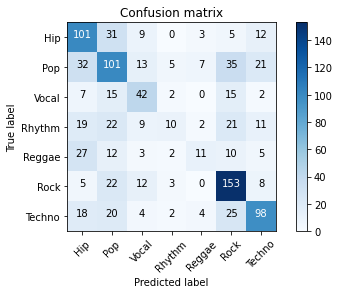

In [ ]:
%%time
# Train
lr_classifier = LogisticRegression(penalty='l2')
lr_classifier.fit(x_train, y_train)

# Predict
pred_probs = lr_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)


Test Set Accuracy =  0.51
Test Set F-score =  0.43
ROC AUC = 0.809
Confusion matrix, without normalization
[[105  30   9   1   0   5  11]
 [ 34 107  13   2   2  35  21]
 [  7  13  39   2   0  21   1]
 [ 18  31  10   3   3  19  10]
 [ 30  16   5   0  14   4   1]
 [  4  31  12   0   0 149   7]
 [ 14  32   4   1   0  33  87]]
CPU times: user 7.64 s, sys: 36.2 ms, total: 7.67 s
Wall time: 7.66 s


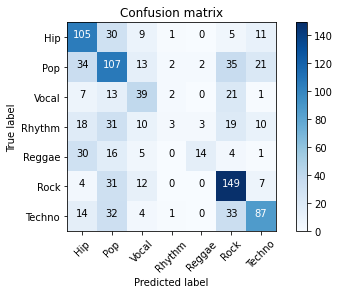

In [ ]:
%%time
# Train
rf_classifier = RandomForestClassifier(n_estimators=500, min_samples_split=5)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

Test Set Accuracy =  0.50
Test Set F-score =  0.45
ROC AUC = 0.795
Confusion matrix, without normalization
[[102  30   4   1   8   6  10]
 [ 28  94  15   1   4  39  33]
 [  3  15  46   0   1  14   4]
 [ 20  33   9   7   2  15   8]
 [ 21  20   3   0  18   6   2]
 [  6  36  10   1   2 134  14]
 [ 21  24   3   0   1  27  95]]
CPU times: user 4.58 s, sys: 23.2 ms, total: 4.6 s
Wall time: 4.59 s


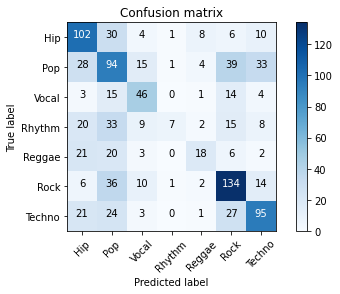

In [ ]:
%%time
# Train
svm_classifier = SVC(C=10000.0, probability = True, class_weight=cl_weight, kernel='rbf')
svm_classifier.fit(x_train, y_train)

# Predict
pred_probs = svm_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)